In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os

# 移動したいディレクトリのパスを指定します
target_directory = '/content/drive/My Drive/Colab Notebooks/cryptoprice_prediction_tft'

# ディレクトリを変更します
os.chdir(target_directory)

# 現在のディレクトリを確認します (オプション)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/cryptoprice_prediction_tft


In [2]:
!pip install yfinance scikit-learn --quiet
!pip install ipdb --quiet
!pip install mplfinance pytorch_lightning pytorch_forecasting timm requests fredapi optuna arch
!pip install imbalanced-learn
!pip install ta-lib

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.3/857.3 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.8/399.8 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.6/853.6 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.8/159.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 74.9 MB/s eta 0:00:00


In [3]:
import importlib
importlib.invalidate_caches()
# Remove the old features.py, model.py, dataset.py, optimization.py, filtering.py
!rm -f features.py model.py dataset.py optimization.py filtering.py tft_model.py

# Convert the notebooks to Python files
!jupyter nbconvert --to python features.ipynb model.ipynb dataset.ipynb optimization.ipynb filtering.ipynb tft_model.ipynb

# Import the converted Python files
import features
import model
import dataset
import optimization
import filtering
import tft_model # Import tft_model

# Reload the modules to ensure the latest changes are used
importlib.reload(dataset)
importlib.reload(features)
importlib.reload(model)
importlib.reload(optimization)
importlib.reload(filtering)
importlib.reload(tft_model)

[NbConvertApp] Converting notebook features.ipynb to python
[NbConvertApp] Writing 114513 bytes to features.py
[NbConvertApp] Converting notebook model.ipynb to python
[NbConvertApp] Writing 68595 bytes to model.py
[NbConvertApp] Converting notebook dataset.ipynb to python
[NbConvertApp] Writing 33126 bytes to dataset.py
[NbConvertApp] Converting notebook optimization.ipynb to python
[NbConvertApp] Writing 29262 bytes to optimization.py
[NbConvertApp] Converting notebook filtering.ipynb to python
[NbConvertApp] Writing 593177 bytes to filtering.py
[NbConvertApp] Converting notebook tft_model.ipynb to python
[NbConvertApp] Writing 62613 bytes to tft_model.py
目的変数にヒステリシスが導入されている理由:
予測対象のイベント（例: 価格の大幅な上昇/下降）をより頑健に捉えるためです。特に金融時系列データでは、価格の短期的なノイズや一時的な変動が多く含まれます。ヒステリシスを導入することで、単一時点での条件一致だけでなく、ある程度の期間にわたる条件の持続や複数条件の同時発生を考慮することができ、誤ったシグナルを減らし、より信頼性の高いトレンドやイベントを特定することが期待できます。これにより、モデルはノイズに惑わされにくくなり、より本質的な市場の動きに基づいた学習が可能になります。

モデル学習への影響:
ヒステリシスを導入した目的変数は、より明確で識別しやすいパターンを持つ傾向があります。これにより、モデルは予測すべ

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


目的変数にヒステリシスが導入されている理由:
予測対象のイベント（例: 価格の大幅な上昇/下降）をより頑健に捉えるためです。特に金融時系列データでは、価格の短期的なノイズや一時的な変動が多く含まれます。ヒステリシスを導入することで、単一時点での条件一致だけでなく、ある程度の期間にわたる条件の持続や複数条件の同時発生を考慮することができ、誤ったシグナルを減らし、より信頼性の高いトレンドやイベントを特定することが期待できます。これにより、モデルはノイズに惑わされにくくなり、より本質的な市場の動きに基づいた学習が可能になります。

モデル学習への影響:
ヒステリシスを導入した目的変数は、より明確で識別しやすいパターンを持つ傾向があります。これにより、モデルは予測すべきイベントの開始と終了をより正確に学習できるようになります。ただし、ヒステリシスの設定（ウィンドウサイズ、条件数など）によっては、イベントの発生タイミングが実際の市場の動きから遅れる可能性があり、これがモデルの予測精度や取引戦略のパフォーマンスに影響を与えることも考慮する必要があります。また、ヒステリシスによってイベントの発生頻度が減少する場合、学習データにおける目的変数のクラスバランスが偏る可能性があり、適切なクラス不均衡対策が必要になる場合があります。

特徴量エンジニアリングにおいてヒステリシスを考慮することの潜在的なメリット:
1. ノイズの低減: 短期的な価格ノイズや一時的な指標の変動に起因する偽のシグナルを特徴量から取り除くことができます。例えば、移動平均のクロス判定に短い遅延を設けることで、瞬間的なクロスターンによる誤判断を防ぐことができます。
2. トレンドの識別向上: ある特徴量が示すトレンドやパターンが一時的なものではなく、ある程度の期間持続しているかを評価するのに役立ちます。これにより、より安定したトレンドフォロー戦略や、トレンド転換の早期かつ信頼性の高い検出が可能になります。
3. モデルの解釈性向上: ヒステリシスを組み込んだ特徴量は、より市場の「勢い」や「持続性」を反映するため、モデルが学習するパターンがより直感的で経済合理性に基づいたものになる可能性があります。
4. 過学習の抑制: 短期的なノイズに過度に反応する特徴量を減らすことで、モデルが訓練データ固有のノイズパターンを学習し

<module 'tft_model' from '/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/tft_model.py'>

In [4]:
import requests
import pandas as pd

def get_fear_greed_index():
    """
    Fear & Greed Indexを取得し、特徴量化して価格データにマージする関数。

    Args:
        price_df (pd.DataFrame): 1時間足の価格情報を含むDataFrame。

    Returns:
        pd.DataFrame: Fear & Greed IndexをマージしたDataFrame。
    """
    # Fear & Greed Index API URL
    url = "https://api.alternative.me/fng/?limit=0&format=json"

    # データを取得
    response = requests.get(url)
    data = response.json()

    # DataFrame化
    df_fear = pd.DataFrame(data["data"])
    df_fear["date"] = pd.to_datetime(df_fear["timestamp"], unit="s")
    df_fear.set_index("date", inplace=True)

    # カラム名を分かりやすく
    df_fear = df_fear.rename(columns={"value": "fg_index", "value_classification": "fg_label"})

    # データ型変換
    df_fear["fg_index"] = df_fear["fg_index"].astype(int)

    # ラベルエンコーディング
    df_fear["fg_label_num"] = df_fear["fg_label"].astype("category").cat.codes

    # 1時間ごとにリサンプリングし、直前の値で埋める
    df_fear = df_fear.resample('1H').last().ffill()

    # 移動平均
    df_fear["fg_index_ma"] = df_fear["fg_index"].rolling(window=24).mean()


    # 乖離率
    df_fear["fg_index_diff"] = df_fear["fg_index"] - df_fear["fg_index_ma"]

    # 変化率
    df_fear["fg_index_change"] = df_fear["fg_index"].pct_change()

    # ラグ特徴量（1～2時点前）
    for col in ["fg_index", "fg_index_ma", "fg_index_diff", "fg_index_change"]:
        df_fear[f"{col}_lag1"] = df_fear[col].shift(1)
        df_fear[f"{col}_lag2"] = df_fear[col].shift(2)

    df_fear['date'] = df_fear.index
    df_fear.reset_index(drop=True, inplace=True)


    return df_fear

In [5]:
import datetime as dt
import requests
import pandas as pd

# =========================================================
# 1. VIX 日足（or 最近なら1h）を取得（yfinance利用）
# =========================================================

def fetch_vix_yfinance(start_date, end_date=None, interval="1d"):
    """
    Yahoo Finance から VIX (^VIX) を取得する簡易関数。
    interval="1d" を基本にするのがおすすめ。

    戻り値:
        DataFrame(index=DatetimeIndex, columns=["VIX_close"])
    """
    import yfinance as yf

    if end_date is None:
        end_date = dt.datetime.utcnow().date()

    data = yf.download("^VIX", start=start_date, end=end_date, interval=interval)
    if data.empty:
        raise ValueError("No VIX data returned. Check dates or interval.")

    # Close のみ使う
    df_vix = data[["Close"]].rename(columns={"Close": "VIX_close"})
    df_vix.index = pd.to_datetime(df_vix.index)
    return df_vix


# =========================================================
# 2. Binance Futures の Funding Rate (ETHUSDT)
# =========================================================

def fetch_binance_funding_rate(
    symbol="ETHUSDT",
    start_time=None,
    end_time=None,
    limit=1000,
):
    """
    Binance Futures API から funding rate 履歴を取得する。

    - デフォルトでは直近 limit 本を取得
    - start_time, end_time を指定する場合は UNIX ms（int）で渡す
      （使いやすくするなら、外側で datetime → int に変換）

    戻り値:
        DataFrame with columns: ["fundingTime", "fundingRate"]
    """
    base_url = "https://fapi.binance.com"
    endpoint = "/fapi/v1/fundingRate"

    params = {
        "symbol": symbol,
        "limit": limit,
    }
    if start_time is not None:
        params["startTime"] = int(start_time)
    if end_time is not None:
        params["endTime"] = int(end_time)

    resp = requests.get(base_url + endpoint, params=params, timeout=10)
    resp.raise_for_status()
    data = resp.json()

    if not data:
        return pd.DataFrame(columns=["fundingTime", "fundingRate"])

    df = pd.DataFrame(data)
    # time は ms
    df["fundingTime"] = pd.to_datetime(df["fundingTime"], unit="ms", utc=True)
    df["fundingRate"] = df["fundingRate"].astype(float)
    df = df.sort_values("fundingTime").reset_index(drop=True)
    return df[["fundingTime", "fundingRate"]]


def fetch_binance_funding_rate_range(symbol="ETHUSDT", days=180):
    """
    過去 days 日分の Funding Rate をざっくり取得して連結するラッパー。

    注意:
      - Binance API の仕様上、一度に取得できる本数(limit)が 1000 などで制限されるため、
        長期間を取る場合はループで過去にさかのぼる必要がある。
      - ここでは簡易的に「直近 days 日 ≒ days*3 本 (8hごと)」をまとめて取る形。

    戻り値:
        DataFrame(index=fundingTime, columns=["fundingRate"])
    """
    now = dt.datetime.utcnow()
    start = now - dt.timedelta(days=days)
    # Binance の funding は 8h ごとなので、最大本数を少し余裕を持たせる
    approx_points = days * 4  # 1日3本だけど余裕みて4
    df = fetch_binance_funding_rate(
        symbol=symbol,
        start_time=int(start.timestamp() * 1000),
        end_time=int(now.timestamp() * 1000),
        limit=min(1000, approx_points),
    )
    df = df.set_index("fundingTime")
    return df


# =========================================================
# 3. Global Liquidity Index（FREDから簡易作成）
# =========================================================

def fetch_fred_series(series_id, api_key, start_date="2000-01-01", end_date=None):
    """
    FRED API から単一 series を取得するヘルパー関数。

    series_id の例:
      - "M2SL"   : 米国M2マネーサプライ
      - "WALCL"  : FRB総資産 (Fed balance sheet)
    """
    if end_date is None:
        end_date = dt.datetime.utcnow().date().strftime("%Y-%m-%d")

    url = "https://api.stlouisfed.org/fred/series/observations"
    params = {
        "series_id": series_id,
        "api_key": api_key,
        "file_type": "json",
        "observation_start": start_date,
        "observation_end": end_date,
    }
    resp = requests.get(url, params=params, timeout=10)
    resp.raise_for_status()
    data = resp.json()

    obs = data.get("observations", [])
    if not obs:
        return pd.DataFrame(columns=[series_id])

    df = pd.DataFrame(obs)
    df["date"] = pd.to_datetime(df["date"])
    # 一部 'nan' 文字列が混じるので float に変換
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    df = df.set_index("date")[["value"]].rename(columns={"value": series_id})
    return df


def build_global_liquidity_index(
    fred_api_key,
    start_date="2010-01-01",
    end_date=None,
    m2_series="M2SL",
    fed_bs_series="WALCL",
):
    df_m2 = fetch_fred_series(m2_series, fred_api_key, start_date, end_date)
    df_bs = fetch_fred_series(fed_bs_series, fred_api_key, start_date, end_date)

    # outer join してから ffill で埋める方が行が増える
    df = df_m2.join(df_bs, how="outer").sort_index()
    df[m2_series] = df[m2_series].ffill()
    df[fed_bs_series] = df[fed_bs_series].ffill()

    df["GLI_raw"] = df[m2_series] + df[fed_bs_series]

    # 全期間Z-score
    x = df["GLI_raw"]
    df["GLI_norm"] = (x - x.mean()) / (x.std() + 1e-8)

    return df


# =========================================================
# 4. BTC dominance（Coingeckoベース・スケルトン）
# =========================================================

def fetch_btc_and_total_mcap_coingecko(days=365, vs_currency="usd"):
    """
    Coingecko の market_chart API を利用して、
    - BTC の時価総額
    - 全体の時価総額

    を取得し、そこから dominance を計算するスケルトン。

    ※ Coingecko API仕様は変更される可能性があるので、
      実際に使う前に最新ドキュメントを確認してください。
    """
    # BTC の market cap time series
    url_btc = f"https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params_btc = {
        "vs_currency": vs_currency,
        "days": days,
    }
    r_btc = requests.get(url_btc, params=params_btc, timeout=10)
    r_btc.raise_for_status()
    data_btc = r_btc.json()
    # data_btc["market_caps"] : [[timestamp_ms, mcap], ...]
    btc_caps = pd.DataFrame(data_btc["market_caps"], columns=["ts", "btc_mcap"])
    btc_caps["ts"] = pd.to_datetime(btc_caps["ts"], unit="ms", utc=True)
    btc_caps = btc_caps.set_index("ts")

    # グローバル時価総額は /global/market_cap_chart のようなエンドポイントがある場合もあるが、
    # 仕様が変わりやすいので、一旦 BTC + 他主要コインを近似として使う、などが現実的。
    # ここではスケルトンとして、BTC単独から dominance を擬似的に作る例を示す。
    # （ちゃんとやるなら、ETH・他の topN も market_cap を取り total_mcap を計算する）
    total_mcap = btc_caps["btc_mcap"]  # ★仮に「全体 ≒ BTC」の場合は dominance ~1.0 になってしまう

    df = pd.DataFrame(index=btc_caps.index)
    df["btc_mcap"] = btc_caps["btc_mcap"]
    df["total_mcap"] = total_mcap
    df["btc_dominance"] = df["btc_mcap"] / (df["total_mcap"] + 1e-8)

    return df


# =========================================================
# 5. Dune API から on-chain 系（stablecoin supply, gas, tx countなど）を取る共通関数
# =========================================================

def fetch_dune_query_results(query_id, api_key, params=None):
    """
    Dune API v2 の query result を取得する共通ヘルパー。
    - あらかじめ Dune 側で SQL を保存し query_id を控えておく。
    - gas fee, tx count, stablecoin supply などは SQL 側で日次/1h集計しておくと楽。

    戻り値:
        DataFrame (Duneが返す rows をそのまま DataFrame にしたもの)
    """
    headers = {
        "X-Dune-API-Key": api_key,
        "Content-Type": "application/json",
    }

    # Execution をトリガー（必要な場合）
    exec_url = f"https://api.dune.com/api/v1/query/{query_id}/execute"
    payload = {"query_parameters": params or {}}
    r_exec = requests.post(exec_url, json=payload, headers=headers, timeout=10)
    r_exec.raise_for_status()
    exec_id = r_exec.json()["execution_id"]

    # 結果が出るまでポーリング（簡易版）
    import time
    while True:
        res_url = f"https://api.dune.com/api/v1/execution/{exec_id}/results"
        r_res = requests.get(res_url, headers=headers, timeout=10)
        if r_res.status_code == 200:
            data = r_res.json()
            state = data.get("state")
            if state == "QUERY_STATE_COMPLETED":
                rows = data["result"]["rows"]
                df = pd.DataFrame(rows)
                return df
            elif state in ("QUERY_STATE_EXECUTING", "QUERY_STATE_PENDING"):
                time.sleep(2)
                continue
            else:
                raise RuntimeError(f"Dune query failed with state={state}")
        else:
            time.sleep(2)


def clean_gli(df_gli: pd.DataFrame) -> pd.DataFrame:
    df = df_gli.copy()
    df = df.sort_index()

    # 数値化（安全のため）
    for c in ["M2SL", "WALCL", "GLI_raw", "GLI_norm"]:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    # M2, WALCL は前方埋めでギャップを埋める
    df[["M2SL", "WALCL", "GLI_raw"]] = df[["M2SL", "WALCL", "GLI_raw"]].ffill()

    # GLI_norm についても、計算済みのものが飛び飛びで入っている想定なので ffill
    df["GLI_norm"] = df["GLI_norm"].ffill()

    # 最初の方で GLI_norm が全NaNなら落とす
    df = df[df["GLI_norm"].notna()]

    return df

In [6]:
def merge_external_data(
    df_eth_1h: pd.DataFrame,
    df_gli: pd.DataFrame | None = None,
    gli_col: str = "GLI_norm",
    df_vix: pd.DataFrame | None = None,
    vix_col: str = "VIX_close",
    df_btc_dom: pd.DataFrame | None = None,
    btc_dom_col: str = "btc_dominance",
    df_funding: pd.DataFrame | None = None,
    funding_col: str = "fundingRate",
) -> pd.DataFrame:
    """
    ETH 1h の DataFrame に、GLI / VIX / BTC dominance / Funding を
    reindex + ffill して統合する。

    前提:
      - df_eth_1h.index は DatetimeIndex（1h足、UTC or JST は揃っていること）
      - 外部DF（df_gli, df_vix, df_btc_dom, df_funding）は DatetimeIndex を持ち、
        それぞれの指標列が存在していること。

    各外部DFが None の場合は、その指標は追加されない。
    """

    df_merged = df_eth_1h.copy()
    target_index = df_merged.index

    # 安全のためインデックスを DatetimeIndex & sort
    if not isinstance(target_index, pd.DatetimeIndex):
        raise ValueError("df_eth_1h.index must be a DatetimeIndex")

    # すべてのDatetimeIndexをUTCに変換して統一性を確保
    if target_index.tz is None:
        target_index = target_index.tz_localize('UTC')
    else:
        target_index = target_index.tz_convert('UTC')

    df_merged.index = target_index

    # -------- GLI --------
    if df_gli is not None:
        if not isinstance(df_gli.index, pd.DatetimeIndex):
            df_gli = df_gli.copy()
            df_gli.index = pd.to_datetime(df_gli.index)

        # GLIのインデックスをUTCに変換
        if df_gli.index.tz is None:
            df_gli.index = df_gli.index.tz_localize('UTC')
        else:
            df_gli.index = df_gli.index.tz_convert('UTC')

        df_gli = df_gli.sort_index()

        if gli_col not in df_gli.columns:
            raise ValueError(f"{gli_col} not found in df_gli.columns")

        gli_series = df_gli[[gli_col]].reindex(target_index, method="ffill")
        df_merged[gli_col] = gli_series[gli_col]

    # -------- VIX --------
    if df_vix is not None:
        if not isinstance(df_vix.index, pd.DatetimeIndex):
            df_vix = df_vix.copy()
            df_vix.index = pd.to_datetime(df_vix.index)

        # VIXのインデックスをUTCに変換
        if df_vix.index.tz is None:
            df_vix.index = df_vix.index.tz_localize('UTC')
        else:
            df_vix.index = df_vix.index.tz_convert('UTC')

        df_vix = df_vix.sort_index()

        if vix_col not in df_vix.columns:
            raise ValueError(f"{vix_col} not found in df_vix.columns")

        vix_series = df_vix[[vix_col]].reindex(target_index, method="ffill")
        df_merged[vix_col] = vix_series[vix_col]

    # -------- BTC dominance --------
    if df_btc_dom is not None:
        if not isinstance(df_btc_dom.index, pd.DatetimeIndex):
            df_btc_dom = df_btc_dom.copy()
            df_btc_dom.index = pd.to_datetime(df_btc_dom.index)

        # BTC dominanceのインデックスをUTCに変換
        if df_btc_dom.index.tz is None:
            df_btc_dom.index = df_btc_dom.index.tz_localize('UTC')
        else:
            df_btc_dom.index = df_btc_dom.index.tz_convert('UTC')

        df_btc_dom = df_btc_dom.sort_index()

        if btc_dom_col not in df_btc_dom.columns:
            raise ValueError(f"{btc_dom_col} not found in df_btc_dom.columns")

        dom_series = df_btc_dom[[btc_dom_col]].reindex(target_index, method="ffill")
        df_merged[btc_dom_col] = dom_series[btc_dom_col]

    # -------- Funding rate --------
    if df_funding is not None:
        if not isinstance(df_funding.index, pd.DatetimeIndex):
            df_funding = df_funding.copy()
            df_funding.index = pd.to_datetime(df_funding.index)

        # Funding rateのインデックスをUTCに変換
        if df_funding.index.tz is None:
            df_funding.index = df_funding.index.tz_localize('UTC')
        else:
            df_funding.index = df_funding.index.tz_convert('UTC')

        df_funding = df_funding.sort_index()

        if funding_col not in df_funding.columns:
            raise ValueError(f"{funding_col} not found in df_funding.columns")

        funding_series = df_funding[[funding_col]].reindex(target_index, method="ffill")
        df_merged[funding_col] = funding_series[funding_col]

    return df_merged

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
import numpy as np

# パラメータ
symbol = 'ETH/USDT'
timeframe = '1h'  # '4h' に変更可
start_date = '2021-04-01'
end_date = '2024-12-31'

# 仮想通貨データの取得
api_key = '3f64b2f2a02335205fe8f8b75097aa45d092686eb6e0dfa8564e4917bf19cca5'

# Add error handling for API call
try:
    df_price = dataset.get_eth_hourly_data(api_key, start_date, end_date)
except requests.exceptions.RequestException as e:
    print(f"API request failed: {e}")
    # Handle the error appropriately, e.g., exit or use fallback data
    df_price = None # Ensure df_price is None on failure
except pd.errors.EmptyDataError:
    print("API returned empty data.")
    df_price = None
except Exception as e:
    print(f"An unexpected error occurred while fetching price data: {e}")
    df_price = None


# Check if df_price was successfully obtained before proceeding
if df_price is not None and not df_price.empty:
    # オンチェーン・データの取得
    query_categories = {
        'ETH_active_address': [5265149, 5265162],
        'CEX_Transactions_Monitering_inflow': [5265174, 5265270, 5265276, 5265285],
        'ETH_Whale_Transactions': [5265292, 5265294],
        'ETH_Smart_Contract_Interaction': [5265438, 5265459],
        'dex_volume': [5265492, 5265510],
        'stablecoin_velocity': [6211284, 6211340],
        'additional_onchain': [6245398, 6247783, 6247792, 6247825, 6247833, 6247847, 6247853, 6247884,
                               6247915, 6247918]
    }
    df_onchain = dataset.get_onchain_data_multiple_queries(query_categories)

    #取引履歴データの取得
    input_folder = '/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/ETHUSDT-trades-data'
    output_folder = '/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/ETHUSDT-trades-data'
    df_trades = dataset.process_eth_trades_data(input_folder, output_folder)

    # df_onchain
    # 特徴量の作成
    df_price = features.apply_fractional_differencing(df_price, "close", d=0.4)
    df_price = features.generate_features(df_price) # 価格データの特徴量
    df_price = features.calculate_volume_profile(df_price, num_bins=20) # 価格帯別出来高
    # df_onchain = features.engineer_features(df_onchain) # オンチェーンデータの特徴量

    diff_cols = ['total_flow_sum','address_count_sum','active_receivers',
             'active_senders','dex_volume','contract_calls','whale_tx_count']

    df_onchain, cont_cols, cont_params = features.create_onchain_cont_features(df_onchain, diff_cols)
    df_onchain, flag_cols, flag_thresholds = features.create_onchain_flags(df_onchain, diff_cols)
    df_trades = features.make_orderbook_features(df_trades) # 取引データ(板近似)の特徴量
    df_fear = get_fear_greed_index()
    # 各データの結合
    df = dataset.merge_data(df_price, df_onchain, df_trades, df_fear)

    df = df.set_index('date')

    # 外部指標の追加
    # 1. VIX 日足
    df_vix = fetch_vix_yfinance(start_date="2021-01-01")

    # 2. ETH funding rate（過去180日）
    df_funding = fetch_binance_funding_rate_range(symbol="ETHUSDT", days=2000)

    # 3. Global Liquidity Index（FRED）
    fred_api_key = "a894262e7fd3719cb988cd6f93a949ce"
    df_gli = build_global_liquidity_index(fred_api_key, start_date="2021-01-01")
    df_gli_clean = clean_gli(df_gli)

    # 4. BTC dominance（スケルトン・まずは動かしてからCoingecko仕様を微調整）
    df_btc_dom = fetch_btc_and_total_mcap_coingecko(days=365)

    df = merge_external_data(
    df,
    df_gli=df_gli_clean,          # GLI_norm 列を含む
    gli_col="GLI_norm",
    df_vix=df_vix,                # VIX_close 列を含む
    vix_col="VIX_close",
    df_btc_dom=df_btc_dom,        # btc_dominance 列を含む
    btc_dom_col="btc_dominance",
    df_funding=df_funding,        # fundingRate 列を含む
    funding_col="fundingRate",
    )

    df = features.add_vix_features(df, col="VIX_close")
    df = features.add_funding_features(df, col="fundingRate")
    df = features.add_gli_features(df, col="GLI_norm")
    df = features.add_btc_dominance_features(df, col="btc_dominance")
    df = features.add_stablecoin_features(df)
    df = features.add_dex_liquidity_features(df)
    df = features.add_activity_features(df)

    lag_map = {
    'ret_6h': [1, 2],
    'volatility_change_6h': [1, 2],
    'whale_tx_count_slope_s6_zn': [1, 2],
    'trend_strength_6_24': [1],
    'active_receivers_regime_score_zn': [1],
    'dex_volume_event_score_zn': [1]
    }

    def add_lag_features(df, lag_map):
        for col, lags in lag_map.items():
            for l in lags:
                df[f"{col}_lag{l}"] = df[col].shift(l)
                df[f"delta_{col}"] = df[col] - df[f"{col}_lag{l}"]
        return df

    df = add_lag_features(df, lag_map)



    threshold_dict = {
    # ======== オーダーブック系 ========
    # 相対的な買い・売り需給の偏り。小さな変化でも有意
    'buy_sell_ratio': 0.5,
    # 買い売り数量の差（絶対差分）。やや変動幅が大きいので高め
    'buy_sell_imbalance': 2.0,
    # スプレッド拡大率（流動性変化）
    'pseudo_spread': 1.5,
    # 高値安値幅によるボラティリティ指標
    'volatility': 1.0,
    # 買い圧力の変化率（センチメント急変を敏感に検知）
    'delta_buy_sell_ratio': 0.3,

    # ======== 価格系 ========
    # 対数リターン（log return）。振幅が小さいので低閾値
    'log_return_1h': 0.05,
    # 短期モメンタム（6時間程度）
    'momentum_6h': 1.0,
    # 12時間スパンのボラティリティ（中期トレンド転換用）
    'volatility_MA_t_12': 2.0,
    # ボリンジャーバンド幅（相場加熱局面）
    'BB_width': 3.5,
    # 移動平均の傾き（トレンド転換シグナル）
    'MA_t_24_slope': 1.2,

    # ======== オンチェーン系 ========
    # ネットワーク上の総流量。スパイク多めのためやや高め
    'total_flow_sum': 5.0,
    # アクティブアドレス数（受信者/送信者）
    'active_receivers': 2.5,
    'active_senders': 2.5,
    # DEX取引量。ボラティリティ高く3.0程度が安定
    'dex_volume': 5.0,
    # コントラクト呼び出し数（ネットワーク活動量）
    'contract_calls': 2.5,
    # 鯨（大口）取引数。スパイク型が多いのでやや高閾値
    'whale_tx_count': 4.0,
    # 新規アドレス生成など総アドレス数系
    'address_count_sum': 3.0,
    # ステーブルコイン・ヴェロシティ
    'velocity_usd_24h': 1.0,

    }


    df = features.add_cusum_flags(df, threshold_dict)


    # 日時に関係した特徴量を作成

    df = features.create_date_features(df)



    # # output_folder = '/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft'
    # # file_path = os.path.join(output_folder, 'ETHUSDT_data.csv')
    # # df.to_csv(file_path)

    # 訓練データとテストデータに分割し、説明変数・目的変数・ウェイトを作成
    # split_date = '2024-10-01'
    # decay_rate = 0.01
    # df_train, df_test, train_labels, test_labels = dataset.split_and_prepare_data(df, split_date, decay_rate)

    # train_labels


    # df_train

    # ハイパーパラメータチューニングの実行
    # n_trials = 300
    # # # # best_params = optimization.hyperparameter_tuning_lgbm_regression(df_train, train_labels, weights, n_trials)
    # best_params = optimization.hyperparameter_tuning_lgbm_classification(df_train, train_labels, n_trials)
    # best_params = optimization.hyperparameter_tuning_forecasting(df_train, train_labels, n_trials)

else:
    print("Price data could not be fetched. Skipping subsequent steps.")
    df = None # Ensure df is None if price data fetching failed


Reading data for query ID 5265149 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265149.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265162 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265162.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265174 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265174.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265270 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265270.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265276 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265276.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265285 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265285.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265292 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265292.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265294 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265294.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265438 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265438.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265459 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265459.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265492 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265492.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 5265510 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/5265510.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6211284 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6211284.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6211340 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6211340.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6245398 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6245398.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6247783 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6247783.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6247792 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6247792.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6247825 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6247825.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6247833 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6247833.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6247847 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6247847.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6247853 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6247853.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6247884 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6247884.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6247915 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6247915.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Reading data for query ID 6247918 from CSV file: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/Ethereum_onchain_data/6247918.csv


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dataset.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date']).dt.floor('H')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Parquetファイルを読み込んで結合します。
✅ 全ファイル処理完了
Dropped columns with more than 50% NaN: []


/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/features.py:640: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["val_price"] = val_price
/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/features.py:641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["vwap"] = vwap
/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/features.py:642: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

In [8]:
# top_50_features = [
#     'price_mean_MA_t_24',
#     'total_flow_sum_MA_t_6',
#     'total_flow_sum_MA_t_24',
#     'contract_calls_Lag_t_1',
#     'dex_volume_MA_slope',
#     'contract_calls_MA_t_72',
#     'Diff_t_6',
#     'active_receivers_MA_t_6',
#     'active_receivers_rolling_std_30',
#     'rolling_std_6h',
#     'whale_tx_count_rolling_std_7',
#     'whale_tx_count_MA_t_72',
#     'whale_tx_count_MA_t_96',
#     'whale_tx_count_MA_t_168',
#     'dex_volume_MA_t_168',
#     'dex_volume_MA_t_6',
#     'BB_width',
#     'total_flow_sum_MA_t_48',
#     'active_receivers_MA_t_96',
#     'price_last',
#     'address_count_sum_rolling_std_30',
#     'contract_calls_rolling_std_30',
#     'contract_calls_MA_slope',
#     'active_receivers_MA_t_24',
#     'buy_sell_ratio_MA_t_6',
#     'active_senders_MA_t_24',
#     'total_flow_sum_MA_t_168',
#     'active_senders_Diff_t_24',
#     'total_flow_sum_MA_t_12',
#     'buy_sell_imbalance',
#     'buy_sell_ratio_MA_t_24',
#     'volatility_MA_t_12',
#     'active_senders_Lag_t_3',
#     'contract_calls_MA_t_24',
#     'active_senders_MA_t_168',
#     'whale_tx_count_MA_t_24',
#     'whale_tx_count_rolling_std_30',
#     'address_count_sum_MA_t_168',
#     'active_senders_rolling_std_30',
#     'contract_calls_MA_t_168',
#     'MA_t_24_slope',
#     'contract_calls_MA_t_48',
#     'buy_qty_sum_MA_t_12',
#     'momentum_12h',
#     'log_return_24h',
#     'active_receivers_MA_t_48',
#     'total_flow_sum_rolling_std_30',
#     'MACD_signal',
#     'MA_t_168_slope',
#     'MA_t_336_slope'
# ]


# categorical_features = ["close_cusum", "dex_volume_cusum", "active_senders_cusum", "active_receivers_cusum", "address_count_sum_cusum", "contract_calls_cusum",
#                                       "whale_tx_count_cusum", "sign_entropy_12_cusum","sign_entropy_24_cusum",  "buy_sell_ratio_cusum", "MA_6_24_cross_flag", "MA_12_48_cross_flag", "MA_24_72_cross_flag",
#                                       "MA_6_24_72_trend_flag","MA_slope_6_24_change_flag", "MA_slope_12_48_change_flag", "MA_slope_pct_change_6_24_change_flag",
#                                       "MA_slope_pct_change_12_48_change_flag", "MA_slope_pct_change_24_72_change_flag","volatility_change_flag"]

# diff_cols = ['total_flow_sum','address_count_sum','active_receivers',
#              'active_senders','dex_volume','contract_calls','whale_tx_count']

# CONT_FEATURES = (
#     # --- On-chain（train標準化済み *_zn を中心に） ---
#     [f"{c}_event_score_zn"     for c in diff_cols] +   # 短期スパイク強度
#     [f"{c}_regime_score_zn"    for c in diff_cols] +   # レジーム偏位強度
#     [f"{c}_ema_cross_zn"       for c in diff_cols] +   # 短-中期EMA差
#     [f"{c}_slope_s6_zn"        for c in diff_cols] +   # 短期傾き（6h）
#     [f"{c}_ratio_s_m_zn"       for c in diff_cols] +   # 短/中 比率
#     [f"{c}_pct6_zn"            for c in diff_cols] +   # 6h変化率
#     [f"{c}_pct24_zn"           for c in diff_cols] +   # 24h変化率
#     # （必要に応じて）[f"{c}_z_short_zn" for c in diff_cols] + [f"{c}_z_mid_zn" for c in diff_cols]

#     # --- Orderbook（連続値） ---
#     [
#         "order_imbalance_norm",      # (buy-sell)/(buy+sell)
#         "buy_pressure_momentum",     # buy_sell_ratio の2次差分
#         "ratio_short_long",          # 短/長の需給乖離
#         "spread_change_rate",        # 疑似スプレッドの変化率
#         "buy_sell_diff_smooth_rate", # 平滑化した需給差の変化
#     ]
# )

# CAT_FEATURES = [
#     # --- On-chain: スパイク／状態（train分位でfit→全期間適用のやつ） ---
#     *[f"{c}_spike_flag" for c in diff_cols],
#     *[f"{c}_state_flag" for c in diff_cols],

#     # --- On-chain: CUSUM（変化点）※上位3列を推奨的に個別指定 ---
#     "total_flow_sum_cusum_up_flag", "total_flow_sum_cusum_down_flag",
#     "whale_tx_count_cusum_up_flag", "whale_tx_count_cusum_down_flag",
#     "dex_volume_cusum_up_flag",     "dex_volume_cusum_down_flag",

#     # --- Orderbook: 状態/イベント ---
#     "buy_dominant_flag",    # order_imbalance_norm > 0
#     "spread_spike_flag",    # スプレッド急変
#     "imbalance_flip_flag",  # 需給符号反転
#     "buy_overheat_flag",    # 買い過熱（Z>閾値）
#     "sell_overheat_flag",   # 売り過熱（Z<-閾値）

#     # --- Orderbook: CUSUM（変化点） ---
#     "buy_sell_ratio_cusum_upflag",
#     "buy_sell_ratio_cusum_downflag",
#     "buy_sell_imbalance_cusum_up_flag",
#     "buy_sell_imbalance_cusum_down_flag",
#     "delta_buy_sell_ratio_cusum_up_flag",
#     "delta_buy_sell_ratio_cusum_down_flag",
# ]

# PRICE_CONT_FEATURES = [
#     'ret_1h', 'ret_6h', 'ret_12h',
#     'momentum_6h', 'acceleration_6h',
#     'volatility_6h', 'volatility_change_6h',
#     'ma_6h', 'ma_24h', 'trend_strength_6_24', 'trend_slope_6h',
#     'bb_width_20', 'bb_width_change_6',
#     'volume_6h_mean', 'vol_norm_6h', 'flow_strength_6h', 'vol_price_corr_6h',
#     'z_move_6h',
#     'volume_pchg_6h', 'price_volume_ratio_6h',
#     'bb_compression_ratio', 'bb_reexpansion_speed_6h',
#     'ma_6', 'ma_24', 'ma_72'
# ]

# PRICE_CAT_FEATURES = [
#     'ma_order_flag',
#     'high_vol_flag',
#     'squeeze_flag',
#     'squeeze_reexp_flag',
#     'rsi_overbought_flag', 'rsi_oversold_flag',
#     'break_up_flag', 'break_down_flag',
#     'log_return_1h_cusum_up_flag', 'log_return_1h_cusum_down_flag',
#     'momentum_6h_cusum_up_flag', 'momentum_6h_cusum_down_flag',
#     'volatility_MA_t_12_cusum_up_flag','volatility_MA_t_12_cusum_down_flag',
#     'BB_width_cusum_up_flag', 'BB_width_cusum_down_flag',
#     'MA_t_24_slope_cusum_up_flag','MA_t_24_slope_cusum_down_flag'

# ]



# CONT_FEATURES_ALL = CONT_FEATURES + PRICE_CONT_FEATURES
# CAT_FEATURES_ALL =  CAT_FEATURES + PRICE_CAT_FEATURES

##最小セットを選択
# CONT_FEATURES_ALL = [
#     # --- オンチェーンイベント強度（短期の資金流動・行動） ---
#     'total_flow_sum_event_score_zn',        # 流出入の短期イベント強度
#     'whale_tx_count_event_score_zn',        # 鯨取引イベント強度
#     'dex_volume_event_score_zn',            # DEX取引イベント強度

#     # --- オンチェーン・状態レジーム（中期トレンド） ---
#     'total_flow_sum_regime_score_zn',       # 総流動性レジーム（bull/bear指標）
#     'active_receivers_regime_score_zn',     # アクティブ受信者数のトレンド状態
#     'contract_calls_regime_score_zn',       # コントラクト利用レジーム

#     # --- オンチェーン変化率・傾き ---
#     'active_senders_slope_s6_zn',           # 送信者活動の短期傾き
#     'whale_tx_count_slope_s6_zn',           # 鯨活動の短期変化率

#     # --- オーダーブック関連（需給・モメンタム） ---
#     'order_imbalance_norm',                 # 板の需給バランス（正規化）
#     'buy_pressure_momentum',                # 買い圧モメンタム
#     'ratio_short_long',                     # ショート/ロング比率（センチメント）
#     'spread_change_rate',                   # スプレッド変化率
#     'buy_sell_diff_smooth_rate',            # 買い売り差の平滑変化率

#     # --- 価格系（リターン・ボラ・トレンド） ---
#     'ret_6h',                               # 6時間リターン
#     'momentum_6h',                          # 短期モメンタム
#     'acceleration_6h',                      # モメンタム加速（加速度）
#     'volatility_6h',                        # 短期ボラティリティ
#     'volatility_change_6h',                 # ボラの変化率
#     'trend_strength_6_24',                  # 短中期MA乖離強度
#     'trend_slope_6h',                       # 短期トレンド傾き
#     'bb_width_20',                          # ボリンジャーバンド幅
#     'bb_width_change_6',                    # BB幅の短期変化（圧縮/拡散）
#     'bb_compression_ratio',                 # BB圧縮率
#     'bb_reexpansion_speed_6h',              # 圧縮後拡張速度（ボラ転換）
#     'price_volume_ratio_6h',                # 価格変化/出来高比（需給感応度）
# ]

# CAT_FEATURES_ALL = [
#     # --- On-chain 系（流動性・大口・DEX 活動） ---
#     'total_flow_sum_spike_flag',        # フロー急増（資金移動スパイク）
#     'whale_tx_count_cusum_up_flag',     # 鯨取引急増（構造的変化点）
#     'dex_volume_state_flag',            # DEX 活動レジーム（高 or 低）

#     # --- Orderbook 系（需給・スプレッド） ---
#     'buy_dominant_flag',                # 買い優勢状態（需給バランス）
#     'imbalance_flip_flag',              # 需給転換（売買優勢反転）
#     'spread_spike_flag',                # 流動性変化（スプレッド急拡大）

#     # --- テクニカル/価格系 ---
#     # 'high_vol_flag',                    # ボラティリティ急上昇（不安定相場）
#     'rsi_overbought_flag',              # RSI 過熱（買われすぎ）
#     'rsi_oversold_flag',                # RSI 反発（売られすぎ）
#     # 'break_up_flag',                    # ブレイクアウト（上方向）
#     # 'break_down_flag',                  # 下方ブレイク
#     'BB_width_cusum_up_flag',           # ボラ拡大点（BB 幅急変）
#     'MA_t_24_slope_cusum_up_flag',      # 中期トレンド上向き変化
#     'MA_t_24_slope_cusum_down_flag',    # 中期トレンド下向き変化
#     'momentum_6h_cusum_up_flag',        # モメンタム急上昇（短期トレンド）
# ]

##さらに選択
CONT_FEATURES_ALL = [

    # -----------------
    # ① 価格・テクニカル系
    # -----------------
    "ATR24",                    # ボラティリティ
    "ret_6h",                   # 過去6hリターン
    "volatility_change_6h",     # 6hボラ変化
    "trend_strength_6_24",      # トレンド強度 (6→24h)

    # 1ステップラグ・差分
    "ret_6h_lag1",
    "volatility_change_6h_lag1",
    "trend_strength_6_24_lag1",

    "delta_ret_6h",
    "delta_volatility_change_6h",

    # -----------------
    # ② 既存オンチェーン（レシーバ・クジラ・DEXイベント）
    # -----------------
    "active_receivers_regime_score_zn",
    "whale_tx_count_slope_s6_zn",
    "dex_volume_event_score_zn",

    "active_receivers_regime_score_zn_lag1",
    "whale_tx_count_slope_s6_zn_lag1",
    "dex_volume_event_score_zn_lag1",

    "delta_whale_tx_count_slope_s6_zn",
    "delta_dex_volume_event_score_zn",

    # -----------------
    # ③ 既存ステーブル・ヴェロシティ系（ETHオンチェーン）
    # -----------------
    # "velocity_usd_24h_zn",
    # "delta_velocity_usd_24h_zn",

    # -----------------
    # ④ 新しいオンチェーン指標（Dune）
    #  - stablecoin velocity
    #  - DEX volume
    #  - gas fee
    #  - tx count
    # -----------------

    # （Duneクエリで直接取っている生値）
    "stablecoin_volume_usd",
    "stablecoin_volume_usd_avg24",
    "velocity_stablecoin_24h",

    "dex_volume_usd",
    "median_gas_price",
    "tx_count",

    # 特徴量エンジニアリング後（add_xxx_features_from_dune 系）
    # stablecoin velocity
    "velocity_stablecoin_24h_zn",
    "delta_velocity_stablecoin_24h",

    # DEX volume
    "dex_volume_usd_zn",
    "delta_dex_volume_usd",

    # gas fee
    "median_gas_price_zn",
    "delta_median_gas_price",

    # tx count
    "tx_count_zn",
    "delta_tx_count",

    # -----------------
    # ⑤ 外部指標（VIX / BTC dominance / GLI）
    # -----------------
    # VIX（例：yfinanceで取得）
    "VIX_close",           # 生の終値
    "VIX_zn",        # Z-score
    "delta_VIX",     # 差分

    # BTC dominance
    "btc_dominance",       # %
    "btc_dom_zn",
    "delta_btc_dom",

    # Global Liquidity Index (GLI_norm: FREDから構築)
    "GLI_norm",
    "gli_zn",
    "delta_gli",

    # -----------------
    # ⑥ Funding rate（Binance API）
    # -----------------
    "fundingRate",        # 8h→1hにリサンプルしたもの
    "funding_zn",     # Z-score
    "delta_funding",  # 差分
]
CAT_FEATURES_ALL = [

    # -----------------
    # ① 既存のフラグ系
    # -----------------
    "buy_dominant_flag",
    "momentum_6h_cusum_up_flag",
    "spread_spike_flag",
    "rsi_overbought_flag",
    "rsi_oversold_flag",

    # -----------------
    # ② stablecoin velocity (Dune) のレジーム・イベントフラグ
    # （add_stablecoin_velocity_features_from_dune を前提）
    # -----------------
    "velocity_stablecoin_24h_regime_up_flag",
    "velocity_stablecoin_24h_regime_down_flag",
    "velocity_stablecoin_24h_cusum_up_flag",
    "velocity_stablecoin_24h_cusum_down_flag",

    # -----------------
    # ③ DEX volume / gas fee / tx count のレジーム・CUSUMフラグ
    # （それぞれ add_dex_features_from_dune, add_gas_features_from_dune,
    #  add_tx_features_from_dune のような関数で作ったと想定）
    # -----------------
    "dex_volume_regime_up_flag",
    "dex_volume_regime_down_flag",
    "dex_volume_cusum_up_flag",
    "dex_volume_cusum_down_flag",

    "gas_fee_regime_up_flag",
    "gas_fee_regime_down_flag",
    "gas_fee_cusum_up_flag",
    "gas_fee_cusum_down_flag",

    "tx_regime_up_flag",
    "tx_regime_down_flag",
    "tx_cusum_up_flag",
    "tx_cusum_down_flag",

    # -----------------
    # ④ VIX / BTC dominance / GLI のレジームフラグ
    # （_ema_regime_flags(prefix=...) を使っている想定）
    # -----------------
    "VIX_regime_up_flag",
    "VIX_regime_down_flag",

    "btc_dom_regime_up_flag",
    "btc_dom_regime_down_flag",

    "gli_regime_up_flag",
    "gli_regime_down_flag",

    # -----------------
    # ⑤ Funding rate（Binance）由来のレジーム・CUSUMフラグ
    # （add_funding_features_from_dune を
    #  add_funding_features_from_binance に読み替えた想定）
    # prefix="funding" で作られる列
    # -----------------
    "funding_regime_up_flag",
    "funding_regime_down_flag",
    "funding_cusum_up_flag",
    "funding_cusum_down_flag",
]


def winsorize_series(s: pd.Series, lower=0.01, upper=0.99):
    """
    上下パーセンタイルで値をクリップする（winsorize）。
    デフォルトは上下1%ずつ。

    s: pandas Series（連続特徴量）
    """
    low = s.quantile(lower)
    high = s.quantile(upper)
    return s.clip(lower=low, upper=high)

def winsorize_features(df, cont_cols, lower=0.01, upper=0.99):
    df = df.copy()
    for col in cont_cols:
        df[col] = winsorize_series(df[col], lower, upper)
    return df

WINSORIZE_TARGETS = [

    # Stablecoin / DEX / Gas / Tx count
    "stablecoin_volume_usd",
    "stablecoin_volume_usd_avg24",
    "velocity_stablecoin_24h",
    "dex_volume_usd",
    "median_gas_price",
    "tx_count",

    # delta系
    # "delta_velocity_usd_24h_zn",
    "delta_velocity_stablecoin_24h",
    "delta_dex_volume_usd",
    "delta_median_gas_price",
    "delta_tx_count",
    "delta_funding",

    # 外部指標
    "VIX_close",
    "delta_VIX",
    "btc_dominance",
    "btc_dom_zn",
    "delta_btc_dom",
    "GLI_norm",
    "gli_zn",
    "delta_gli",
]
df = winsorize_features(df, WINSORIZE_TARGETS, lower=0.01, upper=0.99)

date_features = ["hour", "day_of_week", "hour_sin", "hour_cos", "day", "day_sin", "day_cos"]

feature_names = ["close", "high", "low", "volume_ETH"] + ['MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168'] + CONT_FEATURES_ALL + CAT_FEATURES_ALL +  date_features


X_3d_numpy, original_indices_filtered, feature_names_3d, df_proc = filtering.prepare_3d_data_processed(
    df=df,
    continuous_features=CONT_FEATURES_ALL,
    categorical_features=CAT_FEATURES_ALL,
    date_features=date_features,
    sequence_length=25,
    nan_threshold=500,
)

--- Starting 3D Data Preparation ---
Converted columns to 'category' dtype: ['buy_dominant_flag', 'momentum_6h_cusum_up_flag', 'spread_spike_flag', 'rsi_overbought_flag', 'rsi_oversold_flag', 'velocity_stablecoin_24h_regime_up_flag', 'velocity_stablecoin_24h_regime_down_flag', 'velocity_stablecoin_24h_cusum_up_flag', 'velocity_stablecoin_24h_cusum_down_flag', 'dex_volume_regime_up_flag', 'dex_volume_regime_down_flag', 'dex_volume_cusum_up_flag', 'dex_volume_cusum_down_flag', 'gas_fee_regime_up_flag', 'gas_fee_regime_down_flag', 'gas_fee_cusum_up_flag', 'gas_fee_cusum_down_flag', 'tx_regime_up_flag', 'tx_regime_down_flag', 'tx_cusum_up_flag', 'tx_cusum_down_flag', 'VIX_regime_up_flag', 'VIX_regime_down_flag', 'btc_dom_regime_up_flag', 'btc_dom_regime_down_flag', 'gli_regime_up_flag', 'gli_regime_down_flag', 'funding_regime_up_flag', 'funding_regime_down_flag', 'funding_cusum_up_flag', 'funding_cusum_down_flag']
Dropping columns with >= 500 NaNs: ['btc_dominance', 'btc_dom_zn', 'delta_bt

/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/filtering.py:193: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.0, 1.0, 1.0, 1.0, 1.0, ..., 1.0, 0.0, 1.0, 0.0, 0.0]
Length: 29945
Categories (2, float64): [0.0, 1.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_processed.loc[:, existing_categorical_features_in_processed] = (
/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/filtering.py:193: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 1.0, 0.0, 1.0]
Length: 29945
Categories (2, float64): [0.0, 1.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_processed.loc[:, existing_categorical_features_in_processed] = (
/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tf

Created 29670 sliding windows.
Converting window list to 3D NumPy array and extracting original indices...
Original X_3d_numpy shape: (29670, 25, 88)
Original end indices length: 29670
Final X_3d_numpy shape: (29670, 25, 88)
Final original_indices (start times) length: 29670


In [9]:
import numpy as np, pandas as pd
from scipy.stats import ks_2samp

def _psi(a, b, bins=10):
    # Population Stability Index（分布ドリフト）
    a_finite = a[~np.isnan(a)]
    b_finite = b[~np.isnan(b)]

    # Check if there are any finite values left to compute quantiles
    if len(a_finite) == 0 or len(b_finite) == 0:
        return np.nan # Return NaN if no data to compare

    qa = np.quantile(a_finite, np.linspace(0,1,bins+1))
    qa[0]-=1e9; qa[-1]+=1e9
    ca,_ = np.histogram(a_finite, qa); cb,_ = np.histogram(b_finite, qa)

    # Ensure histograms are not all zeros to avoid division by zero
    if ca.sum() == 0 or cb.sum() == 0:
        return np.nan

    pa = (ca/ca.sum()+1e-6); pb = (cb/cb.sum()+1e-6)
    return float(np.sum((pa-pb)*np.log(pa/pb)))

def audit_cont_features(
    df: pd.DataFrame,
    cont_cols: list,
    train_mask: pd.Series,                   # True=train, False=val/test
    expect_standardized_suffix="_zn",        # *_zn は mean≈0,std≈1 を期待
    std_warn=5.0, std_crit=10.0,            # スケール異常の閾値（train基準）
    outlier_sigma=5.0,                       # |z|>5 の外れ率を測る
    psi_warn=0.1, psi_crit=0.25,            # ドリフトの閾値
    corr_high=0.95                           # 相関の高すぎるペア
):
    rep = []
    tr = df.loc[train_mask, cont_cols]
    va = df.loc[~train_mask, cont_cols]

    # train基準の統計
    # Handle cases where `tr` might be empty or all NaNs for a column
    tr_desc = tr.describe().T.assign(
        std_tr = tr.std(),
        skew_tr = tr.skew(),
        kurt_tr = tr.kurtosis()
    )

    # 標準化期待の列は z を計算（train基準）
    z = {}
    # Ensure there are non-zero std deviations to avoid division by zero
    mu = tr.mean()
    sd = tr.std().replace(0, 1.0)

    for c in cont_cols:
        # Skip if feature column is entirely NaN or empty in training data
        if c not in tr.columns or tr[c].dropna().empty:
            print(f"[WARN] Feature '{c}' in training data is empty or all NaN. Skipping audit for this feature.")
            rep.append(dict(
                feature=c, na_rate=1.0, finite_rate=0.0, mean_tr=np.nan, std_tr=np.nan,
                skew_tr=np.nan, kurt_tr=np.nan, outlier_rate="N/A", psi=np.nan, ks_p=np.nan,
                zn_mean_tr="", zn_std_tr="", flags="NaN,non-finite,EMPTY_TRAIN_DATA"))
            continue

        # Skip if feature column is entirely NaN or empty in validation data (for PSI/KS)
        if c not in va.columns or va[c].dropna().empty:
            print(f"[WARN] Feature '{c}' in validation data is empty or all NaN. PSI/KS will be NaN.")
            x_vt = np.array([]) # Represent as empty for _psi function
        else:
            x_vt = va[c].to_numpy()

        x_tr = tr[c].to_numpy()

        # Calculate z-scores using the (potentially adjusted) std dev
        z[c] = ((df[c] - mu[c]) / sd[c]).to_numpy()

        # 欠損・有限判定
        na_rate = float(df[c].isna().mean())
        finite_rate = float(np.isfinite(df[c]).mean())

        # スケールと外れ値（train基準）
        std_val = float(sd[c])
        z_abs = np.abs(z[c])
        outlier_rate = float(np.mean(z_abs > outlier_sigma))

        # 標準化チェック（*_zn 想定）
        std_expected = (expect_standardized_suffix and str(c).endswith(expect_standardized_suffix))
        mean_z_tr = float(((tr[c]-mu[c])/sd[c]).mean()) if std_expected and sd[c] != 0 else np.nan
        std_z_tr  = float(((tr[c]-mu[c])/sd[c]).std())  if std_expected and sd[c] != 0 else np.nan

        # ドリフト：PSI & KS
        psi = _psi(x_tr, x_vt) if len(va)>0 else np.nan # x_tr and x_vt are already arrays. _psi handles their finite parts.
        try:
            ks_p = float(ks_2samp(x_tr[~np.isnan(x_tr)], x_vt[~np.isnan(x_vt)]).pvalue) if len(va)>0 and not x_tr[~np.isnan(x_tr)].empty and not x_vt[~np.isnan(x_vt)].empty else np.nan
        except Exception:
            ks_p = np.nan

        rep.append(dict(
            feature=c,
            na_rate=na_rate,
            finite_rate=finite_rate,
            mean_tr=float(mu[c]),
            std_tr=std_val,
            skew_tr=float(tr[c].skew()),
            kurt_tr=float(tr[c].kurtosis()),
            outlier_rate=f"{outlier_rate:.4f}",
            psi=f"{psi:.3f}" if not np.isnan(psi) else np.nan,
            ks_p=f"{ks_p:.3g}" if not np.isnan(ks_p) else np.nan,
            zn_mean_tr=f"{mean_z_tr:.2f}" if std_expected and not np.isnan(mean_z_tr) else "",
            zn_std_tr=f"{std_z_tr:.2f}" if std_expected and not np.isnan(std_z_tr) else "",
            flags="") )

    rep = pd.DataFrame(rep)
    # フラグ付与（警告・重大）
    def _flag(row):
        flags=[]
        if row['na_rate']>0: flags.append("NaN")
        if row['finite_rate']<1.0: flags.append("non-finite")
        if row['std_tr']>=std_crit: flags.append("SCALE_CRIT")
        elif row['std_tr']>=std_warn: flags.append("SCALE_WARN")
        if str(row['outlier_rate']) != "N/A" and float(str(row['outlier_rate']))>0.01: flags.append("outliers>1%")
        if row['psi'] not in (np.nan, None) and float(row['psi'])>=psi_crit: flags.append("PSI_CRIT")
        elif row['psi'] not in (np.nan, None) and float(row['psi'])>=psi_warn: flags.append("PSI_WARN")
        # *_zn の期待ズレ
        if str(row.get('zn_std_tr',"")).strip():
            try:
                if abs(float(row['zn_mean_tr']))>0.1 or abs(float(row['zn_std_tr'])-1.0)>0.1:
                    flags.append("ZN_MISMATCH")
            except ValueError: # Handle 'N/A' or non-numeric strings
                pass
        return ",".join(flags)
    rep['flags'] = rep.apply(_flag, axis=1)

    # 高相関ペアの抽出（train基準）
    # Only compute correlation if `tr` is not empty
    if not tr.empty:
        corr = tr.corr().abs()
        pairs=[]
        cols = corr.columns.tolist()
        for i in range(len(cols)):
            for j in range(i+1,len(cols)):
                r = corr.iloc[i,j]
                if r>=corr_high:
                    pairs.append((cols[i], cols[j], float(r)))
        pairs_df = pd.DataFrame(pairs, columns=["feat_a","feat_b","|rho|"])
    else:
        pairs_df = pd.DataFrame(columns=["feat_a","feat_b","|rho|"])

    # 推奨アクションの要約
    print("=== Continuous Feature Audit ===")
    print(f"[WARN] NaN/non-finite あり: {rep[rep['flags'].str.contains('NaN|non-finite', na=False)].shape[0]} 列")
    print(f"[WARN] スケール警告(SCALE_WARN/CRIT): {rep[rep['flags'].str.contains('SCALE_', na=False)].shape[0]} 列")
    print(f"[WARN] 外れ値率>1%: {rep[rep['flags'].str.contains('outliers', na=False)].shape[0]} 列")
    print(f"[WARN] ドリフト(PSI_WARN/CRIT): {rep[rep['flags'].str.contains('PSI_', na=False)].shape[0]} 列")
    zn_mis = rep[rep['flags'].str.contains('ZN_MISMATCH', na=False)]
    if len(zn_mis):
        print(f"[WARN] *_zn なのに mean≈0,std≈1 を満たさない列: {zn_mis.feature.tolist()}")
    if len(pairs_df):
        print(f"[INFO] |ρ|≥{corr_high} の高相関ペア数: {len(pairs_df)}（代表1本に間引きを推奨）")

    # 重要列の抽出（要対応リスト）
    to_fix = rep[rep['flags']!=""].sort_values("flags")
    return rep.sort_values("flags"), pairs_df.sort_values("|rho|", ascending=False)


# train_mask: 学習区間 True / 検証・テスト False
train_mask = (df.index < "2024-01-01")
rep_df, highcorr_df = audit_cont_features(df, CONT_FEATURES_ALL, train_mask)

# 要対応の上位を表示
# rep_df.query("flags != ''").head(20)
# highcorr_df.head(20)

output_dir = '/content/drive/My Drive/Colab Notebooks/cryptoprice_prediction_tft/feature_audits'
os.makedirs(output_dir, exist_ok=True)

file_path = os.path.join(output_dir, 'continuous_feature_audit.csv')
rep_df.to_csv(file_path, index=False)

print(f"'rep_df' を次のパスにCSVファイルとして保存しました: {file_path}")

rep_df

[WARN] Feature 'btc_dominance' in training data is empty or all NaN. Skipping audit for this feature.
[WARN] Feature 'btc_dom_zn' in training data is empty or all NaN. Skipping audit for this feature.
[WARN] Feature 'delta_btc_dom' in training data is empty or all NaN. Skipping audit for this feature.
=== Continuous Feature Audit ===
[WARN] NaN/non-finite あり: 27 列
[WARN] スケール警告(SCALE_WARN/CRIT): 10 列
[WARN] 外れ値率>1%: 3 列
[WARN] ドリフト(PSI_WARN/CRIT): 13 列
[WARN] *_zn なのに mean≈0,std≈1 を満たさない列: ['funding_zn']
[INFO] |ρ|≥0.95 の高相関ペア数: 1（代表1本に間引きを推奨）
'rep_df' を次のパスにCSVファイルとして保存しました: /content/drive/My Drive/Colab Notebooks/cryptoprice_prediction_tft/feature_audits/continuous_feature_audit.csv


feature   na_rate  finite_rate  \
40                            fundingRate  0.000000     1.000000   
1                                  ret_6h  0.000000     1.000000   
2                    volatility_change_6h  0.000000     1.000000   
3                     trend_strength_6_24  0.000000     1.000000   
9        active_receivers_regime_score_zn  0.000000     1.000000   
10             whale_tx_count_slope_s6_zn  0.000000     1.000000   
11              dex_volume_event_score_zn  0.000000     1.000000   
32                                 VIX_zn  0.008382     0.991618   
36                          delta_btc_dom  1.000000     0.000000   
29                            tx_count_zn  0.005577     0.994423   
27                    median_gas_price_zn  0.005577     0.994423   
25                      dex_volume_usd_zn  0.005577     0.994423   
23             velocity_stablecoin_24h_zn  0.005577     0.994423   
39                              delta_gli  0.000033     0.999967   
34                          btc_dominance  1.000000     0.000000   
16        delta_dex_volume_event_score_zn  0.000033     0.999967   
42                          delta_funding  0.000033     0.999967   
14         dex_volume_event_score_zn_lag1  0.000033     0.999967   
4                             ret_6h_lag1  0.000033     0.999967   
5               volatility_change_6h_lag1  0.000033     0.999967   
6                trend_strength_6_24_lag1  0.000033     0.999967   
7                            delta_ret_6h  0.000067     0.999933   
15       delta_whale_tx_count_slope_s6_zn  0.000067     0.999933   
8              delta_volatility_change_6h  0.000067     0.999933   
35                             btc_dom_zn  1.000000     0.000000   
12  active_receivers_regime_score_zn_lag1  0.000033     0.999967   
13        whale_tx_count_slope_s6_zn_lag1  0.000033     0.999967   
38                                 gli_zn  0.008382     0.991618   
24          delta_velocity_stablecoin_24h  0.000033     0.999967   
26                   delta_dex_volume_usd  0.000033     0.999967   
28                 delta_median_gas_price  0.000033     0.999967   
30                         delta_tx_count  0.000033     0.999967   
41                             funding_zn  0.006646     0.993354   
33                              delta_VIX  0.000033     0.999967   
37                               GLI_norm  0.000000     1.000000   
19                velocity_stablecoin_24h  0.000000     1.000000   
0                                   ATR24  0.000000     1.000000   
22                               tx_count  0.000000     1.000000   
20                         dex_volume_usd  0.000000     1.000000   
21                       median_gas_price  0.000000     1.000000   
18            stablecoin_volume_usd_avg24  0.000000     1.000000   
17                  stablecoin_volume_usd  0.000000     1.000000   
31                              VIX_close  0.000000     1.000000   

         mean_tr        std_tr   skew_tr    kurt_tr outlier_rate     psi  \
40  1.000000e-04  2.168456e-18  0.000000   0.000000       0.0000   0.000   
1   1.375566e-04  1.831556e-02 -0.081733   5.947062       0.0022   0.017   
2   1.051370e-01  6.298318e-01  0.222954  -1.378501       0.0000   0.005   
3   5.082846e-04  1.925001e+00 -0.000502  -1.937084       0.0000   0.020   
9  -1.890114e-02  9.680067e-01  0.769878   0.689472       0.0000   0.030   
10  4.460617e-04  8.966785e-01  0.210095   4.180973       0.0000   0.004   
11 -3.746008e-03  9.993872e-01  3.966165  23.950034       0.0071   0.057   
32 -8.983243e-02  1.419934e+00  0.651316   0.875174       0.0005   0.067   
36           NaN           NaN       NaN        NaN          N/A     NaN   
29 -1.021236e-02  1.053574e+00  1.054682   5.994937       0.0020   0.012   
27  1.819143e-02  1.090050e+00  2.315839  10.622552       0.0030   0.009   
25  3.996290e-03  1.061183e+00  2.902961  14.807281       0.0052   0.003   
23  6.178707e-04  1.001697e+00  2.312176   9.431295  

In [10]:
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import pointbiserialr

import numpy as np
import pandas as pd

def audit_flag_features_unsupervised(
    df: pd.DataFrame,
    flag_cols: list[str],
    train_mask: pd.Series | None = None,
    freq_for_stability: str = "M",
    verbose: bool = True
) -> pd.DataFrame:
    """
    ラベルを使わずに、フラグ（0/1）やカテゴリ特徴量の生成品質を監査する。
      - 発火率（全体/Train/ValTest）
      - 欠損率
      - 定数（全て0や全て1）チェック
      - チャタリング（遷移率）
      - 連続ON長（run-length統計）
      - 時系列安定性（発火率の期間標準偏差）

    Parameters
    ----------
    df : pd.DataFrame
        特徴量データ
    flag_cols : list[str]
        評価対象のフラグ・カテゴリ列名
    train_mask : pd.Series | None
        学習期間ブールマスク（Noneなら先頭70%をtrain）
    freq_for_stability : str
        発火率を集計する周期（例："M"=月次）
    """
    def _transition_rate(flag: pd.Series) -> float:
        f = flag.fillna(0).astype(int).values
        return float(np.mean(f[1:] != f[:-1])) if f.size > 1 else np.nan

    def _run_lengths(flag: pd.Series) -> dict:
        v = flag.fillna(0).astype(int).values
        runs, cur = [], 0
        for x in v:
            if x == 1:
                cur += 1
            elif cur > 0:
                runs.append(cur); cur = 0
        if cur > 0:
            runs.append(cur)
        if not runs:
            return {"mean": 0.0, "median": 0.0, "p90": 0.0}
        runs = np.asarray(runs)
        return {
            "mean": float(runs.mean()),
            "median": float(np.median(runs)),
            "p90": float(np.quantile(runs, 0.9))
        }

    def _period_stability(flag: pd.Series, idx: pd.DatetimeIndex, freq: str = "M") -> float:
        if not isinstance(idx, pd.DatetimeIndex):
            return np.nan
        g = flag.groupby(idx.to_period(freq)).mean()
        return float(g.std()) if g.size > 1 else 0.0

    # --- train/val 分割 ---
    if train_mask is None:
        n = len(df)
        train_mask = pd.Series(False, index=df.index)
        train_mask.iloc[: int(n * 0.7)] = True

    idx = df.index if isinstance(df.index, pd.DatetimeIndex) else pd.to_datetime(df.index, errors="coerce")
    rows = []

    for col in flag_cols:
        if col not in df.columns:
            rows.append({"feature": col, "exists": False})
            continue

        s = df[col].copy()
        uniq = pd.unique(s.dropna())
        const = len(uniq) <= 1
        rate_all = float((s == 1).mean())
        rate_tr = float((s[train_mask] == 1).mean())
        rate_vt = float((s[~train_mask] == 1).mean())
        na_rate = float(s.isna().mean())
        trans = _transition_rate(s)
        rl = _run_lengths(s)
        stab = _period_stability(s, idx, freq_for_stability)

        rows.append({
            "feature": col,
            "exists": True,
            "is_constant": bool(const),
            "na_rate": round(na_rate, 4),
            "fire_rate_all": round(rate_all, 4),
            "fire_rate_train": round(rate_tr, 4),
            "fire_rate_valtest": round(rate_vt, 4),
            "transition_rate": round(trans, 4) if trans == trans else np.nan,
            "run_mean": round(rl["mean"], 2),
            "run_median": round(rl["median"], 2),
            "run_p90": round(rl["p90"], 2),
            "stability_std_" + freq_for_stability: round(stab, 4),
        })

    out = pd.DataFrame(rows).sort_values(
        by=["exists", "is_constant", "fire_rate_all"], ascending=[False, True, False]
    ).reset_index(drop=True)

    if verbose:
        print("\n=== Flag/Categorical Feature Audit (Unsupervised) ===")
        with pd.option_context("display.max_rows", 200, "display.max_columns", 200, "display.width", 160):
            print(out.head(50))
        print("\n[Guide]")
        print("- fire_rate_all: 状態フラグ 0.2–0.6 / イベントフラグ 0.05–0.3 が目安")
        print("- transition_rate が高いほどチャタリング多 → enter/exitを広げる")
        print("- run_p90 が極小なら短期ノイズ化している可能性あり")
        print("- stability_std が大きすぎる場合、期間ごとの発火率変動が大きい（閾値の再fitを検討）")

    return out
# -------- 使用例 --------

    # df: あなたの特徴量DataFrame（DatetimeIndex推奨）
    # label_col: 2値ラベル列（-1は中立/除外として扱われます）
    # flag_cols: 監査したいフラグ/カテゴリ列
    # train_mask: 訓練期間のブールマスク（なければ先頭70%を自動使用）


flag_cols = CAT_FEATURES_ALL
# train_mask = (df.index < "2024-01-01")
audit = audit_flag_features_unsupervised(df, flag_cols)


output_dir = '/content/drive/My Drive/Colab Notebooks/cryptoprice_prediction_tft/feature_audits'
os.makedirs(output_dir, exist_ok=True)

file_path = os.path.join(output_dir, 'categorical_feature_audit.csv')
audit.to_csv(file_path, index=False)

print(f"'audit' を次のパスにCSVファイルとして保存しました: {file_path}")

audit

/tmp/ipython-input-1781757049.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  g = flag.groupby(idx.to_period(freq)).mean()
/tmp/ipython-input-1781757049.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  g = flag.groupby(idx.to_period(freq)).mean()
/tmp/ipython-input-1781757049.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  g = flag.groupby(idx.to_period(freq)).mean()
/tmp/ipython-input-1781757049.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  g = flag.groupby(idx.to_period(freq)).mean()
/tmp/ipython-input-1781757049.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  g = flag.groupby(idx.to_period(freq)).mean()
/tmp/ipython-input-1781757049.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone info


=== Flag/Categorical Feature Audit (Unsupervised) ===
                                     feature  exists  is_constant  na_rate  fire_rate_all  fire_rate_train  fire_rate_valtest  transition_rate  run_mean  \
0                 dex_volume_cusum_down_flag    True        False      0.0         0.7391           0.7940             0.6112           0.2523      5.86   
1                       gli_regime_down_flag    True        False      0.0         0.6755           0.6123             0.8230           0.0021    632.12   
2                   gas_fee_regime_down_flag    True        False      0.0         0.5874           0.5788             0.6075           0.0574     20.48   
3                       VIX_regime_down_flag    True        False      0.0         0.5739           0.5758             0.5695           0.0130     88.59   
4                dex_volume_regime_down_flag    True        False      0.0         0.5691           0.5724             0.5614           0.0462     24.63   
5   veloc

feature  exists  is_constant  na_rate  \
0                 dex_volume_cusum_down_flag    True        False      0.0   
1                       gli_regime_down_flag    True        False      0.0   
2                   gas_fee_regime_down_flag    True        False      0.0   
3                       VIX_regime_down_flag    True        False      0.0   
4                dex_volume_regime_down_flag    True        False      0.0   
5   velocity_stablecoin_24h_regime_down_flag    True        False      0.0   
6                        tx_regime_down_flag    True        False      0.0   
7                          buy_dominant_flag    True        False      0.0   
8                          tx_regime_up_flag    True        False      0.0   
9                  momentum_6h_cusum_up_flag    True        False      0.0   
10    velocity_stablecoin_24h_regime_up_flag    True        False      0.0   
11                 dex_volume_regime_up_flag    True        False      0.0   
12                        VIX_regime_up_flag    True        False      0.0   
13                    gas_fee_regime_up_flag    True        False      0.0   
14                   gas_fee_cusum_down_flag    True        False      0.0   
15   velocity_stablecoin_24h_cusum_down_flag    True        False      0.0   
16                         spread_spike_flag    True        False      0.0   
17                        gli_regime_up_flag    True        False      0.0   
18                  dex_volume_cusum_up_flag    True        False      0.0   
19                     gas_fee_cusum_up_flag    True        False      0.0   
20     velocity_stablecoin_24h_cusum_up_flag    True        False      0.0   
21                       rsi_overbought_flag    True        False      0.0   
22                         rsi_oversold_flag    True        False      0.0   
23                          tx_cusum_up_flag    True        False      0.0   
24                        tx_cusum_down_flag    True        False      0.0   
25                    btc_dom_regime_up_flag    True         True      0.0   
26                  btc_dom_regime_down_flag    True         True      0.0   
27                    funding_regime_up_flag    True         True      0.0   
28                  funding_regime_down_flag    True         True      0.0   
29                     funding_cusum_up_flag    True         True      0.0   
30                   funding_cusum_down_flag    True         True      0.0   

    fire_rate_all  fire_rate_train  fire_rate_valtest  transition_rate  \
0          0.7391           0.7940             0.6112           0.2523   
1          0.6755           0.6123             0.8230           0.0021   
2          0.5874           0.5788             0.6075           0.0574   
3          0.5739           0.5758             0.5695           0.0130   
4          0.5691           0.5724             0.5614           0.0462   
5          0.5649           0.5717             0.5491           0.0812   
6          0.5169           0.5184             0.5134           0.0486   
7          0.4842           0.4817             0.4900           0.4508   
8          0.4831           0.4815             0.4866           0.0486   
9          0.4789           0.4724             0.4941           0.2041   
10         0.4350           0.4282             0.4509           0.0811   
11         0.4309           0.4276             0.4386           0.0462   
12         0.4253           0.4230             0.4305           0.0130   
13         0.4125           0.4211             0.3925           0.0573   
14         0.3730           0.3634             0.3954           0.1166   
15         0.3546           0.3488             0.3681           0.3021   
16         0.3349           0.3442             0.3132           0.4256   
17         0.3221           0.3843             0.1770           0.0021   
18         0.2609           0.2060             0.3888           0.2523   
19         0.2243           0.2305             0.2098       

# クラスタリング前にルールベースで5カテゴリに分類

*   labels,label_strategyの取得



In [11]:
import numpy as np

STOCK_STRATEGY_NAME_TO_ID = {"Downtrend": 0, "Range": 1, "Uptrend": 2}

def classify_all_sequences_stock_3cat(
    X_3d_numpy: np.ndarray,
    feature_names: list,
    *,
    ma_short_candidates=None,
    ma_long_candidates=None,
    price_candidates=None,
    trend_strength_th: float = 0.0008,
    price_above_long_th: float = 0.0008,
    price_below_long_th: float = 0.0008,
    debug: bool = True,
    eps: float = 1e-12,
    min_abs_long_ma: float = 1e-6,   # ★ 追加: long MA が0近傍なら判定不能
) -> np.ndarray:
    """
    3カテゴリ: ['Uptrend','Downtrend','Range']
    注意:
      - X_3dのclose/MAが「標準化済み」の場合、この比率ベース判定は壊れやすい。
        その場合は「正規化前の生値」で戦略判定するのが推奨。
    """
    n_sequences, seq_len, n_features = X_3d_numpy.shape
    strategy_labels = np.full(n_sequences, "Range", dtype=object)

    if ma_short_candidates is None:
        ma_short_candidates = ["ma_20", "MA_20", "SMA_20", "ema_20", "EMA_20", "MA_t_6"]
    if ma_long_candidates is None:
        ma_long_candidates = ["ma_120", "MA_120", "SMA_120", "ema_120", "EMA_120", "MA_t_72"]
    if price_candidates is None:
        price_candidates = ["close", "Close", "adj_close", "Adj Close", "PRICE"]

    def find_first(cands):
        for nm in cands:
            if nm in feature_names:
                return feature_names.index(nm), nm
        return None, None

    ma_s_idx, ma_s_name = find_first(ma_short_candidates)
    ma_l_idx, ma_l_name = find_first(ma_long_candidates)
    px_idx, px_name = find_first(price_candidates)

    if debug:
        print("[stock strategy 3cat] found:",
              {"ma_short": ma_s_name, "ma_long": ma_l_name, "price": px_name})

    if px_idx is None or ma_s_idx is None or ma_l_idx is None:
        if debug:
            print("[stock strategy 3cat] missing key features -> all Range")
        return strategy_labels

    # last step をまとめて取り出し（ベクトル化）
    p  = X_3d_numpy[:, -1, px_idx].astype(float)
    ms = X_3d_numpy[:, -1, ma_s_idx].astype(float)
    ml = X_3d_numpy[:, -1, ma_l_idx].astype(float)

    finite = np.isfinite(p) & np.isfinite(ms) & np.isfinite(ml)

    # ★ 正規化済みっぽい検知（目安）
    # close/MA が平均0付近で標準偏差~1に近いなら z-score の可能性が高い
    if debug:
        p_mu, p_sd = np.nanmean(p[finite]), np.nanstd(p[finite])
        ml_mu, ml_sd = np.nanmean(ml[finite]), np.nanstd(ml[finite])
        if (abs(p_mu) < 1.0 and 0.3 < p_sd < 3.0) and (abs(ml_mu) < 1.0 and 0.3 < ml_sd < 3.0):
            print("[WARN] close/MA look normalized (mean~0,std~1). "
                  "Ratio-based strategy thresholds may be invalid. "
                  "Prefer computing strategy on RAW (unnormalized) prices/MAs.")

    # 判定不能条件
    bad = (~finite) | (np.abs(p) < eps) | (np.abs(ml) < min_abs_long_ma)

    # 指標
    strength = (ms - ml) / (np.abs(p) + eps)
    rel_to_long = (p - ml) / (np.abs(ml) + eps)

    # 例: AND条件で厳格化（Range増）
    up_core = (strength > trend_strength_th) & (rel_to_long >= price_above_long_th)
    dn_core = (strength < -trend_strength_th) & (rel_to_long <= -price_below_long_th)


    # ラベル決定（両方true/両方falseはRange）
    labels = np.full(n_sequences, "Range", dtype=object)
    labels[(~bad) & up_core & (~dn_core)] = "Uptrend"
    labels[(~bad) & dn_core & (~up_core)] = "Downtrend"
    strategy_labels[:] = labels

    if debug:
        unique, counts = np.unique(strategy_labels, return_counts=True)
        print("[stock strategy 3cat] counts:", dict(zip(unique, counts)))

    return strategy_labels


def assign_stock_3strategy_from_sequences(
    X_3d: np.ndarray,
    feature_names: list,
    *,
    ma_short_candidates=None,
    ma_long_candidates=None,
    price_candidates=None,
    trend_strength_th: float = 0.003,
    price_above_long_th: float = 0.003,
    price_below_long_th: float = 0.003,
    debug: bool = True,
):
    """3戦略名 + strategy_type_id (0:Down,1:Range,2:Up) を返す"""
    strategy_name = classify_all_sequences_stock_3cat(
        X_3d_numpy=X_3d,
        feature_names=feature_names,
        ma_short_candidates=ma_short_candidates,
        ma_long_candidates=ma_long_candidates,
        price_candidates=price_candidates,
        trend_strength_th=trend_strength_th,
        price_above_long_th=price_above_long_th,
        price_below_long_th=price_below_long_th,
        debug=debug,
    )

    strategy_type_id = np.full(strategy_name.shape[0], -1, dtype=int)
    for k, v in STOCK_STRATEGY_NAME_TO_ID.items():
        strategy_type_id[strategy_name == k] = v

    # 念のため unknown が残るなら Range に寄せる（安全側）
    if np.any(strategy_type_id < 0):
        if debug:
            print("[WARN] unknown strategy found -> force Range")
        strategy_type_id[strategy_type_id < 0] = STOCK_STRATEGY_NAME_TO_ID["Range"]

    return strategy_name, strategy_type_id

# 株式版定義へ寄せた 3戦略名＋ID
strategy_labels, strategy_type_id = assign_stock_3strategy_from_sequences(
    X_3d=X_3d_numpy,
    feature_names=feature_names,
    debug=True,
)

print("\n--- Strategy Distribution (aligned to STOCK 3-strategy definition) ---")
print(pd.Series(strategy_labels).value_counts())
print("\n--- strategy_type_id distribution ---")
print(pd.Series(strategy_type_id).value_counts(dropna=False))

# The `strategy_labels` numpy array now contains the classified strategy for each sequence in X_3d_numpy.
# You can now use this for further processing or analysis (e.g., adding to the dataframe,

[stock strategy 3cat] found: {'ma_short': 'MA_t_6', 'ma_long': 'MA_t_72', 'price': 'close'}
[stock strategy 3cat] counts: {'Downtrend': np.int64(11656), 'Range': np.int64(5750), 'Uptrend': np.int64(12264)}

--- Strategy Distribution (aligned to STOCK 3-strategy definition) ---
Uptrend      12264
Downtrend    11656
Range         5750
Name: count, dtype: int64

--- strategy_type_id distribution ---
2    12264
0    11656
1     5750
Name: count, dtype: int64


※５戦略バージョン

In [12]:
# # Assuming X_3d_numpy and feature_names are available from previous steps

# print("Starting strategy classification for", X_3d_numpy.shape[0], "sequences...")

# strategy_labels = []
# # Import calculate_ma_and_slope and classify_strategy directly from filtering
# # REMOVED: from filtering import calculate_ma_and_slope, classify_strategy # Incorrect import

# # Assuming classify_strategy is defined in a preceding cell and available in the environment

# for i in range(X_3d_numpy.shape[0]):
#     sequence = X_3d_numpy[i, :, :]

#     # Calculate MA and slopes within classify_strategy or ensure they are available
#     # Since classify_strategy expects sequence, MA, and slope arrays,
#     # and calculate_ma_and_slope was intended to provide these,
#     # we need to ensure these inputs are generated before calling classify_strategy.
#     # However, looking at the definition of classify_strategy in cell j7yAiHDmA7fN,
#     # it appears it *extracts* MA and slope sequences from the input `sequence`
#     # using feature indices and then calculates their slopes using `np.diff`.
#     # So, the call `calculate_ma_and_slope(sequence)` was unnecessary, and the function
#     # classify_strategy is designed to work directly with the 3D sequence and feature names.

#     # Ensure classify_strategy is called with the correct arguments:
#     # classify_strategy(sequence, ma_short, ma_medium, ma_long, slope_short, slope_medium, slope_long, price_feature_index=0)
#     # This signature is actually for an *internal* helper function within j7yAiHDmA7fN.
#     # The main function to call is classify_all_sequences which takes the 3D array and feature names.

#     # Let's call classify_all_sequences once after the loop, as it processes all sequences.
#     # The loop structure suggests processing one by one, but classify_all_sequences is more efficient.
#     # We need the feature_names here to pass to classify_all_sequences.
#     # Assuming feature_names is available in the environment from previous steps.


# # Call classify_all_sequences once after the loop (or before, and just assign results)
# # Let's rebuild this section to call classify_all_sequences correctly.

# # Assuming X_3d_numpy and feature_names are loaded/available
# # Assuming classify_all_sequences function from cell j7yAiHDmA7fN is available

# # Process all sequences at once using classify_all_sequences
# try:
#     strategy_labels = filtering.classify_all_sequences(X_3d_numpy, feature_names)
#     print("Strategy classification complete.")
#     print("Example strategy labels (first 10):", strategy_labels[:10])
#     print("Strategy label distribution:", pd.Series(strategy_labels).value_counts())

# except Exception as e:
#     print(f"Error during strategy classification using classify_all_sequences: {e}")
#     strategy_labels = np.full(X_3d_numpy.shape[0], 'unknown', dtype=object) # Assign 'unknown' on error

# # Step 5: Check the distribution of classified strategies
# strategy_counts = pd.Series(strategy_labels).value_counts()

# print("\n--- Strategy Distribution ---")
# print(strategy_counts)

# # The `strategy_labels` numpy array now contains the classified strategy for each sequence in X_3d_numpy.
# # You can now use this for further processing or analysis (e.g., adding to the dataframe,

# カテゴリごとに二値ラベル作成

In [13]:
# --- 実際のデータの変数を確認またはロード ---
# 以下の変数が、前のステップで実際のイーサリアム価格・オンチェーンデータから
# 生成・準備されていることを前提とします。
#
# - df: 元の完全なデータフレーム (DatetimeIndex を持ち、'close' 列を含む)
# - X_3d_numpy: シーケンス化された特徴量データ (np.ndarray, shape: (num_sequences, seq_length, num_features))
# - original_indices_filtered: X_3d_numpy の各シーケンスの開始に対応する元のインデックス (pd.Index または np.ndarray)
# - strategy_labels: X_3d_numpy の各シーケンスに対応する戦略ラベル (np.ndarray, dtype=object)
# - feature_names_3d: X_3d_numpy の num_features 次元に対応する特徴量名のリスト (list)

# 例として、変数が定義されているかチェックします。
required_vars = ['df', 'X_3d_numpy', 'original_indices_filtered', 'strategy_labels', 'feature_names_3d']
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' not found in the current environment.")
        print("Please ensure that your actual data processing steps have defined these variables.")
        # 必要な変数が定義されていない場合は処理を中断します。
        raise NameError(f"Required variable '{var_name}' not found.")

# --- create_strategy_specific_binary_labels 関数呼び出しに必要なパラメータ定義 ---
# これらのパラメータは、分析の目的やデータの特性に基づいて調整してください。

# # horizon: 将来の予測期間（例: 24時間先の価格を予測する場合、データの頻度に応じたステップ数）
# # 例: データが1時間足の場合、24時間先を見るなら horizon=24
# # 実際のデータの頻度と予測したい期間に合わせて設定してください。
# # ここでは仮の値を設定します。
# prediction_horizon = 12 # 例: 24ステップ先の価格を見る

# # rolling_window_size: ローリングしきい値計算に使用する過去のシーケンス数
# # データ量やトレンドの安定性に合わせて調整してください。
# rolling_window_size = 100 # 例: 過去500シーケンスでしきい値を計算

# # target_positive_rate: 目標とする陽性ラベルの割合 (0から1の間)
# # ポジティブとしたいイベントの頻度に合わせて設定してください。
# target_positive_rate = 0.55 # 例: ポジティブ対ネガティブ比率を約1:2にするため、ポジティブ率を約33%に設定

# # ewma_alpha: EWMA平滑化のアルファ値 (0から1の間)
# # 値が大きいほど直近の値に強く反応し、小さいほど滑らかになります。
# ewma_alpha = 0.2 # 例: 0.2で適度な平滑化

# # lower_threshold_multiplier: 下位しきい値に対する上位しきい値の乗数
# # -1.0 にすると、上位しきい値と符号が反転した対称な下位しきい値になります（中央帯が0）。
# # 0.0 にすると、下位しきい値が常に0になり、上昇のみをターゲットとします。
# # 1.0 にすると、下位しきい値と上位しきい値が一致し、中央帯がなくなります。
# lower_threshold_multiplier = -1.0 # 例: 0を中心とした対称帯

# # hysteresis_M: ラベル確定/遷移に必要な連続ステップ数
# # 値が大きいほどラベルの変化が遅くなり、ノイズに強くなります。
# hysteresis_M = 10 # 例: 10連続ステップでラベルを確定/遷移

# print(f"\nUsing parameters for label generation:")
# print(f"  prediction_horizon (horizon) = {prediction_horizon}")
# print(f"  rolling_window_size = {rolling_window_size}")
# print(f"  target_positive_rate = {target_positive_rate}")
# print(f"  ewma_alpha = {ewma_alpha}")
# print(f"  lower_threshold_multiplier = {lower_threshold_multiplier}")
# print(f"  hysteresis_M = {hysteresis_M}")

# ラベル生成パラメータの設定
# これらは実際のラベリング戦略に合わせて調整が必要です。
labeling_params = {
    'horizon': 6,              # 予測ホライズン H (例: 12時間後)
    'rolling_window_size': 200, # 動的しきい値計算用の過去のスコアのウィンドウサイズ W
    'target_positive_rate': 0.25, # 目標陽性率 (例: 上位 10% を Positive)
    'dynamic_threshold_percentile_q': 85, # 動的上限しきい値の計算に使うパーセンタイル (例: 過去W期間のスコアの90パーセンタイル)
    'ewma_alpha': 0.20,         # 動的しきい値のEWMA平滑化のアルファ
    'lower_threshold_multiplier': -1.5, # 下限しきい値 = 上限しきい値 * この乗数 (例: -1.0 で中央バンドを設ける)
    'hysteresis_M': 1          # ヒステリシス用の連続タイムステップ数 M (例: 3連続で確定)
}

print("\nラベル生成パラメータの設定完了:")
for key, value in labeling_params.items():
    print(f"- {key}: {value}")
# --- create_strategy_specific_binary_labels 関数を呼び出し ---
try:
    print("\nCalling create_strategy_specific_binary_labels function with actual data...")

    binary_labels = filtering.create_strategy_specific_binary_labels_simple_crypto_3cat(
    df_proc,                        # 元のデータフレーム (original_df として使用)
    X_3d_numpy,                # 3D特徴量データ
    original_indices_filtered, # シーケンス開始インデックス
    feature_names_3d,          # 特徴量名リスト
    strategy_labels,           # 戦略ラベル
    horizon=6,
    rolling_window_size=0,
    target_positive_rate=0.20,         # ★ fold内で固定したい正例率
    use_vol_filter=True,
    force_binary_no_minus1=True,
)

    print("\n--- Label Generation Process Complete ---")

    # --- 結果の表示 ---
    print("\n--- Final Strategy-Specific Binary Labels (Actual Data) ---")
    if binary_labels:
        for strategy, labels in binary_labels.items():
            if isinstance(labels, dict) and "error" in labels:
                 print(f"Strategy: {strategy} - Error: {labels['error']}")
            else:
                 print(f"Strategy: {strategy} - Labels Shape: {labels.shape}")
                 # print(f"Sample Labels (first 20): {labels[:20]}") # 最初の20個のラベルを表示
                 # print(f"Unique Labels: {np.unique(labels)}") # ユニークなラベルを表示
                 # NaN が含まれていないか確認 (ヒステリシスが正しく適用されていれば -1 になっているはず)
                 if np.isnan(labels).any():
                      print(f"Warning: NaN found in labels for strategy {strategy}.")
                 # 各ラベルのカウントを表示
                 unique_labels, counts = np.unique(labels, return_counts=True)
                 print(f"  Label counts: {dict(zip(unique_labels, counts))}")
                 # ポジティブ対ネガティブの比率を計算 (0と1のラベルのみ)
                 positive_count = counts[unique_labels == 1][0] if 1 in unique_labels else 0
                 negative_count = counts[unique_labels == 0][0] if 0 in unique_labels else 0
                 total_classified = positive_count + negative_count
                 if total_classified > 0:
                     print(f"  Positive : Negative Ratio (0 and 1 labels): {positive_count} : {negative_count} (Approx {positive_count/total_classified:.2f} Positive)")
                 else:
                     print("  No 0 or 1 labels found for ratio calculation.")


    else:
        print("No strategy-specific labels were generated (output dictionary is empty). Check input data and filtering logic.")

except Exception as e:
    print(f"\nAn error occurred during the function call with actual data: {e}")
    import traceback
    traceback.print_exc() # デバッグのためにトレースバックを表示


ラベル生成パラメータの設定完了:
- horizon: 6
- rolling_window_size: 200
- target_positive_rate: 0.25
- dynamic_threshold_percentile_q: 85
- ewma_alpha: 0.2
- lower_threshold_multiplier: -1.5
- hysteresis_M: 1

Calling create_strategy_specific_binary_labels function with actual data...

--- Label Generation Process Complete ---

--- Final Strategy-Specific Binary Labels (Actual Data) ---
Strategy: Downtrend - Labels Shape: (11656,)
  Label counts: {np.float64(0.0): np.int64(11571), np.float64(1.0): np.int64(85)}
  Positive : Negative Ratio (0 and 1 labels): 85 : 11571 (Approx 0.01 Positive)
Strategy: Range - Labels Shape: (5750,)
  Label counts: {np.float64(0.0): np.int64(5750)}
  Positive : Negative Ratio (0 and 1 labels): 0 : 5750 (Approx 0.00 Positive)
Strategy: Uptrend - Labels Shape: (12264,)
  Label counts: {np.float64(0.0): np.int64(12255), np.float64(1.0): np.int64(9)}
  Positive : Negative Ratio (0 and 1 labels): 9 : 12255 (Approx 0.00 Positive)


#前処理結果の診断

In [14]:
def merge_labels_dict_to_array(labels_dict, strategy_labels):
    """
    labels_dict: create_strategy_specific_binary_labels_simple が返した dict
                 {strategy_name: label_array_for_that_strategy}
    strategy_labels: shape (N_seq,), 各シーケンスの戦略名
    戻り値: labels_per_seq (N_seq,)  それぞれのシーケンスに対応するラベル（-1/0/1）
    """
    n_seq = len(strategy_labels)
    labels_per_seq = np.full(n_seq, -1, dtype=float)

    unique_strats = np.unique(strategy_labels)
    for s in unique_strats:
        if s not in labels_dict:
            continue
        idx = np.where(strategy_labels == s)[0]
        lab_s = labels_dict[s]
        if len(idx) != len(lab_s):
            raise ValueError(f"Strategy {s}: index数とlabel数が一致しません")
        labels_per_seq[idx] = lab_s

    return labels_per_seq

def build_diagnostics_df(
    df_processed,
    X_3d_numpy,
    feature_names_3d,
    strategy_labels,
    labels_per_seq,
    horizon,
    cont_features_all,
    cat_features_all,
):
    n_seq, seq_length, num_features = X_3d_numpy.shape

    # ★ df_processed ベースで future return 計算
    future_scores_all = filtering.calculate_future_score_from_processed(
        df_processed=df_processed,
        sequence_length=seq_length,
        horizon=horizon,
        col_close="close",
    )

    # end_index は「各シーケンスの終端時刻」
    end_pos = np.arange(seq_length - 1, seq_length - 1 + n_seq)
    end_index = df_processed.index[end_pos]

    df_diag = pd.DataFrame({
        "seq_id": np.arange(n_seq),
        "log_return_24h": future_scores_all,
        "label": labels_per_seq,
        "strategy_type": strategy_labels,
    })
    df_diag["valid_label"] = df_diag["label"] != -1

    # Set the DatetimeIndex here for correct time-based slicing later
    df_diag.index = end_index
    df_diag.index.name = 'date'

    # ATR24 の計算と df_diag への格納
    # df_processed から high, low, close を抽出し、talib.ATR を使用
    # ATR は通常、一定期間の平均真の範囲を計算するため、 rolling window を考慮
    # talib.ATR は NaN を返すため、df_diag のインデックスに沿って結合する
    import talib
    if 'high' in df_processed.columns and 'low' in df_processed.columns and 'close' in df_processed.columns:
        # ATR24 を計算。期間は24時間 (1日) を想定
        df_processed_sorted = df_processed.sort_index()
        atr_values = talib.ATR(
            df_processed_sorted['high'].astype(float),
            df_processed_sorted['low'].astype(float),
            df_processed_sorted['close'].astype(float),
            timeperiod=24 # 24時間 ATR
        )
        # df_diag のインデックスに合わせて ATR 値をマージ
        df_diag['ATR24'] = atr_values.reindex(df_diag.index)
        # ATR 計算で生じるNaNを処理
        df_diag['ATR24'] = df_diag['ATR24'].fillna(0) # または df_diag['ATR24'].ffill() など
    else:
        print("Warning: 'high', 'low', or 'close' columns not found in df_processed for ATR calculation.")
        df_diag['ATR24'] = np.nan # カラムがない場合はNaNで埋める

    df_diag['volume'] = df_processed['volume_ETH'].reindex(df_diag.index)
    df_diag['volume'] = df_diag['volume'].fillna(0)



    # ここは以前と同じロジックでOK（ATR24/volume は診断用なので original_df でも df_processed でも可）
    # もし df_processed に high/low/volume が入っていれば df_processed から計算してもよい

    # --- Start of existing feature extraction logic (remains mostly same) ---
    # 連続・カテゴリ特徴量を最終タイムステップから展開（以前出したコードと同じ）
    last_step_features = X_3d_numpy[:, -1, :]
    feature_to_index = {name: idx for idx, name in enumerate(feature_names_3d)}

    for ft in cont_features_all:
        if ft in feature_to_index:
            df_diag[ft] = last_step_features[:, feature_to_index[ft]]
        else:
            df_diag[ft] = np.nan

    for ft in cat_features_all:
        if ft in feature_to_index:
            df_diag[ft] = last_step_features[:, feature_to_index[ft]]
        else:
            df_diag[ft] = np.nan
    # --- End of existing feature extraction logic ---

    df_diag['date'] = df_diag.index
    df_diag = df_diag.reset_index(drop=True)

    return df_diag

In [15]:
# 1) 戦略ごとのラベルを作成
# 2) dict → シーケンス単位の1次元ラベル配列に戻す
labels_per_seq = merge_labels_dict_to_array(binary_labels, strategy_labels)

# 3) Notebook用の診断dfを構築
df_diag = build_diagnostics_df(
    df_processed=df_proc,
    X_3d_numpy=X_3d_numpy,
    feature_names_3d=feature_names_3d,
    strategy_labels=strategy_labels,
    labels_per_seq=labels_per_seq,
    horizon=6,
    cont_features_all=CONT_FEATURES_ALL,
    cat_features_all=CAT_FEATURES_ALL,
)
df_diag

# 4) Notebook側では df = df_diag として実行
# df = df_diag.copy()

# df

seq_id  log_return_24h  label strategy_type  valid_label      ATR24  \
0           0       -2.524944    0.0     Downtrend         True  41.123923   
1           1       -1.288271    0.0     Downtrend         True  41.348760   
2           2       -1.538978    0.0     Downtrend         True  40.879228   
3           3        0.974432    0.0     Downtrend         True  42.474260   
4           4        0.431417    0.0     Downtrend         True  41.864083   
...       ...             ...    ...           ...          ...        ...   
29665   29665             NaN    0.0         Range         True  28.661146   
29666   29666             NaN    0.0         Range         True  31.301931   
29667   29667             NaN    0.0         Range         True  32.048518   
29668   29668             NaN    0.0         Range         True  31.578579   
29669   29669             NaN    0.0     Downtrend         True  31.804055   

         volume    ret_6h  volatility_change_6h  trend_strength_6_24  ...  \
0      26577.97 -0.011075             -0.467378                 -2.0  ...   
1      25814.18 -0.008367             -0.486218                 -2.0  ...   
2      15068.77 -0.014063             -0.428368                 -2.0  ...   
3      40202.30 -0.030283              0.224459                 -2.0  ...   
4      25262.60 -0.037743              1.000000                 -2.0  ...   
...         ...       ...                   ...                  ...  ...   
29665  36952.81  0.026701             -0.267275                 -2.0  ...   
29666  79213.68 -0.001055             -0.275915                 -2.0  ...   
29667  39850.34  0.005957             -0.289530                 -2.0  ...   
29668  31029.68 -0.008666             -0.146382                 -2.0  ...   
29669  35264.41 -0.020525             -0.027174                 -2.0  ...   

       VIX_regime_down_flag  btc_dom_regime_up_flag  btc_dom_regime_down_flag  \
0                       1.0                     0.0                       0.0   
1                       1.0                     0.0                       0.0   
2                       1.0                     0.0                       0.0   
3                       1.0                     0.0                       0.0   
4                       1.0                     0.0                       0.0   
...                     ...                     ...                       ...   
29665                   0.0                     0.0                       0.0   
29666                   0.0                     0.0                       0.0   
29667                   0.0                     0.0                       0.0   
29668                   0.0                     0.0                       0.0   
29669                   0.0                     0.0                       0.0   

       gli_regime_up_flag  gli_regime_down_flag  funding_regime_up_flag  \
0                     1.0                   0.0                     0.0   
1                     1.0                   0.0                     0.0   
2                     1.0                   0.0                     0.0   
3                     1.0                   0.0                     0.0   
4                     1.0                   0.0                     0.0   
...                   ...                   ...                     ...   
29665                 0.0                   1.0                     0.0   
29666                 0.0                   1.0                     0.0   
29667                 0.0                   1.0                     0.0   
29668                 0.0                   1.0                     0.0   
29669                 0.0                   1.0                     0.0   

       funding_regime_down_flag  funding_cusum_up_flag  \
0                           0.0                    0.0   
1                           0.0                    0.0   
2                           0.0                    0.0   
3                           0.0        

# Regime-aware WFA

In [16]:
"""# Regime-aware WFA"""

def assign_regime_v3_compressed(df):
    df = df.copy()

    # ===========================
    # 0. strategy_type_id の作成
    # ===========================
    if "strategy_type" not in df.columns:
        raise ValueError("df に 'strategy_type' 列が存在しません。")

    # 株式版と同一の整数ID体系で付与（上で定義した STOCK_STRATEGY_NAME_TO_ID を使用）
    # unknown/想定外は -1 にする
    df["strategy_type_id"] = df["strategy_type"].map(STOCK_STRATEGY_NAME_TO_ID).fillna(-1).astype("int64")

    # 互換のため strategy2id も返す（株式版と同一のID体系）
    strategy2id = dict(STOCK_STRATEGY_NAME_TO_ID)

    # ===========================
    # ① Volatility regime (V)
    # ===========================
    median_atr = df["ATR24"].rolling(24 * 30, min_periods=24 * 7).median()

    df["V_regime"] = np.where(
        df["ATR24"] <= median_atr, "V_low", "V_high"
    )

    # ===========================
    # ② Trend regime (T)
    # ===========================
    df["T_regime"] = np.where(
        df["trend_strength_6_24"] > 0,
        "T_up",
        "T_down"
    )

    # ===========================
    # ③ Activity regime (A)
    # ※ 圧縮版では composite には使用しない
    # ===========================
    df["A_regime"] = np.where(
        df["tx_count_zn"] > 0,
        "A_on",
        "A_off"
    )

    # ===========================
    # ④ Macro regime (M)
    # ===========================
    macro_score = (
        df["VIX_zn_sm"]
        + df["btc_dom_zn_sm"]
        + df["funding_zn_sm"]
    )

    df["M_regime"] = np.where(
        macro_score < 0,
        "M_on",    # risk-on
        "M_off"    # risk-off
    )

    # ===========================
    # ⑤ Final composite regime（圧縮版）
    # ===========================
    df["regime_v3_compressed"] = (
        df["V_regime"] + "_" +
        df["T_regime"] + "_" +
        df["M_regime"]
    )

    return df, strategy2id

In [17]:
# def assign_regime_v3_compressed(df):
#     df = df.copy()

#     # ===========================
#     # 0. strategy_type_id の作成
#     # ===========================
#     if "strategy_type" not in df.columns:
#         raise ValueError("df に 'strategy_type' 列が存在しません。")

#     # strategy_type → 整数 ID の辞書を作成
#     unique_strategies = sorted(df["strategy_type"].dropna().unique())
#     strategy2id = {s: i for i, s in enumerate(unique_strategies)}

#     # map を適用
#     df["strategy_type_id"] = df["strategy_type"].map(strategy2id).astype("int64")

#     # ===========================
#     # ① Volatility regime (V)
#     # ===========================
#     median_atr = df["ATR24"].rolling(24 * 30, min_periods=24 * 7).median()

#     df["V_regime"] = np.where(
#         df["ATR24"] <= median_atr, "V_low", "V_high"
#     )

#     # ===========================
#     # ② Trend regime (T)
#     # ===========================
#     df["T_regime"] = np.where(
#         df["trend_strength_6_24"] > 0,
#         "T_up",
#         "T_down"
#     )

#     # ===========================
#     # ③ Activity regime (A)
#     # ※ 圧縮版では composite には使用しない
#     # ===========================
#     df["A_regime"] = np.where(
#         df["tx_count_zn"] > 0,
#         "A_on",
#         "A_off"
#     )

#     # ===========================
#     # ④ Macro regime (M)
#     # ===========================
#     macro_score = (
#         df["VIX_zn_sm"]
#         + df["btc_dom_zn_sm"]
#         + df["funding_zn_sm"]
#     )

#     df["M_regime"] = np.where(
#         macro_score < 0,
#         "M_on",    # risk-on
#         "M_off"    # risk-off
#     )

#     # ===========================
#     # ⑤ Final composite regime（圧縮版）
#     # ===========================
#     df["regime_v3_compressed"] = (
#         df["V_regime"] + "_" +
#         df["T_regime"] + "_" +
#         df["M_regime"]
#     )

#     return df, strategy2id


In [18]:
# def assign_regime_v3_compressed(df):
#     df = df.copy()

#     # ===========================
#     # ① Volatility regime (V)
#     # ===========================
#     median_atr = df["ATR24"].rolling(24*30, min_periods=24*7).median()
#     df["V_regime"] = np.where(
#         df["ATR24"] <= median_atr, "V_low", "V_high"
#     )

#     # ===========================
#     # ② Trend regime (T)
#     # ===========================
#     df["T_regime"] = np.where(
#         df["trend_strength_6_24"] > 0,
#         "T_up",
#         "T_down"
#     )

#     # ===========================
#     # ③ Activity regime (A)
#     # ===========================
#     df["A_regime"] = np.where(
#         df["tx_count_zn"] > 0,
#         "A_on",
#         "A_off"
#     )

#     # ===========================
#     # ④ Macro regime (M)
#     # ===========================
#     macro_score = (
#         df["VIX_zn_sm"]
#         + df["btc_dom_zn_sm"]
#         + df["funding_zn_sm"]
#     )

#     df["M_regime"] = np.where(
#         macro_score < 0,
#         "M_on",   # risk-on
#         "M_off"   # risk-off
#     )

#     # ===========================
#     # ⑤ Final composite label
#     # ===========================
#     df["regime_v3_compressed"] = (
#         df["V_regime"] + "_" +
#         df["T_regime"] + "_" +
#         df["A_regime"] + "_" +
#         df["M_regime"]
#     )

#     return df

In [19]:
# import numpy as np
# import pandas as pd


# def add_enhanced_regimes(
#     df: pd.DataFrame,
#     col_date: str = "date",
#     col_atr: str = "ATR24",
#     col_trend: str = "trend_strength_6_24",
#     col_vol: str = "volume",
#     col_vel_zn: str = "velocity_usd_24h_zn",
#     regime_col_name: str = "regime_id_enhanced",
# ) -> pd.DataFrame:
#     """
#     改善版レジームを df に付与する。

#     軸:
#       - Volatility: 3段階 (0=Low, 1=Mid, 2=High)
#       - Trend:      5段階 (-2=StrongDown, -1=Down, 0=Flat, 1=Up, 2=StrongUp)
#       - Activity:   2段階 (0=Low, 1=High)  [Volume + Velocity_usd の合成]

#     文字列表現:
#       regime_id_enhanced = "V{vol3}_T{trend5}_A{act2}"

#     戻り値:
#       レジーム列を追加した DataFrame（コピー）
#     """

#     df = df.copy()

#     # 1. ソート
#     if col_date in df.columns:
#         df = df.sort_values(col_date)
#     else:
#         df = df.sort_index()

#     # 必要カラムの存在チェック
#     for c in [col_atr, col_trend, col_vol, col_vel_zn]:
#         if c not in df.columns:
#             raise ValueError(f"Required column '{c}' not found in df.")

#     # ===== Volatility Regime (3段階) =====
#     atr_valid = df[col_atr].dropna()
#     if len(atr_valid) > 0:
#         q_low = atr_valid.quantile(1/3)
#         q_high = atr_valid.quantile(2/3)

#         vol_regime = np.full(len(df), np.nan)
#         atr_vals = df[col_atr].values

#         vol_regime[(atr_vals <= q_low)] = 0  # Low
#         vol_regime[(atr_vals > q_low) & (atr_vals <= q_high)] = 1  # Mid
#         vol_regime[(atr_vals > q_high)] = 2  # High
#     else:
#         vol_regime = np.full(len(df), np.nan)

#     df["regime_vol3"] = vol_regime.astype("float")

#     # ===== Trend Regime (5段階) =====
#     trend_valid = df[col_trend].dropna()
#     if len(trend_valid) > 0:
#         q20 = trend_valid.quantile(0.2)
#         q40 = trend_valid.quantile(0.4)
#         q60 = trend_valid.quantile(0.6)
#         q80 = trend_valid.quantile(0.8)

#         trend_regime = np.full(len(df), np.nan)
#         t_vals = df[col_trend].values

#         trend_regime[t_vals <= q20] = -2  # StrongDown
#         trend_regime[(t_vals > q20) & (t_vals <= q40)] = -1  # Down
#         trend_regime[(t_vals > q40) & (t_vals <= q60)] = 0   # Flat
#         trend_regime[(t_vals > q60) & (t_vals <= q80)] = 1   # Up
#         trend_regime[t_vals > q80] = 2                       # StrongUp
#     else:
#         trend_regime = np.full(len(df), np.nan)

#     df["regime_trend5"] = trend_regime.astype("float")

#     # ===== Activity Regime (2段階) =====
#     # Volume + Velocity を標準化して合成
#     vol_series = df[col_vol].astype(float)
#     vel_series = df[col_vel_zn].astype(float)

#     vol_z = (vol_series - vol_series.mean()) / (vol_series.std() + 1e-8)
#     vel_z = (vel_series - vel_series.mean()) / (vel_series.std() + 1e-8)

#     activity_score = vol_z + vel_z
#     df["activity_score"] = activity_score

#     act_valid = activity_score.dropna()
#     if len(act_valid) > 0:
#         med_act = act_valid.median()
#         act_regime = np.where(activity_score > med_act, 1, 0)  # High=1, Low=0
#     else:
#         act_regime = np.full(len(df), np.nan)

#     df["regime_activity2"] = act_regime.astype("float")

#     # ===== 文字列表現 regime_id_enhanced =====
#     # 欠損がある行は "UNK" として扱う
#     vol_str = df["regime_vol3"].where(df["regime_vol3"].notna(), -1).astype(int)
#     trend_str = df["regime_trend5"].where(df["regime_trend5"].notna(), -9).astype(int)
#     act_str = df["regime_activity2"].where(df["regime_activity2"].notna(), -1).astype(int)

#     df[regime_col_name] = (
#         "V" + vol_str.astype(str) +
#         "_T" + trend_str.astype(str) +
#         "_A" + act_str.astype(str)
#     )

#     return df


In [20]:
import datetime as dt
import requests
import pandas as pd

def generate_time_based_wfa_splits(
    df,
    date_col="date",
    train_span_days=270,
    test_span_days=30,
    min_train_rows=110,
    min_test_rows=40,
):
    df = df.sort_values(date_col).copy()
    dates = pd.to_datetime(df[date_col].values)

    # 明示的にすべての日付オブジェクトがUTCタイムゾーンアウェアであることを確認
    if dates.tz is None:
        dates = dates.tz_localize('UTC')
    else:
        dates = dates.tz_convert('UTC') # 既にtz-awareだがUTCでない可能性がある場合にUTCに変換

    min_date = dates.min()
    max_date = dates.max()

    splits = []

    # 最初の test_start は train_span_days 経過後
    current_test_start = min_date + pd.Timedelta(days=train_span_days)

    while True:
        # これらは current_test_start からタイムゾーンアウェアネスを継承するはず
        train_start = current_test_start - pd.Timedelta(days=train_span_days)
        train_end   = current_test_start - pd.Timedelta(seconds=1)

        test_start  = current_test_start
        test_end    = current_test_start + pd.Timedelta(days=test_span_days)

        # 念のため、比較境界もUTCであることを確認
        if train_start.tz is None: train_start = train_start.tz_localize('UTC')
        if train_end.tz is None: train_end = train_end.tz_localize('UTC')
        if test_start.tz is None: test_start = test_start.tz_localize('UTC')
        if test_end.tz is None: test_end = test_end.tz_localize('UTC')

        # test_end がデータ終端を超えたら終了
        if test_start >= max_date:
            break
        if test_end > max_date:
            test_end = max_date

        # 各期間のサンプル数をチェック
        mask_train = (dates >= train_start) & (dates <= train_end)
        mask_test  = (dates >= test_start)  & (dates <= test_end)

        n_train = mask_train.sum()
        n_test  = mask_test.sum()

        if (n_train >= min_train_rows) and (n_test >= min_test_rows):
            splits.append(
                {
                    "train_start": train_start,
                    "train_end": train_end,
                    "test_start": test_start,
                    "test_end": test_end,
                }
            )

        # 次の fold に進める（ここでは test_span_days ずつシフト）
        current_test_start = current_test_start + pd.Timedelta(days=test_span_days)
        if current_test_start >= max_date:
            break
    print("[DEBUG] splits generated:", len(splits))
    if splits:
        print("[DEBUG] first split:", splits[0])
        print("[DEBUG] last split:", splits[-1])

    return splits

In [21]:
import pandas as pd
import pandas as pd
import numpy as np

def ensure_date_column(df: pd.DataFrame, date_col: str = "date") -> pd.DataFrame:
    df = df.copy()
    # 1) date列が無いが DatetimeIndex の場合 → date列を作る
    if date_col not in df.columns:
        if isinstance(df.index, pd.DatetimeIndex):
            df[date_col] = df.index
        elif df.index.name == date_col:
            # index名が date なら reset_index
            df = df.reset_index()
        else:
            raise KeyError(
                f"'{date_col}' not in columns and index is not DatetimeIndex "
                f"(index.name={df.index.name}). Please provide date column."
            )
    # 2) 型を datetime に統一
    df[date_col] = pd.to_datetime(df[date_col])
    return df


def make_regime_aware_wfa_folds_debug(
    df_diag: pd.DataFrame,
    feature_cols,
    label_col: str = "label",
    date_col: str = "date",
    regime_col: str = "regime_id",
    valid_col: str = "valid_label",
    strategy_type: str | None = None,
    train_span_days: int = 365,
    test_span_days: int = 30,
    min_train_rows: int = 500,
    min_test_rows: int = 200,
    *,
    regime_mode: str = "filter",   # "filter" / "none" / "weight"（※weightはfold作成だけなら情報付与）
    require_both_classes_train: bool = True,
    require_both_classes_test: bool = True,
    return_df: bool = False,
):
    """
    regime_mode:
      - "filter": 既存ロジック（trainをtest_regimeに絞る）※落ちやすい
      - "none"  : 絞らない（推奨）
      - "weight": 絞らず、test_regime一致フラグをfold_metaに入れる（学習側でweightに使う想定）
    """
    df = df_diag.copy()

    df = ensure_date_column(df_diag, date_col=date_col)

    # # date_col が index 名になっている場合のケア
    # if date_col == df.index.name:
    #     df = df.reset_index(names=[date_col])



    # --- 有効ラベル・戦略フィルタ ---
    mask = df[label_col].isin([0, 1])
    if valid_col in df.columns:
        mask &= df[valid_col].astype(bool)
    if strategy_type is not None and "strategy_type" in df.columns:
        mask &= (df["strategy_type"] == strategy_type)

    # features + date + regime が NaN でないものを使用
    df = df[mask].dropna(subset=list(feature_cols) + [date_col, regime_col]).copy()
    if df.empty:
        fold_meta_df = pd.DataFrame()
        diag_df = pd.DataFrame([{
            "fold_idx": None, "status": "error",
            "skip_reason": "no_valid_samples_after_filtering"
        }])
        return (fold_meta_df, df, diag_df) if return_df else (fold_meta_df, diag_df)

    df = df.sort_values(date_col)

    # --- 時間ベースの WFA スプリット生成 ---
    splits = generate_time_based_wfa_splits(
        df,
        date_col=date_col,
        train_span_days=train_span_days,
        test_span_days=test_span_days,
        min_train_rows=min_train_rows,
        min_test_rows=min_test_rows,
    )
    if not splits:
        fold_meta_df = pd.DataFrame()
        diag_df = pd.DataFrame([{
            "fold_idx": None, "status": "error",
            "skip_reason": "no_wfa_splits_generated"
        }])
        return (fold_meta_df, df, diag_df) if return_df else (fold_meta_df, diag_df)

    fold_records = []
    diag_records = []

    for i, sp in enumerate(splits):
        train_start = sp["train_start"]
        train_end   = sp["train_end"]
        test_start  = sp["test_start"]
        test_end    = sp["test_end"]

        mask_train_time = (df[date_col] >= train_start) & (df[date_col] <= train_end)
        mask_test_time  = (df[date_col] >= test_start)  & (df[date_col] <= test_end)

        df_train_time = df[mask_train_time]
        df_test_time  = df[mask_test_time]

        rec = {
            "fold_idx": i,
            "train_start": train_start, "train_end": train_end,
            "test_start": test_start, "test_end": test_end,
            "n_train_time": len(df_train_time),
            "n_test_time": len(df_test_time),
            "train_nunique_y_time": df_train_time[label_col].nunique() if len(df_train_time) else 0,
            "test_nunique_y_time": df_test_time[label_col].nunique() if len(df_test_time) else 0,
            "status": None,
            "skip_reason": None,
        }

        if df_train_time.empty or df_test_time.empty:
            rec["status"] = "skip"
            rec["skip_reason"] = "empty_train_or_test_time_window"
            diag_records.append(rec)
            continue

        test_regimes = df_test_time[regime_col].unique()

        # ---- regime の扱い ----
        if regime_mode == "filter":
            df_train = df_train_time[df_train_time[regime_col].isin(test_regimes)].copy()
        else:
            df_train = df_train_time.copy()

        df_test = df_test_time.copy()

        rec["n_train_after_regime"] = len(df_train)
        rec["n_test_after_regime"] = len(df_test)
        rec["train_nunique_y_after_regime"] = df_train[label_col].nunique() if len(df_train) else 0
        rec["test_nunique_y_after_regime"] = df_test[label_col].nunique() if len(df_test) else 0
        rec["n_test_regimes"] = len(test_regimes)

        # ---- 行数条件 ----
        if len(df_train) < min_train_rows or len(df_test) < min_test_rows:
            rec["status"] = "skip"
            rec["skip_reason"] = "min_rows_not_met"
            diag_records.append(rec)
            continue

        # ---- 両クラス条件 ----
        if require_both_classes_train and df_train[label_col].nunique() < 2:
            rec["status"] = "skip"
            rec["skip_reason"] = "train_missing_class"
            diag_records.append(rec)
            continue

        if require_both_classes_test and df_test[label_col].nunique() < 2:
            rec["status"] = "skip"
            rec["skip_reason"] = "test_missing_class"
            diag_records.append(rec)
            continue

        # ---- 採用 ----
        rec["status"] = "ok"
        rec["skip_reason"] = ""
        diag_records.append(rec)

        fold_records.append(
            {
                "fold_idx": i,
                "train_start": train_start,
                "train_end": train_end,
                "test_start": test_start,
                "test_end": test_end,
                "n_train": len(df_train),
                "n_test": len(df_test),
                "test_regimes": ",".join(map(str, test_regimes)),
                "regime_mode": regime_mode,
            }
        )

    fold_meta_df = pd.DataFrame(fold_records)
    diag_df = pd.DataFrame(diag_records)

    if return_df:
        return fold_meta_df, df, diag_df
    else:
        return fold_meta_df, diag_df

# def make_regime_aware_wfa_folds(
#     df_diag: pd.DataFrame,
#     feature_cols,
#     label_col: str = "label",
#     date_col: str = "date",
#     regime_col: str = "regime_id",
#     valid_col: str = "valid_label",
#     strategy_type: str | None = None,
#     train_span_days: int = 365,
#     test_span_days: int = 30,
#     min_train_rows: int = 500,
#     min_test_rows: int = 200,
#     *,
#     return_df: bool = False,
# ):
#     """
#     ★ RF / TFT 共通で使う Regime-aware WFA フォールド定義を作る関数 ★

#     - もともとの regime_aware_wfa_auc_with_rf の前半をほぼそのまま関数化
#     - 学習に使う df（フィルタ & dropna 済み）も必要なら返す
#     - 各 fold について:
#         * time-based WFA split (generate_time_based_wfa_splits)
#         * test_regimes に含まれる regime_id のみ train に残す
#         * min_train_rows / min_test_rows を満たした fold だけ採用
#         * train/test 両方に 0/1 の両クラスが揃っている fold のみ採用
#     戻り値:
#         fold_meta_df  … foldごとのメタデータ
#         （option）df  … 学習に使うフィルタ済み DataFrame
#     """

#     df = df_diag.copy()

#     # date_col が index 名になっている場合のケア（元コード踏襲）
#     if date_col == df.index.name:
#         df = df.reset_index(names=[date_col])

#     # --- 有効ラベル・戦略フィルタ ---
#     mask = df[label_col].isin([0, 1])
#     if valid_col in df.columns:
#         mask &= df[valid_col].astype(bool)
#     if strategy_type is not None and "strategy_type" in df.columns:
#         mask &= (df["strategy_type"] == strategy_type)

#     # features + date + regime が NaN でないものを使用（元コード踏襲）
#     df = df[mask].dropna(subset=feature_cols + [date_col, regime_col]).copy()
#     if df.empty:
#         print("make_regime_aware_wfa_folds: No valid samples after filtering.")
#         return (pd.DataFrame(), df) if return_df else pd.DataFrame()

#     df = df.sort_values(date_col)

#     # --- 時間ベースの WFA スプリット生成（既存の関数をそのまま利用）---
#     splits = generate_time_based_wfa_splits(
#         df,
#         date_col=date_col,
#         train_span_days=train_span_days,
#         test_span_days=test_span_days,
#         min_train_rows=min_train_rows,
#         min_test_rows=min_test_rows,
#     )
#     if not splits:
#         print("make_regime_aware_wfa_folds: No WFA splits generated.")
#         return (pd.DataFrame(), df) if return_df else pd.DataFrame()

#     fold_records = []

#     for i, sp in enumerate(splits):
#         train_start = sp["train_start"]
#         train_end   = sp["train_end"]
#         test_start  = sp["test_start"]
#         test_end    = sp["test_end"]

#         mask_train_time = (df[date_col] >= train_start) & (df[date_col] <= train_end)
#         mask_test_time  = (df[date_col] >= test_start)  & (df[date_col] <= test_end)

#         df_train_time = df[mask_train_time]
#         df_test_time  = df[mask_test_time]

#         if df_train_time.empty or df_test_time.empty:
#             continue

#         # --- Regime-aware 部分（元コードそのまま）---
#         test_regimes = df_test_time[regime_col].unique()
#         df_train = df_train_time[df_train_time[regime_col].isin(test_regimes)].copy()
#         df_test  = df_test_time.copy()

#         if df_train.shape[0] < min_train_rows or df_test.shape[0] < min_test_rows:
#             # このfoldはスキップ
#             continue

#         # labelの両クラスが存在するか確認
#         if df_train[label_col].nunique() < 2 or df_test[label_col].nunique() < 2:
#             continue

#         fold_records.append(
#             {
#                 "fold_idx": i,
#                 "train_start": train_start,
#                 "train_end": train_end,
#                 "test_start": test_start,
#                 "test_end": test_end,
#                 "n_train": df_train.shape[0],
#                 "n_test": df_test.shape[0],
#                 "test_regimes": ",".join(map(str, test_regimes)),
#             }
#         )

#     fold_meta_df = pd.DataFrame(fold_records)
#     if fold_meta_df.empty:
#         print("make_regime_aware_wfa_folds: No valid folds with both classes present.")

#     if return_df:
#         return fold_meta_df, df
#     else:
#         return fold_meta_df


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def regime_aware_wfa_auc_with_rf(
    df_diag,
    feature_cols,
    label_col="label",
    date_col="date",
    regime_col="regime_id",
    valid_col="valid_label",
    strategy_type=None,
    train_span_days=365,
    test_span_days=30,
    min_train_rows=500,
    min_test_rows=200,
    n_estimators=300,
    random_state=42,
):
    """
    ★ 新版: Regime-aware WFA RandomForest AUC
      - スプリット生成は make_regime_aware_wfa_folds に委譲
      - fold_meta_df を使って学習＆AUC計算
    """

    df = ensure_date_column(df_diag, date_col=date_col)

    # ① fold定義 ＋ フィルタ済み df を取得
    fold_meta_df, df = make_regime_aware_wfa_folds_debug( # Correctly unpack df, and ignore the diagnostic df with _
        df_diag=df_diag,
        feature_cols=feature_cols,
        label_col=label_col,
        date_col=date_col,
        regime_col=regime_col,
        valid_col=valid_col,
        strategy_type=strategy_type,
        train_span_days=train_span_days,
        test_span_days=test_span_days,
        min_train_rows=min_train_rows,
        min_test_rows=min_test_rows,
        regime_mode="none",          # ★ここが重要
        return_df=False,              # Change to True to return df
    )

    if fold_meta_df.empty:
        print("No valid folds for RF WFA.")
        return None

    print("fold_meta_df:", fold_meta_df.shape)
    print(df["status"].value_counts())
    print(df["skip_reason"].value_counts().head(20))


    records = []

    for row in fold_meta_df.itertuples(index=False):
        train_start = row.train_start
        train_end   = row.train_end
        test_start  = row.test_start
        test_end    = row.test_end
        test_regimes_str = row.test_regimes

        mask_train_time = (df[date_col] >= train_start) & (df[date_col] <= train_end)
        mask_test_time  = (df[date_col] >= test_start)  & (df[date_col] <= test_end)

        df_train_time = df[mask_train_time]
        df_test_time  = df[mask_test_time]

        # test_regimes で train をフィルタ（念のため再現）
        if isinstance(test_regimes_str, str):
            test_regimes = test_regimes_str.split(",")
        else:
            # This case should ideally not happen if fold_meta_df is well-formed.
            # Fallback to getting unique regimes from the actual test data if it occurs.
            test_regimes = list(df_test_time[regime_col].unique())

        df_train = df_train_time[df_train_time[regime_col].isin(test_regimes)].copy()
        df_test  = df_test_time.copy()

        # 念のためガード（理論上は make_regime_aware_wfa_folds 側で保証済み）
        if df_train.shape[0] < min_train_rows or df_test.shape[0] < min_test_rows:
            continue
        if df_train[label_col].nunique() < 2 or df_test[label_col].nunique() < 2:
            continue

        X_train = df_train[feature_cols].values
        y_train = df_train[label_col].values
        X_test  = df_test[feature_cols].values
        y_test  = df_test[label_col].values

        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=None,
            min_samples_leaf=5,
            random_state=random_state,
            n_jobs=-1,
        )
        clf.fit(X_train, y_train)

        prob_train = clf.predict_proba(X_train)[:, 1]
        prob_test  = clf.predict_proba(X_test)[:, 1]
        auc_train  = roc_auc_score(y_train, prob_train)
        auc_test   = roc_auc_score(y_test, prob_test)

        records.append(
            {
                "fold_idx": row.fold_idx,
                "train_start": train_start,
                "train_end": train_end,
                "test_start": test_start,
                "test_end": test_end,
                "n_train": df_train.shape[0],
                "n_test": df_test.shape[0],
                "test_regimes": test_regimes_str,
                "auc_train": auc_train,
                "auc_test": auc_test,
            }
        )

        print(
            f"[RF Fold {row.fold_idx}] "
            f"{train_start} ~ {train_end} -> {test_start} ~ {test_end} | "
            f"n_train={df_train.shape[0]}, n_test={df_test.shape[0]}, "
            f"regimes={set(test_regimes)}, "
            f"AUC(train)={auc_train:.3f}, AUC(test)={auc_test:.3f}"
        )

    if not records:
        print("No valid folds with both classes present (RF).")
        return None

    results_df = pd.DataFrame(records)
    return results_df

In [23]:
def smooth_macro_indicators(
    df: pd.DataFrame,
    macro_cols: list,
    window: int = 24*3,   # ETH 1h → 3日分
    min_periods: int = None,
    suffix: str = "_sm"
):
    """
    外部マクロ（低頻度データ）を rolling-median により滑らかにする。

    Parameters:
        df : DataFrame
        macro_cols : smoothing する列のリスト
        window : rolling window（1h データで24*3 = 3日）
        min_periods : 最低サンプル数（Noneならwindowの半分）
        suffix : 平滑化後列に付与するサフィックス

    Returns:
        df_sm : 新しい列を追加した DataFrame
    """
    df = df.copy()

    if min_periods is None:
        min_periods = window // 2  # 半分あれば安定して算出できる

    for col in macro_cols:
        if col not in df.columns:
            print(f"[WARN] {col} not found, skip")
            continue

        # ロール中値
        df[col + suffix] = (
            df[col]
            .rolling(window=window, min_periods=min_periods)
            .median()
        )

        # 前方埋め（外部データは欠損が出やすい）
        df[col + suffix] = df[col + suffix].ffill().bfill()

    return df

MACRO_SMOOTH_COLS = [
    "VIX_close",         # VIX daily
    "VIX_zn",
    "btc_dominance",     # daily
    "btc_dom_zn",
    "GLI_norm",          # monthly
    "gli_zn",

    # funding （Binance 8h → 1h resample）
    "fundingRate",
    "funding_zn",
]

In [24]:
df_diag = smooth_macro_indicators(
        df_diag,
        macro_cols=MACRO_SMOOTH_COLS,
        window=24*3,          # 3日
        suffix="_sm"
)

# 1. df_diag にレジーム付与
df_diag_v3, strategy2id = assign_regime_v3_compressed(df_diag)

# 中身確認
df_diag_v3[["label", "regime_v3_compressed"]].head()

# Regimeごとのサンプル数を確認
# df_diag_v3["regime_v3_code"].value_counts().head(20)

# # 2. 診断したい特徴量（これまでの AUC診断で使っていた ALL_FEATURES_UP など）
CONT_FEATURES_FOR_AUC = [

    # ① 価格・テクニカル系
    "ATR24",
    "ret_6h",
    "volatility_change_6h",
    "trend_strength_6_24",

    "ret_6h_lag1",
    "volatility_change_6h_lag1",
    "trend_strength_6_24_lag1",

    "delta_ret_6h",
    "delta_volatility_change_6h",

    # ② 既存オンチェーン系
    "active_receivers_regime_score_zn",
    "whale_tx_count_slope_s6_zn",
    "dex_volume_event_score_zn",

    "active_receivers_regime_score_zn_lag1",
    "whale_tx_count_slope_s6_zn_lag1",
    "dex_volume_event_score_zn_lag1",

    "delta_whale_tx_count_slope_s6_zn",
    "delta_dex_volume_event_score_zn",

    # ④ Dune系オンチェーン（安定して効きそうな z / delta のみ）
    # stablecoin
    "velocity_stablecoin_24h_zn",
    "delta_velocity_stablecoin_24h",

    # DEX volume
    "dex_volume_usd_zn",
    "delta_dex_volume_usd",

    # gas fee
    "median_gas_price_zn",
    "delta_median_gas_price",

    # tx count
    "tx_count_zn",
    "delta_tx_count",

    # ⑤ 外部指標：VIX（比較的頻度もあり、シフトはあるが使える）
    "VIX_zn",
    "delta_VIX",
]

CAT_FEATURES_FOR_AUC = [

    # ① 既存のフラグ系
    "buy_dominant_flag",
    "momentum_6h_cusum_up_flag",
    "spread_spike_flag",
    "rsi_overbought_flag",
    "rsi_oversold_flag",

    # ② stablecoin velocity のレジーム・イベントフラグ
    "velocity_stablecoin_24h_regime_up_flag",
    "velocity_stablecoin_24h_regime_down_flag",
    "velocity_stablecoin_24h_cusum_up_flag",
    "velocity_stablecoin_24h_cusum_down_flag",

    # ③ DEX volume / gas fee / tx count のレジーム・CUSUMフラグ
    "dex_volume_regime_up_flag",
    "dex_volume_regime_down_flag",
    "dex_volume_cusum_up_flag",
    "dex_volume_cusum_down_flag",

    "gas_fee_regime_up_flag",
    "gas_fee_regime_down_flag",
    "gas_fee_cusum_up_flag",
    "gas_fee_cusum_down_flag",

    "tx_regime_up_flag",
    "tx_regime_down_flag",
    "tx_cusum_up_flag",
    "tx_cusum_down_flag",

    # ④ VIX のレジームフラグ（外部指標の中ではまだマシ）
    "VIX_regime_up_flag",
    "VIX_regime_down_flag",

    "strategy_type_id",
]

feature_cols = CONT_FEATURES_FOR_AUC + CAT_FEATURES_FOR_AUC


# 3. 例えば Uptrend 戦略だけで Regime-aware WFA する場合
results_downtrend = regime_aware_wfa_auc_with_rf(
    df_diag_v3,              # add_simple_regimes 済み df_diag
    feature_cols=feature_cols,   # いつもの特徴量
    label_col="label",
    date_col="date",
    regime_col="regime_v3_compressed",
    valid_col="valid_label",
    strategy_type="Downtrend",
    train_span_days=270,
    test_span_days=60,
    min_train_rows=80,
    min_test_rows=30,
    n_estimators=300,
    random_state=42,
)

results_downtrend

[DEBUG] splits generated: 17
[DEBUG] first split: {'train_start': Timestamp('2021-08-12 11:00:00+0000', tz='UTC'), 'train_end': Timestamp('2022-05-09 10:59:59+0000', tz='UTC'), 'test_start': Timestamp('2022-05-09 11:00:00+0000', tz='UTC'), 'test_end': Timestamp('2022-07-08 11:00:00+0000', tz='UTC')}
[DEBUG] last split: {'train_start': Timestamp('2024-03-29 11:00:00+0000', tz='UTC'), 'train_end': Timestamp('2024-12-24 10:59:59+0000', tz='UTC'), 'test_start': Timestamp('2024-12-24 11:00:00+0000', tz='UTC'), 'test_end': Timestamp('2024-12-31 00:00:00+0000', tz='UTC')}
fold_meta_df: (2, 9)
status
skip    15
ok       2
Name: count, dtype: int64
skip_reason
test_missing_class     9
train_missing_class    6
                       2
Name: count, dtype: int64


KeyError: 'date'

In [25]:
df_diag_v3

seq_id  log_return_24h  label strategy_type  valid_label      ATR24  \
0           0       -2.524944    0.0     Downtrend         True  41.123923   
1           1       -1.288271    0.0     Downtrend         True  41.348760   
2           2       -1.538978    0.0     Downtrend         True  40.879228   
3           3        0.974432    0.0     Downtrend         True  42.474260   
4           4        0.431417    0.0     Downtrend         True  41.864083   
...       ...             ...    ...           ...          ...        ...   
29665   29665             NaN    0.0         Range         True  28.661146   
29666   29666             NaN    0.0         Range         True  31.301931   
29667   29667             NaN    0.0         Range         True  32.048518   
29668   29668             NaN    0.0         Range         True  31.578579   
29669   29669             NaN    0.0     Downtrend         True  31.804055   

         volume    ret_6h  volatility_change_6h  trend_strength_6_24  ...  \
0      26577.97 -0.011075             -0.467378                 -2.0  ...   
1      25814.18 -0.008367             -0.486218                 -2.0  ...   
2      15068.77 -0.014063             -0.428368                 -2.0  ...   
3      40202.30 -0.030283              0.224459                 -2.0  ...   
4      25262.60 -0.037743              1.000000                 -2.0  ...   
...         ...       ...                   ...                  ...  ...   
29665  36952.81  0.026701             -0.267275                 -2.0  ...   
29666  79213.68 -0.001055             -0.275915                 -2.0  ...   
29667  39850.34  0.005957             -0.289530                 -2.0  ...   
29668  31029.68 -0.008666             -0.146382                 -2.0  ...   
29669  35264.41 -0.020525             -0.027174                 -2.0  ...   

       GLI_norm_sm  gli_zn_sm  fundingRate_sm  funding_zn_sm  \
0         0.560721   1.759448          0.0001            0.0   
1         0.560721   1.759448          0.0001            0.0   
2         0.560721   1.759448          0.0001            0.0   
3         0.560721   1.759448          0.0001            0.0   
4         0.560721   1.759448          0.0001            0.0   
...            ...        ...             ...            ...   
29665    -1.115844  -1.140894          0.0001            0.0   
29666    -1.115844  -1.140894          0.0001            0.0   
29667    -1.115844  -1.140894          0.0001            0.0   
29668    -1.115844  -1.140894          0.0001            0.0   
29669    -1.115844  -1.138516          0.0001            0.0   

       strategy_type_id  V_regime  T_regime  A_regime  M_regime  \
0                     0    V_high    T_down     A_off     M_off   
1                     0    V_high    T_down      A_on     M_off   
2                     0    V_high    T_down      A_on     M_off   
3                     0    V_high    T_down      A_on     M_off   
4                     0    V_high    T_down      A_on     M_off   
...                 ...       ...       ...       ...       ...   
29665                 1     V_low    T_down      A_on     M_off   
29666                 1     V_low    T_down      A_on     M_off   
29667                 1     V_low    T_down      A_on     M_off   
29668                 1     V_low    T_down      A_on     M_off   
29669                 0     V_low    T_down      A_on     M_off   

       regime_v3_compressed  
0       V_high_T_down_M_off  
1       V_high_T_down_M_off  
2       V_high_T_down_M_off  
3       V_high_T_down_M_off  
4       V_high_T_down_M_off  
...                     ...  
29665    V_low_T_down_M_off  
29666    V_low_T_down_M_off  
29667    V_low_T_down_M_off  
29668    V_low_T_down_M_off  
29669    V_low_T_down_M_off  

[29670 rows x 95 columns]

# TFTによるregime-aware WFAの実行

In [26]:
import torch
import torch.nn.functional as F

def binary_focal_loss_with_logits(
    logits: torch.Tensor,
    targets: torch.Tensor,
    alpha: float = 0.25,
    gamma: float = 2.0,
    reduction: str = "mean",
) -> torch.Tensor:
    """
    logits: (B,) or (B,1) などの生ロジット
    targets: (B,) 0/1 のラベル（float にキャストしておく）

    alpha: 正例の重み（class imbalance 対応）
    gamma: hard example をどれだけ強調するか
    """

    # BCE with logits を要素ごとに計算
    bce_loss = F.binary_cross_entropy_with_logits(
        logits,
        targets,
        reduction="none",
    )  # shape: (B,)

    # p_t = 正しく分類された確率
    # （cross entropy の微分から exp(-loss) で書ける）
    p_t = torch.exp(-bce_loss)

    # 正例にだけ alpha を効かせる（targets=1 → alpha, 0 → (1-alpha)）
    alpha_factor = targets * alpha + (1.0 - targets) * (1.0 - alpha)

    # (1 - p_t)^gamma で easy なサンプルの重みを下げる
    modulating_factor = (1.0 - p_t) ** gamma

    loss = alpha_factor * modulating_factor * bce_loss

    if reduction == "mean":
        return loss.mean()
    elif reduction == "sum":
        return loss.sum()
    else:
        return loss


In [27]:
import pandas as pd
import numpy as np
def _ensure_regime_id(df: pd.DataFrame, regime_col: str) -> pd.DataFrame:
    """
    regime_col が存在しない場合、よくある候補列から regime_id を自動生成する。
    生成された列名は regime_col（デフォルト 'regime_id'）に揃える。
    """
    df = df.copy()
    if regime_col in df.columns:
        return df

    # よくある候補（あなたの実装文脈に合わせて増やしてOK）
    candidates = ["regime_v3_compressed", "regime", "regime_label", "regime_name"]
    src = next((c for c in candidates if c in df.columns), None)

    if src is None:
        raise KeyError(
            f"'{regime_col}' is missing and no candidate regime column found. "
            f"Available columns include: {list(df.columns)[:30]} ..."
        )

    # factorize で 0..K-1 にする（NaN は -1 になるので dropna で落ちる）
    codes, _ = pd.factorize(df[src], sort=True)
    df[regime_col] = codes.astype(int)
    return df
def ensure_date_column(df: pd.DataFrame, date_col: str = "date") -> pd.DataFrame:
    """
    - date_col が無い場合は DatetimeIndex から作る
    - 文字列/naive/tz-aware 混在でも比較できるように UTC に揃える
    """
    df = df.copy()

    if date_col not in df.columns:
        if isinstance(df.index, pd.DatetimeIndex):
            df[date_col] = df.index
        elif df.index.name == date_col:
            df = df.reset_index()
        else:
            raise KeyError(
                f"'{date_col}' not in columns and index is not DatetimeIndex "
                f"(index.name={df.index.name})."
            )

    # UTC に統一（naive → UTC とみなす / tz-aware → UTC変換）
    # ※ generate_time_based_wfa_splits 側も UTC を前提にしているため揃える
    df[date_col] = pd.to_datetime(df[date_col], utc=True, errors="coerce")
    if df[date_col].isna().any():
        # date が NaT の行は後段 dropna で落とすのでここでは警告のみ
        pass

    return df


def make_regime_aware_wfa_folds_debug(
    df_diag: pd.DataFrame,
    feature_cols,
    label_col: str = "label",
    date_col: str = "date",
    regime_col: str = "regime_id",
    valid_col: str = "valid_label",
    strategy_type: str | None = None,
    train_span_days: int = 270,
    test_span_days: int = 60,
    min_train_rows: int = 110,
    min_test_rows: int = 40,
    *,
    # ★ デフォルトを "weight" 推奨（filter は fold が死にやすい）
    regime_mode: str = "none",  # "filter" / "none" / "weight"
    require_both_classes_train: bool = True,
    require_both_classes_test: bool = False,

    # ★ fold数確保のための救済策
    auto_expand_test: bool = True,
    max_expand_test_days: int = 120,      # test_end を最大どこまで伸ばすか（例: +120日）
    expand_step_days: int = 7,            # 何日刻みで伸ばすか（週刻みが扱いやすい）

    auto_expand_train: bool = False,      # 通常は不要（strategy 切り出し時のみ有効化検討）
    max_expand_train_days: int = 365,     # train_start を最大どこまで前倒すか

    return_df: bool = False,
):
    """
    fold が落ちる最大要因
      - test_missing_class: テスト窓が短くて片側クラスしか出ない
      - train_missing_class: regime filter で train の片側クラスが消える

    対策:
      - regime_mode は原則 weight/none（filterしない）
      - test_missing_class は test_end を自動延長して救済（上限あり）
      - train_missing_class が regime filter 由来なら filter を解除して救済
    """
    df = df_diag.copy()
    df = ensure_date_column(df, date_col=date_col)  # ★ df_diag ではなく df を渡す
    df = _ensure_regime_id(df, regime_col=regime_col)

    # --- 有効ラベル・戦略フィルタ ---
    mask = df[label_col].isin([0, 1])
    if valid_col in df.columns:
        mask &= df[valid_col].astype(bool)
    if strategy_type is not None and "strategy_type" in df.columns:
        mask &= (df["strategy_type"] == strategy_type)

    # features + date + regime が NaN でないものを使用
    df = df[mask].dropna(subset=list(feature_cols) + [date_col, regime_col]).copy()
    if df.empty:
        fold_meta_df = pd.DataFrame()
        diag_df = pd.DataFrame([{
            "fold_idx": None, "status": "error",
            "skip_reason": "no_valid_samples_after_filtering"
        }])
        return (fold_meta_df, df, diag_df) if return_df else (fold_meta_df, diag_df)

    df = df.sort_values(date_col)

    # --- 時間ベース split ---
    splits = generate_time_based_wfa_splits(
        df,
        date_col=date_col,
        train_span_days=train_span_days,
        test_span_days=test_span_days,
        min_train_rows=min_train_rows,
        min_test_rows=min_test_rows,
    )
    if not splits:
        fold_meta_df = pd.DataFrame()
        diag_df = pd.DataFrame([{
            "fold_idx": None, "status": "error",
            "skip_reason": "no_wfa_splits_generated"
        }])
        return (fold_meta_df, df, diag_df) if return_df else (fold_meta_df, diag_df)

    fold_records = []
    diag_records = []

    # 便利関数：両クラス揃ってるか
    def has_both_classes(s: pd.Series) -> bool:
        u = pd.Series(s).dropna().unique()
        return len(u) >= 2

    for i, sp in enumerate(splits):
        train_start = sp["train_start"]
        train_end   = sp["train_end"]
        test_start  = sp["test_start"]
        test_end    = sp["test_end"]

        rec = {
            "fold_idx": i,
            "train_start": train_start, "train_end": train_end,
            "test_start": test_start, "test_end": test_end,
            "status": None,
            "skip_reason": None,
        }

        # --- time window 抽出（UTCで比較）---
        mask_train_time = (df[date_col] >= train_start) & (df[date_col] <= train_end)
        mask_test_time  = (df[date_col] >= test_start)  & (df[date_col] <= test_end)

        df_train_time = df.loc[mask_train_time]
        df_test_time  = df.loc[mask_test_time]

        rec["n_train_time"] = len(df_train_time)
        rec["n_test_time"]  = len(df_test_time)
        rec["train_nunique_y_time"] = df_train_time[label_col].nunique() if len(df_train_time) else 0
        rec["test_nunique_y_time"]  = df_test_time[label_col].nunique() if len(df_test_time) else 0

        if df_train_time.empty or df_test_time.empty:
            rec["status"] = "skip"
            rec["skip_reason"] = "empty_train_or_test_time_window"
            diag_records.append(rec)
            continue

        # --- test_missing_class 救済: test_end を延長 ---
        if require_both_classes_test and (df_test_time[label_col].nunique() < 2) and auto_expand_test:
            extended = False
            max_end = test_end + pd.Timedelta(days=max_expand_test_days)
            cand_end = test_end

            while cand_end < max_end:
                cand_end = cand_end + pd.Timedelta(days=expand_step_days)
                mask_test_time2 = (df[date_col] >= test_start) & (df[date_col] <= cand_end)
                df_test_time2 = df.loc[mask_test_time2]
                if len(df_test_time2) >= min_test_rows and df_test_time2[label_col].nunique() >= 2:
                    df_test_time = df_test_time2
                    rec["test_end"] = cand_end
                    rec["test_end_expanded_days"] = int((cand_end - test_end).days)
                    rec["n_test_time"] = len(df_test_time)
                    rec["test_nunique_y_time"] = df_test_time[label_col].nunique()
                    extended = True
                    break

            if not extended:
                rec["status"] = "skip"
                rec["skip_reason"] = "test_missing_class"
                diag_records.append(rec)
                continue

        # --- train_missing_class 救済（必要なら train_start を前倒し）---
        if require_both_classes_train and (df_train_time[label_col].nunique() < 2) and auto_expand_train:
            extended = False
            min_start = train_start - pd.Timedelta(days=max_expand_train_days)
            cand_start = train_start

            while cand_start > min_start:
                cand_start = cand_start - pd.Timedelta(days=expand_step_days)
                mask_train_time2 = (df[date_col] >= cand_start) & (df[date_col] <= train_end)
                df_train_time2 = df.loc[mask_train_time2]
                if len(df_train_time2) >= min_train_rows and df_train_time2[label_col].nunique() >= 2:
                    df_train_time = df_train_time2
                    rec["train_start"] = cand_start
                    rec["train_start_expanded_days"] = int((train_start - cand_start).days)
                    rec["n_train_time"] = len(df_train_time)
                    rec["train_nunique_y_time"] = df_train_time[label_col].nunique()
                    extended = True
                    break

            if not extended:
                rec["status"] = "skip"
                rec["skip_reason"] = "train_missing_class"
                diag_records.append(rec)
                continue

        # --- regime 情報 ---
        test_regimes = df_test_time[regime_col].unique()
        rec["n_test_regimes"] = len(test_regimes)
        rec["test_regimes"] = ",".join(map(str, test_regimes))

        # --- regime_mode 適用 ---
        if regime_mode == "filter":
            df_train = df_train_time[df_train_time[regime_col].isin(test_regimes)].copy()
            rec["regime_mode_applied"] = "filter"
        else:
            df_train = df_train_time.copy()
            rec["regime_mode_applied"] = regime_mode

        df_test = df_test_time.copy()

        rec["n_train_after_regime"] = len(df_train)
        rec["n_test_after_regime"]  = len(df_test)
        rec["train_nunique_y_after_regime"] = df_train[label_col].nunique() if len(df_train) else 0
        rec["test_nunique_y_after_regime"]  = df_test[label_col].nunique() if len(df_test) else 0

        # --- min rows ---
        if len(df_train) < min_train_rows or len(df_test) < min_test_rows:
            rec["status"] = "skip"
            rec["skip_reason"] = "min_rows_not_met"
            diag_records.append(rec)
            continue

        # --- 両クラス条件（filterで落ちるなら filter解除で救済）---
        if require_both_classes_train and df_train[label_col].nunique() < 2:
            if rec["regime_mode_applied"] == "filter":
                # filter が原因なら解除して救済（foldを残すのが目的）
                df_train = df_train_time.copy()
                rec["regime_mode_applied"] = "none_fallback_from_filter"
                rec["n_train_after_regime"] = len(df_train)
                rec["train_nunique_y_after_regime"] = df_train[label_col].nunique()

            if df_train[label_col].nunique() < 2:
                rec["status"] = "skip"
                rec["skip_reason"] = "train_missing_class"
                diag_records.append(rec)
                continue

        if require_both_classes_test and df_test[label_col].nunique() < 2:
            rec["status"] = "skip"
            rec["skip_reason"] = "test_missing_class"
            diag_records.append(rec)
            continue

        # --- OK fold ---
        rec["status"] = "ok"
        fold_records.append({
            "fold_idx": i,
            "train_start": rec["train_start"],
            "train_end":   train_end,
            "test_start":  test_start,
            "test_end":    rec["test_end"],
            "n_train": len(df_train),
            "n_test":  len(df_test),
            "test_regimes": rec["test_regimes"],
            "regime_mode_applied": rec["regime_mode_applied"],
            # weight用フラグ（学習側で使うなら）
            "train_in_test_regime_flag": 1 if regime_mode in ("weight",) else 0,
        })

        diag_records.append(rec)

    fold_meta_df = pd.DataFrame(fold_records)
    diag_df = pd.DataFrame(diag_records)

    if return_df:
        return fold_meta_df, df, diag_df
    else:
        return fold_meta_df, diag_df


In [28]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score

from tft_model import TFT

STRATEGY_WEIGHT_MAP = {
    "Downtrend":     1.3,
    "Range":         1.5,
    "Uptrend":       1.0,
}

# 戦略別 oversampling 倍率（train データのシーケンスにのみ適用）
STRATEGY_OVERSAMPLE_FACTORS = {
    "Downtrend":      1,
    "Range":          2,
    "Uptrend":        1,
}

STRATEGY_ID_MAP = {
    "Downtrend":0,
    "Range":1,
    "Uptrend":2,
}
#####################5戦略バージョン################################
# STRATEGY_WEIGHT_MAP = {
#     "Downtrend":     1.3,
#     "Range":         1.5,
#     "Reversal_Down": 1.4,
#     "Reversal_Up":   1.3,
#     "Uptrend":       1.0,
# }

# # 戦略別 oversampling 倍率（train データのシーケンスにのみ適用）
# # 少ない Range / Reversal 系を少しだけ増やすイメージ
# STRATEGY_OVERSAMPLE_FACTORS = {
#     "Downtrend":      1,
#     "Range":          1.5,
#     "Reversal_Down":  1.5,
#     "Reversal_Up":    1.5,
#     "Uptrend":        1,
# }

# STRATEGY_ID_MAP = {
#     "Downtrend": 0,
#     "Range": 1,
#     "Reversal_Down": 2,
#     "Reversal_Up": 3,
#     "Uptrend": 4,
# }
from typing import Dict, Optional, Tuple
import numpy as np
import pandas as pd

# --- Helper functions for normalization ---
def _mk_diag(
    fold_row,
    status: str,
    reason: str,
    **kwargs
) -> dict:
    out = {
        "fold_idx": int(fold_row["fold_idx"]),
        "status": status,          # "ok" or "skip" or "error"
        "skip_reason": reason,     # 例: "train_ds_empty"
    }
    out.update(kwargs)
    return out
def _fit_normalizer_on_train(df, cols, train_start, train_end):
    subset = df.loc[train_start:train_end, cols]
    mean = subset.mean()
    std = subset.std().replace(0, 1.0)
    return mean, std

def _apply_normalizer(df, cols, mean, std):
    df_new = df.copy()
    for c in cols:
        if c in mean.index and c in std.index:
            df_new[c] = (df_new[c] - mean[c]) / std[c]
    return df_new
def _pick_thr_by_target_rate(
    x: np.ndarray,
    *,
    target_rate: float,
    mode: str,
    prefer: str = "closest",   # "closest" | "ge" | "le"
    max_unique_scan: int = 5000,
) -> float:
    """
    x: 1D finite array
    mode:
      - "up"    : positive if x >= thr
      - "down"  : positive if x <= thr
      - "range" : positive if |x| <= thr  (x is abs already or raw? -> here raw OK if mode range uses abs inside)
    prefer:
      - "closest": |rate-target|最小
      - "ge": rate>=target の中で最も近い（なければclosest）
      - "le": rate<=target の中で最も近い（なければclosest）
    """
    x = np.asarray(x, dtype=np.float64)
    x = x[np.isfinite(x)]
    if x.size == 0:
        return np.nan

    if mode == "range":
        vals = np.abs(x)
    else:
        vals = x

    # unique candidates
    uniq = np.unique(vals)
    if uniq.size == 0:
        return np.nan

    # 安全のためユニークが多すぎるときは間引く（計算量対策）
    if uniq.size > max_unique_scan:
        # 均等にサンプリングして探索（それでも十分安定します）
        idx = np.linspace(0, uniq.size - 1, max_unique_scan).astype(int)
        uniq = uniq[idx]

    # rate computation
    if mode == "up":
        # positives: x >= thr
        rates = np.array([(x >= thr).mean() for thr in uniq], dtype=np.float64)
    elif mode == "down":
        rates = np.array([(x <= thr).mean() for thr in uniq], dtype=np.float64)
    elif mode == "range":
        rates = np.array([(np.abs(x) <= thr).mean() for thr in uniq], dtype=np.float64)
    else:
        raise ValueError(f"unknown mode={mode}")

    # NOTE: 上の range 行は lint 回避のため下で再代入（実行時は次行が使われます）
    # This line has been corrected. It was causing a SyntaxError due to incorrect bracket usage.
    # if mode == "range":
    #     rates = np.array([(np.abs(x) <= thr).mean() for thr in uniq], dtype=np.float64)

    # pick
    diff = np.abs(rates - target_rate)

    if prefer == "ge":
        mask = rates >= target_rate
        if mask.any():
            j = np.argmin(diff + (~mask) * 1e9)
            return float(uniq[j])
        # fallback
    elif prefer == "le":
        mask = rates <= target_rate
        if mask.any():
            j = np.argmin(diff + (~mask) * 1e9)
            return float(uniq[j])
        # fallback

    j = int(np.argmin(diff))
    return float(uniq[j])


def fit_thresholds_on_train_3cat(
    *,
    future_ret_full: np.ndarray,            # length = n_seq, seq_id で引く
    strategy_type_id_full: np.ndarray,      # length = n_seq
    train_ids: np.ndarray,                  # seq_id array
    pos_rate_up: float = 0.20,
    pos_rate_down: float = 0.20,
    pos_rate_range: float = 0.30,
    strategy_id_map: Optional[Dict[int, str]] = None,
    min_samples_per_strategy: int = 50,
) -> Dict[int, float]:
    """
    train_ids に属するサンプルだけで閾値を学習（Fold内比率固定化）。

    戦略ごとに1つの thr:
      - Uptrend   : fr >= thr_up が positive（pos_rate_up 近傍）
      - Downtrend : fr <= thr_down が positive（pos_rate_down 近傍）
      - Range     : |fr| <= thr_range が positive（pos_rate_range 近傍）
    """
    if strategy_id_map is None:
        strategy_id_map = {0: "Downtrend", 1: "Range", 2: "Uptrend"}

    future_ret_full = np.asarray(future_ret_full, dtype=np.float64)
    strategy_type_id_full = np.asarray(strategy_type_id_full)
    train_ids = np.asarray(train_ids, dtype=int)

    n_seq = len(future_ret_full)
    train_ids = train_ids[(train_ids >= 0) & (train_ids < n_seq)]

    thr: Dict[int, float] = {}

    for sid, sname in strategy_id_map.items():
        idx = train_ids[strategy_type_id_full[train_ids] == sid]
        if idx.size == 0:
            thr[sid] = np.nan
            continue

        fr = future_ret_full[idx]
        fr = fr[np.isfinite(fr)]

        if fr.size < max(5, min_samples_per_strategy):
            # 母数が小さいと探索が不安定なので quantile fallback
            if fr.size == 0:
                thr[sid] = np.nan
                continue
            if sname == "Uptrend":
                thr[sid] = float(np.quantile(fr, 1.0 - pos_rate_up))
            elif sname == "Downtrend":
                thr[sid] = float(np.quantile(fr, pos_rate_down))
            else:
                thr[sid] = float(np.quantile(np.abs(fr), pos_rate_range))
            continue

        if sname == "Uptrend":
            thr[sid] = _pick_thr_by_target_rate(
                fr, target_rate=pos_rate_up, mode="up", prefer="closest"
            )
        elif sname == "Downtrend":
            thr[sid] = _pick_thr_by_target_rate(
                fr, target_rate=pos_rate_down, mode="down", prefer="closest"
            )
        else:  # Range
            thr[sid] = _pick_thr_by_target_rate(
                fr, target_rate=pos_rate_range, mode="range", prefer="closest"
            )

    return thr


def apply_thresholds_3cat(
    *,
    future_ret_full: np.ndarray,            # length = n_seq
    strategy_type_id_full: np.ndarray,      # length = n_seq
    thresholds: Dict[int, float],
    strategy_id_map: Optional[Dict[int, str]] = None,
) -> np.ndarray:
    """
    thresholds を全サンプルに適用して 0/1 ラベルを返す（-1無し）。
    ※ NaN future_ret は 0 に倒す（評価や学習の安定のため）
    """
    if strategy_id_map is None:
        strategy_id_map = {0: "Downtrend", 1: "Range", 2: "Uptrend"}

    future_ret_full = np.asarray(future_ret_full, dtype=np.float64)
    strategy_type_id_full = np.asarray(strategy_type_id_full)

    n_seq = len(future_ret_full)
    labels = np.zeros(n_seq, dtype=np.float32)

    finite_mask = np.isfinite(future_ret_full)
    fr = future_ret_full.copy()
    fr[~finite_mask] = np.nan  # NaNは後で0ラベル固定

    for sid, sname in strategy_id_map.items():
        thr = thresholds.get(sid, np.nan)
        idx = np.where(strategy_type_id_full == sid)[0]
        if idx.size == 0:
            continue

        if not np.isfinite(thr):
            labels[idx] = 0.0
            continue

        fr_sid = fr[idx]
        ok = np.isfinite(fr_sid)

        out = np.zeros(idx.size, dtype=np.float32)
        if ok.any():
            v = fr_sid[ok]
            if sname == "Uptrend":
                out[ok] = (v >= thr).astype(np.float32)
            elif sname == "Downtrend":
                out[ok] = (v <= thr).astype(np.float32)
            else:  # Range
                out[ok] = (np.abs(v) <= thr).astype(np.float32)

        # 非finiteは0のまま
        labels[idx] = out

    return labels


def build_foldwise_labels_3cat_trainfit(
    *,
    df_diag: pd.DataFrame,
    train_ids: np.ndarray,
    future_ret_col: str = "log_return_h5",
    strategy_id_col: str = "strategy_type_id",
    pos_rate_up: float = 0.20,
    pos_rate_down: float = 0.20,
    pos_rate_range: float = 0.30,
) -> Tuple[np.ndarray, Dict[int, float]]:
    """
    df_diag から seq_id ベースで full配列を作り、
    train_idsのみでthr推定→全サンプルに適用した labels_per_seq を返す。

    重要:
      - df_diag が欠損行/フィルタ行を含んでも seq_id で整列するのでズレない
      - X_3d_numpy の n_seq と一致する labels_per_seq が出る
    """
    if "seq_id" not in df_diag.columns:
        raise ValueError("df_diag must have 'seq_id' column")
    if future_ret_col not in df_diag.columns:
        raise ValueError(f"{future_ret_col} not in df_diag")
    if strategy_id_col not in df_diag.columns:
        raise ValueError(f"{strategy_id_col} not in df_diag")

    seq_ids = df_diag["seq_id"].to_numpy(dtype=int)
    n_seq = int(seq_ids.max()) + 1

    # full arrays by seq_id
    future_ret_full = np.full(n_seq, np.nan, dtype=np.float64)
    strategy_type_id_full = np.full(n_seq, -999, dtype=np.int64)

    fr = df_diag[future_ret_col].to_numpy(dtype=np.float64)
    st = df_diag[strategy_id_col].to_numpy(dtype=np.int64)

    # 代入（同じseq_idが複数行あるなら最後で上書きされる。基本は1行のはず）
    future_ret_full[seq_ids] = fr
    strategy_type_id_full[seq_ids] = st

    thresholds = fit_thresholds_on_train_3cat(
        future_ret_full=future_ret_full,
        strategy_type_id_full=strategy_type_id_full,
        train_ids=train_ids,
        pos_rate_up=pos_rate_up,
        pos_rate_down=pos_rate_down,
        pos_rate_range=pos_rate_range,
        strategy_id_map={0: "Downtrend", 1: "Range", 2: "Uptrend"},
    )

    labels_per_seq = apply_thresholds_3cat(
        future_ret_full=future_ret_full,
        strategy_type_id_full=strategy_type_id_full,
        thresholds=thresholds,
        strategy_id_map={0: "Downtrend", 1: "Range", 2: "Uptrend"},
    )

    return labels_per_seq.astype(np.float32), thresholds
# =========================================================
# CryptoBinaryDataset Class (Moved from ZVKvjWmyzkQE)
# =========================================================
class CryptoBinaryDataset(Dataset):
    """
    時系列データとそれに対応するバイナリターゲット、グループID、時間インデックスを保持するカスタムデータセット。
    TFTモデルへの入力形式に合わせることを目的とする。
    """
    def __init__(
            self,
            dataframe,
            encoder_len,
            decoder_len,
            real_feature_cols,
            categorical_feature_cols,
            target_col,
            group_id_col,
            time_idx_col,
            train_end_timestamp=None,
            is_train: bool = False,          # ★ 追加：train / val/test 判定用
        ):
        """
        Args:
            dataframe (pd.DataFrame): 時系列データを含むDataFrame。
                                       カラムは features, target, group_id, time_idx を含む必要がある。
            encoder_len (int): エンコーダ部分の時系列長。
            decoder_len (int): デコーダ部分の時系列長。
            real_feature_cols (list): 実数特徴量のカラム名のリスト。
            categorical_feature_cols (list): カテゴリ特徴量のカラム名のリスト。
            target_col (str): ターゲットのカラム名。
            group_id_col (str): グループIDのカラム名（例: 時系列ID）。
            time_idx_col (str): 時間インデックスのカラム名。
            train_end_timestamp (pd.Timestamp, optional): 学習期間の最終タイムスタンプ。時間減衰重み付けに使用。
                                                        デフォルトは None。
        """
        if dataframe is None or dataframe.empty:
            raise ValueError("Input DataFrame cannot be None or empty.")

        self.dataframe = dataframe.copy() # 元のDataFrameを変更しないようにコピー
        self.encoder_len = encoder_len
        self.decoder_len = decoder_len
        self.seq_len = encoder_len + decoder_len # 全体のシーケンス長
        self.real_feature_cols = real_feature_cols
        self.categorical_feature_cols = categorical_feature_cols
        self.target_col = target_col
        self.group_id_col = group_id_col
        self.time_idx_col = time_idx_col
        self.train_end_timestamp = train_end_timestamp # 学習期間の最終タイムスタンプを保持
        self.is_train = is_train

        if "strategy_type" not in self.dataframe.columns:
            raise ValueError("strategy_type カラムが dataframe に存在しません。戦略別 weight / oversampling のために必要です。")

        # time_idx が0から始まる連続した整数であることを確認
        # 各 group_id ごとに time_idx を再インデックス付け
        # print("Debug(Dataset): Re-indexing time_idx for each group...") # Debug comment
        self.dataframe[self.time_idx_col] = self.dataframe.groupby(self.group_id_col).cumcount()
        # print("Debug(Dataset): Re-indexing complete.") # Debug comment


        # 各グループの開始インデックスと終了インデックスを計算
        self.group_indices = {}
        self.sequences = [] # 各シーケンスのメタデータを格納
        # 最小必要な長さを計算
        min_sequence_length = self.encoder_len + self.decoder_len

        # print(f"Debug(Dataset): Calculating group indices and filtering groups smaller than {min_sequence_length}...") # Debug comment
        for group_id, group_df in self.dataframe.groupby(self.group_id_col):
            if len(group_df) >= min_sequence_length:
                num_possible_sequences = len(group_df) - min_sequence_length + 1

                for i in range(num_possible_sequences):
                    seq_start_iloc_in_group = i
                    seq_end_iloc_in_group = seq_start_iloc_in_group + self.seq_len - 1

                    sequence_end_time = group_df.iloc[seq_end_iloc_in_group].name

                    # ★ このシーケンスの代表戦略（最後の時点の strategy_type を採用）
                    seq_strategy_type = group_df["strategy_type"].iloc[seq_end_iloc_in_group]

                    self.sequences.append(
                        {
                            "group_id": group_id,
                            "start_iloc_in_group": seq_start_iloc_in_group,
                            "end_iloc_in_group": seq_end_iloc_in_group,
                            "sequence_end_time": sequence_end_time,
                            "strategy_type": seq_strategy_type,  # ★ 追加
                            "target": group_df[self.target_col]
                                .iloc[
                                    seq_start_iloc_in_group + self.encoder_len :
                                    seq_start_iloc_in_group + self.encoder_len + self.decoder_len
                                ]
                                .values,
                        }
                    )

        if not self.sequences:
            print("Warning: No sequences were generated with the given parameters.")

        # ★★ 戦略ごとの oversampling（窓の重複抽出）: train のときだけ適用 ★★
        if self.is_train:
            oversampled = []
            for seq in self.sequences:
                s_type = seq.get("strategy_type", None)
                factor = STRATEGY_OVERSAMPLE_FACTORS.get(s_type, 1)
                for _ in range(factor):
                    oversampled.append(seq.copy())
            self.sequences = oversampled


    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq_info = self.sequences[idx]
        group_id = seq_info['group_id']
        start_iloc_in_group = seq_info['start_iloc_in_group']
        # end_iloc_in_group = seq_info['end_iloc_in_group'] # このインデックスを含む # Debug comment

        # グループデータ全体を取得し、ilocでシーケンスをスライス
        group_df = self.dataframe[self.dataframe[self.group_id_col] == group_id].reset_index(drop=True) # グループを抽出してilocのためにインデックスをリセット

        # シーケンス全体 (encoder + decoder)
        sequence_df = group_df.iloc[start_iloc_in_group : start_iloc_in_group + self.seq_len].copy() # 終了インデックスはilocに含まれないため +self.seq_len

        # encoder および decoder 部分を分離
        encoder_df = sequence_df.iloc[:self.encoder_len]
        decoder_df = sequence_df.iloc[self.encoder_len:] # decoder_len の長さになるはず

        # 特徴量とターゲットを抽出
        encoder_real_input = encoder_df[self.real_feature_cols].values
        encoder_categorical_input = encoder_df[self.categorical_feature_cols].values
        decoder_real_input = decoder_df[self.real_feature_cols].values
        decoder_categorical_input = decoder_df[self.categorical_feature_cols].values
        target = sequence_df[self.target_col].iloc[self.encoder_len:self.encoder_len+self.decoder_len].values # デコーダ部分のターゲット

        # ★ 戦略IDを数値化して追加
        strategy_name = seq_info["strategy_type"]         # 例："Downtrend"
        strategy_id = STRATEGY_ID_MAP[strategy_name]      # 数値に変換（0〜4）


        # time_idx を抽出
        encoder_time_idx = encoder_df[self.time_idx_col].values
        decoder_time_idx = decoder_df[self.time_idx_col].values

        # numpy array を tensor に変換
        encoder_real_input = torch.tensor(encoder_real_input, dtype=torch.float32)
        encoder_categorical_input = torch.tensor(encoder_categorical_input, dtype=torch.int64) # カテゴリはLongTensor

        target = torch.tensor(target, dtype=torch.float32).unsqueeze(-1) # BCEWithLogitsLossはfloatを期待, (B, T, 1) もしくは (B, T) にするため unsqueeze

        encoder_time_idx = torch.tensor(encoder_time_idx, dtype=torch.int64)
        decoder_time_idx = torch.tensor(decoder_time_idx, dtype=torch.int64)


        # 静的特徴量は現在サポートしないため空のテンソル
        static_real_input = torch.empty(0, dtype=torch.float32)
        static_categorical_input = torch.empty(0, dtype=torch.int64)

        # train_end_timestamp をバッチに含める
        # None の可能性があるため文字列に変換するか、適切な形式で渡す
        # ここでは文字列に変換して default_collate が処理できるようにする
        train_end_ts_str = str(self.train_end_timestamp) if self.train_end_timestamp is not None else "None"

        # sequence_end_time も Timestamp なので文字列に変換してバッチに含める
        sequence_end_time_str = str(seq_info['sequence_end_time'])


        # バッチに含めるデータを辞書として返す
        batch_data = {
            "encoder_real_input": encoder_real_input, # (encoder_len, num_real_features)
            "encoder_categorical_input": encoder_categorical_input, # (encoder_len, num_cat_features)
            "decoder_real_input": decoder_real_input, # (decoder_len, num_real_features)
            "decoder_categorical_input": decoder_categorical_input, # (decoder_len, num_cat_features)
            "target": target, # (decoder_len, 1) or (decoder_len,)
            "encoder_time_idx": encoder_time_idx, # (encoder_len,)
            "decoder_time_idx": decoder_time_idx, # (decoder_len,)
            "static_real_input": static_real_input, # (num_static_real_features,) - currently empty
            "static_categorical_input": static_categorical_input, # (num_static_cat_features,) - currently empty
            "group_id": torch.tensor(group_id, dtype=torch.int64), # スカラー
            "sequence_end_time": sequence_end_time_str, # ★ 修正: 文字列として渡す
            "train_end_timestamp": train_end_ts_str, # ★ 修正: 文字列として渡す
            "strategy_type": seq_info["strategy_type"],
            "strategy_id": strategy_id,                   # ← ★ここが重要
        }

        return batch_data

# =========================================================
# 1. レジーム埋め込み用 ID 付与（Regime_v3_compress -> int）
# =========================================================
def add_regime_id(df: pd.DataFrame,
                  regime_col: str = "regime_v3_compressed",
                  id_col: str = "regime_id") -> pd.DataFrame:
    """
    圧縮レジーム文字列を int ID に変換して、TFT のカテゴリ特徴量として使う。
    """
    df = df.copy()
    if regime_col not in df.columns:
        raise ValueError(f"{regime_col} が df.columns にありません")

    # カテゴリをコード化（0..n-1）
    df[id_col] = df[regime_col].astype("category").cat.codes.astype(int)
    return df


# =========================================================
# 2. TFT 用 DataFrame 準備（group_id, time_idx を付与）
# =========================================================
def prepare_tft_base_frame(df_diag: pd.DataFrame,
                           group_id_value: int = 0,
                           date_col: str = "date") -> pd.DataFrame:
    """
    ランダムフォレスト用の df_diag から、
    TFT / CryptoBinaryDataset 用のベース DataFrame を作る。

    - index: DatetimeIndex（すでにそうなっている前提）
    - group_id: 単一銘柄なので 0 で固定
    - time_idx: 0..N-1 の連番
    """
    df = df_diag.copy()

    # index が DatetimeIndex でない場合、date_col をインデックスに設定する
    if not isinstance(df.index, pd.DatetimeIndex):
        if date_col in df.columns:
            df[date_col] = pd.to_datetime(df[date_col])
            df = df.set_index(date_col)
        else:
            raise ValueError(f"df_diag.index は DatetimeIndex であるか、'{date_col}' カラムが必要です")

    df = df.sort_index()
    df["group_id"] = group_id_value
    df["time_idx"] = np.arange(len(df), dtype=int)
    return df


# =========================================================
# 3. ある期間 [start, end] を切り出して CryptoBinaryDataset を作成
# =========================================================
def make_tft_dataset_for_period(
    df_base: pd.DataFrame,
    start_ts: pd.Timestamp,
    end_ts: pd.Timestamp,
    cont_features: list,
    cat_features: list,
    encoder_len: int,
    decoder_len: int,
    is_train: bool = False,
    target_col: str = "target",
    group_id_col: str = "group_id",
    time_idx_col: str = "time_idx",
    train_end_timestamp: pd.Timestamp | None = None,
) -> CryptoBinaryDataset | None:
    """
    df_base（全期間）から [start_ts, end_ts] 周辺を切り出して CryptoBinaryDataset を作る。

    変更点：
      - エンコーダ部分の履歴を確保するために、
        start_ts より encoder_len 分だけ過去にマージンを取って抽出する。
      - これにより、テスト区間が短くても「シーケンス長不足」で
        fold がスキップされるケースを減らす。
    """
    # 1) エンコーダ分の履歴マージンを取る（1h 足前提で hours として扱う）
    #    必要であれば encoder_len + decoder_len にしても良いです。
    history_margin = encoder_len
    extended_start = start_ts - pd.Timedelta(hours=history_margin)

    mask = (df_base.index >= extended_start) & (df_base.index <= end_ts)
    df_slice = df_base.loc[mask].copy().sort_index()

    if df_slice.empty:
        print(
            f"[WARN] 拡張窓 [{extended_start} - {end_ts}] で有効データが 0 件なので "
            f"この区間はスキップします (orig: [{start_ts} - {end_ts}])"
        )
        return None

    # 2) シーケンス長チェック用
    min_required_len = encoder_len + decoder_len
    group_sizes = df_slice.groupby(group_id_col).size()
    valid_groups = group_sizes[group_sizes >= min_required_len].index

    if len(valid_groups) == 0:
        print(
            f"[make_tft_dataset_for_period] 拡張窓 {extended_start} - {end_ts} : "
            f"必要シーケンス長 {min_required_len} を満たす group_id が無し → None "
            f"(orig: {start_ts} - {end_ts})"
        )
        return None

    df_slice = df_slice[df_slice[group_id_col].isin(valid_groups)].copy()

    # 3) CryptoBinaryDataset を構築
    #    （コンストラクタの引数順は、これまで使っていたものに合わせている）
    dataset = CryptoBinaryDataset(
        df_slice,           # dataframe (positional)
        encoder_len,        # positional
        decoder_len,        # positional
        cont_features,      # positional
        cat_features,       # positional
        target_col,         # positional
        group_id_col,       # positional
        time_idx_col,       # positional
        train_end_timestamp=train_end_timestamp,  # keyword (optional)
        is_train=is_train,
    )

    if len(dataset) == 0:
        print(
            f"[make_tft_dataset_for_period] 拡張窓 {extended_start} - {end_ts} : "
            f"CryptoBinaryDataset の長さが 0 → None "
            f"(orig: {start_ts} - {end_ts})"
        )
        return None

    return dataset



# =========================================================
# 4. 1 fold 分の学習 & 評価
# =========================================================
def train_one_tft_fold(
    df_base: pd.DataFrame,
    fold_row: pd.Series,
    cont_features: list,
    cat_features: list,
    base_config: dict,
    encoder_len: int = 24,
    decoder_len: int = 1,  # ★一点予測
    batch_size: int = 64,
    num_epochs: int = 1,
    learning_rate: float = 3e-4,
    weight_decay: float = 1e-4,
    device: torch.device | str = "cuda",
    target_col: str = "target",
    eval_strategy_type: str | None = None,
    # ===== 追加：fold内 train-fit ラベル作成 =====
    future_ret_col: str = "log_return_h6",        # ★6時間後log return列名（あなたのdfに合わせて変更）
    strategy_id_col: str = "strategy_type_id",    # ★0/1/2の戦略ID列名
    # target_positive_rate（再導入）
    target_positive_rate: float = 0.20,  # Up/Downのpositive率
    pos_rate_range: float = 0.30,        # Rangeはabs(fr)の小さい側をpositiveにする率
    # ===== 追加：fold内正規化 =====
    fold_normalize: bool = True,
) -> dict:

    try:

        if decoder_len != 1:
            raise ValueError(f"decoder_len must be 1 for point forecast. got={decoder_len}")

        device = torch.device(device)

        train_start = pd.to_datetime(fold_row["train_start"])
        train_end   = pd.to_datetime(fold_row["train_end"])
        test_start  = pd.to_datetime(fold_row["test_start"])
        test_end    = pd.to_datetime(fold_row["test_end"])

        val_span_hours = 24 * 7
        val_cut = train_end - pd.Timedelta(hours=val_span_hours)

        # ============
        # 0) df_base validate
        # ============
        for col in cont_features + cat_features:
            if col not in df_base.columns:
                raise ValueError(f"Missing feature col in df_base: {col}")

        if future_ret_col not in df_base.columns:
            raise ValueError(f"Missing future_ret_col in df_base: {future_ret_col}")

        if strategy_id_col not in df_base.columns:
            raise ValueError(f"Missing strategy_id_col in df_base: {strategy_id_col}")

        # ============
        # 1) fold内 train-fit 閾値→ラベル作成
        # ============
        # train-fitは leakage回避のため「train_in（=val_cutまで）」で閾値学習
        df_work = df_base.copy()

        # 閾値学習に使うインデックス（train_in期間）
        train_fit_mask = (df_work.index >= train_start) & (df_work.index <= val_cut)
        train_fit_idx = np.where(train_fit_mask)[0] # FIXED: Removed .values

        fr_all = df_work[future_ret_col].to_numpy(dtype=np.float32)
        sid_all = df_work[strategy_id_col].to_numpy()

        finite_train_fit_idx = train_fit_idx[np.isfinite(fr_all[train_fit_idx])]
        if finite_train_fit_idx.size < 100:
            print(f"[Fold {fold_row['fold_idx']}] Too few finite future_ret in train-fit ({finite_train_fit_idx.size}) → skip")
            return None

        thresholds = fit_thresholds_on_train_3cat(
            future_ret_full=fr_all,
            strategy_type_id_full=sid_all,
            train_ids=finite_train_fit_idx,
            pos_rate_up=target_positive_rate,
            pos_rate_down=target_positive_rate,
            pos_rate_range=pos_rate_range,
            strategy_id_map={0: "Downtrend", 1: "Range", 2: "Uptrend"},
        )

        labels_all = apply_thresholds_3cat(
            future_ret_full=fr_all,
            strategy_type_id_full=sid_all,
            thresholds=thresholds,
            strategy_id_map={0: "Downtrend", 1: "Range", 2: "Uptrend"},
        ).astype(np.float32)

        df_work[target_col] = labels_all

        # ============
        # 2) fold内正規化（train_inでfit→全体へ適用）
        # ============
        if fold_normalize:
            mean, std = _fit_normalizer_on_train(
                df_work, cont_features, train_start=train_start, train_end=val_cut
            )
            df_work = _apply_normalizer(df_work, cont_features, mean, std)

        # ============
        # 3) train/val/test dataset
        # ============
        train_ds = make_tft_dataset_for_period(
            df_work,
            start_ts=train_start,
            end_ts=val_cut,
            cont_features=cont_features,
            cat_features=cat_features,
            encoder_len=encoder_len,
            decoder_len=decoder_len,  # ★1
            is_train=True,
            train_end_timestamp=train_end,
            target_col=target_col,
        )
        if train_ds is None or len(train_ds) == 0:
            return _mk_diag(
                fold_row, "skip", "train_ds_empty",
                train_start=str(train_start), train_end=str(val_cut),
            )

        val_ds = make_tft_dataset_for_period(
            df_work,
            start_ts=val_cut,
            end_ts=train_end,
            cont_features=cont_features,
            cat_features=cat_features,
            encoder_len=encoder_len,
            decoder_len=decoder_len,  # ★1
            is_train=False,
            target_col=target_col,
        )
        if val_ds is None or len(val_ds) == 0:
            return _mk_diag(
                fold_row, "skip", "val_ds_empty",
                val_start=str(val_cut), val_end=str(train_end),
            )

        test_ds = make_tft_dataset_for_period(
            df_work,
            start_ts=test_start,
            end_ts=test_end,
            cont_features=cont_features,
            cat_features=cat_features,
            encoder_len=encoder_len,
            decoder_len=decoder_len,  # ★1
            is_train=False,
            target_col=target_col,
        )
        if test_ds is None or len(test_ds) == 0:
            return _mk_diag(
                fold_row, "skip", "test_ds_empty",
                test_start=str(test_start), test_end=str(test_end),
            )

        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=True)
        val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, drop_last=False)
        test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, drop_last=False)

        # ============
        # 4) config
        # ============
        cfg = dict(base_config)
        cfg["encode_length"] = encoder_len
        cfg["seq_length"] = encoder_len + decoder_len  # 24+1
        cfg["time_varying_real_variables_encoder"] = len(cont_features)
        cfg["time_varying_real_variables_decoder"] = len(cont_features)
        cfg["time_varying_categoical_variables"]   = len(cat_features)

        vocab_sizes = []
        for col in cat_features:
            unique_vals = df_work.loc[train_start:train_end, col].dropna().unique()
            if len(unique_vals) == 0:
                vocab_sizes.append(1)
            else:
                vocab_sizes.append(int(np.max(unique_vals)) + 1)
        cfg["time_varying_embedding_vocab_sizes"] = vocab_sizes

        model = TFT(cfg).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

        # ============
        # 5) pos_ratio（train_dsから）
        # ============
        y_full = []
        for s in getattr(train_ds, "sequences", []):
            if target_col not in s:
                continue
            t = np.array(s[target_col])
            if t.size == 0:
                continue
            y_full.append(float(np.ravel(t)[-1]))
        y_full = np.array(y_full, dtype=float)

        if y_full.size == 0:
            return _mk_diag(fold_row, "skip", "train_label_all_nan")
        uniq = np.unique(y_full)
        if uniq.size < 2:
            # 全部0 or 全部1
            return _mk_diag(
                fold_row, "skip", "train_label_one_class",
                uniq=uniq.tolist(), pos_ratio=float(y_full.mean()), n_train_seq=int(len(train_ds)),
            )

        pos_ratio = float(np.mean(y_full))
        if pos_ratio <= 0.0 or pos_ratio >= 1.0:
            print(f"[Fold {fold_row['fold_idx']}] pos_ratio={pos_ratio:.4f} degenerate → skip fold")
            return None

        alpha = 0.5
        gamma = 1.5
        print(f"[Fold {fold_row['fold_idx']}] thresholds={thresholds}")
        print(f"[Fold {fold_row['fold_idx']}] pos_ratio={pos_ratio:.4f}, alpha={alpha:.2f}, gamma={gamma}")

        # ============
        # 6) train loop (あなたの既存ロジックを維持)
        # ============
        best_val_loss = np.inf
        best_state = None
        patience = 5
        no_improve = 0

        for epoch in range(num_epochs):
            model.train()
            train_loss_sum = 0.0

            for batch in train_loader:
                enc_real = batch["encoder_real_input"].to(device)
                dec_real = batch["decoder_real_input"].to(device)

                enc_cat = batch["encoder_categorical_input"]
                if enc_cat.size(-1) > 0:
                    enc_cat = enc_cat.to(device)
                else:
                    enc_cat = torch.empty(enc_real.size(0), enc_real.size(1), 0, dtype=torch.int64, device=device)

                dec_cat = batch["decoder_categorical_input"]
                if dec_cat.size(-1) > 0:
                    dec_cat = dec_cat.to(device)
                else:
                    dec_cat = torch.empty(dec_real.size(0), dec_real.size(1), 0, dtype=torch.int64, device=device)

                y = batch["target"].to(device)  # (B,1)期待
                strat_list = batch.get("strategy_type", None)
                strategy_ids = batch["strategy_id"].to(device)

                if strat_list is not None:
                    if not isinstance(strat_list, (list, tuple)):
                        strat_list = list(strat_list)
                    strat_weights = [STRATEGY_WEIGHT_MAP.get(s, 1.0) for s in strat_list]
                    strat_weights = torch.tensor(strat_weights, dtype=torch.float32, device=device)
                else:
                    strat_weights = torch.ones(enc_real.size(0), dtype=torch.float32, device=device)

                optimizer.zero_grad()

                out, *_ = model(
                    x_enc_real=enc_real,
                    x_dec_real=dec_real,
                    x_enc_cat=enc_cat,
                    x_dec_cat=dec_cat,
                    strategy_ids=strategy_ids,
                )

                logits_last = out[:, -1, 0]
                y_last = y[:, -1].float().view(-1)

                loss_per_sample = binary_focal_loss_with_logits(
                    logits=logits_last,
                    targets=y_last,
                    alpha=alpha,
                    gamma=gamma,
                    reduction="none",
                ).view(-1)

                loss = (loss_per_sample * strat_weights).mean()

                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()

                train_loss_sum += float(loss.item())

            avg_train_loss = train_loss_sum / max(1, len(train_loader))

            # ---- val ----
            model.eval()
            val_loss_sum = 0.0
            with torch.no_grad():
                for batch in val_loader:
                    enc_real = batch["encoder_real_input"].to(device)
                    dec_real = batch["decoder_real_input"].to(device)

                    enc_cat = batch["encoder_categorical_input"]
                    if enc_cat.size(-1) > 0:
                        enc_cat = enc_cat.to(device)
                    else:
                        enc_cat = torch.empty(enc_real.size(0), enc_real.size(1), 0, dtype=torch.int64, device=device)

                    dec_cat = batch["decoder_categorical_input"]
                    if dec_cat.size(-1) > 0:
                        dec_cat = dec_cat.to(device)
                    else:
                        dec_cat = torch.empty(dec_real.size(0), dec_real.size(1), 0, dtype=torch.int64, device=device)

                    y = batch["target"].to(device)

                    strat_list = batch.get("strategy_type", None)
                    strategy_ids = batch["strategy_id"].to(device)

                    if strat_list is not None:
                        if not isinstance(strat_list, (list, tuple)):
                            strat_list = list(strat_list)
                        strat_weights = [STRATEGY_WEIGHT_MAP.get(s, 1.0) for s in strat_list]
                        strat_weights = torch.tensor(strat_weights, dtype=torch.float32, device=device)
                    else:
                        strat_weights = torch.ones(enc_real.size(0), dtype=torch.float32, device=device)

                    out, *_ = model(
                        x_enc_real=enc_real,
                        x_dec_real=dec_real,
                        x_enc_cat=enc_cat,
                        x_dec_cat=dec_cat,
                        strategy_ids=strategy_ids,
                    )

                    logits_last = out[:, -1, 0]
                    y_last = y[:, -1].float().view(-1)

                    val_loss_per_sample = binary_focal_loss_with_logits(
                        logits=logits_last,
                        targets=y_last,
                        alpha=alpha,
                        gamma=gamma,
                        reduction="none",
                    ).view(-1)

                    val_loss = (val_loss_per_sample * strat_weights).mean()
                    val_loss_sum += float(val_loss.item())

            avg_val_loss = val_loss_sum / max(1, len(val_loader))
            print(
                f"[Fold {fold_row['fold_idx']}] "
                f"Epoch {epoch+1}/{num_epochs} "
                f"train_loss={avg_train_loss:.4f} val_loss={avg_val_loss:.4f}"
            )

            if avg_val_loss < best_val_loss - 1e-4:
                best_val_loss = avg_val_loss
                best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= patience:
                    print(f"  EarlyStopping: {patience} epochs no improvement.")
                    break

        if best_state is not None:
            model.load_state_dict(best_state)

        # ============
        # 7) AUC eval（あなたの既存の eval_auc をそのまま使ってOK）
        # ============
        def eval_auc(dataloader, strategy_type_name: str | None = None):
            model.eval()
            all_logits, all_y, all_ts = [], [], []

            with torch.no_grad():
                for batch in dataloader:
                    enc_real = batch["encoder_real_input"].to(device)
                    dec_real = batch["decoder_real_input"].to(device)

                    enc_cat = batch["encoder_categorical_input"]
                    if enc_cat.size(-1) > 0:
                        enc_cat = enc_cat.to(device)
                    else:
                        enc_cat = torch.empty(enc_real.size(0), enc_real.size(1), 0, dtype=torch.int64, device=device)

                    dec_cat = batch["decoder_categorical_input"]
                    if dec_cat.size(-1) > 0:
                        dec_cat = dec_cat.to(device)
                    else:
                        dec_cat = torch.empty(dec_real.size(0), dec_real.size(1), 0, dtype=torch.int64, device=device)

                    y = batch["target"].to(device)
                    strategy_ids = batch["strategy_id"].to(device)

                    out, *_ = model(
                        x_enc_real=enc_real,
                        x_dec_real=dec_real,
                        x_enc_cat=enc_cat,
                        x_dec_cat=dec_cat,
                        strategy_ids=strategy_ids,
                    )

                    logits_last = out[:, -1, 0]
                    y_last = y[:, -1].view(-1)

                    all_logits.append(logits_last.detach().cpu().numpy())
                    all_y.append(y_last.detach().cpu().numpy())
                    all_ts.extend(batch["sequence_end_time"])

            if len(all_logits) == 0:
                return (np.nan, np.nan, np.nan, np.nan)

            logits = np.concatenate(all_logits)
            y_true = np.concatenate(all_y)

            if np.unique(y_true).size < 2:
                auc_all = np.nan
                auc_all_inv = np.nan
            else:
                probs = 1 / (1 + np.exp(-logits))
                auc_all = roc_auc_score(y_true, probs)
                auc_all_inv = roc_auc_score(y_true, 1.0 - probs)

            if strategy_type_name is None:
                return (auc_all, auc_all_inv, np.nan, np.nan)

            ts_dt = pd.to_datetime(all_ts)
            df_pred = pd.DataFrame({"ts": ts_dt, "logits": logits, "y": y_true}).set_index("ts")
            df_join = df_pred.join(df_work[["strategy_type"]], how="left")  # ★df_work（fold内加工後）

            df_strat = df_join[df_join["strategy_type"] == strategy_type_name]
            if df_strat.empty or np.unique(df_strat["y"].values).size < 2:
                return (auc_all, auc_all_inv, np.nan, np.nan)

            probs_strat = 1 / (1 + np.exp(-df_strat["logits"].values))
            auc_strat = roc_auc_score(df_strat["y"].values, probs_strat)
            auc_strat_inv = roc_auc_score(df_strat["y"].values, 1.0 - probs_strat)
            return (auc_all, auc_all_inv, auc_strat, auc_strat_inv)

        auc_train_all, auc_train_all_inv, auc_train_strat, auc_train_strat_inv = eval_auc(
            train_loader, strategy_type_name=eval_strategy_type
        )
        auc_test_all, auc_test_all_inv, auc_test_strat, auc_test_strat_inv = eval_auc(
            test_loader, strategy_type_name=eval_strategy_type
        )

        return {
            "fold_idx": fold_row["fold_idx"],
            "status": "ok",
            "skip_reason": "",
            "train_start": train_start,
            "train_end": train_end,
            "test_start": test_start,
            "test_end": test_end,
            "thresholds": thresholds,
            "auc_train": auc_train_all,
            "auc_test": auc_test_all,
            "auc_train2": auc_train_all_inv,
            "auc_test2": auc_test_all_inv,
            "auc_train_strategy": auc_train_strat,
            "auc_test_strategy": auc_test_strat,
            "auc_train_strategy2": auc_train_strat_inv,
            "auc_test_strategy2": auc_test_strat_inv,
        }
    except Exception as e:
        return _mk_diag(
            fold_row, "error", "exception",
            error_type=type(e).__name__,
            error_msg=str(e),
            traceback=traceback.format_exc(limit=3),
        )

# =========================================================
# 5. 全 fold を回す WFA ループ
# =========================================================
def run_tft_wfa_with_diagnostics(
    df_diag: pd.DataFrame,
    fold_meta_df: pd.DataFrame,
    cont_features: list,
    cat_features_base: list,
    base_config: dict,
    regime_col: str = "regime_v3_compressed",
    add_regime_embedding: bool = True,
    encoder_len: int = 24,
    decoder_len: int = 1,
    batch_size: int = 64,
    num_epochs: int = 1,
    learning_rate: float = 3e-4,
    weight_decay: float = 1e-4,
    device: str | torch.device = "cuda",
    label_col: str = "target",
    eval_strategy_type: str | None = None,
    verbose: bool = True,
):
    """
    返り値:
      - results_df: status='ok' の fold のみ（AUC等）
      - diag_df   : 全fold（ok/skip/error）＋スキップ理由
      - summary_df: skip_reason 集計
    """

    # ----------------------------
    # 0) 前処理（あなたの元コード踏襲）
    # ----------------------------
    df = df_diag.copy()
    if add_regime_embedding:
        df = add_regime_id(df, regime_col=regime_col, id_col="regime_id")
        cat_features = cat_features_base + ["regime_id"]
    else:
        cat_features = list(cat_features_base)

    df_base = prepare_tft_base_frame(df)

    # label_col + valid_label で絞る
    df_base = df_base[(df_base[label_col].isin([0, 1])) & (df_base["valid_label"])].copy()

    # 列存在チェック
    for col in cont_features + cat_features + [label_col]:
        if col not in df_base.columns:
            raise ValueError(f"{col} が df_base.columns に存在しません")

    # ----------------------------
    # 1) fold loop（全部回収）
    # ----------------------------
    all_records = []
    for _, row in fold_meta_df.iterrows():
        fold_idx = int(row["fold_idx"])
        if verbose:
            print(f"\n========== TFT WFA Fold {fold_idx} ==========")

        res = train_one_tft_fold(
            df_base=df_base,
            fold_row=row,
            cont_features=cont_features,
            cat_features=cat_features,
            base_config=base_config,
            encoder_len=encoder_len,
            decoder_len=decoder_len,
            batch_size=batch_size,
            num_epochs=num_epochs,
            learning_rate=learning_rate,
            weight_decay=weight_decay,
            device=device,
            target_col=label_col,
            eval_strategy_type=eval_strategy_type,
        )

        # train_one_tft_fold を上で改修した前提（dictが返る）
        if res is None:
            # 念のための保険（旧挙動が残っていても回収する）
            all_records.append({
                "fold_idx": fold_idx,
                "status": "skip",
                "skip_reason": "returned_none",
            })
            if verbose:
                print(f"[Fold {fold_idx}] SKIP: returned_none")
            continue

        # fold meta も付けておくと診断が楽
        for k in ["train_start", "train_end", "test_start", "test_end"]:
            if k in row:
                res.setdefault(k, str(pd.to_datetime(row[k])))

        all_records.append(res)

        if verbose and res.get("status") == "ok":
            print(
                f"[Fold {fold_idx}] AUC train={res.get('auc_train', np.nan):.3f}, "
                f"test={res.get('auc_test', np.nan):.3f}"
            )
        elif verbose:
            print(f"[Fold {fold_idx}] {res.get('status')} reason={res.get('skip_reason')}")

    diag_df = pd.DataFrame(all_records)

    # ----------------------------
    # 2) 表示用の集計
    # ----------------------------
    if diag_df.empty:
        summary_df = pd.DataFrame()
        results_df = pd.DataFrame()
        return results_df, diag_df, summary_df

    # ok のみ
    results_df = diag_df[diag_df["status"] == "ok"].copy()

    # skip/error の集計
    summary_df = (
        diag_df.assign(skip_reason=diag_df["skip_reason"].fillna(""))
              .groupby(["status", "skip_reason"], dropna=False)
              .size()
              .reset_index(name="n_folds")
              .sort_values(["status", "n_folds"], ascending=[True, False])
              .reset_index(drop=True)
    )

    # 追加で “どのfoldが落ちたか” を見やすく
    if "skip_reason" in diag_df.columns:
        diag_df = diag_df.sort_values(["status", "skip_reason", "fold_idx"]).reset_index(drop=True)

    return results_df, diag_df, summary_df
# def run_tft_wfa(
#     df_diag: pd.DataFrame,
#     fold_meta_df: pd.DataFrame,
#     cont_features: list,
#     cat_features_base: list,
#     base_config: dict,
#     regime_col: str = "regime_v3_compressed",
#     add_regime_embedding: bool = True,
#     encoder_len: int = 24,
#     decoder_len: int = 6,
#     batch_size: int = 64,
#     num_epochs: int = 10,
#     learning_rate: float = 3e-4,
#     weight_decay: float = 1e-4,
#     device: str | torch.device = "cuda",
#     label_col: str = "target",
#     eval_strategy_type: str | None = None,   # ★ 追加
# ) -> pd.DataFrame:
#     """
#     df_diag + fold_meta_df を使って TFT で WFA を実行し、
#     fold ごとの AUC を DataFrame で返す。
#     """
#     # レジーム ID 追加
#     df = df_diag.copy()
#     if add_regime_embedding:
#         df = add_regime_id(df, regime_col=regime_col, id_col="regime_id")
#         cat_features = cat_features_base + ["regime_id"]
#     else:
#         cat_features = list(cat_features_base)

#     # ベース DataFrame (group_id, time_idx 付与)
#     df_base = prepare_tft_base_frame(df)

#     # Use label_col parameter here
#     df_base = df_base[(df_base[label_col].isin([0, 1])) & (df_base["valid_label"])].copy() # .copy() を追加

#     # 連続・カテゴリ列が揃っているか簡易チェック
#     for col in cont_features + cat_features + [label_col]: # Use label_col here
#         if col not in df_base.columns:
#             raise ValueError(f"{col} が df_base.columns に存在しません")

#     results = []
#     for i, row in fold_meta_df.iterrows():
#         print(f"\n========== TFT WFA Fold {row['fold_idx']} ==========")
#         res = train_one_tft_fold(
#             df_base=df_base,
#             fold_row=row,
#             cont_features=cont_features,
#             cat_features=cat_features,
#             base_config=base_config,
#             encoder_len=encoder_len,
#             decoder_len=decoder_len,
#             batch_size=batch_size,
#             num_epochs=num_epochs,
#             learning_rate=learning_rate,
#             weight_decay=weight_decay,
#             device=device,
#             target_col=label_col,
#             eval_strategy_type=eval_strategy_type,   # ★ ここで渡す
#         )

#         if res is None:
#             print(f"[Fold {i}] train_one_tft_fold が None → スキップ")
#             continue

#         print(
#             f"[Fold {res['fold_idx']}] "
#             f"AUC train(all)={res['auc_train']:.3f}, "
#             f"test(all)={res['auc_test']:.3f}"
#         )
#         if eval_strategy_type is not None:
#             print(
#                 f"AUC train({eval_strategy_type})={res['auc_train_strategy']:.3f}, "
#                 f"test({eval_strategy_type})={res['auc_test_strategy']:.3f}"
#             )

#         results.append(res)

#     return pd.DataFrame(results)
from torch.utils.data import DataLoader

import torch
import numpy as np
from sklearn.metrics import roc_auc_score
import pytorch_lightning as pl

# あなたの tft.py 内のモデルクラス名に合わせてインポート名を変えてください
# 例: from tft import TFTBinaryClassifier
from tft_model import TFTBinaryClassifier


def tft_trainer_fn(
    train_loader,
    val_loader,
    base_config: dict,
):
    """
    1 fold 分の TFT 学習＋ AUC(train,val) を返すトレーナー関数。

    Parameters
    ----------
    train_loader : DataLoader
        CryptoBinaryDataset などを使った学習用ローダ
    val_loader : DataLoader
        検証用ローダ（同形式）
    base_config : dict
        既存の TFT 設定。例：
        {
            "model": {...  # モデル用ハイパーパラメータ},
            "max_epochs": 15,
            "gradient_clip_val": 1.0,
            ...
        }

    Returns
    -------
    auc_train : float
    auc_val : float
    """

    # -------------------------
    # 1. 入力次元をバッチから自動取得
    # -------------------------
    first_batch = next(iter(train_loader))
    x_cont = first_batch["x_cont"]          # (B, seq_len, n_cont)
    x_cat = first_batch.get("x_cat", None)  # ない場合は None
    regime_id = first_batch.get("regime_id", None)

    n_cont = x_cont.shape[-1]
    n_cat = x_cat.shape[-1] if x_cat is not None else 0
    n_regimes = int(regime_id.max().item() + 1) if regime_id is not None else 0

    # -------------------------
    # 2. モデルインスタンス生成
    # -------------------------
    model_kwargs = base_config.get("model", {})
    model = TFTBinaryClassifier(
        n_cont=n_cont,
        n_cat=n_cat,
        n_regimes=n_regimes,
        **model_kwargs,
    )

    # -------------------------
    # 3. Trainer 準備
    # -------------------------
    max_epochs = base_config.get("max_epochs", 15)
    grad_clip = base_config.get("gradient_clip_val", 1.0)

    trainer = pl.Trainer(
        max_epochs=max_epochs,
        accelerator="gpu" if torch.cuda.is_available() else "cpu",
        devices=1,
        gradient_clip_val=grad_clip,
        enable_checkpointing=False,
        logger=False,
        deterministic=True,
    )

    # -------------------------
    # 4. 学習
    # -------------------------
    trainer.fit(model, train_loader, val_loader)

    # -------------------------
    # 5. AUC 計算ユーティリティ
    # -------------------------
    def collect_probs_and_labels(loader):
        model.eval()
        all_probs = []
        all_targets = []

        with torch.no_grad():
            for batch in loader:
                # バッチから y とモデル入力を取り出し
                y = batch["y"].to(model.device)  # (B,)
                # forward は batch dict をそのまま渡す想定
                # もし forward(self, x_cont, x_cat, regime_id, ...) ならその形に書き換えてください
                logits = model(batch)            # (B,) のロジットを返す想定
                probs = torch.sigmoid(logits).detach().cpu().numpy()
                all_probs.append(probs)
                all_targets.append(y.detach().cpu().numpy())

        all_probs = np.concatenate(all_probs)
        all_targets = np.concatenate(all_targets)
        return all_probs, all_targets

    # train / val で AUC
    prob_train, y_train = collect_probs_and_labels(train_loader)
    prob_val, y_val = collect_probs_and_labels(val_loader)

    auc_train = roc_auc_score(y_train, prob_train)
    auc_val = roc_auc_score(y_val, prob_val)

    print(f"[TFT] AUC(train)={auc_train:.4f}, AUC(val)={auc_val:.4f}")

    return auc_train, auc_val


def regime_aware_wfa_with_tft(
    df_diag: pd.DataFrame,
    base_config: dict,
    regime_col: str = "regime_v3_compressed",
    date_col: str = "date",
    valid_col: str = "valid_label",
    strategy_type=None,
    cont_features: list | None = None,
    cat_features: list | None = None,
    train_span_days: int = 270,
    test_span_days: int = 60,
    min_train_rows: int = 110,
    min_test_rows: int = 40,
    encoder_len: int = 24,
    decoder_len: int = 1,
    batch_size: int = 64,
    num_epochs: int = 1,
    learning_rate: float = 5e-4,
    weight_decay: float = 1e-4,
    device: str | torch.device = "cuda",
    label_col: str = "label",
    eval_strategy_type: str | None = None,   # ★ 追加
):
    """
    RF 版 regime_aware_wfa_auc_with_rf とほぼ同じインターフェースで
    TFT WFA を実行するラッパー。
    """

    df = df_diag.copy()

    if date_col == df.index.name:
        df = df.reset_index(names=[date_col])

    mask = df[label_col].isin([0, 1])
    if valid_col in df.columns:
        mask &= df[valid_col].astype(bool)
    if strategy_type is not None and "strategy_type" in df.columns:
        mask &= (df["strategy_type"] == strategy_type)

    df = df[mask].copy()

    # label_col を "target" にマップする処理
    _label_col_for_folds = label_col # Default to original label_col
    if label_col != "target":
        if label_col in df.columns:
            df = df.rename(columns={label_col: "target"})
            _label_col_for_folds = "target"
        elif "target" in df.columns:
            print(f"Warning: '{label_col}' not found, but 'target' column exists. Using 'target' as label column.")
            _label_col_for_folds = "target"
        else:
            raise ValueError(f"{label_col} も 'target' も df_diag にありません")
    else: # label_col is already "target"
        if label_col not in df.columns:
             raise ValueError(f"{label_col} が df_diag にありません")


    # 特徴量リストのデフォルト
    if cont_features is None:
        cont_features = CONT_FEATURES_ALL  # あなたの最終版のリスト
    if cat_features is None:
        cat_features = CAT_FEATURES_ALL    # あなたの最終版のリスト

    # ① RF と共通の fold 生成
    feature_cols = cont_features + cat_features

    fold_meta_df, diag_df = make_regime_aware_wfa_folds_debug(
        df_diag=df_diag_v3,
        feature_cols=feature_cols,
        label_col="target",      # 実列名に合わせる
        date_col="date",         # 無ければ DatetimeIndex から作る
        regime_col="regime_id",
        valid_col="valid_label",
        train_span_days=270,
        test_span_days=30,
        min_train_rows=110,
        min_test_rows=40,
        require_both_classes_train=True,
        require_both_classes_test=False,
        regime_mode="none",    # ←重要
        auto_expand_test=True,   # ←重要
        max_expand_test_days=120,
        expand_step_days=7,
        return_df=False,
    )

    # ② その fold 定義を使って TFT WFA を実行
    results_df, diag_df, summary_df = run_tft_wfa_with_diagnostics(
        df_diag=df_diag_v3,
        fold_meta_df=fold_meta_df,
        cont_features=CONT_FEATURES_FOR_AUC,
        cat_features_base=CAT_FEATURES_FOR_AUC,
        base_config=base_config,
        encoder_len=24,
        decoder_len=1,
        label_col="target",
        device="cuda",
        verbose=True,
    )
    # tft_results = run_tft_wfa(
    #     df_diag=df,
    #     fold_meta_df=fold_meta_df,
    #     cont_features=cont_features,
    #     cat_features_base=cat_features,
    #     base_config=base_config,
    #     regime_col=regime_col,
    #     add_regime_embedding=True,
    #     encoder_len=encoder_len,
    #     decoder_len=decoder_len,
    #     batch_size=batch_size,
    #     num_epochs=num_epochs,
    #     learning_rate=learning_rate,
    #     weight_decay=weight_decay,
    #     device=device,
    #     label_col=_label_col_for_folds,
    #     eval_strategy_type=eval_strategy_type,   # ★ ここで渡す
    # )

    return results_df, diag_df, summary_df, fold_meta_df


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from tft_model import TFT  # Ensure TFT is available



# def _log_fold_skip(fold_idx, reason, **kwargs):
#     msg = f"[Fold {fold_idx}] SKIP: {reason}"
#     if kwargs:
#         msg += " | " + ", ".join([f"{k}={v}" for k,v in kwargs.items()])
#     print(msg)

# # --- Corrected train_one_tft_fold ---
# def train_one_tft_fold(
#     df_base: pd.DataFrame,
#     fold_row: pd.Series,
#     cont_features: list,
#     cat_features: list,
#     base_config: dict,
#     encoder_len: int = 24,
#     decoder_len: int = 1,
#     batch_size: int = 64,
#     num_epochs: int = 10,
#     learning_rate: float = 3e-4,
#     weight_decay: float = 1e-4,
#     device: torch.device | str = "cuda",
#     target_col: str = "target",
#     eval_strategy_type: str | None = None,
#     future_ret_col: str = "log_return_h6",
#     strategy_id_col: str = "strategy_type_id",
#     target_positive_rate: float = 0.20,
#     pos_rate_range: float = 0.30,
#     fold_normalize: bool = True,
# ) -> dict:

#     if decoder_len != 1:
#         raise ValueError(f"decoder_len must be 1 for point forecast. got={decoder_len}")

#     device = torch.device(device)

#     train_start = pd.to_datetime(fold_row["train_start"])
#     train_end   = pd.to_datetime(fold_row["train_end"])
#     test_start  = pd.to_datetime(fold_row["test_start"])
#     test_end    = pd.to_datetime(fold_row["test_end"])

#     val_span_hours = 24 * 7
#     val_cut = train_end - pd.Timedelta(hours=val_span_hours)

#     # 0) df_base validate
#     for col in cont_features + cat_features:
#         if col not in df_base.columns:
#             raise ValueError(f"Missing feature col in df_base: {col}")
#     if future_ret_col not in df_base.columns:
#         raise ValueError(f"Missing future_ret_col in df_base: {col}")
#     if strategy_id_col not in df_base.columns:
#         raise ValueError(f"Missing strategy_id_col in df_base: {col}")

#     # 1) fold内 train-fit 閾値→ラベル作成
#     df_work = df_base.copy()

#     # 閾値学習に使うインデックス（train_in期間）
#     train_fit_mask = (df_work.index >= train_start) & (df_work.index <= val_cut)
#     # FIX: Remove .values (train_fit_mask is already a numpy array)
#     train_fit_idx = np.where(train_fit_mask)[0]

#     fr_all = df_work[future_ret_col].to_numpy(dtype=np.float32)
#     sid_all = df_work[strategy_id_col].to_numpy()

#     finite_train_fit_idx = train_fit_idx[np.isfinite(fr_all[train_fit_idx])]
#     if finite_train_fit_idx.size < 100:
#         print(f"[Fold {fold_row['fold_idx']}] Too few finite future_ret in train-fit ({finite_train_fit_idx.size}) -> skip")
#         return None

#     thresholds = fit_thresholds_on_train_3cat(
#         future_ret_full=fr_all,
#         strategy_type_id_full=sid_all,
#         train_ids=finite_train_fit_idx,
#         pos_rate_up=target_positive_rate,
#         pos_rate_down=target_positive_rate,
#         pos_rate_range=pos_rate_range,
#         strategy_id_map={0: "Downtrend", 1: "Range", 2: "Uptrend"},
#     )

#     labels_all = apply_thresholds_3cat(
#         future_ret_full=fr_all,
#         strategy_type_id_full=sid_all,
#         thresholds=thresholds,
#         strategy_id_map={0: "Downtrend", 1: "Range", 2: "Uptrend"},
#     ).astype(np.float32)

#     df_work[target_col] = labels_all

#     # 2) fold内正規化
#     if fold_normalize:
#         mean, std = _fit_normalizer_on_train(
#             df_work, cont_features, train_start=train_start, train_end=val_cut
#         )
#         df_work = _apply_normalizer(df_work, cont_features, mean, std)

#     # 3) train/val/test dataset
#     train_ds = make_tft_dataset_for_period(
#         df_work,
#         start_ts=train_start,
#         end_ts=val_cut,
#         cont_features=cont_features,
#         cat_features=cat_features,
#         encoder_len=encoder_len,
#         decoder_len=decoder_len,
#         is_train=True,
#         train_end_timestamp=train_end,
#         target_col=target_col,
#     )
#     if train_ds is None or len(train_ds) == 0:
#         print(f"[Fold {fold_row['fold_idx']}] train データが無いのでスキップ")
#         return None

#     val_ds = make_tft_dataset_for_period(
#         df_work,
#         start_ts=val_cut,
#         end_ts=train_end,
#         cont_features=cont_features,
#         cat_features=cat_features,
#         encoder_len=encoder_len,
#         decoder_len=decoder_len,
#         is_train=False,
#         target_col=target_col,
#     )
#     if val_ds is None or len(val_ds) == 0:
#         print("[TFT Fold] val_ds が None or length=0 -> この fold をスキップ")
#         return None

#     test_ds = make_tft_dataset_for_period(
#         df_work,
#         start_ts=test_start,
#         end_ts=test_end,
#         cont_features=cont_features,
#         cat_features=cat_features,
#         encoder_len=encoder_len,
#         decoder_len=decoder_len,
#         is_train=False,
#         target_col=target_col,
#     )
#     if train_ds is None or len(train_ds) == 0:
#         _log_fold_skip(fold_row["fold_idx"], "train_ds_empty",
#                    start=train_start, end=val_cut, n_rows=len(df_base.loc[train_start:val_cut]))
#     return None

#     if val_ds is None or len(val_ds) == 0:
#         _log_fold_skip(fold_row["fold_idx"], "val_ds_empty",
#                     start=val_cut, end=train_end, n_rows=len(df_base.loc[val_cut:train_end]))
#         return None

#     if test_ds is None or len(test_ds) == 0:
#         _log_fold_skip(fold_row["fold_idx"], "test_ds_empty",
#                     start=test_start, end=test_end, n_rows=len(df_base.loc[test_start:test_end]))
#         return None

#     train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=True)
#     val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, drop_last=False)
#     test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, drop_last=False)

#     # 4) config
#     cfg = dict(base_config)
#     cfg["encode_length"] = encoder_len
#     cfg["seq_length"] = encoder_len + decoder_len
#     cfg["time_varying_real_variables_encoder"] = len(cont_features)
#     cfg["time_varying_real_variables_decoder"] = len(cont_features)
#     cfg["time_varying_categoical_variables"]   = len(cat_features)

#     vocab_sizes = []
#     for col in cat_features:
#         # Fix: ensure we check df_work for vocab sizing
#         unique_vals = df_work.loc[train_start:train_end, col].dropna().unique()
#         if len(unique_vals) == 0:
#             vocab_sizes.append(1)
#         else:
#             vocab_sizes.append(int(np.max(unique_vals)) + 1)
#     cfg["time_varying_embedding_vocab_sizes"] = vocab_sizes

#     model = TFT(cfg).to(device)
#     optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

#     # 5) pos_ratio
#     y_full = []
#     for s in getattr(train_ds, "sequences", []):
#         if target_col not in s:
#             continue
#         t = np.array(s[target_col])
#         if t.size == 0:
#             continue
#         y_full.append(float(np.ravel(t)[-1]))
#     y_full = np.array(y_full, dtype=float)

#     if y_full.size == 0:
#         print(f"[Fold {fold_row['fold_idx']}] y_full empty -> skip fold")
#         return None

#     pos_ratio = float(np.mean(y_full))
#     if pos_ratio <= 0.0 or pos_ratio >= 1.0:
#         print(f"[Fold {fold_row['fold_idx']}] pos_ratio={pos_ratio:.4f} degenerate -> skip fold")
#         return None

#     alpha = 0.5
#     gamma = 1.5
#     print(f"[Fold {fold_row['fold_idx']}] thresholds={thresholds}")
#     print(f"[Fold {fold_row['fold_idx']}] pos_ratio={pos_ratio:.4f}, alpha={alpha:.2f}, gamma={gamma}")

#     # 6) train loop
#     best_val_loss = np.inf
#     best_state = None
#     patience = 5
#     no_improve = 0

#     for epoch in range(num_epochs):
#         model.train()
#         train_loss_sum = 0.0

#         for batch in train_loader:
#             enc_real = batch["encoder_real_input"].to(device)
#             dec_real = batch["decoder_real_input"].to(device)

#             enc_cat = batch["encoder_categorical_input"]
#             if enc_cat.size(-1) > 0:
#                 enc_cat = enc_cat.to(device)
#             else:
#                 enc_cat = torch.empty(enc_real.size(0), enc_real.size(1), 0, dtype=torch.int64, device=device)

#             dec_cat = batch["decoder_categorical_input"]
#             if dec_cat.size(-1) > 0:
#                 dec_cat = dec_cat.to(device)
#             else:
#                 dec_cat = torch.empty(dec_real.size(0), dec_real.size(1), 0, dtype=torch.int64, device=device)

#             y = batch["target"].to(device)
#             strategy_ids = batch["strategy_id"].to(device)

#             strat_weights = torch.ones(enc_real.size(0), dtype=torch.float32, device=device)
#             if STRATEGY_WEIGHT_MAP and "strategy_type" in batch:
#                 st_list = batch["strategy_type"]
#                 if not isinstance(st_list, (list, tuple)):
#                     st_list = list(st_list)
#                 w_list = [STRATEGY_WEIGHT_MAP.get(s, 1.0) for s in st_list]
#                 strat_weights = torch.tensor(w_list, dtype=torch.float32, device=device)

#             optimizer.zero_grad()

#             out, *_ = model(
#                 x_enc_real=enc_real,
#                 x_dec_real=dec_real,
#                 x_enc_cat=enc_cat,
#                 x_dec_cat=dec_cat,
#                 strategy_ids=strategy_ids,
#             )

#             logits_last = out[:, -1, 0]
#             y_last = y[:, -1].float().view(-1)

#             loss_per_sample = binary_focal_loss_with_logits(
#                 logits=logits_last,
#                 targets=y_last,
#                 alpha=alpha,
#                 gamma=gamma,
#                 reduction="none",
#             ).view(-1)

#             loss = (loss_per_sample * strat_weights).mean()

#             loss.backward()
#             torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#             optimizer.step()

#             train_loss_sum += float(loss.item())

#         avg_train_loss = train_loss_sum / max(1, len(train_loader))

#         # val
#         model.eval()
#         val_loss_sum = 0.0
#         with torch.no_grad():
#             for batch in val_loader:
#                 enc_real = batch["encoder_real_input"].to(device)
#                 dec_real = batch["decoder_real_input"].to(device)

#                 enc_cat = batch["encoder_categorical_input"]
#                 if enc_cat.size(-1) > 0:
#                     enc_cat = enc_cat.to(device)
#                 else:
#                     enc_cat = torch.empty(enc_real.size(0), enc_real.size(1), 0, dtype=torch.int64, device=device)

#                 dec_cat = batch["decoder_categorical_input"]
#                 if dec_cat.size(-1) > 0:
#                     dec_cat = dec_cat.to(device)
#                 else:
#                     dec_cat = torch.empty(dec_real.size(0), dec_real.size(1), 0, dtype=torch.int64, device=device)

#                 y = batch["target"].to(device)
#                 strategy_ids = batch["strategy_id"].to(device)

#                 strat_weights = torch.ones(enc_real.size(0), dtype=torch.float32, device=device)
#                 if STRATEGY_WEIGHT_MAP and "strategy_type" in batch:
#                     st_list = batch["strategy_type"]
#                     if not isinstance(st_list, (list, tuple)):
#                         st_list = list(st_list)
#                     w_list = [STRATEGY_WEIGHT_MAP.get(s, 1.0) for s in st_list]
#                     strat_weights = torch.tensor(w_list, dtype=torch.float32, device=device)

#                 out, *_ = model(
#                     x_enc_real=enc_real,
#                     x_dec_real=dec_real,
#                     x_enc_cat=enc_cat,
#                     x_dec_cat=dec_cat,
#                     strategy_ids=strategy_ids,
#                 )

#                 logits_last = out[:, -1, 0]
#                 y_last = y[:, -1].float().view(-1)

#                 val_loss_per_sample = binary_focal_loss_with_logits(
#                     logits=logits_last,
#                     targets=y_last,
#                     alpha=alpha,
#                     gamma=gamma,
#                     reduction="none",
#                 ).view(-1)

#                 val_loss = (val_loss_per_sample * strat_weights).mean()
#                 val_loss_sum += float(val_loss.item())

#         avg_val_loss = val_loss_sum / max(1, len(val_loader))
#         print(
#             f"[Fold {fold_row['fold_idx']}] "
#             f"Epoch {epoch+1}/{num_epochs} "
#             f"train_loss={avg_train_loss:.4f} val_loss={avg_val_loss:.4f}"
#         )

#         if avg_val_loss < best_val_loss - 1e-4:
#             best_val_loss = avg_val_loss
#             best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
#             no_improve = 0
#         else:
#             no_improve += 1
#             if no_improve >= patience:
#                 print(f"  EarlyStopping: {patience} epochs no improvement.")
#                 break

#     if best_state is not None:
#         model.load_state_dict(best_state)

#     # 7) AUC eval
#     def eval_auc(dataloader, strategy_type_name: str | None = None):
#         model.eval()
#         all_logits, all_y, all_ts = [], [], []

#         with torch.no_grad():
#             for batch in dataloader:
#                 enc_real = batch["encoder_real_input"].to(device)
#                 dec_real = batch["decoder_real_input"].to(device)

#                 enc_cat = batch["encoder_categorical_input"]
#                 if enc_cat.size(-1) > 0:
#                     enc_cat = enc_cat.to(device)
#                 else:
#                     enc_cat = torch.empty(enc_real.size(0), enc_real.size(1), 0, dtype=torch.int64, device=device)

#                 dec_cat = batch["decoder_categorical_input"]
#                 if dec_cat.size(-1) > 0:
#                     dec_cat = dec_cat.to(device)
#                 else:
#                     dec_cat = torch.empty(dec_real.size(0), dec_real.size(1), 0, dtype=torch.int64, device=device)

#                 y = batch["target"].to(device)
#                 strategy_ids = batch["strategy_id"].to(device)

#                 out, *_ = model(
#                     x_enc_real=enc_real,
#                     x_dec_real=dec_real,
#                     x_enc_cat=enc_cat,
#                     x_dec_cat=dec_cat,
#                     strategy_ids=strategy_ids,
#                 )

#                 logits_last = out[:, -1, 0]
#                 y_last = y[:, -1].view(-1)

#                 all_logits.append(logits_last.detach().cpu().numpy())
#                 all_y.append(y_last.detach().cpu().numpy())
#                 all_ts.extend(batch["sequence_end_time"])

#         if len(all_logits) == 0:
#             return (np.nan, np.nan, np.nan, np.nan)

#         logits = np.concatenate(all_logits)
#         y_true = np.concatenate(all_y)

#         if np.unique(y_true).size < 2:
#             auc_all = np.nan
#             auc_all_inv = np.nan
#         else:
#             probs = 1 / (1 + np.exp(-logits))
#             auc_all = roc_auc_score(y_true, probs)
#             auc_all_inv = roc_auc_score(y_true, 1.0 - probs)

#         if strategy_type_name is None:
#             return (auc_all, auc_all_inv, np.nan, np.nan)

#         ts_dt = pd.to_datetime(all_ts)
#         df_pred = pd.DataFrame({"ts": ts_dt, "logits": logits, "y": y_true}).set_index("ts")
#         df_join = df_pred.join(df_work[["strategy_type"]], how="left")

#         df_strat = df_join[df_join["strategy_type"] == strategy_type_name]
#         if df_strat.empty or np.unique(df_strat["y"].values).size < 2:
#             return (auc_all, auc_all_inv, np.nan, np.nan)

#         probs_strat = 1 / (1 + np.exp(-df_strat["logits"].values))
#         auc_strat = roc_auc_score(df_strat["y"].values, probs_strat)
#         auc_strat_inv = roc_auc_score(df_strat["y"].values, 1.0 - probs_strat)
#         return (auc_all, auc_all_inv, auc_strat, auc_strat_inv)

#     auc_train_all, auc_train_all_inv, auc_train_strat, auc_train_strat_inv = eval_auc(
#         train_loader, strategy_type_name=eval_strategy_type
#     )
#     auc_test_all, auc_test_all_inv, auc_test_strat, auc_test_strat_inv = eval_auc(
#         test_loader, strategy_type_name=eval_strategy_type
#     )

#     return {
#         "fold_idx": fold_row["fold_idx"],
#         "train_start": train_start,
#         "train_end": train_end,
#         "test_start": test_start,
#         "test_end": test_end,
#         "thresholds": thresholds,
#         "auc_train": auc_train_all,
#         "auc_test": auc_test_all,
#         "auc_train2": auc_train_all_inv,
#         "auc_test2": auc_test_all_inv,
#         "auc_train_strategy": auc_train_strat,
#         "auc_test_strategy": auc_test_strat,
#         "auc_train_strategy2": auc_train_strat_inv,
#         "auc_test_strategy2": auc_test_strat_inv,
#     }

# --- Original Code Below ---

# Rename the column to match the default expectation of the training function
if "log_return_24h" in df_diag_v3.columns:
    df_diag_v3 = df_diag_v3.rename(columns={"log_return_24h": "log_return_h6"})

# Fix: Rename 'label' column to 'target' in df_diag_v3 before passing it to regime_aware_wfa_with_tft
if "label" in df_diag_v3.columns:
    df_diag_v3 = df_diag_v3.rename(columns={"label": "target"})

base_config = {
    "device": "cuda",
    "batch_size": 64,
    "static_variables": 0,
    "encode_length": 24,  # 後で上書き
    "seq_length": 25,     # 後で上書き
    "time_varying_categoical_variables": 0,  # 後で上書き
    "time_varying_real_variables_encoder": 0,
    "time_varying_real_variables_decoder": 0,
    "num_masked_series": 0,
    "lstm_hidden_dimension": 128,
    "lstm_layers": 2,
    "dropout": 0.3,
    "embedding_dim": 32,
    "attn_heads": 4,
    "num_quantiles": 1,
    "valid_quantiles": [0.5],
    "static_embedding_vocab_sizes": [],
    "time_varying_embedding_vocab_sizes": [],
    "debug_categorical_input": True,
}

base_config["time_varying_embedding_vocab_sizes"] = {
    "strategy_type_id": len(STRATEGY_ID_MAP) # Use STRATEGY_ID_MAP for consistency
}
base_config["num_strategies"] = len(STRATEGY_ID_MAP)
base_config["use_multi_head"] = True

# 2) TFT WFA


tft_results_df, diag_df, summary_df, fold_meta_df = regime_aware_wfa_with_tft(
    df_diag_v3,
    base_config=base_config,
    regime_col="regime_v3_compressed",
    date_col="date",
    valid_col="valid_label",
    strategy_type=None,                 # 全戦略を混ぜて学習
    eval_strategy_type=None,
    cont_features=CONT_FEATURES_FOR_AUC,
    cat_features=CAT_FEATURES_FOR_AUC,
    train_span_days=270,
    test_span_days=30,
    min_train_rows=110,
    min_test_rows=40,
    num_epochs=1,
    decoder_len=1,
    label_col="target" # 修正: label_col を "target" に変更
)

print("=== summary_df ===")
display(summary_df)

print("=== diag_df (skip/error only) ===")
display(diag_df[diag_df["status"] != "ok"])

print("fold_meta_df shape:", fold_meta_df.shape)
print("fold_idx unique:", fold_meta_df["fold_idx"].unique())
display(fold_meta_df[["fold_idx","train_start","train_end","test_start","test_end"]].head(50))


[DEBUG] splits generated: 33
[DEBUG] first split: {'train_start': Timestamp('2021-08-12 11:00:00+0000', tz='UTC'), 'train_end': Timestamp('2022-05-09 10:59:59+0000', tz='UTC'), 'test_start': Timestamp('2022-05-09 11:00:00+0000', tz='UTC'), 'test_end': Timestamp('2022-06-08 11:00:00+0000', tz='UTC')}
[DEBUG] last split: {'train_start': Timestamp('2024-03-29 11:00:00+0000', tz='UTC'), 'train_end': Timestamp('2024-12-24 10:59:59+0000', tz='UTC'), 'test_start': Timestamp('2024-12-24 11:00:00+0000', tz='UTC'), 'test_end': Timestamp('2024-12-31 00:00:00+0000', tz='UTC')}

========== TFT WFA Fold 0 ==========
[Fold 0] thresholds={0: -1.3963673114776611, 1: 0.5107528567314148, 2: 1.1412869691848755}
[Fold 0] pos_ratio=0.2261, alpha=0.50, gamma=1.5
[Fold 0] Epoch 1/1 train_loss=0.1219 val_loss=0.1442
[Fold 0] AUC train=0.574, test=0.505

========== TFT WFA Fold 1 ==========
[Fold 1] thresholds={0: -1.4479262828826904, 1: 0.4832213521003723, 2: 1.198538064956665}
[Fold 1] pos_ratio=0.2260, alpha

status skip_reason  n_folds
0     ok                   21

=== diag_df (skip/error only) ===


Empty DataFrame
Columns: [fold_idx, status, skip_reason, train_start, train_end, test_start, test_end, thresholds, auc_train, auc_test, auc_train2, auc_test2, auc_train_strategy, auc_test_strategy, auc_train_strategy2, auc_test_strategy2]
Index: []

fold_meta_df shape: (21, 10)
fold_idx unique: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 28 29 30 31 32]


fold_idx               train_start                 train_end  \
0          0 2021-08-12 11:00:00+00:00 2022-05-09 10:59:59+00:00   
1          1 2021-09-11 11:00:00+00:00 2022-06-08 10:59:59+00:00   
2          2 2021-10-11 11:00:00+00:00 2022-07-08 10:59:59+00:00   
3          3 2021-11-10 11:00:00+00:00 2022-08-07 10:59:59+00:00   
4          4 2021-12-10 11:00:00+00:00 2022-09-06 10:59:59+00:00   
5          5 2022-01-09 11:00:00+00:00 2022-10-06 10:59:59+00:00   
6          6 2022-02-08 11:00:00+00:00 2022-11-05 10:59:59+00:00   
7          7 2022-03-10 11:00:00+00:00 2022-12-05 10:59:59+00:00   
8          8 2022-04-09 11:00:00+00:00 2023-01-04 10:59:59+00:00   
9          9 2022-05-09 11:00:00+00:00 2023-02-03 10:59:59+00:00   
10        10 2022-06-08 11:00:00+00:00 2023-03-05 10:59:59+00:00   
11        11 2022-07-08 11:00:00+00:00 2023-04-04 10:59:59+00:00   
12        12 2022-08-07 11:00:00+00:00 2023-05-04 10:59:59+00:00   
13        13 2022-09-06 11:00:00+00:00 2023-06-03 10:59:59+00:00   
14        14 2022-10-06 11:00:00+00:00 2023-07-03 10:59:59+00:00   
15        15 2022-11-05 11:00:00+00:00 2023-08-02 10:59:59+00:00   
16        28 2023-11-30 11:00:00+00:00 2024-08-26 10:59:59+00:00   
17        29 2023-12-30 11:00:00+00:00 2024-09-25 10:59:59+00:00   
18        30 2024-01-29 11:00:00+00:00 2024-10-25 10:59:59+00:00   
19        31 2024-02-28 11:00:00+00:00 2024-11-24 10:59:59+00:00   
20        32 2024-03-29 11:00:00+00:00 2024-12-24 10:59:59+00:00   

                  test_start                  test_end  
0  2022-05-09 11:00:00+00:00 2022-06-08 11:00:00+00:00  
1  2022-06-08 11:00:00+00:00 2022-07-08 11:00:00+00:00  
2  2022-07-08 11:00:00+00:00 2022-08-07 11:00:00+00:00  
3  2022-08-07 11:00:00+00:00 2022-09-06 11:00:00+00:00  
4  2022-09-06 11:00:00+00:00 2022-10-06 11:00:00+00:00  
5  2022-10-06 11:00:00+00:00 2022-11-05 11:00:00+00:00  
6  2022-11-05 11:00:00+00:00 2022-12-05 11:00:00+00:00  
7  2022-12-05 11:00:00+00:00 2023-01-04 11:00:00+00:00  
8  2023-01-04 11:00:00+00:00 2023-02-03 11:00:00+00:00  
9  2023-02-03 11:00:00+00:00 2023-03-05 11:00:00+00:00  
10 2023-03-05 11:00:00+00:00 2023-04-04 11:00:00+00:00  
11 2023-04-04 11:00:00+00:00 2023-05-04 11:00:00+00:00  
12 2023-05-04 11:00:00+00:00 2023-06-03 11:00:00+00:00  
13 2023-06-03 11:00:00+00:00 2023-07-03 11:00:00+00:00  
14 2023-07-03 11:00:00+00:00 2023-08-02 11:00:00+00:00  
15 2023-08-02 11:00:00+00:00 2023-09-01 11:00:00+00:00  
16 2024-08-26 11:00:00+00:00 2024-09-25 11:00:00+00:00  
17 2024-09-25 11:00:00+00:00 2024-10-25 11:00:00+00:00  
18 2024-10-25 11:00:00+00:00 2024-11-24 11:00:00+00:00  
19 2024-11-24 11:00:00+00:00 2024-12-24 11:00:00+00:00  
20 2024-12-24 11:00:00+00:00 2024-12-31 00:00:00+00:00

# LightGBMによるregime-aware WFAの実行

In [29]:
from __future__ import annotations

import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score

# LightGBM
import lightgbm as lgb



# =========================
# 診断出力（TFT側の _mk_diag 互換）
# =========================
def _mk_diag(fold_row, status: str, reason: str, **kwargs) -> dict:
    out = {
        "fold_idx": int(fold_row["fold_idx"]),
        "status": status,      # ok / skip / error
        "skip_reason": reason,
    }
    out.update(kwargs)
    return out


# =========================
# 1fold: LGBM 学習→AUC計算
# =========================
def run_lgbm_one_fold_with_diagnostics(
    *,
    df_base: pd.DataFrame,
    fold_row: pd.Series | dict,
    cont_features: list[str],
    cat_features: list[str],
    # TFTと合わせる（TFTは decoder_len=1 で point forecast）
    target_col: str = "target",
    eval_strategy_type: str | None = None,

    # ===== TFTと同じ fold内ラベル生成パラメータ =====
    future_ret_col: str = "log_return_h6",
    strategy_id_col: str = "strategy_type_id",
    target_positive_rate: float = 0.20,
    pos_rate_range: float = 0.30,

    # ===== TFTと同じ fold内正規化 =====
    fold_normalize: bool = True,

    # ===== LGBM params =====
    lgbm_params: dict | None = None,
    num_boost_round: int = 2000,
    early_stopping_rounds: int = 100,
    verbose_eval: int = 200,
) -> dict | None:
    """
    TFT側の fold と同じ train/val/test 期間で、LGBMを学習。
    - 閾値学習は leakage 回避のため train_in（= val_cutまで）で実施（TFTと同じ）
    - 正規化も train_in で fit（TFTと同じ）
    - val は train_end の直前 7日分（TFTと同じ val_span_hours=24*7）
    """
    try:
        # ---------
        # fold range
        # ---------
        train_start = pd.to_datetime(fold_row["train_start"])
        train_end   = pd.to_datetime(fold_row["train_end"])
        test_start  = pd.to_datetime(fold_row["test_start"])
        test_end    = pd.to_datetime(fold_row["test_end"])

        # TFT側: val_span_hours = 24*7
        val_span_hours = 24 * 7
        val_cut = train_end - pd.Timedelta(hours=val_span_hours)

        # ---------
        # validate columns
        # ---------
        for col in cont_features + cat_features:
            if col not in df_base.columns:
                raise ValueError(f"Missing feature col: {col}")

        if future_ret_col not in df_base.columns:
            raise ValueError(f"Missing future_ret_col: {future_ret_col}")
        if strategy_id_col not in df_base.columns:
            raise ValueError(f"Missing strategy_id_col: {strategy_id_col}")

        # ---------
        # 1) fold内 train-fit で閾値学習 → ラベル生成（TFTと同じ流れ）
        # ---------
        df_work = df_base.copy()

        # train-fitは leakage回避のため「train_in（=val_cutまで）」で閾値学習
        train_fit_mask = (df_work.index >= train_start) & (df_work.index <= val_cut)
        train_fit_idx = np.where(train_fit_mask)[0]

        fr_all = df_work[future_ret_col].to_numpy(dtype=np.float32)
        sid_all = df_work[strategy_id_col].to_numpy()

        finite_train_fit_idx = train_fit_idx[np.isfinite(fr_all[train_fit_idx])]
        if finite_train_fit_idx.size < 100:
            return _mk_diag(fold_row, "skip", "too_few_finite_future_ret_in_train_fit",
                            n_finite=int(finite_train_fit_idx.size))

        # TFT側の戦略ID map（3cat）に合わせる
        strategy_id_map = {0: "Downtrend", 1: "Range", 2: "Uptrend"}

        thresholds = fit_thresholds_on_train_3cat(
            future_ret_full=fr_all,
            strategy_type_id_full=sid_all,
            train_ids=finite_train_fit_idx,
            pos_rate_up=target_positive_rate,
            pos_rate_down=target_positive_rate,
            pos_rate_range=pos_rate_range,
            strategy_id_map=strategy_id_map,
        )

        labels_all = apply_thresholds_3cat(
            future_ret_full=fr_all,
            strategy_type_id_full=sid_all,
            thresholds=thresholds,
            strategy_id_map=strategy_id_map,
        ).astype(np.float32)

        df_work[target_col] = labels_all

        # ---------
        # 2) fold内正規化（train_inでfit→全体へ適用）（TFTと同じ）
        # ---------
        if fold_normalize:
            mean, std = _fit_normalizer_on_train(
                df_work, cont_features, train_start=train_start, train_end=val_cut
            )
            df_work = _apply_normalizer(df_work, cont_features, mean, std)

        # ---------
        # 3) train / val / test の行データを作る
        #    ※TFTはsequenceだが、baselineは「その時刻の特徴量」だけを使う
        # ---------
        def _slice(start, end):
            return df_work.loc[start:end].copy()

        df_train = _slice(train_start, val_cut)
        df_val   = _slice(val_cut, train_end)
        df_test  = _slice(test_start, test_end)

        # 空 or one-class はスキップ（TFT同様に安全側）
        if df_train.empty or df_val.empty or df_test.empty:
            return _mk_diag(
                fold_row, "skip", "empty_split",
                n_train=int(len(df_train)), n_val=int(len(df_val)), n_test=int(len(df_test))
            )

        y_train = df_train[target_col].to_numpy()
        y_val   = df_val[target_col].to_numpy()
        y_test  = df_test[target_col].to_numpy()

        if np.unique(y_train).size < 2:
            return _mk_diag(fold_row, "skip", "train_label_one_class",
                            uniq=np.unique(y_train).tolist(), pos_ratio=float(np.mean(y_train)))
        if np.unique(y_val).size < 2:
            return _mk_diag(fold_row, "skip", "val_label_one_class",
                            uniq=np.unique(y_val).tolist(), pos_ratio=float(np.mean(y_val)))
        if np.unique(y_test).size < 2:
            return _mk_diag(fold_row, "skip", "test_label_one_class",
                            uniq=np.unique(y_test).tolist(), pos_ratio=float(np.mean(y_test)))

        # 特徴量行列
        feature_cols = cont_features + cat_features
        X_train = df_train[feature_cols]
        X_val   = df_val[feature_cols]
        X_test  = df_test[feature_cols]

        # cat_features を LightGBM に伝える（intのままでもOK）
        cat_feature_names = [c for c in cat_features if c in X_train.columns]

        # ---------
        # 4) LightGBM 学習
        # ---------
        if lgbm_params is None:
            lgbm_params = dict(
                objective="binary",
                metric="auc",
                learning_rate=0.03,
                num_leaves=63,
                min_data_in_leaf=50,
                feature_fraction=0.9,
                bagging_fraction=0.9,
                bagging_freq=1,
                lambda_l2=1.0,
                verbose=-1,
            )

        dtrain = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_feature_names, free_raw_data=False)
        dvalid = lgb.Dataset(X_val,   label=y_val,   categorical_feature=cat_feature_names, free_raw_data=False)

        model = lgb.train(
            params=lgbm_params,
            train_set=dtrain,
            num_boost_round=num_boost_round,
            valid_sets=[dtrain, dvalid],
            valid_names=["train", "val"],
            callbacks=[
                lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=bool(verbose_eval)),
                lgb.log_evaluation(period=verbose_eval) if verbose_eval else lgb.log_evaluation(period=0),
            ],
        )

        # ---------
        # 5) AUC計算（TFTと同じく全体 + 戦略別も返す）
        # ---------
        p_train = model.predict(X_train, num_iteration=model.best_iteration)
        p_test  = model.predict(X_test,  num_iteration=model.best_iteration)

        auc_train = roc_auc_score(y_train, p_train)
        auc_test  = roc_auc_score(y_test,  p_test)

        # 戦略別AUC（eval_strategy_type が指定されている場合）
        def _auc_by_strategy(df_part: pd.DataFrame, probs: np.ndarray) -> float | None:
            if eval_strategy_type is None:
                return None
            if "strategy_type" not in df_part.columns:
                return None
            mask = (df_part["strategy_type"] == eval_strategy_type)
            if not mask.any():
                return None
            yy = df_part.loc[mask, target_col].to_numpy()
            pp = probs[mask.to_numpy()]
            if np.unique(yy).size < 2:
                return None
            return float(roc_auc_score(yy, pp))

        auc_train_strat = _auc_by_strategy(df_train, p_train)
        auc_test_strat  = _auc_by_strategy(df_test,  p_test)

        return {
            "fold_idx": int(fold_row["fold_idx"]),
            "status": "ok",
            "skip_reason": "",
            "train_start": train_start,
            "train_end": train_end,
            "test_start": test_start,
            "test_end": test_end,
            "val_cut": val_cut,
            "thresholds": thresholds,
            "best_iter": int(model.best_iteration or 0),
            "auc_train": float(auc_train),
            "auc_test": float(auc_test),
            "auc_train_strategy": auc_train_strat if auc_train_strat is None else float(auc_train_strat),
            "auc_test_strategy": auc_test_strat if auc_test_strat is None else float(auc_test_strat),
            "n_train_rows": int(len(df_train)),
            "n_val_rows": int(len(df_val)),
            "n_test_rows": int(len(df_test)),
            "pos_train": float(np.mean(y_train)),
            "pos_test": float(np.mean(y_test)),
        }

    except Exception as e:
        return _mk_diag(
            fold_row, "error", "exception",
            error_type=type(e).__name__,
            error_msg=str(e),
        )


# =========================
# 全fold WFA ループ
# =========================
def run_lgbm_wfa_with_diagnostics(
    *,
    df_diag: pd.DataFrame,
    fold_meta_df: pd.DataFrame,
    cont_features: list[str],
    cat_features_base: list[str],
    regime_col: str = "regime_v3_compressed",
    add_regime_embedding: bool = True,   # TFTと同じ引数形にする（LGBMでは regime をcatに足すだけ）
    label_col: str = "target",
    eval_strategy_type: str | None = None,

    # TFT互換：fold内ラベル生成
    future_ret_col: str = "log_return_h6",
    strategy_id_col: str = "strategy_type_id",
    target_positive_rate: float = 0.20,
    pos_rate_range: float = 0.30,

    fold_normalize: bool = True,

    # LGBM
    lgbm_params: dict | None = None,
    num_boost_round: int = 2000,
    early_stopping_rounds: int = 100,
    verbose_eval: int = 200,
) -> pd.DataFrame:
    """
    TFTの run_tft_wfa_with_diagnostics と同じ fold_meta_df を入力して回す。
    df_diag は TFT側で使っている元データ（index=ts, 特徴量列を含む）を想定。
    """
    # LGBMで使うcat_features
    cat_features = list(cat_features_base)
    if add_regime_embedding and (regime_col in df_diag.columns) and (regime_col not in cat_features):
        cat_features.append(regime_col)

    # df_base は index を時系列にしておく（TFT側前提に合わせる）
    df_base = df_diag.copy()
    if not isinstance(df_base.index, pd.DatetimeIndex):
        # date列があれば index化（あなたの既存コードに合わせて必要なら調整）
        if "date" in df_base.columns:
            df_base["date"] = pd.to_datetime(df_base["date"])
            df_base = df_base.set_index("date")
        else:
            raise ValueError("df_diag must have DatetimeIndex or a 'date' column.")

    df_base = df_base.sort_index()

    results = []
    for _, row in fold_meta_df.iterrows():
        out = run_lgbm_one_fold_with_diagnostics(
            df_base=df_base,
            fold_row=row,
            cont_features=cont_features,
            cat_features=cat_features,
            target_col=label_col,
            eval_strategy_type=eval_strategy_type,
            future_ret_col=future_ret_col,
            strategy_id_col=strategy_id_col,
            target_positive_rate=target_positive_rate,
            pos_rate_range=pos_rate_range,
            fold_normalize=fold_normalize,
            lgbm_params=lgbm_params,
            num_boost_round=num_boost_round,
            early_stopping_rounds=early_stopping_rounds,
            verbose_eval=verbose_eval,
        )
        if out is None:
            # TFT側に合わせて None はスキップ扱いに寄せる
            out = _mk_diag(row, "skip", "returned_none")
        results.append(out)

    return pd.DataFrame(results)




In [ ]:
date_col = "date"
if date_col not in df_diag_v3.columns:
    df_diag_v3 = df_diag_v3.copy()
    df_diag_v3[date_col] = pd.to_datetime(df_diag_v3.index)
# Rename the column to match the default expectation of the training function
if "log_return_24h" in df_diag_v3.columns:
    df_diag_v3 = df_diag_v3.rename(columns={"log_return_24h": "log_return_h6"})

# Fix: Rename 'label' column to 'target' in df_diag_v3 before passing it to regime_aware_wfa_with_tft
if "label" in df_diag_v3.columns:
    df_diag_v3 = df_diag_v3.rename(columns={"label": "target"})

# --- 3) fold を TFT と同一ロジックで生成（TFTと同一のfold_meta_dfを使う） ---
label_col  = "target"
valid_col  = "valid_label"
regime_col = "regime_id"          # あなたのdf_diagの列名に合わせる（例）
strategy_type = None              # 例: "Range" などにすると fold 作成時に絞り込みも可（あなたの関数仕様）

# LGBMでは feature_cols 自体は fold作成にしか使わない（fold作成関数がチェックするため渡す）
# → df_diag に入っている特徴量列をここで列挙
# 例：あなたのコードで作っている cont_features_all / cat_features を利用
cont_features = CONT_FEATURES_FOR_AUC         # 例: 連続特徴
cat_features_base = CAT_FEATURES_FOR_AUC      # 例: カテゴリ特徴（strategy_type_id 等）

feature_cols_for_fold = cont_features + cat_features_base
# （regime_id を特徴量に含める設計ならここにも入れてOK。fold作成のための列チェック用）

fold_meta_df, diag_df = make_regime_aware_wfa_folds_debug(
    df_diag=df_diag_v3,
    feature_cols=feature_cols_for_fold,
    label_col=label_col,
    date_col=date_col,
    regime_col=regime_col,
    valid_col=valid_col,
    strategy_type=strategy_type,
    train_span_days=270,
    test_span_days=30,
    min_train_rows=110,
    min_test_rows=40,
    regime_mode="none",   # あなたのTFT側コードと同じ（ここ重要）
    return_df=False,
)

print(fold_meta_df.head(20))
print(diag_df.head(20))

# --- 4) LightGBM baseline を「同一fold」で実行して AUC を算出 ---
# ※ df_diag には future_ret_col / strategy_id_col が必要（あなたのdf_diagに合わせる）
lgbm_results_df = run_lgbm_wfa_with_diagnostics(
    df_diag=df_diag_v3.set_index(date_col),   # baseline側は index を date にして扱う想定
    fold_meta_df=fold_meta_df,
    cont_features=cont_features,
    cat_features_base=cat_features_base,
    regime_col=regime_col,
    add_regime_embedding=True,   # LGBMでは regime を cat に足すだけ
    label_col="target",          # baseline内で labels を "target" に入れる想定（提示コード通り）
    eval_strategy_type=None,     # "Range" など指定すると strategy別AUCも返す（dfに strategy_type 列がある場合）
    future_ret_col="log_return_h6",      # あなたの列名に合わせる
    strategy_id_col="strategy_type_id",  # あなたの列名に合わせる
    target_positive_rate=0.20,
    pos_rate_range=0.30,
    fold_normalize=True,
    lgbm_params=None,            # 未指定ならデフォルトparams
    num_boost_round=2000,
    early_stopping_rounds=100,
    verbose_eval=200,
)
# print(results_df.columns.tolist())
# print(results_df["status"].value_counts(dropna=False))
# print(results_df.head(20))
# # エラーハンドリングのための修正
# if not results_df.empty:
#     print(results_df[["fold_idx", "status", "skip_reason", "auc_train", "auc_test", "best_iter"]].head())
#     print("mean auc_test (ok only):", results_df.query("status=='ok'")["auc_test"].mean())
# else:
#     print("results_df が空です。表示する有効な結果がありません。")
#     print("すべてのフォールドがスキップまたはエラーになった理由については、`diag_df` を確認してください。")

[DEBUG] splits generated: 33
[DEBUG] first split: {'train_start': Timestamp('2021-08-12 11:00:00+0000', tz='UTC'), 'train_end': Timestamp('2022-05-09 10:59:59+0000', tz='UTC'), 'test_start': Timestamp('2022-05-09 11:00:00+0000', tz='UTC'), 'test_end': Timestamp('2022-06-08 11:00:00+0000', tz='UTC')}
[DEBUG] last split: {'train_start': Timestamp('2024-03-29 11:00:00+0000', tz='UTC'), 'train_end': Timestamp('2024-12-24 10:59:59+0000', tz='UTC'), 'test_start': Timestamp('2024-12-24 11:00:00+0000', tz='UTC'), 'test_end': Timestamp('2024-12-31 00:00:00+0000', tz='UTC')}
    fold_idx               train_start                 train_end  \
0          0 2021-08-12 11:00:00+00:00 2022-05-09 10:59:59+00:00   
1          1 2021-09-11 11:00:00+00:00 2022-06-08 10:59:59+00:00   
2          2 2021-10-11 11:00:00+00:00 2022-07-08 10:59:59+00:00   
3          3 2021-11-10 11:00:00+00:00 2022-08-07 10:59:59+00:00   
4          4 2021-12-10 11:00:00+00:00 2022-09-06 10:59:59+00:00   
5          5 2022-01

# TFT vs LGBM WFA

In [30]:
import numpy as np
import pandas as pd

def _first_existing_col(df: pd.DataFrame, candidates: list[str], *, required=True) -> str | None:
    for c in candidates:
        if c in df.columns:
            return c
    if required:
        raise KeyError(f"None of these columns exist: {candidates}")
    return None

def fold_by_fold_tft_vs_lgbm(
    *,
    tft_results_df: pd.DataFrame,
    lgbm_results_df: pd.DataFrame,
    fold_meta_df: pd.DataFrame | None = None,
    # 列名ゆれ吸収
    auc_candidates: list[str] = None,
    iter_candidates: list[str] = None,
) -> tuple[pd.DataFrame, dict]:
    """
    TFT結果とLGBM結果を fold_idx で突き合わせて比較表を作成。
    返り値: (compare_df, summary_dict)
    """
    auc_candidates = auc_candidates or ["auc_test", "test_auc", "AUC_test", "auc"]
    iter_candidates = iter_candidates or ["best_iter", "best_iteration", "best_step", "n_estimators"]

    if "fold_idx" not in tft_results_df.columns:
        raise KeyError("tft_results_df must contain 'fold_idx'")
    if "fold_idx" not in lgbm_results_df.columns:
        raise KeyError("lgbm_results_df must contain 'fold_idx'")

    # AUC列
    tft_auc_col = _first_existing_col(tft_results_df, auc_candidates, required=True)
    lgbm_auc_col = _first_existing_col(lgbm_results_df, auc_candidates, required=True)

    # iter列（任意）
    tft_iter_col = _first_existing_col(tft_results_df, iter_candidates, required=False)
    lgbm_iter_col = _first_existing_col(lgbm_results_df, iter_candidates, required=False)

    # 参考で残したい列
    keep_tft = ["fold_idx", tft_auc_col]
    keep_lgbm = ["fold_idx", lgbm_auc_col]

    for c in ["status", "skip_reason", "error_type", "error_msg", "pos_test", "pos_train"]:
        if c in tft_results_df.columns:
            keep_tft.append(c)
        if c in lgbm_results_df.columns:
            keep_lgbm.append(c)

    if tft_iter_col is not None:
        keep_tft.append(tft_iter_col)
    if lgbm_iter_col is not None:
        keep_lgbm.append(lgbm_iter_col)

    tft_small = tft_results_df[keep_tft].copy()
    lgbm_small = lgbm_results_df[keep_lgbm].copy()

    # リネーム
    tft_small = tft_small.rename(columns={
        tft_auc_col: "tft_auc",
        (tft_iter_col or "___none___"): "tft_best_iter"
    })
    lgbm_small = lgbm_small.rename(columns={
        lgbm_auc_col: "lgbm_auc",
        (lgbm_iter_col or "___none___"): "lgbm_best_iter"
    })

    # iter列が無かった場合でも列を作る
    if "tft_best_iter" not in tft_small.columns:
        tft_small["tft_best_iter"] = np.nan
    if "lgbm_best_iter" not in lgbm_small.columns:
        lgbm_small["lgbm_best_iter"] = np.nan

    # マージ
    comp = pd.merge(tft_small, lgbm_small, on="fold_idx", how="outer", suffixes=("_tft", "_lgbm"))

    # fold期間も付けたいなら
    if fold_meta_df is not None and "fold_idx" in fold_meta_df.columns:
        meta_cols = [c for c in ["fold_idx","train_start","train_end","test_start","test_end","n_train","n_test"] if c in fold_meta_df.columns]
        comp = pd.merge(fold_meta_df[meta_cols], comp, on="fold_idx", how="right")

    # ΔAUC・勝敗
    comp["delta_auc"] = comp["tft_auc"] - comp["lgbm_auc"]
    comp["tft_win"] = np.where(comp[["tft_auc","lgbm_auc"]].notna().all(axis=1), comp["delta_auc"] > 0, np.nan)

    # pos_test 差（ある場合）
    tft_pos_test_col = _first_existing_col(comp, ["pos_test_tft", "pos_test"], required=False)
    lgbm_pos_test_col = _first_existing_col(comp, ["pos_test_lgbm", "pos_test"], required=False)

    # 注意: suffixの付き方で pos_test_tft / pos_test_lgbm になっているはず
    if "pos_test_tft" in comp.columns and "pos_test_lgbm" in comp.columns:
        comp["delta_pos_test"] = comp["pos_test_tft"] - comp["pos_test_lgbm"]
    else:
        comp["delta_pos_test"] = np.nan

    # 見やすい列順
    front = [c for c in ["fold_idx","train_start","train_end","test_start","test_end"] if c in comp.columns]
    core = ["tft_auc","lgbm_auc","delta_auc","tft_win","tft_best_iter","lgbm_best_iter","delta_pos_test"]
    rest = [c for c in comp.columns if c not in front + core]
    comp = comp[front + core + rest].sort_values("fold_idx")

    # summary
    valid = comp[["tft_auc","lgbm_auc"]].notna().all(axis=1)
    v = comp.loc[valid].copy()

    summary = {}
    if len(v) > 0:
        summary = {
            "n_folds_compared": int(len(v)),
            "tft_auc_mean": float(v["tft_auc"].mean()),
            "lgbm_auc_mean": float(v["lgbm_auc"].mean()),
            "delta_auc_mean": float(v["delta_auc"].mean()),
            "delta_auc_median": float(v["delta_auc"].median()),
            "tft_win_rate": float((v["delta_auc"] > 0).mean()),
            "best_fold": int(v.sort_values("delta_auc", ascending=False).iloc[0]["fold_idx"]),
            "worst_fold": int(v.sort_values("delta_auc", ascending=True).iloc[0]["fold_idx"]),
        }

    return comp, summary





In [ ]:
# --------------------------
# 実行例（そのまま）
# --------------------------
# tft_results_df: TFTのWFA結果 DataFrame（fold_idx と auc_test が入っている想定）
# lgbm_results_df: 先ほどのLGBM結果 DataFrame（fold_idx と auc_test が入っている想定）

comp_df, summary = fold_by_fold_tft_vs_lgbm(
    tft_results_df=tft_results_df,
    lgbm_results_df=lgbm_results_df,
    fold_meta_df=fold_meta_df,   # 任意（あるなら付ける）
)
display(comp_df[["fold_idx","tft_auc","lgbm_auc","delta_auc","tft_win","tft_best_iter","lgbm_best_iter"]])
print(summary)

#勝ち負けのfold一覧
wins = comp_df.query("tft_win == True")[["fold_idx","tft_auc","lgbm_auc","delta_auc"]].sort_values("delta_auc", ascending=False)
losses = comp_df.query("tft_win == False")[["fold_idx","tft_auc","lgbm_auc","delta_auc"]].sort_values("delta_auc")
display(wins.head(10))
display(losses.head(10))

fold_idx   tft_auc  lgbm_auc  delta_auc  tft_win  tft_best_iter  \
0          0  0.505376  0.570385  -0.065009      0.0            NaN   
1          1  0.478367  0.480511  -0.002144      0.0            NaN   
2          2  0.447677  0.495320  -0.047643      0.0            NaN   
3          3  0.460118  0.530950  -0.070832      0.0            NaN   
4          4  0.607349  0.604442   0.002907      1.0            NaN   
5          5  0.600957  0.542194   0.058763      1.0            NaN   
6          6  0.656328  0.683506  -0.027178      0.0            NaN   
7          7  0.824297  0.826192  -0.001895      0.0            NaN   
8          8  0.527004  0.616536  -0.089532      0.0            NaN   
9          9  0.664625  0.562780   0.101844      1.0            NaN   
10        10  0.508572  0.523393  -0.014820      0.0            NaN   
11        11  0.635504  0.585398   0.050106      1.0            NaN   
12        12  0.644544  0.686597  -0.042053      0.0            NaN   
13        13  0.623878  0.593165   0.030712      1.0            NaN   
14        14  0.750015  0.725590   0.024425      1.0            NaN   
15        15  0.789119  0.761485   0.027634      1.0            NaN   
16        28  0.598806  0.550744   0.048063      1.0            NaN   
17        29  0.495670  0.614839  -0.119169      0.0            NaN   
18        30  0.551907  0.538564   0.013343      1.0            NaN   
19        31  0.568296  0.551882   0.016415      1.0            NaN   
20        32  0.619544  0.609623   0.009921      1.0            NaN   

    lgbm_best_iter  
0               29  
1                3  
2               93  
3                1  
4                5  
5               10  
6               52  
7              271  
8                4  
9              667  
10              67  
11               1  
12              17  
13               3  
14              33  
15              15  
16              16  
17               8  
18             123  
19              28  
20               9

{'n_folds_compared': 21, 'tft_auc_mean': 0.5979977782171199, 'lgbm_auc_mean': 0.6025760310852692, 'delta_auc_mean': -0.004578252868149385, 'delta_auc_median': 0.0029069767441860517, 'tft_win_rate': 0.5238095238095238, 'best_fold': 9, 'worst_fold': 29}


fold_idx   tft_auc  lgbm_auc  delta_auc
9          9  0.664625  0.562780   0.101844
5          5  0.600957  0.542194   0.058763
11        11  0.635504  0.585398   0.050106
16        28  0.598806  0.550744   0.048063
13        13  0.623878  0.593165   0.030712
15        15  0.789119  0.761485   0.027634
14        14  0.750015  0.725590   0.024425
19        31  0.568296  0.551882   0.016415
18        30  0.551907  0.538564   0.013343
20        32  0.619544  0.609623   0.009921

fold_idx   tft_auc  lgbm_auc  delta_auc
17        29  0.495670  0.614839  -0.119169
8          8  0.527004  0.616536  -0.089532
3          3  0.460118  0.530950  -0.070832
0          0  0.505376  0.570385  -0.065009
2          2  0.447677  0.495320  -0.047643
12        12  0.644544  0.686597  -0.042053
6          6  0.656328  0.683506  -0.027178
10        10  0.508572  0.523393  -0.014820
1          1  0.478367  0.480511  -0.002144
7          7  0.824297  0.826192  -0.001895

In [31]:
import json
from pathlib import Path
from typing import Dict, List, Optional, Any

import pandas as pd


# =========================================================
# 0) 保存先ディレクトリ
# =========================================================
def make_run_dir(root: str | Path = "./artifacts", run_name: Optional[str] = None) -> Path:
    """
    artifacts/run_YYYYMMDD_HHMMSS のように保存先を作る。
    run_name を指定すれば artifacts/run_name/ に保存。
    """
    root = Path(root)
    root.mkdir(parents=True, exist_ok=True)

    if run_name is None:
        run_name = pd.Timestamp.now().strftime("run_%Y%m%d_%H%M%S")
    run_dir = root / run_name
    run_dir.mkdir(parents=True, exist_ok=True)
    return run_dir


# =========================================================
# 1) DataFrame 保存/読込（Parquet優先、無理ならCSV）
# =========================================================
def _can_use_parquet() -> bool:
    try:
        import pyarrow  # noqa: F401
        return True
    except Exception:
        return False

def save_df(df: pd.DataFrame, path_base: Path, *, index: bool = True) -> Dict[str, str]:
    """
    path_base から .parquet or .csv を作成。
    返り値: {"format": "...", "path": "..."}
    """
    path_base.parent.mkdir(parents=True, exist_ok=True)

    df_to_save = df.copy()
    if 'thresholds' in df_to_save.columns:
        # Ensure all elements are explicitly JSON strings or 'null' string representation
        df_to_save['thresholds'] = df_to_save['thresholds'].apply(
            lambda x: json.dumps(x) if isinstance(x, dict) else json.dumps(None) # Convert non-dict to JSON null
        ).astype(str) # Ensure the entire series is of string dtype

    if _can_use_parquet():
        path = path_base.with_suffix(".parquet")
        df_to_save.to_parquet(path, index=index)
        return {"format": "parquet", "path": str(path)}
    else:
        path = path_base.with_suffix(".csv")
        df_to_save.to_csv(path, index=index)
        return {"format": "csv", "path": str(path)}

def load_df(path_base: Path) -> pd.DataFrame:
    """
    path_base(.parquet/.csv) を自動判別して読み込む。
    """
    pq = path_base.with_suffix(".parquet")
    csv = path_base.with_suffix(".csv")

    df = None
    if pq.exists():
        df = pd.read_parquet(pq)
    elif csv.exists():
        df = pd.read_csv(csv)

    if df is not None and 'thresholds' in df.columns:
        # Convert 'thresholds' column back from JSON string to dictionary
        df['thresholds'] = df['thresholds'].apply(lambda x: json.loads(x) if pd.notna(x) and x != 'null' else None)

    if df is None:
        raise FileNotFoundError(f"Neither {pq} nor {csv} exists.")

    return df


# =========================================================
# 2) JSONメタデータ保存/読込
# =========================================================
def save_json(obj: Any, path: Path) -> None:
    path.parent.mkdir(parents=True, exist_ok=True)
    with open(path, "w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2, default=str)

def load_json(path: Path) -> Any:
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)


# =========================================================
# 3) 整合性チェック（最低限）
# =========================================================
def validate_fold_meta_df(fold_meta_df: pd.DataFrame) -> None:
    req = ["fold_idx", "train_start", "train_end", "test_start", "test_end"]
    missing = [c for c in req if c not in fold_meta_df.columns]
    if missing:
        raise ValueError(f"fold_meta_df missing columns: {missing}")

    if fold_meta_df["fold_idx"].duplicated().any():
        dups = fold_meta_df.loc[fold_meta_df["fold_idx"].duplicated(), "fold_idx"].tolist()
        raise ValueError(f"fold_meta_df fold_idx duplicated: {dups[:10]} ...")

    # datetime化（timezoneが混ざる場合があるので安全に）
    for c in ["train_start", "train_end", "test_start", "test_end"]:
        fold_meta_df[c] = pd.to_datetime(fold_meta_df[c], utc=True)

def validate_comp_df(comp_df: pd.DataFrame) -> None:
    req = ["fold_idx", "tft_auc", "lgbm_auc", "delta_auc", "tft_win"]
    missing = [c for c in req if c not in comp_df.columns]
    if missing:
        raise ValueError(f"comp_df missing columns: {missing}")

def validate_df_diag_v3(
    df_diag_v3: pd.DataFrame,
    *,
    date_col: str = "date",
    label_col: str = "target",
    strategy_id_col: str = "strategy_type_id",
    regime_col: Optional[str] = None,
) -> None:
    req = [date_col, label_col, strategy_id_col]
    if regime_col is not None:
        req.append(regime_col)
    missing = [c for c in req if c not in df_diag_v3.columns]
    if missing:
        raise ValueError(f"df_diag_v3 missing columns: {missing}")

    # dateはUTCに寄せる（WFAで型不一致を起こしがち）
    df_diag_v3[date_col] = pd.to_datetime(df_diag_v3[date_col], utc=True)


# =========================================================
# 4) まとめて保存 / 読み込み
# =========================================================
def save_artifacts_for_reuse(
    *,
    run_dir: Path,
    df_diag_v3: pd.DataFrame,
    fold_meta_df: pd.DataFrame,
    comp_df: pd.DataFrame,
    tft_results_df: Optional[pd.DataFrame] = None,  # Add tft_results_df
    lgbm_results_df: Optional[pd.DataFrame] = None, # Add lgbm_results_df
    # 追跡用メタ
    cont_features: List[str],
    cat_features: List[str],
    base_config: dict,
    extra_meta: Optional[dict] = None,
    # 列名情報
    date_col: str = "date",
    label_col: str = "target",
    strategy_id_col: str = "strategy_type_id",
    regime_col: str = "regime_v3_compressed",
) -> dict:
    """
    artifactsを run_dir に保存し、manifest（保存パス一覧）を返す。
    """
    # validation（保存前に最低限の破損チェック）
    validate_df_diag_v3(df_diag_v3, date_col=date_col, label_col=label_col, strategy_id_col=strategy_id_col, regime_col=regime_col)
    validate_fold_meta_df(fold_meta_df.copy())
    validate_comp_df(comp_df)

    manifest = {"run_dir": str(run_dir), "files": {}}

    # DataFrames
    manifest["files"]["df_diag_v3"] = save_df(df_diag_v3, run_dir / "df_diag_v3", index=False)
    manifest["files"]["fold_meta_df"] = save_df(fold_meta_df, run_dir / "fold_meta_df", index=False)
    manifest["files"]["comp_df"] = save_df(comp_df, run_dir / "comp_df", index=False)

    if tft_results_df is not None:
        manifest["files"]["tft_results_df"] = save_df(tft_results_df, run_dir / "tft_results_df", index=False)
    if lgbm_results_df is not None:
        manifest["files"]["lgbm_results_df"] = save_df(lgbm_results_df, run_dir / "lgbm_results_df", index=False)

    # metadata
    meta = {
        "date_col": date_col,
        "label_col": label_col,
        "strategy_id_col": strategy_id_col,
        "regime_col": regime_col,
        "cont_features": cont_features,
        "cat_features": cat_features,
        "base_config": base_config,
    }
    if extra_meta:
        meta.update(extra_meta)

    save_json(meta, run_dir / "meta.json")
    manifest["files"]["meta_json"] = {"format": "json", "path": str(run_dir / "meta.json")}

    # manifest itself
    save_json(manifest, run_dir / "manifest.json")
    manifest["files"]["manifest_json"] = {"format": "json", "path": str(run_dir / "manifest.json")}

    return manifest


def load_artifacts_for_reuse(
    run_dir: str | Path,
) -> dict:
    """
    run_dir から df_diag_v3 / fold_meta_df / comp_df / meta を読み込み、整合性チェックして返す。
    """
    run_dir = Path(run_dir)
    meta = load_json(run_dir / "meta.json")

    df_diag_v3 = load_df(run_dir / "df_diag_v3")
    fold_meta_df = load_df(run_dir / "fold_meta_df")
    comp_df = load_df(run_dir / "comp_df")

    tft_results_df = None
    tft_path = run_dir / "tft_results_df"
    if tft_path.with_suffix(".parquet").exists() or tft_path.with_suffix(".csv").exists():
        tft_results_df = load_df(tft_path)

    lgbm_results_df = None
    lgbm_path = run_dir / "lgbm_results_df"
    if lgbm_path.with_suffix(".parquet").exists() or lgbm_path.with_suffix(".csv").exists():
        lgbm_results_df = load_df(lgbm_path)

    # validate / normalize
    validate_df_diag_v3(
        df_diag_v3,
        date_col=meta["date_col"],
        label_col=meta["label_col"],
        strategy_id_col=meta["strategy_id_col"],
        regime_col=meta.get("regime_col"),
    )
    validate_fold_meta_df(fold_meta_df)
    validate_comp_df(comp_df)

    return {
        "df_diag_v3": df_diag_v3,
        "fold_meta_df": fold_meta_df,
        "comp_df": comp_df,
        "tft_results_df": tft_results_df, # Add to return
        "lgbm_results_df": lgbm_results_df, # Add to return
        "meta": meta,
        "run_dir": str(run_dir),
    }


# =========================================================
# 5) 実行例
# =========================================================
# run_dir = make_run_dir("./artifacts", run_name="crypto_tft_wfa_v3")
# manifest = save_artifacts_for_reuse(
#     run_dir=run_dir,
#     df_diag_v3=df_diag_v3,
#     fold_meta_df=fold_meta_df,
#     comp_df=comp_df,
#     # 追跡用メタ
#     cont_features=CONT_FEATURES_FOR_AUC,
#     cat_features=CAT_FEATURES_FOR_AUC,
#     base_config=base_config,
#     extra_meta={
#         "note": "TFT vs LGBM comparison + ablation prep",
#         "encoder_len": 24,
#         "decoder_len": 1,
#     },
#     date_col="date",
#     label_col="target",
#     strategy_id_col="strategy_type_id",
#     regime_col="regime_v3_compressed",
# )
# print("Saved to:", run_dir)
# print(manifest)

# loaded = load_artifacts_for_reuse(run_dir)
# df_diag_v3_loaded = loaded["df_diag_v3"]
# fold_meta_df_loaded = loaded["fold_meta_df"]
# comp_df_loaded = loaded["comp_df"]
# meta_loaded = loaded["meta"]
# print("Loaded keys:", loaded.keys())

In [ ]:
run_dir = make_run_dir("./artifacts", run_name="crypto_wfa_20260126")
save_artifacts_for_reuse(
    run_dir=run_dir,
    df_diag_v3=df_diag_v3,
    fold_meta_df=fold_meta_df,
    comp_df=comp_df,
    tft_results_df=tft_results_df,
    lgbm_results_df=lgbm_results_df,
    cont_features=CONT_FEATURES_FOR_AUC,
    cat_features=CAT_FEATURES_FOR_AUC,
    base_config=base_config,
    extra_meta={"note": "baseline+compare prepared"},
    date_col="date",
    label_col="target",
    strategy_id_col="strategy_type_id",
    regime_col="regime_v3_compressed",
)

{'run_dir': 'artifacts/crypto_wfa_20260126',
 'files': {'df_diag_v3': {'format': 'parquet',
   'path': 'artifacts/crypto_wfa_20260126/df_diag_v3.parquet'},
  'fold_meta_df': {'format': 'parquet',
   'path': 'artifacts/crypto_wfa_20260126/fold_meta_df.parquet'},
  'comp_df': {'format': 'parquet',
   'path': 'artifacts/crypto_wfa_20260126/comp_df.parquet'},
  'tft_results_df': {'format': 'parquet',
   'path': 'artifacts/crypto_wfa_20260126/tft_results_df.parquet'},
  'lgbm_results_df': {'format': 'parquet',
   'path': 'artifacts/crypto_wfa_20260126/lgbm_results_df.parquet'},
  'meta_json': {'format': 'json',
   'path': 'artifacts/crypto_wfa_20260126/meta.json'},
  'manifest_json': {'format': 'json',
   'path': 'artifacts/crypto_wfa_20260126/manifest.json'}}}

In [32]:
loaded = load_artifacts_for_reuse("./artifacts/crypto_wfa_20260126")
df_diag_v3 = loaded["df_diag_v3"]
fold_meta_df = loaded["fold_meta_df"]
comp_df = loaded["comp_df"]
meta = loaded["meta"]
tft_results_df = loaded["tft_results_df"]
lgbm_results_df = loaded["lgbm_results_df"]

# Check if tft_results_df is not None before calling .head()
if tft_results_df is not None:
    print(tft_results_df.head())
else:
    print("tft_results_df is None. It might not have been saved correctly.")

# Check if lgbm_results_df is not None before calling .head()
if lgbm_results_df is not None:
    print(lgbm_results_df.head())
else:
    print("lgbm_results_df is None. It might not have been saved correctly.")

   fold_idx status skip_reason               train_start  \
0         0     ok             2021-08-12 11:00:00+00:00   
1         1     ok             2021-09-11 11:00:00+00:00   
2         2     ok             2021-10-11 11:00:00+00:00   
3         3     ok             2021-11-10 11:00:00+00:00   
4         4     ok             2021-12-10 11:00:00+00:00   

                  train_end                test_start  \
0 2022-05-09 10:59:59+00:00 2022-05-09 11:00:00+00:00   
1 2022-06-08 10:59:59+00:00 2022-06-08 11:00:00+00:00   
2 2022-07-08 10:59:59+00:00 2022-07-08 11:00:00+00:00   
3 2022-08-07 10:59:59+00:00 2022-08-07 11:00:00+00:00   
4 2022-09-06 10:59:59+00:00 2022-09-06 11:00:00+00:00   

                   test_end  \
0 2022-06-08 11:00:00+00:00   
1 2022-07-08 11:00:00+00:00   
2 2022-08-07 11:00:00+00:00   
3 2022-09-06 11:00:00+00:00   
4 2022-10-06 11:00:00+00:00   

                                          thresholds  auc_train  auc_test  \
0  {'0': -1.3963673114776611, '1

fold-by-fold AUC 比較図、AUC分布図の作成

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 既にあなたのノートブック内に定義済みの想定:
# - tft_results_df
# - lgbm_results_df
# - fold_meta_df (任意)
# - fold_by_fold_tft_vs_lgbm(...)  ← 添付コードに含まれる比較関数

def _ensure_dir(path: str) -> None:
    os.makedirs(path, exist_ok=True)

def _filter_ok_only(df: pd.DataFrame, model_prefix: str) -> pd.Series:
    """
    comp_df から 'ok' fold のマスクを作る（status列が無い場合は全てok扱い）。
    model_prefix: "tft" or "lgbm"
    """
    col = f"status_{model_prefix}"
    if col in df.columns:
        return df[col].fillna("ok").eq("ok")
    if "status" in df.columns:
        return df["status"].fillna("ok").eq("ok")
    return pd.Series(True, index=df.index)

def plot_fold_by_fold_auc_comparison(
    comp_df: pd.DataFrame,
    out_path: str,
    *,
    title: str = "Fold-by-fold ROC-AUC (TFT vs LightGBM)",
    ok_only: bool = True,
) -> None:
    """
    comp_df columns required: fold_idx, tft_auc, lgbm_auc (from fold_by_fold_tft_vs_lgbm output)
    """
    dfp = comp_df.copy()

    # fold順に並べる
    dfp = dfp.sort_values("fold_idx")

    # ok fold のみに絞る（両方okのfoldだけ）
    if ok_only:
        ok_tft = _filter_ok_only(dfp, "tft")
        ok_lgbm = _filter_ok_only(dfp, "lgbm")
        dfp = dfp[ok_tft & ok_lgbm].copy()

    # 数値化
    for c in ["tft_auc", "lgbm_auc"]:
        dfp[c] = pd.to_numeric(dfp[c], errors="coerce")

    # 欠損除外
    dfp = dfp.dropna(subset=["tft_auc", "lgbm_auc"])

    x = dfp["fold_idx"].astype(int).to_numpy()
    y_tft = dfp["tft_auc"].to_numpy()
    y_lgbm = dfp["lgbm_auc"].to_numpy()

    # プロット
    plt.figure(figsize=(12, 5))
    plt.plot(x, y_lgbm, marker="o", label="LightGBM")
    plt.plot(x, y_tft, marker="o", label="TFT")
    plt.axhline(0.5, linestyle="--", linewidth=1)

    plt.title(title)
    plt.xlabel("fold_idx")
    plt.ylabel("ROC-AUC (test)")
    plt.legend()
    plt.tight_layout()

    _ensure_dir(os.path.dirname(out_path) or ".")
    plt.savefig(out_path, dpi=200)
    plt.close()


def plot_auc_distribution_box_violin(
    comp_df: pd.DataFrame,
    out_box_path: str,
    out_violin_path: str,
    *,
    title_prefix: str = "AUC distribution (ok folds)",
    ok_only: bool = True,
) -> None:
    """
    Boxplot + Violinplot を別々に保存。
    comp_df columns required: tft_auc, lgbm_auc
    """
    dfp = comp_df.copy()

    if ok_only:
        ok_tft = _filter_ok_only(dfp, "tft")
        ok_lgbm = _filter_ok_only(dfp, "lgbm")
        dfp = dfp[ok_tft & ok_lgbm].copy()

    dfp["tft_auc"] = pd.to_numeric(dfp["tft_auc"], errors="coerce")
    dfp["lgbm_auc"] = pd.to_numeric(dfp["lgbm_auc"], errors="coerce")
    dfp = dfp.dropna(subset=["tft_auc", "lgbm_auc"])

    tft = dfp["tft_auc"].to_numpy()
    lgbm = dfp["lgbm_auc"].to_numpy()

    # --- Boxplot ---
    plt.figure(figsize=(7, 5))
    plt.boxplot([lgbm, tft], labels=["LightGBM", "TFT"], showmeans=True)
    plt.axhline(0.5, linestyle="--", linewidth=1)
    plt.title(f"{title_prefix} - boxplot")
    plt.ylabel("ROC-AUC (test)")
    plt.tight_layout()
    _ensure_dir(os.path.dirname(out_box_path) or ".")
    plt.savefig(out_box_path, dpi=200)
    plt.close()

    # --- Violinplot ---
    plt.figure(figsize=(7, 5))
    parts = plt.violinplot([lgbm, tft], showmeans=True, showextrema=True, showmedians=True)
    plt.xticks([1, 2], ["LightGBM", "TFT"])
    plt.axhline(0.5, linestyle="--", linewidth=1)
    plt.title(f"{title_prefix} - violin")
    plt.ylabel("ROC-AUC (test)")
    plt.tight_layout()
    _ensure_dir(os.path.dirname(out_violin_path) or ".")
    plt.savefig(out_violin_path, dpi=200)
    plt.close()


# =========================
# 使い方（あなたの既存変数に合わせてそのまま動く想定）
# =========================

# 1) fold比較表を作る（あなたのコードに既にある関数を利用）
# comp_df, summary = fold_by_fold_tft_vs_lgbm(
#     tft_results_df=tft_results_df,
#     lgbm_results_df=lgbm_results_df,
#     fold_meta_df=fold_meta_df,  # 無ければ None でもOK
# )

# print("summary:", summary)
display(comp_df.head())

# 2) 画像として保存
out_dir = "./figures"
plot_fold_by_fold_auc_comparison(
    comp_df,
    out_path=os.path.join(out_dir, "tft_vs_lgbm_fold_by_fold_auc.png"),
    ok_only=True,
)

plot_auc_distribution_box_violin(
    comp_df,
    out_box_path=os.path.join(out_dir, "tft_vs_lgbm_auc_boxplot.png"),
    out_violin_path=os.path.join(out_dir, "tft_vs_lgbm_auc_violin.png"),
    ok_only=True,
)

print("saved to:", out_dir)


fold_idx               train_start                 train_end  \
0         0 2021-08-12 11:00:00+00:00 2022-05-09 10:59:59+00:00   
1         1 2021-09-11 11:00:00+00:00 2022-06-08 10:59:59+00:00   
2         2 2021-10-11 11:00:00+00:00 2022-07-08 10:59:59+00:00   
3         3 2021-11-10 11:00:00+00:00 2022-08-07 10:59:59+00:00   
4         4 2021-12-10 11:00:00+00:00 2022-09-06 10:59:59+00:00   

                 test_start                  test_end   tft_auc  lgbm_auc  \
0 2022-05-09 11:00:00+00:00 2022-06-08 11:00:00+00:00  0.505376  0.570385   
1 2022-06-08 11:00:00+00:00 2022-07-08 11:00:00+00:00  0.478367  0.480511   
2 2022-07-08 11:00:00+00:00 2022-08-07 11:00:00+00:00  0.447677  0.495320   
3 2022-08-07 11:00:00+00:00 2022-09-06 11:00:00+00:00  0.460118  0.530950   
4 2022-09-06 11:00:00+00:00 2022-10-06 11:00:00+00:00  0.607349  0.604442   

   delta_auc  tft_win  tft_best_iter  lgbm_best_iter  delta_pos_test  n_train  \
0  -0.065009      0.0            NaN              29             NaN     6474   
1  -0.002144      0.0            NaN               3             NaN     6478   
2  -0.047643      0.0            NaN              93             NaN     6480   
3  -0.070832      0.0            NaN               1             NaN     6480   
4   0.002907      1.0            NaN               5             NaN     6480   

   n_test status_tft skip_reason_tft status_lgbm skip_reason_lgbm  pos_test  \
0     721         ok                          ok                   0.257975   
1     721         ok                          ok                   0.334258   
2     721         ok                          ok                   0.260749   
3     721         ok                          ok                   0.194175   
4     721         ok                          ok                   0.178918   

   pos_train  
0   0.214875  
1   0.214897  
2   0.214987  
3   0.214354  
4   0.214354

/tmp/ipython-input-3270953398.py:104: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lgbm, tft], labels=["LightGBM", "TFT"], showmeans=True)


saved to: ./figures


In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# =========================
# Utils
# =========================
def _ensure_dir(path: str) -> None:
    os.makedirs(path, exist_ok=True)

def _to_dt(x):
    return pd.to_datetime(x, errors="coerce")

def _pick_first_existing(df: pd.DataFrame, candidates: list[str]) -> str | None:
    for c in candidates:
        if c in df.columns:
            return c
    return None

def _ok_mask_from_comp(comp_df: pd.DataFrame, ok_only: bool = True) -> pd.Series:
    """
    comp_df から「比較可能なfold（両方AUCあり）」かつ（任意で）status==ok のマスク
    """
    m = comp_df[["tft_auc", "lgbm_auc"]].notna().all(axis=1)
    if not ok_only:
        return m

    status_cols = [c for c in ["status_tft", "status_lgbm", "status"] if c in comp_df.columns]
    if not status_cols:
        return m

    for c in status_cols:
        m = m & comp_df[c].fillna("ok").eq("ok")
    return m


# =========================
# 1) regime 情報を comp_df に付与（可能なら）
# =========================
def enrich_fold_regime_stats(
    comp_df: pd.DataFrame,
    fold_meta_df: pd.DataFrame | None,
    df: pd.DataFrame | None,
    *,
    date_col: str = "date",
    regime_col: str = "regime",
) -> pd.DataFrame:
    """
    優先順位:
      (1) comp_df に regime 列があればそれを利用（fold単位）
      (2) fold_meta_df に regime 列があればマージ
      (3) df と fold_meta_df の test期間から regime 分布をfoldごとに集計
    返り値: comp_df に以下の列を付与したもの
      - fold_regime_mode : test期間で最頻出のregime
      - regime_dist_*    : test期間の各regimeの割合（列が増える）
    """
    out = comp_df.copy()

    # (1) comp_df に regime がある場合
    if regime_col in out.columns:
        # fold単位でユニークならそのまま mode とみなす
        out["fold_regime_mode"] = out[regime_col]
        return out

    # (2) fold_meta_df に regime がある場合
    if fold_meta_df is not None and regime_col in fold_meta_df.columns and "fold_idx" in fold_meta_df.columns:
        tmp = fold_meta_df[["fold_idx", regime_col]].copy()
        out = out.merge(tmp, on="fold_idx", how="left")
        out["fold_regime_mode"] = out[regime_col]
        return out

    # (3) df と fold_meta_df から集計
    if df is None or fold_meta_df is None:
        # 作れないのでそのまま返す
        return out

    if "fold_idx" not in fold_meta_df.columns:
        return out

    # 日付列の扱い：indexがdatetimeならそれも許容
    df2 = df.copy()
    if date_col in df2.columns:
        df2[date_col] = _to_dt(df2[date_col])
        df2 = df2.dropna(subset=[date_col])
        df2 = df2.sort_values(date_col)
    else:
        # indexがdatetimeである想定
        if not isinstance(df2.index, pd.DatetimeIndex):
            return out
        df2 = df2.sort_index()

    if regime_col not in df2.columns:
        # regime がデータに無いなら作れない
        return out

    # foldごとに test期間の regime 分布を作る
    rows = []
    for _, r in fold_meta_df.iterrows():
        f = int(r["fold_idx"])
        if "test_start" not in r or "test_end" not in r:
            continue

        ts = _to_dt(r["test_start"])
        te = _to_dt(r["test_end"])
        if pd.isna(ts) or pd.isna(te):
            continue

        if date_col in df2.columns:
            m = (df2[date_col] >= ts) & (df2[date_col] <= te)
            sub = df2.loc[m, regime_col]
        else:
            sub = df2.loc[ts:te, regime_col]

        sub = sub.dropna()
        if sub.empty:
            continue

        vc = sub.value_counts(normalize=True)  # 割合
        mode = vc.index[0]
        row = {"fold_idx": f, "fold_regime_mode": mode}
        for k, v in vc.items():
            row[f"regime_dist_{k}"] = float(v)
        rows.append(row)

    if rows:
        reg_df = pd.DataFrame(rows)
        out = out.merge(reg_df, on="fold_idx", how="left")

    return out


# =========================
# 2) regime 分布（win vs lose）を保存
# =========================
def save_winlose_regime_distribution(
    comp_df_enriched: pd.DataFrame,
    out_path: str,
    *,
    ok_only: bool = True,
    title: str = "Regime distribution (Win folds vs Lose folds)",
) -> None:
    df = comp_df_enriched.copy()
    df = df.sort_values("fold_idx")

    m = _ok_mask_from_comp(df, ok_only=ok_only) & df["tft_win"].notna()
    df = df[m].copy()

    # regime_dist_* があるならそれを使う。なければ fold_regime_mode の頻度で代用。
    dist_cols = [c for c in df.columns if c.startswith("regime_dist_")]

    if dist_cols:
        # win/lose それぞれで平均（=各foldの割合の平均）を作る
        win = df[df["tft_win"].astype(bool)]
        lose = df[~df["tft_win"].astype(bool)]

        win_mean = win[dist_cols].mean(axis=0).fillna(0.0) if len(win) else pd.Series(0.0, index=dist_cols)
        lose_mean = lose[dist_cols].mean(axis=0).fillna(0.0) if len(lose) else pd.Series(0.0, index=dist_cols)

        # 列名整形
        regimes = [c.replace("regime_dist_", "") for c in dist_cols]
        W = win_mean.to_numpy()
        L = lose_mean.to_numpy()

        # stacked bar
        plt.figure(figsize=(9, 5))
        bottom_w = 0.0
        bottom_l = 0.0
        x = np.array([0, 1])
        labels = ["Win", "Lose"]

        for i, reg in enumerate(regimes):
            plt.bar(x[0], W[i], bottom=bottom_w, label=str(reg))
            plt.bar(x[1], L[i], bottom=bottom_l)
            bottom_w += W[i]
            bottom_l += L[i]

        plt.xticks(x, labels)
        plt.ylim(0, 1.0)
        plt.ylabel("Mean regime proportion in test window")
        plt.title(title)
        plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.0))
        plt.tight_layout()

        _ensure_dir(os.path.dirname(out_path) or ".")
        plt.savefig(out_path, dpi=200, bbox_inches="tight")
        plt.close()
        return

    # dist_colsが無い → fold_regime_mode で頻度比較
    if "fold_regime_mode" not in df.columns:
        # 作れない
        print("[WARN] regime info not found. Skip regime distribution plot.")
        return

    win = df[df["tft_win"].astype(bool)]["fold_regime_mode"].dropna().astype(str)
    lose = df[~df["tft_win"].astype(bool)]["fold_regime_mode"].dropna().astype(str)

    if win.empty and lose.empty:
        print("[WARN] fold_regime_mode is empty. Skip regime distribution plot.")
        return

    all_regs = sorted(set(win.unique()).union(set(lose.unique())))
    win_rate = np.array([(win == r).mean() if len(win) else 0.0 for r in all_regs])
    lose_rate = np.array([(lose == r).mean() if len(lose) else 0.0 for r in all_regs])

    x = np.arange(len(all_regs))
    w = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar(x - w/2, win_rate, width=w, label="Win folds")
    plt.bar(x + w/2, lose_rate, width=w, label="Lose folds")
    plt.xticks(x, all_regs, rotation=30, ha="right")
    plt.ylim(0, 1.0)
    plt.ylabel("Proportion of folds")
    plt.title(title + " (by fold mode)")
    plt.grid(axis="y", alpha=0.25)
    plt.legend()
    plt.tight_layout()

    _ensure_dir(os.path.dirname(out_path) or ".")
    plt.savefig(out_path, dpi=200, bbox_inches="tight")
    plt.close()


# =========================
# 3) pos_rate（pos_test）分布（win vs lose）を保存
# =========================
def save_winlose_posrate_distribution(
    comp_df: pd.DataFrame,
    out_path: str,
    *,
    ok_only: bool = True,
    title: str = "pos_test distribution (Win folds vs Lose folds)",
) -> None:
    df = comp_df.copy()
    df = df.sort_values("fold_idx")

    m = _ok_mask_from_comp(df, ok_only=ok_only) & df["tft_win"].notna()
    df = df[m].copy()

    # 添付コードの merge 後は pos_test_tft / pos_test_lgbm になりやすい
    tft_pos_col = _pick_first_existing(df, ["pos_test_tft", "pos_test"])
    lgbm_pos_col = _pick_first_existing(df, ["pos_test_lgbm", "pos_test"])

    if tft_pos_col is None:
        print("[WARN] pos_test column not found. Skip pos_rate plot.")
        return

    df[tft_pos_col] = pd.to_numeric(df[tft_pos_col], errors="coerce")
    if lgbm_pos_col is not None:
        df[lgbm_pos_col] = pd.to_numeric(df[lgbm_pos_col], errors="coerce")

    win = df[df["tft_win"].astype(bool)]
    lose = df[~df["tft_win"].astype(bool)]

    data = [win[tft_pos_col].dropna().to_numpy(), lose[tft_pos_col].dropna().to_numpy()]
    labels = [f"TFT {tft_pos_col} (Win)", f"TFT {tft_pos_col} (Lose)"]

    # 可能なら LGBM も追加
    if lgbm_pos_col is not None and lgbm_pos_col != tft_pos_col:
        data += [win[lgbm_pos_col].dropna().to_numpy(), lose[lgbm_pos_col].dropna().to_numpy()]
        labels += [f"LGBM {lgbm_pos_col} (Win)", f"LGBM {lgbm_pos_col} (Lose)"]

    # 空対策
    if all(len(d) == 0 for d in data):
        print("[WARN] pos_test arrays are empty. Skip pos_rate plot.")
        return

    plt.figure(figsize=(10, 5))
    plt.boxplot(data, labels=labels, showmeans=True)
    plt.ylabel("pos_test (positive rate in test)")
    plt.title(title)
    plt.grid(axis="y", alpha=0.25)
    plt.xticks(rotation=20, ha="right")
    plt.tight_layout()

    _ensure_dir(os.path.dirname(out_path) or ".")
    plt.savefig(out_path, dpi=200, bbox_inches="tight")
    plt.close()


# =========================
# 4) 期間可視化（test_start〜test_end タイムライン）を保存
# =========================
def save_fold_timeline_plot(
    comp_df: pd.DataFrame,
    out_path: str,
    *,
    ok_only: bool = True,
    title: str = "WFA test window timeline (Win/Lose by TFT)",
) -> None:
    df = comp_df.copy()

    # 必要列
    need = ["fold_idx", "test_start", "test_end", "tft_win", "tft_auc", "lgbm_auc"]
    missing = [c for c in need if c not in df.columns]
    if missing:
        print(f"[WARN] timeline plot needs columns: {missing}. Skip timeline plot.")
        return

    df["test_start"] = _to_dt(df["test_start"])
    df["test_end"] = _to_dt(df["test_end"])
    df = df.dropna(subset=["test_start", "test_end"])

    m = _ok_mask_from_comp(df, ok_only=ok_only) & df["tft_win"].notna()
    df = df[m].copy().sort_values("fold_idx")

    if df.empty:
        print("[WARN] no valid folds for timeline plot.")
        return

    # matplotlib の broken_barh 用に数値化（日付→matplotlib内部のfloat）
    # ここでは pandas の toordinal ベースで簡易化（表示は日付のまま）
    # → 純matplotlibで十分
    starts = df["test_start"].map(pd.Timestamp.toordinal).to_numpy()
    ends = df["test_end"].map(pd.Timestamp.toordinal).to_numpy()
    widths = (ends - starts + 1).astype(float)

    y = np.arange(len(df))  # foldを縦に積む
    win = df["tft_win"].astype(bool).to_numpy()

    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    # 勝ち/負けで2回に分けて描画（色はデフォルトでOK、区別は凡例で）
    for i in range(len(df)):
        ax.broken_barh([(starts[i], widths[i])], (y[i] - 0.4, 0.8))

    # 勝ちfoldにマーカー
    for i in range(len(df)):
        if win[i]:
            ax.scatter(starts[i] + widths[i]/2, y[i], marker="o", s=30)

    ax.set_yticks(y)
    ax.set_yticklabels(df["fold_idx"].astype(int).tolist())
    ax.set_xlabel("Date (ordinal)")
    ax.set_ylabel("fold_idx")
    ax.set_title(title)
    ax.grid(axis="x", alpha=0.25)

    # x軸を日付っぽく見せる（端だけでも）
    x_min = int(starts.min())
    x_max = int((starts + widths).max())
    tick_pos = np.linspace(x_min, x_max, 6).astype(int)
    tick_lab = [pd.Timestamp.fromordinal(int(t)).strftime("%Y-%m-%d") for t in tick_pos]
    ax.set_xticks(tick_pos)
    ax.set_xticklabels(tick_lab, rotation=20, ha="right")

    plt.tight_layout()
    _ensure_dir(os.path.dirname(out_path) or ".")
    plt.savefig(out_path, dpi=200, bbox_inches="tight")
    plt.close()


# =========================
# 5) 一括実行関数（これだけ呼べばOK）
# =========================
def run_winning_fold_diagnostics_and_save(
    tft_results_df: pd.DataFrame,
    lgbm_results_df: pd.DataFrame,
    fold_meta_df: pd.DataFrame | None,
    *,
    df_raw: pd.DataFrame | None = None,
    date_col: str = "date",
    regime_col: str = "regime",
    out_dir: str = "./figures",
    ok_only: bool = True,
) -> tuple[pd.DataFrame, dict]:
    """
    返り値:
      - comp_df_enriched（regime集計を付与した比較表）
      - summary（fold_by_fold_tft_vs_lgbm の summary）
    """
    _ensure_dir(out_dir)

    # 添付コードの比較関数（既に定義済み）を使う
    comp_df, summary = fold_by_fold_tft_vs_lgbm(
        tft_results_df=tft_results_df,
        lgbm_results_df=lgbm_results_df,
        fold_meta_df=fold_meta_df,
    )

    # regime 付与
    comp_df_enriched = enrich_fold_regime_stats(
        comp_df=comp_df,
        fold_meta_df=fold_meta_df,
        df=df_raw,
        date_col=date_col,
        regime_col=regime_col,
    )

    # 保存：regime
    save_winlose_regime_distribution(
        comp_df_enriched,
        out_path=os.path.join(out_dir, "winlose_regime_distribution.png"),
        ok_only=ok_only,
    )

    # 保存：pos_rate（pos_test）
    save_winlose_posrate_distribution(
        comp_df_enriched,  # comp_dfでも良いが、enrichedで統一
        out_path=os.path.join(out_dir, "winlose_pos_test_distribution.png"),
        ok_only=ok_only,
    )

    # 保存：タイムライン
    save_fold_timeline_plot(
        comp_df_enriched,
        out_path=os.path.join(out_dir, "wfa_test_window_timeline.png"),
        ok_only=ok_only,
    )

    return comp_df_enriched, summary


# =========================
# 実行例（あなたの環境に合わせて）
# =========================
# 既に notebook / script 内にある想定:
# - tft_results_df
# - lgbm_results_df
# - fold_meta_df
# 追加で regime を fold期間から集計したい場合:
# - df_raw（date_col / regime_col を含む生データ or 前処理後データ）

comp_df_enriched, summary = run_winning_fold_diagnostics_and_save(
    tft_results_df=tft_results_df,
    lgbm_results_df=lgbm_results_df,
    fold_meta_df=fold_meta_df,     # 必須（期間可視化に必要）
    date_col="date",               # あなたのデータ日付列名に合わせる
    regime_col="regime",           # あなたの regime 列名に合わせる（例: "regime_id" でもOK）
    out_dir="./figures",
    ok_only=True,
)

print("summary:", summary)
display(comp_df_enriched.head())
print("Saved to ./figures")


[WARN] regime info not found. Skip regime distribution plot.


/tmp/ipython-input-3264954224.py:272: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


summary: {'n_folds_compared': 21, 'tft_auc_mean': 0.5979977782171199, 'lgbm_auc_mean': 0.6025760310852692, 'delta_auc_mean': -0.004578252868149385, 'delta_auc_median': 0.0029069767441860517, 'tft_win_rate': 0.5238095238095238, 'best_fold': 9, 'worst_fold': 29}


fold_idx               train_start                 train_end  \
0         0 2021-08-12 11:00:00+00:00 2022-05-09 10:59:59+00:00   
1         1 2021-09-11 11:00:00+00:00 2022-06-08 10:59:59+00:00   
2         2 2021-10-11 11:00:00+00:00 2022-07-08 10:59:59+00:00   
3         3 2021-11-10 11:00:00+00:00 2022-08-07 10:59:59+00:00   
4         4 2021-12-10 11:00:00+00:00 2022-09-06 10:59:59+00:00   

                 test_start                  test_end   tft_auc  lgbm_auc  \
0 2022-05-09 11:00:00+00:00 2022-06-08 11:00:00+00:00  0.505376  0.570385   
1 2022-06-08 11:00:00+00:00 2022-07-08 11:00:00+00:00  0.478367  0.480511   
2 2022-07-08 11:00:00+00:00 2022-08-07 11:00:00+00:00  0.447677  0.495320   
3 2022-08-07 11:00:00+00:00 2022-09-06 11:00:00+00:00  0.460118  0.530950   
4 2022-09-06 11:00:00+00:00 2022-10-06 11:00:00+00:00  0.607349  0.604442   

   delta_auc  tft_win  tft_best_iter  lgbm_best_iter  delta_pos_test  n_train  \
0  -0.065009      0.0            NaN              29             NaN     6474   
1  -0.002144      0.0            NaN               3             NaN     6478   
2  -0.047643      0.0            NaN              93             NaN     6480   
3  -0.070832      0.0            NaN               1             NaN     6480   
4   0.002907      1.0            NaN               5             NaN     6480   

   n_test status_tft skip_reason_tft status_lgbm skip_reason_lgbm  pos_test  \
0     721         ok                          ok                   0.257975   
1     721         ok                          ok                   0.334258   
2     721         ok                          ok                   0.260749   
3     721         ok                          ok                   0.194175   
4     721         ok                          ok                   0.178918   

   pos_train  
0   0.214875  
1   0.214897  
2   0.214987  
3   0.214354  
4   0.214354

Saved to ./figures


# アブレーションスタディ

In [35]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple, Optional


# -----------------------------
# 0) 小物ユーティリティ
# -----------------------------
def _first_existing_col(df: pd.DataFrame, candidates: List[str]) -> str:
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"None of these columns exist: {candidates}")

def _summarize_auc(results_df: pd.DataFrame) -> Dict[str, float]:
    """
    run_tft_wfa_with_diagnostics の戻り値から AUC を要約。
    想定列: auc_test / status など（無ければあるものを使う）
    """
    auc_col = _first_existing_col(results_df, ["auc_test", "test_auc", "AUC_test", "auc"])
    if "status" in results_df.columns:
        ok = results_df.query("status == 'ok'").copy()
    else:
        ok = results_df.copy()

    out = {
        "n_folds_total": float(len(results_df)),
        "n_folds_ok": float(len(ok)),
        "auc_mean": float(ok[auc_col].mean()) if len(ok) else np.nan,
        "auc_median": float(ok[auc_col].median()) if len(ok) else np.nan,
        "auc_std": float(ok[auc_col].std(ddof=1)) if len(ok) > 1 else np.nan,
    }
    return out


# -----------------------------
# 1) 特徴量グループ（あなたのリストをベース）
#    ※必要なら自由に調整してください
# -----------------------------
def build_feature_groups(
    cont_all: List[str],
    cat_all: List[str],
) -> Tuple[Dict[str, List[str]], Dict[str, List[str]]]:
    CONT_GROUPS = {
        "price_tech": [
            "ATR24","ret_6h","volatility_change_6h","trend_strength_6_24",
            "ret_6h_lag1","volatility_change_6h_lag1","trend_strength_6_24_lag1",
            "delta_ret_6h","delta_volatility_change_6h",
        ],
        "onchain_existing": [
            "active_receivers_regime_score_zn","whale_tx_count_slope_s6_zn","dex_volume_event_score_zn",
            "active_receivers_regime_score_zn_lag1","whale_tx_count_slope_s6_zn_lag1","dex_volume_event_score_zn_lag1",
            "delta_whale_tx_count_slope_s6_zn","delta_dex_volume_event_score_zn",
        ],
        "onchain_dune": [
            "velocity_stablecoin_24h_zn","delta_velocity_stablecoin_24h",
            "dex_volume_usd_zn","delta_dex_volume_usd",
            "median_gas_price_zn","delta_median_gas_price",
            "tx_count_zn","delta_tx_count",
        ],
        "external_vix": ["VIX_zn","delta_VIX"],
    }

    CAT_GROUPS = {
        "flags_basic": [
            "buy_dominant_flag","momentum_6h_cusum_up_flag","spread_spike_flag",
            "rsi_overbought_flag","rsi_oversold_flag",
        ],
        "flags_stablecoin": [
            "velocity_stablecoin_24h_regime_up_flag","velocity_stablecoin_24h_regime_down_flag",
            "velocity_stablecoin_24h_cusum_up_flag","velocity_stablecoin_24h_cusum_down_flag",
        ],
        "flags_dex": [
            "dex_volume_regime_up_flag","dex_volume_regime_down_flag",
            "dex_volume_cusum_up_flag","dex_volume_cusum_down_flag",
        ],
        "flags_gas": [
            "gas_fee_regime_up_flag","gas_fee_regime_down_flag",
            "gas_fee_cusum_up_flag","gas_fee_cusum_down_flag",
        ],
        "flags_tx": [
            "tx_regime_up_flag","tx_regime_down_flag",
            "tx_cusum_up_flag","tx_cusum_down_flag",
        ],
        "flags_vix": ["VIX_regime_up_flag","VIX_regime_down_flag"],
        "strategy_id": ["strategy_type_id"],
    }

    # 実際に存在する列だけに絞る（typo耐性）
    cont_set = set(cont_all)
    cat_set  = set(cat_all)

    CONT_GROUPS = {k: [c for c in v if c in cont_set] for k, v in CONT_GROUPS.items()}
    CAT_GROUPS  = {k: [c for c in v if c in cat_set]  for k, v in CAT_GROUPS.items()}

    return CONT_GROUPS, CAT_GROUPS


# -----------------------------
# 2) LOFOのfeature set生成
# -----------------------------
def build_lofo_feature_sets(
    cont_all: List[str],
    cat_all: List[str],
    cont_groups: Dict[str, List[str]],
    cat_groups: Dict[str, List[str]],
) -> List[Tuple[str, List[str], List[str]]]:
    sets = []
    sets.append(("FULL", cont_all, cat_all))

    for gname, cols in cont_groups.items():
        if len(cols) == 0:
            continue
        cont_kept = [c for c in cont_all if c not in cols]
        sets.append((f"DROP_CONT::{gname}", cont_kept, cat_all))

    for gname, cols in cat_groups.items():
        if len(cols) == 0:
            continue
        cat_kept = [c for c in cat_all if c not in cols]
        sets.append((f"DROP_CAT::{gname}", cont_all, cat_kept))

    return sets


# -----------------------------
# 3) アブレーション実行本体
# -----------------------------
def run_tft_group_lofo_ablation(
    *,
    df_diag: pd.DataFrame,
    fold_meta_df: pd.DataFrame,
    cont_all: List[str],
    cat_all: List[str],
    base_config: dict,
    regime_col: str = "regime_v3_compressed",
    add_regime_embedding: bool = True,
    encoder_len: int = 24,
    decoder_len: int = 1,
    batch_size: int = 64,
    num_epochs: int = 10,
    learning_rate: float = 3e-4,
    weight_decay: float = 1e-4,
    device: str = "cuda",
    label_col: str = "target",
    eval_strategy_type: Optional[str] = None,
    verbose: bool = True,
    fold_filter: Optional[List[int]] = None,
    # ★追加：外部からfeature_setsを渡せるように
    feature_sets_override: Optional[List[Tuple[str, List[str], List[str]]]] = None,
) -> Tuple[pd.DataFrame, pd.DataFrame, Dict[str, pd.DataFrame]]:

    fm = fold_meta_df.copy()
    if fold_filter is not None:
        fm = fm[fm["fold_idx"].isin(fold_filter)].copy().reset_index(drop=True)
    if len(fm) == 0:
        raise ValueError("fold_meta_df becomes empty after fold_filter")

    # ★差し替えがあるならそれを使う
    if feature_sets_override is not None:
        feature_sets = feature_sets_override
    else:
        cont_groups, cat_groups = build_feature_groups(cont_all, cat_all)
        feature_sets = build_lofo_feature_sets(cont_all, cat_all, cont_groups, cat_groups)

    raw_results: Dict[str, pd.DataFrame] = {}
    summary_rows = []

    for name, cont_feats, cat_feats in feature_sets:
        if verbose:
            print(f"\n[ABLAT] {name}: cont={len(cont_feats)} cat={len(cat_feats)} folds={len(fm)}")

        results_df_wfa, _, _ = run_tft_wfa_with_diagnostics(
            df_diag=df_diag,
            fold_meta_df=fm,
            cont_features=cont_feats,
            cat_features_base=cat_feats,
            base_config=base_config,
            regime_col=regime_col,
            add_regime_embedding=add_regime_embedding,
            encoder_len=encoder_len,
            decoder_len=decoder_len,
            batch_size=batch_size,
            num_epochs=num_epochs,
            learning_rate=learning_rate,
            weight_decay=weight_decay,
            device=device,
            label_col=label_col,
            eval_strategy_type=eval_strategy_type,
            verbose=verbose,
        )

        raw_results[name] = results_df_wfa

        s = _summarize_auc(results_df_wfa)
        s.update({"setting": name, "n_cont": float(len(cont_feats)), "n_cat": float(len(cat_feats))})
        summary_rows.append(s)

    summary_df = pd.DataFrame(summary_rows)

    if "FULL" not in raw_results:
        raise RuntimeError("FULL result missing")
    full_res = raw_results["FULL"]
    auc_col = _first_existing_col(full_res, ["auc_test", "test_auc", "AUC_test", "auc"])

    full_fold = full_res[["fold_idx", auc_col]].copy()
    full_fold = full_fold.rename(columns={auc_col: "FULL_auc"}).set_index("fold_idx")
    if "status" in full_res.columns:
        full_fold["FULL_status"] = full_res["status"].values

    fold_delta_rows = []
    for name, df in raw_results.items():
        if name == "FULL":
            continue

        tmp = df[["fold_idx", auc_col]].copy()
        tmp = tmp.rename(columns={auc_col: f"{name}_auc"}).set_index("fold_idx")
        if "status" in df.columns:
            tmp[f"{name}_status"] = df["status"].values

        merged = full_fold.join(tmp, how="inner")
        merged["setting"] = name
        merged["delta_vs_full"] = merged[f"{name}_auc"] - merged["FULL_auc"]
        fold_delta_rows.append(merged.reset_index())

    fold_delta_df = pd.concat(fold_delta_rows, axis=0, ignore_index=True) if fold_delta_rows else pd.DataFrame()

    full_mean = float(summary_df.loc[summary_df["setting"] == "FULL", "auc_mean"].iloc[0])
    summary_df["delta_auc_mean_vs_full"] = summary_df["auc_mean"] - full_mean
    summary_df = summary_df.sort_values("delta_auc_mean_vs_full", ascending=True).reset_index(drop=True)

    return summary_df, fold_delta_df, raw_results

In [ ]:
# -----------------------------
# 4) 実行例（勝ちfold限定 / 全fold）
# -----------------------------
# comp_df がある前提で「勝ちfold限定」にする場合：
# win_folds = comp_df.loc[comp_df["tft_win"] == 1.0, "fold_idx"].astype(int).tolist()
# For now, let's assume win_folds is defined or use all folds if not
if 'win_folds' not in locals():
    # Fallback if comp_df is not available or win_folds not defined
    win_folds = None
    print("win_folds not defined, using None (all folds will be used if fold_filter is None)")

STRATEGY_ID_MAP = {
    "Downtrend":0,
    "Range":1,
    "Uptrend":2,
}
base_config = {
    "device": "cuda",
    "batch_size": 64,
    "static_variables": 0,
    "encode_length": 24,  # 後で上書き
    "seq_length": 25,     # 後で上書き
    "time_varying_categoical_variables": 0,  # 後で上書き
    "time_varying_real_variables_encoder": 0,
    "time_varying_real_variables_decoder": 0,
    "num_masked_series": 0,
    "lstm_hidden_dimension": 128,
    "lstm_layers": 2,
    "dropout": 0.3,
    "embedding_dim": 32,
    "attn_heads": 4,
    "num_quantiles": 1,
    "valid_quantiles": [0.5],
    "static_embedding_vocab_sizes": [],
    "time_varying_embedding_vocab_sizes": [],
    "debug_categorical_input": True,
}

base_config["time_varying_embedding_vocab_sizes"] = {
    "strategy_type_id": len(STRATEGY_ID_MAP) # Use STRATEGY_ID_MAP for consistency
}
base_config["num_strategies"] = len(STRATEGY_ID_MAP)
base_config["use_multi_head"] = True

date_col = "date"
if date_col not in df_diag_v3.columns:
    df_diag_v3 = df_diag_v3.copy()
    df_diag_v3[date_col] = pd.to_datetime(df_diag_v3.index)
# Rename the column to match the default expectation of the training function
if "log_return_24h" in df_diag_v3.columns:
    df_diag_v3 = df_diag_v3.rename(columns={"log_return_24h": "log_return_h6"})

# Fix: Ensure 'target' column exists (rename 'label' if needed)
if "target" not in df_diag_v3.columns:
    if "label" in df_diag_v3.columns:
        print("Renaming 'label' column to 'target'...")
        df_diag_v3 = df_diag_v3.rename(columns={"label": "target"})
    else:
        print("Available columns:", df_diag_v3.columns.tolist())
        raise KeyError("'target' column missing and 'label' column not found in df_diag_v3")
else:
    print("'target' column already exists.")


# (A) 勝ちfold限定 LOFO
# Note: If win_folds is None/empty, this might run on all folds or fail depending on logic.
# For safety, if win_folds is missing, we might want to skip or define it.
# Assuming the user wants to run on *some* folds.

group_summary_df, group_fold_delta_df, group_raw = run_tft_group_lofo_ablation(
    df_diag=df_diag_v3,
    fold_meta_df=fold_meta_df,
    cont_all=CONT_FEATURES_FOR_AUC,
    cat_all=CAT_FEATURES_FOR_AUC,
    base_config=base_config,
    regime_col="regime_v3_compressed",  # あなたの列名に合わせる
    add_regime_embedding=True,
    encoder_len=24,
    decoder_len=1,
    batch_size=64,
    num_epochs=5,
    learning_rate=3e-4,
    weight_decay=1e-4,
    device="cuda",
    label_col="target",  # 'target' is guaranteed to exist now
    eval_strategy_type=None,
    verbose=True,
    fold_filter=None, # win_folds if you want to filter
)
display(group_summary_df)



# (B) 全fold LOFO（重いのでまずは勝ちfoldがおすすめ）
# summary_all, fold_delta_all, raw_all = run_tft_group_lofo_ablation(
#     df_diag=df_diag_v3,
#     fold_meta_df=fold_meta_df,
#     cont_all=CONT_FEATURES_FOR_AUC,
#     cat_all=CAT_FEATURES_FOR_AUC,
#     base_config=base_config,
#     regime_col="regime_v3_compressed",
#     add_regime_embedding=True,
#     encoder_len=24,
#     decoder_len=1,
#     batch_size=64,
#     num_epochs=10,
#     learning_rate=3e-4,
#     weight_decay=1e-4,
#     device="cuda",
#     label_col="target",
#     eval_strategy_type=None,
#     verbose=True,
#     fold_filter=None,
# )
# display(summary_all)

win_folds not defined, using None (all folds will be used if fold_filter is None)
'target' column already exists.

[ABLAT] FULL: cont=27 cat=24 folds=21

========== TFT WFA Fold 0 ==========
[Fold 0] thresholds={0: -1.3963673114776611, 1: 0.5107528567314148, 2: 1.1412869691848755}
[Fold 0] pos_ratio=0.2261, alpha=0.50, gamma=1.5
[Fold 0] Epoch 1/5 train_loss=0.1220 val_loss=0.1462
[Fold 0] Epoch 2/5 train_loss=0.1199 val_loss=0.1644
[Fold 0] Epoch 3/5 train_loss=0.1196 val_loss=0.1594
[Fold 0] Epoch 4/5 train_loss=0.1185 val_loss=0.1796
[Fold 0] Epoch 5/5 train_loss=0.1174 val_loss=0.1763
[Fold 0] AUC train=0.582, test=0.483

========== TFT WFA Fold 1 ==========
[Fold 1] thresholds={0: -1.4479262828826904, 1: 0.4832213521003723, 2: 1.198538064956665}
[Fold 1] pos_ratio=0.2260, alpha=0.50, gamma=1.5
[Fold 1] Epoch 1/5 train_loss=0.1233 val_loss=0.1074
[Fold 1] Epoch 2/5 train_loss=0.1204 val_loss=0.1100
[Fold 1] Epoch 3/5 train_loss=0.1206 val_loss=0.1126
[Fold 1] Epoch 4/5 train_loss=0

n_folds_total  n_folds_ok  auc_mean  auc_median   auc_std  \
0            21.0        21.0  0.571638    0.526872  0.108664   
1            21.0        21.0  0.576447    0.541640  0.116032   
2            21.0        21.0  0.578074    0.581982  0.096395   
3            21.0        21.0  0.581120    0.588841  0.112758   
4            21.0        21.0  0.583289    0.545165  0.126943   
5            21.0        21.0  0.591580    0.576272  0.104795   
6            21.0        21.0  0.592676    0.601266  0.119882   
7            21.0        21.0  0.596078    0.569652  0.105424   
8            21.0        21.0  0.598094    0.589589  0.101285   
9            21.0        21.0  0.600799    0.564198  0.109989   
10           21.0        21.0  0.605075    0.582737  0.106011   
11           21.0        21.0  0.606674    0.608210  0.103949   

                        setting  n_cont  n_cat  delta_auc_mean_vs_full  
0           DROP_CAT::flags_vix    27.0   22.0               -0.006436  
1         DROP_CAT::strategy_id    27.0   23.0               -0.001627  
2                          FULL    27.0   24.0                0.000000  
3       DROP_CONT::external_vix    25.0   24.0                0.003045  
4    DROP_CAT::flags_stablecoin    27.0   20.0                0.005215  
5           DROP_CAT::flags_dex    27.0   20.0                0.013506  
6         DROP_CONT::price_tech    18.0   24.0                0.014602  
7         DROP_CAT::flags_basic    27.0   19.0                0.018004  
8       DROP_CONT::onchain_dune    19.0   24.0                0.020020  
9   DROP_CONT::onchain_existing    19.0   24.0                0.022725  
10          DROP_CAT::flags_gas    27.0   20.0                0.027001  
11           DROP_CAT::flags_tx    27.0   20.0                0.028600

# 個別LOFO


In [ ]:
from typing import List, Dict, Tuple, Optional
import pandas as pd
import numpy as np

def build_individual_lofo_feature_sets(
    *,
    cont_all: List[str],
    cat_all: List[str],
    cont_groups: Dict[str, List[str]],
    cat_groups: Dict[str, List[str]],
    # 優先順（ここに書いた順に回す）
    group_priority: List[str] = None,
    include_cat: bool = False,   # まずはFalse推奨（連続だけ掃除）
) -> List[Tuple[str, List[str], List[str]]]:
    """
    戻り値: (setting_name, cont_feats, cat_feats) のリスト
    - FULL も含める
    - それ以外は DROP_ONE::<group>::<feature> の1本落とし
    """
    if group_priority is None:
        group_priority = ["price_tech", "onchain_existing", "onchain_dune", "external_vix"]

    # group_priorityに無い群も後ろに追加
    all_groups = list(dict.fromkeys(group_priority + list(cont_groups.keys()) + list(cat_groups.keys())))

    feature_sets: List[Tuple[str, List[str], List[str]]] = []
    # FULL
    feature_sets.append(("FULL", cont_all, cat_all))

    # 連続特徴（優先順）
    for g in all_groups:
        feats = cont_groups.get(g, [])
        for f in feats:
            cont_feats = [x for x in cont_all if x != f]
            feature_sets.append((f"DROP_ONE::{g}::{f}", cont_feats, cat_all))

    # カテゴリ（必要になったら）
    if include_cat:
        for g in all_groups:
            feats = cat_groups.get(g, [])
            for f in feats:
                cat_feats = [x for x in cat_all if x != f]
                feature_sets.append((f"DROP_ONE_CAT::{g}::{f}", cont_all, cat_feats))

    return feature_sets


In [ ]:
def select_win_folds_from_full(
    full_results_df: pd.DataFrame,
    *,
    auc_col_candidates=("auc_test", "test_auc", "AUC_test", "auc"),
    mode: str = "threshold",   # "threshold" or "top_quantile"
    threshold: float = 0.65,
    top_quantile: float = 0.5, # 上位50%を勝ちfoldにする等
    require_status_ok: bool = True,
) -> List[int]:
    # AUC列特定
    auc_col = None
    for c in auc_col_candidates:
        if c in full_results_df.columns:
            auc_col = c
            break
    if auc_col is None:
        raise ValueError(f"AUC col not found in FULL df. candidates={auc_col_candidates}")

    df = full_results_df.copy()

    if require_status_ok and "status" in df.columns:
        df = df[df["status"] == "ok"].copy()

    df = df.dropna(subset=[auc_col])

    if len(df) == 0:
        return []

    if mode == "threshold":
        win = df[df[auc_col] >= threshold]["fold_idx"].astype(int).tolist()
        return sorted(win)

    if mode == "top_quantile":
        thr = float(df[auc_col].quantile(1.0 - top_quantile))
        win = df[df[auc_col] >= thr]["fold_idx"].astype(int).tolist()
        return sorted(win)

    raise ValueError(f"Unknown mode: {mode}")


In [ ]:
from typing import List, Tuple, Dict, Optional
import pandas as pd

def run_tft_individual_lofo(
    *,
    df_diag: pd.DataFrame,
    fold_meta_df: pd.DataFrame,
    cont_all: List[str],
    cat_all: List[str],
    base_config: dict,
    # TFT params
    regime_col: str = "regime_v3_compressed",
    add_regime_embedding: bool = True,
    encoder_len: int = 24,
    decoder_len: int = 1,
    batch_size: int = 64,
    num_epochs: int = 5,
    learning_rate: float = 3e-4,
    weight_decay: float = 1e-4,
    device: str = "cuda",
    label_col: str = "target",
    eval_strategy_type: Optional[str] = None,
    verbose: bool = True,
    # win fold selection
    win_mode: str = "threshold",    # "threshold" or "top_quantile"
    win_threshold: float = 0.65,
    win_top_quantile: float = 0.5,
    # LOFO scope
    group_priority: List[str] = None,
    include_cat: bool = False,
    # ★追加：LOFOを回すfold範囲
    lofo_fold_scope: str = "all",   # "all" or "win_only"
) -> Tuple[pd.DataFrame, pd.DataFrame, Dict[str, pd.DataFrame], List[int]]:
    """
    Returns:
      - summary_df        : setting別(=落とした特徴)の auc_mean / delta_vs_full 等
      - fold_delta_df     : fold別×setting別の delta_vs_full
      - raw_results       : setting -> results_df_wfa
      - win_folds         : FULLの結果から抽出した勝ちfold
    """

    # 1) FULLだけ先に回す（勝ちfold抽出用）
    full_feature_sets = [("FULL", cont_all, cat_all)]
    full_summary, _, full_raw = run_tft_group_lofo_ablation(
        df_diag=df_diag,
        fold_meta_df=fold_meta_df,
        cont_all=cont_all,
        cat_all=cat_all,
        base_config=base_config,
        regime_col=regime_col,
        add_regime_embedding=add_regime_embedding,
        encoder_len=encoder_len,
        decoder_len=decoder_len,
        batch_size=batch_size,
        num_epochs=num_epochs,
        learning_rate=learning_rate,
        weight_decay=weight_decay,
        device=device,
        label_col=label_col,
        eval_strategy_type=eval_strategy_type,
        verbose=verbose,
        fold_filter=None,
        feature_sets_override=full_feature_sets,
    )
    full_res = full_raw["FULL"]

    # 2) 勝ちfold抽出（FULLを基準）
    win_folds = select_win_folds_from_full(
        full_res,
        mode=win_mode,
        threshold=win_threshold,
        top_quantile=win_top_quantile,
        require_status_ok=True,
    )
    if len(win_folds) == 0:
        win_folds = select_win_folds_from_full(full_res, mode="top_quantile", top_quantile=0.5)

    if verbose:
        print(f"\n[IND-LOFO] win_folds={win_folds} (n={len(win_folds)})")

    # 3) 個別1本DROPのfeature_sets生成
    cont_groups, cat_groups = build_feature_groups(cont_all, cat_all)
    ind_feature_sets = build_individual_lofo_feature_sets(
        cont_all=cont_all,
        cat_all=cat_all,
        cont_groups=cont_groups,
        cat_groups=cat_groups,
        group_priority=group_priority,
        include_cat=include_cat,
    )

    # 4) LOFOを回すfold範囲
    if lofo_fold_scope not in ("all", "win_only"):
        raise ValueError("lofo_fold_scope must be 'all' or 'win_only'")

    fold_filter = None if lofo_fold_scope == "all" else win_folds

    # 5) 個別LOFO（all folds か win_only）
    summary_df, fold_delta_df, raw_results = run_tft_group_lofo_ablation(
        df_diag=df_diag,
        fold_meta_df=fold_meta_df,
        cont_all=cont_all,
        cat_all=cat_all,
        base_config=base_config,
        regime_col=regime_col,
        add_regime_embedding=add_regime_embedding,
        encoder_len=encoder_len,
        decoder_len=decoder_len,
        batch_size=batch_size,
        num_epochs=num_epochs,
        learning_rate=learning_rate,
        weight_decay=weight_decay,
        device=device,
        label_col=label_col,
        eval_strategy_type=eval_strategy_type,
        verbose=verbose,
        fold_filter=fold_filter,
        feature_sets_override=ind_feature_sets,
    )

    return summary_df, fold_delta_df, raw_results, win_folds


In [ ]:
STRATEGY_ID_MAP = {
    "Downtrend":0,
    "Range":1,
    "Uptrend":2,
}
base_config = {
    "device": "cuda",
    "batch_size": 64,
    "static_variables": 0,
    "encode_length": 24,  # 後で上書き
    "seq_length": 25,     # 後で上書き
    "time_varying_categoical_variables": 0,  # 後で上書き
    "time_varying_real_variables_encoder": 0,
    "time_varying_real_variables_decoder": 0,
    "num_masked_series": 0,
    "lstm_hidden_dimension": 128,
    "lstm_layers": 2,
    "dropout": 0.3,
    "embedding_dim": 32,
    "attn_heads": 4,
    "num_quantiles": 1,
    "valid_quantiles": [0.5],
    "static_embedding_vocab_sizes": [],
    "time_varying_embedding_vocab_sizes": [],
    "debug_categorical_input": True,
}

base_config["time_varying_embedding_vocab_sizes"] = {
    "strategy_type_id": len(STRATEGY_ID_MAP) # Use STRATEGY_ID_MAP for consistency
}
base_config["num_strategies"] = len(STRATEGY_ID_MAP)
base_config["use_multi_head"] = True

# Ensure 'target' column exists
if "target" not in df_diag_v3.columns:
    if "label" in df_diag_v3.columns:
        print("Renaming 'label' column to 'target'...")
        df_diag_v3 = df_diag_v3.rename(columns={"label": "target"})
    else:
        print("Available columns:", df_diag_v3.columns.tolist())
        raise KeyError("'target' column missing and 'label' column not found in df_diag_v3")


ind_summary_df, ind_fold_delta_df, ind_raw, win_folds = run_tft_individual_lofo(
    df_diag=df_diag_v3,
    fold_meta_df=fold_meta_df,
    cont_all=CONT_FEATURES_FOR_AUC,
    cat_all=CAT_FEATURES_FOR_AUC,
    base_config=base_config,

    # TFT params（群LOFOと同じ設定で）
    regime_col="regime_v3_compressed",
    add_regime_embedding=True,
    encoder_len=24,
    decoder_len=1,
    batch_size=64,
    num_epochs=5,          # ★ epoch=5
    learning_rate=3e-4,
    weight_decay=1e-4,
    device="cuda",
    label_col="target",    # 修正: "label" -> "target"
    eval_strategy_type=None,
    verbose=True,

    # 勝ちfoldの定義（どちらか一方でOK）
    win_mode="threshold",
    win_threshold=0.65,     # FULLでAUC>=0.65のfoldのみ

    # 個別LOFOの優先順
    group_priority=[
        "price_tech",
        "onchain_existing",
        "onchain_dune",
    ],

    include_cat=False,      # ★まずは連続のみ
)



[ABLAT] FULL: cont=27 cat=24 folds=21

========== TFT WFA Fold 0 ==========
[Fold 0] thresholds={0: -1.3963673114776611, 1: 0.5107528567314148, 2: 1.1412869691848755}
[Fold 0] pos_ratio=0.2261, alpha=0.50, gamma=1.5
[Fold 0] Epoch 1/5 train_loss=0.1223 val_loss=0.1551
[Fold 0] Epoch 2/5 train_loss=0.1197 val_loss=0.1542
[Fold 0] Epoch 3/5 train_loss=0.1198 val_loss=0.1523
[Fold 0] Epoch 4/5 train_loss=0.1187 val_loss=0.1610
[Fold 0] Epoch 5/5 train_loss=0.1186 val_loss=0.1698
[Fold 0] AUC train=0.611, test=0.502

========== TFT WFA Fold 1 ==========
[Fold 1] thresholds={0: -1.4479262828826904, 1: 0.4832213521003723, 2: 1.198538064956665}
[Fold 1] pos_ratio=0.2260, alpha=0.50, gamma=1.5
[Fold 1] Epoch 1/5 train_loss=0.1226 val_loss=0.1077
[Fold 1] Epoch 2/5 train_loss=0.1212 val_loss=0.1143
[Fold 1] Epoch 3/5 train_loss=0.1204 val_loss=0.1117
[Fold 1] Epoch 4/5 train_loss=0.1208 val_loss=0.1091
[Fold 1] Epoch 5/5 train_loss=0.1196 val_loss=0.1047
[Fold 1] AUC train=0.605, test=0.536

=

In [ ]:
import os, json
import pandas as pd
from typing import Dict, Any, Optional

def ensure_dir(d: str) -> None:
    os.makedirs(d, exist_ok=True)

def save_lofo_results(
    out_dir: str,
    *,
    group_summary_df: pd.DataFrame,
    group_fold_delta_df: pd.DataFrame,
    ind_summary_df: pd.DataFrame,
    ind_fold_delta_df: pd.DataFrame,
    win_folds: list,
    meta: Optional[Dict[str, Any]] = None,
    save_format: str = "parquet",   # "parquet" or "csv"
) -> None:
    ensure_dir(out_dir)

    def _save_df(df: pd.DataFrame, name: str):
        if save_format == "parquet":
            df.to_parquet(os.path.join(out_dir, f"{name}.parquet"), index=False)
        elif save_format == "csv":
            df.to_csv(os.path.join(out_dir, f"{name}.csv"), index=False)
        else:
            raise ValueError("save_format must be parquet or csv")

    _save_df(group_summary_df, "group_lofo_summary")
    _save_df(group_fold_delta_df, "group_lofo_fold_delta")
    _save_df(ind_summary_df, "ind_lofo_summary")
    _save_df(ind_fold_delta_df, "ind_lofo_fold_delta")

    with open(os.path.join(out_dir, "win_folds.json"), "w", encoding="utf-8") as f:
        json.dump([int(x) for x in win_folds], f, ensure_ascii=False, indent=2)

    with open(os.path.join(out_dir, "meta.json"), "w", encoding="utf-8") as f:
        json.dump(meta or {}, f, ensure_ascii=False, indent=2)

def load_lofo_results(in_dir: str) -> Dict[str, Any]:
    def _load_df(name: str) -> pd.DataFrame:
        p_parq = os.path.join(in_dir, f"{name}.parquet")
        p_csv  = os.path.join(in_dir, f"{name}.csv")
        if os.path.exists(p_parq):
            return pd.read_parquet(p_parq)
        if os.path.exists(p_csv):
            return pd.read_csv(p_csv)
        raise FileNotFoundError(f"missing {name}.parquet/csv in {in_dir}")

    group_summary_df = _load_df("group_lofo_summary")
    group_fold_delta_df = _load_df("group_lofo_fold_delta")
    ind_summary_df = _load_df("ind_lofo_summary")
    ind_fold_delta_df = _load_df("ind_lofo_fold_delta")

    with open(os.path.join(in_dir, "win_folds.json"), "r", encoding="utf-8") as f:
        win_folds = json.load(f)

    meta_path = os.path.join(in_dir, "meta.json")
    meta = {}
    if os.path.exists(meta_path):
        with open(meta_path, "r", encoding="utf-8") as f:
            meta = json.load(f)

    return {
        "group_lofo_summary_df": group_summary_df,
        "group_lofo_fold_delta_df": group_fold_delta_df,
        "ind_lofo_summary_df": ind_summary_df,
        "ind_lofo_fold_delta_df": ind_fold_delta_df,
        "win_folds": win_folds,
        "meta": meta,
    }


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Optional

def _ensure_parent(path: str) -> None:
    os.makedirs(os.path.dirname(path), exist_ok=True)

def _savefig(path: str, dpi: int = 200) -> None:
    _ensure_parent(path)
    plt.tight_layout()
    plt.savefig(path, dpi=dpi, bbox_inches="tight")
    plt.close()

def _extract_feature_name_from_setting(setting: str) -> str:
    """
    build_individual_lofo_feature_sets の命名が不明でも崩れにくいようにざっくり抽出。
    例:
      "DROP__rsi_14" -> "rsi_14"
      "LOFO_DROP: rsi_14" -> "rsi_14"
      "NO_price_tech" -> "price_tech"
    """
    s = str(setting)
    for sep in ["DROP__", "DROP_", "DROP:", "DROP ", "NO_", "NO:", "ABLATE_", "ABLATE:", "SETTING="]:
        if sep in s:
            s = s.split(sep, 1)[1].strip()
    return s.strip()

# -------------------------
# (1) 群LOFO：ΔAUC バーグラフ
# -------------------------
def plot_group_lofo_delta_auc_bar(
    group_summary_df: pd.DataFrame,
    out_path: str,
    top_k: Optional[int] = 20,
    title: str = "群LOFO：ΔAUC（平均, ablated - FULL）",
) -> pd.DataFrame:
    df = group_summary_df.copy()
    if "setting" not in df.columns or "delta_auc_mean_vs_full" not in df.columns:
        raise KeyError("group_summary_df must contain ['setting','delta_auc_mean_vs_full']")

    # FULLは除外（差0なので）
    df = df[df["setting"] != "FULL"].copy()
    df["group"] = df["setting"].apply(_extract_feature_name_from_setting)
    df["delta_auc"] = pd.to_numeric(df["delta_auc_mean_vs_full"], errors="coerce")

    # 重要度はより負（落とすとAUCが下がる）
    df = df.sort_values("delta_auc", ascending=True)
    if top_k is not None:
        df = df.head(top_k)

    plt.figure(figsize=(10, max(4, 0.35 * len(df))))
    y = np.arange(len(df))
    plt.barh(y, df["delta_auc"].to_numpy())
    plt.yticks(y, df["group"].tolist())
    plt.axvline(0.0, linestyle="--", linewidth=1)
    plt.title(title)
    plt.xlabel("ΔAUC（ablated - FULL）")
    plt.gca().invert_yaxis()
    plt.grid(axis="x", alpha=0.25)
    _savefig(out_path)

    return df[["setting","group","delta_auc"]]

# -------------------------
# (2) 個別LOFO：ΔAUC ランキング
# -------------------------
def plot_individual_lofo_delta_auc_ranking(
    ind_summary_df: pd.DataFrame,
    out_path: str,
    top_k: int = 30,
    title: str = "個別LOFO：ΔAUCランキング（より負＝重要）",
) -> pd.DataFrame:
    df = ind_summary_df.copy()
    if "setting" not in df.columns or "delta_auc_mean_vs_full" not in df.columns:
        raise KeyError("ind_summary_df must contain ['setting','delta_auc_mean_vs_full']")

    df = df[df["setting"] != "FULL"].copy()
    df["feature"] = df["setting"].apply(_extract_feature_name_from_setting)
    df["delta_auc"] = pd.to_numeric(df["delta_auc_mean_vs_full"], errors="coerce")
    df = df.sort_values("delta_auc", ascending=True).head(top_k)

    plt.figure(figsize=(10, max(5, 0.32 * len(df))))
    y = np.arange(len(df))
    plt.barh(y, df["delta_auc"].to_numpy())
    plt.yticks(y, df["feature"].tolist())
    plt.axvline(0.0, linestyle="--", linewidth=1)
    plt.title(title)
    plt.xlabel("ΔAUC（ablated - FULL）")
    plt.gca().invert_yaxis()
    plt.grid(axis="x", alpha=0.25)
    _savefig(out_path)

    return df[["setting","feature","delta_auc"]]

# -------------------------
# (3) 勝ちfoldにおける特徴量寄与比較（Win vs Non-win）
# -------------------------
def plot_winning_fold_contrib_compare(
    ind_fold_delta_df: pd.DataFrame,
    win_folds: list,
    out_path: str,
    top_k: int = 25,
    title: str = "勝ちfoldにおける特徴量寄与比較（Win vs Non-win, 平均ΔAUC）",
) -> pd.DataFrame:
    """
    ind_fold_delta_df 必須列:
      - fold_idx
      - setting
      - delta_vs_full  (ablated_auc - FULL_auc)
    """
    df = ind_fold_delta_df.copy()
    req = {"fold_idx", "setting", "delta_vs_full"}
    miss = req - set(df.columns)
    if miss:
        raise KeyError(f"ind_fold_delta_df missing columns: {miss}")

    df = df[df["setting"] != "FULL"].copy()
    df["feature"] = df["setting"].apply(_extract_feature_name_from_setting)
    df["fold_idx"] = pd.to_numeric(df["fold_idx"], errors="coerce").astype("Int64")
    df["delta"] = pd.to_numeric(df["delta_vs_full"], errors="coerce")

    win_set = set(int(x) for x in win_folds)
    df["is_win_fold"] = df["fold_idx"].apply(lambda x: int(x) in win_set if pd.notna(x) else False)

    # win / nonwin の平均との差
    win_mean = df[df["is_win_fold"]].groupby("feature")["delta"].mean().rename("win_mean")
    non_mean = df[~df["is_win_fold"]].groupby("feature")["delta"].mean().rename("nonwin_mean")

    comp = pd.concat([win_mean, non_mean], axis=1).dropna()
    comp["diff_win_minus_nonwin"] = comp["win_mean"] - comp["nonwin_mean"]

    # 「勝ちfoldでより効く（より負方向に寄る）」= win_mean が nonwin より小さい → diff が負
    # ここでは “勝ちfoldで重要になった順”として diff 昇順を採用
    comp = comp.sort_values("diff_win_minus_nonwin", ascending=True).head(top_k)

    y = np.arange(len(comp))
    h = 0.38
    plt.figure(figsize=(12, max(5, 0.35 * len(comp))))
    plt.barh(y - h/2, comp["nonwin_mean"].to_numpy(), height=h, label="Non-win folds")
    plt.barh(y + h/2, comp["win_mean"].to_numpy(), height=h, label="Winning folds")
    plt.axvline(0.0, linestyle="--", linewidth=1)
    plt.yticks(y, comp.index.tolist())
    plt.title(title)
    plt.xlabel("平均ΔAUC（ablated - FULL）")
    plt.gca().invert_yaxis()
    plt.grid(axis="x", alpha=0.25)
    plt.legend()
    _savefig(out_path)

    return comp.reset_index().rename(columns={"index": "feature"})


In [ ]:
# STRATEGY_ID_MAP = {
#     "Downtrend":0,
#     "Range":1,
#     "Uptrend":2,
# }
# base_config = {
#     "device": "cuda",
#     "batch_size": 64,
#     "static_variables": 0,
#     "encode_length": 24,  # 後で上書き
#     "seq_length": 25,     # 後で上書き
#     "time_varying_categoical_variables": 0,  # 後で上書き
#     "time_varying_real_variables_encoder": 0,
#     "time_varying_real_variables_decoder": 0,
#     "num_masked_series": 0,
#     "lstm_hidden_dimension": 128,
#     "lstm_layers": 2,
#     "dropout": 0.3,
#     "embedding_dim": 32,
#     "attn_heads": 4,
#     "num_quantiles": 1,
#     "valid_quantiles": [0.5],
#     "static_embedding_vocab_sizes": [],
#     "time_varying_embedding_vocab_sizes": [],
#     "debug_categorical_input": True,
# }

# base_config["time_varying_embedding_vocab_sizes"] = {
#     "strategy_type_id": len(STRATEGY_ID_MAP) # Use STRATEGY_ID_MAP for consistency
# }
# base_config["num_strategies"] = len(STRATEGY_ID_MAP)
# base_config["use_multi_head"] = True

# CONT_FEATURES_FOR_AUC = [

#     # ① 価格・テクニカル系
#     "ATR24",
#     "ret_6h",
#     "volatility_change_6h",
#     "trend_strength_6_24",

#     "ret_6h_lag1",
#     "volatility_change_6h_lag1",
#     "trend_strength_6_24_lag1",

#     "delta_ret_6h",
#     "delta_volatility_change_6h",

#     # ② 既存オンチェーン系
#     "active_receivers_regime_score_zn",
#     "whale_tx_count_slope_s6_zn",
#     "dex_volume_event_score_zn",

#     "active_receivers_regime_score_zn_lag1",
#     "whale_tx_count_slope_s6_zn_lag1",
#     "dex_volume_event_score_zn_lag1",

#     "delta_whale_tx_count_slope_s6_zn",
#     "delta_dex_volume_event_score_zn",

#     # ④ Dune系オンチェーン（安定して効きそうな z / delta のみ）
#     # stablecoin
#     "velocity_stablecoin_24h_zn",
#     "delta_velocity_stablecoin_24h",

#     # DEX volume
#     "dex_volume_usd_zn",
#     "delta_dex_volume_usd",

#     # gas fee
#     "median_gas_price_zn",
#     "delta_median_gas_price",

#     # tx count
#     "tx_count_zn",
#     "delta_tx_count",

#     # ⑤ 外部指標：VIX（比較的頻度もあり、シフトはあるが使える）
#     "VIX_zn",
#     "delta_VIX",
# ]

# CAT_FEATURES_FOR_AUC = [

#     # ① 既存のフラグ系
#     "buy_dominant_flag",
#     "momentum_6h_cusum_up_flag",
#     "spread_spike_flag",
#     "rsi_overbought_flag",
#     "rsi_oversold_flag",

#     # ② stablecoin velocity のレジーム・イベントフラグ
#     "velocity_stablecoin_24h_regime_up_flag",
#     "velocity_stablecoin_24h_regime_down_flag",
#     "velocity_stablecoin_24h_cusum_up_flag",
#     "velocity_stablecoin_24h_cusum_down_flag",

#     # ③ DEX volume / gas fee / tx count のレジーム・CUSUMフラグ
#     "dex_volume_regime_up_flag",
#     "dex_volume_regime_down_flag",
#     "dex_volume_cusum_up_flag",
#     "dex_volume_cusum_down_flag",

#     "gas_fee_regime_up_flag",
#     "gas_fee_regime_down_flag",
#     "gas_fee_cusum_up_flag",
#     "gas_fee_cusum_down_flag",

#     "tx_regime_up_flag",
#     "tx_regime_down_flag",
#     "tx_cusum_up_flag",
#     "tx_cusum_down_flag",

#     # ④ VIX のレジームフラグ（外部指標の中ではまだマシ）
#     "VIX_regime_up_flag",
#     "VIX_regime_down_flag",

#     "strategy_type_id",
# ]

# cont_all = CONT_FEATURES_FOR_AUC
# cat_all = CAT_FEATURES_FOR_AUC


# # ============
# # 1) 群LOFO（全foldで回す想定）
# # ============
# group_summary_df, group_fold_delta_df, group_raw = run_tft_group_lofo_ablation(
#     df_diag=df_diag_v3,
#     fold_meta_df=fold_meta_df,
#     cont_all=cont_all,
#     cat_all=cat_all,
#     base_config=base_config,
#     # その他の引数はあなたの設定のまま
# )

# # ============
# # 2) 個別LOFO（★全foldで回す：win vs nonwin比較に必須）
# # ============
# ind_summary_df, ind_fold_delta_df, ind_raw, win_folds = run_tft_individual_lofo(
#     df_diag=df_diag_v3,
#     fold_meta_df=fold_meta_df,
#     cont_all=cont_all,
#     cat_all=cat_all,
#     base_config=base_config,
#     lofo_fold_scope="all",   # ★ここが重要
#     # 他はあなたの設定のまま
# )

# ============
# 3) 保存
# ============
save_lofo_results(
    "outputs/lofo_artifacts",
    group_summary_df=group_summary_df,
    group_fold_delta_df=group_fold_delta_df,
    ind_summary_df=ind_summary_df,
    ind_fold_delta_df=ind_fold_delta_df,
    win_folds=win_folds,
    meta={
        "note": "TFT LOFO results",
        "lofo_fold_scope": "all",
    },
    save_format="parquet",
)

# ============
# 4) 読み込み
# ============
loaded = load_lofo_results("outputs/lofo_artifacts")

# ============
# 5) 図表作成
# ============
plot_group_lofo_delta_auc_bar(
    loaded["group_lofo_summary_df"],
    out_path="outputs/figures/group_lofo_delta_auc_bar.png",
    top_k=20,
)

plot_individual_lofo_delta_auc_ranking(
    loaded["ind_lofo_summary_df"],
    out_path="outputs/figures/individual_lofo_delta_auc_ranking_top30.png",
    top_k=30,
)

plot_winning_fold_contrib_compare(
    loaded["ind_lofo_fold_delta_df"],
    win_folds=loaded["win_folds"],
    out_path="outputs/figures/winningfold_feature_contrib_compare_top25.png",
    top_k=25,
)


In [ ]:
import numpy as np
import pandas as pd

def _ensure_utc_ts(s):
    return pd.to_datetime(s, utc=True)

def summarize_fold_context(
    *,
    df: pd.DataFrame,
    fold_meta_df: pd.DataFrame,
    date_col: str = "date",
    regime_col: str = "regime_id",
    strategy_id_col: str = "strategy_type_id",
    # 6時間足前提なら 24*7=168 が “7日”
    val_span_hours: int = 24 * 7,
) -> pd.DataFrame:
    """
    各foldについて、train/testの
    - regime分布（比率）
    - strategy_type_id分布（比率）
    - pos_test（もしあれば）
    を要約して返す
    """
    d = df.copy()
    if date_col not in d.columns:
        raise KeyError(f"df must contain date_col='{date_col}'")
    d[date_col] = pd.to_datetime(d[date_col], utc=True)
    d = d.sort_values(date_col)

    d = add_regime_id(d, regime_col=regime_col, id_col="regime_id")

    if regime_col not in d.columns:
        raise KeyError(f"df must contain regime_col='{regime_col}'")
    if strategy_id_col not in d.columns:
        raise KeyError(f"df must contain strategy_id_col='{strategy_id_col}'")

    out_rows = []
    for _, r in fold_meta_df.iterrows():
        fold_idx = int(r["fold_idx"])
        train_start = _ensure_utc_ts(r["train_start"])
        train_end   = _ensure_utc_ts(r["train_end"])
        test_start  = _ensure_utc_ts(r["test_start"])
        test_end    = _ensure_utc_ts(r["test_end"])

        # TFTと同じく val_cut を置くなら
        val_cut = train_end - pd.Timedelta(hours=val_span_hours)

        train_mask = (d[date_col] >= train_start) & (d[date_col] <= val_cut)
        test_mask  = (d[date_col] >= test_start)  & (d[date_col] <= test_end)

        d_tr = d.loc[train_mask]
        d_te = d.loc[test_mask]

        row = {
            "fold_idx": fold_idx,
            "train_start": train_start, "train_end": train_end,
            "test_start": test_start, "test_end": test_end,
            "n_train_time": int(len(d_tr)),
            "n_test_time": int(len(d_te)),
        }

        # regime比率（train/test）
        tr_reg = d_tr[regime_col].value_counts(normalize=True, dropna=False)
        te_reg = d_te[regime_col].value_counts(normalize=True, dropna=False)
        for k, v in tr_reg.items():
            row[f"train_regime_{k}_ratio"] = float(v)
        for k, v in te_reg.items():
            row[f"test_regime_{k}_ratio"] = float(v)

        # strategy_id比率（train/test）
        tr_sid = d_tr[strategy_id_col].value_counts(normalize=True, dropna=False)
        te_sid = d_te[strategy_id_col].value_counts(normalize=True, dropna=False)
        for k, v in tr_sid.items():
            row[f"train_sid_{k}_ratio"] = float(v)
        for k, v in te_sid.items():
            row[f"test_sid_{k}_ratio"] = float(v)

        out_rows.append(row)

    fold_ctx_df = pd.DataFrame(out_rows).fillna(0.0)
    return fold_ctx_df


In [ ]:
def compare_wins_losses(
    *,
    comp_df: pd.DataFrame,
    fold_ctx_df: pd.DataFrame,
    win_col: str = "tft_win",
    top_k: int = 12,
) -> pd.DataFrame:
    """
    wins vs losses の平均との差（wins - losses）を大きい順に返す
    """
    merged = pd.merge(comp_df[["fold_idx", win_col, "delta_auc"]], fold_ctx_df, on="fold_idx", how="inner")
    wins = merged.loc[merged[win_col] == 1.0]
    losses = merged.loc[merged[win_col] == 0.0]

    # 比率系の列を対象（*_ratio）
    ratio_cols = [c for c in merged.columns if c.endswith("_ratio")]

    diffs = []
    for c in ratio_cols:
        diff = wins[c].mean() - losses[c].mean()
        diffs.append((c, diff, wins[c].mean(), losses[c].mean()))

    diff_df = pd.DataFrame(diffs, columns=["feature", "mean_diff(wins-losses)", "wins_mean", "losses_mean"])
    diff_df = diff_df.sort_values("mean_diff(wins-losses)", ascending=False)

    # 重要度が高い順に上位を返す（負側も見たいので両端）
    top_pos = diff_df.head(top_k)
    top_neg = diff_df.tail(top_k).sort_values("mean_diff(wins-losses)")
    return pd.concat([top_pos, top_neg], axis=0)


In [ ]:
# 1) foldコンテキスト作成（regime/strategy分布）
fold_ctx_df = summarize_fold_context(
    df=df_diag_v3,                 # date列が入っているDataFrame
    fold_meta_df=fold_meta_df,
    date_col="date",               # あなたのdate列
    regime_col="regime_v3_compressed",        # ←あなたのregime列名に合わせる
    strategy_id_col="strategy_type_id",
    val_span_hours=24*7,
)

# 2) TFT勝ち負け差分を見る
diff_df = compare_wins_losses(
    comp_df=comp_df,
    fold_ctx_df=fold_ctx_df,
    win_col="tft_win",
    top_k=10,
)

display(diff_df)


feature  mean_diff(wins-losses)  wins_mean  \
6    test_regime_V_high_T_down_M_off_ratio                0.040048   0.231160   
7      test_regime_V_high_T_up_M_off_ratio                0.033754   0.221758   
11                        test_sid_0_ratio                0.029401   0.416909   
10                       train_sid_1_ratio                0.008465   0.172954   
2     train_regime_V_high_T_up_M_off_ratio                0.003221   0.211206   
0      train_regime_V_low_T_up_M_off_ratio                0.003027   0.292772   
8                        train_sid_2_ratio                0.001220   0.414562   
1   train_regime_V_high_T_down_M_off_ratio               -0.000849   0.220960   
13                        test_sid_1_ratio               -0.003880   0.195311   
3    train_regime_V_low_T_down_M_off_ratio               -0.005399   0.275061   
4       test_regime_V_low_T_up_M_off_ratio               -0.043780   0.262095   
5     test_regime_V_low_T_down_M_off_ratio               -0.030021   0.284987   
12                        test_sid_2_ratio               -0.025520   0.387780   
9                        train_sid_0_ratio               -0.009685   0.412484   
3    train_regime_V_low_T_down_M_off_ratio               -0.005399   0.275061   
13                        test_sid_1_ratio               -0.003880   0.195311   
1   train_regime_V_high_T_down_M_off_ratio               -0.000849   0.220960   
8                        train_sid_2_ratio                0.001220   0.414562   
0      train_regime_V_low_T_up_M_off_ratio                0.003027   0.292772   
2     train_regime_V_high_T_up_M_off_ratio                0.003221   0.211206   

    losses_mean  
6      0.191113  
7      0.188004  
11     0.387508  
10     0.164488  
2      0.207986  
0      0.289745  
8      0.413342  
1      0.221809  
13     0.199191  
3      0.280460  
4      0.305875  
5      0.315008  
12     0.413301  
9      0.422169  
3      0.280460  
13     0.199191  
1      0.221809  
8      0.413342  
0      0.289745  
2      0.207986

In [ ]:
win_folds = comp_df.loc[comp_df["tft_win"] == 1.0, "fold_idx"].astype(int).tolist()
loss_folds = comp_df.loc[comp_df["tft_win"] == 0.0, "fold_idx"].astype(int).tolist()

fold_meta_win = fold_meta_df[fold_meta_df["fold_idx"].isin(win_folds)].copy()
fold_meta_loss = fold_meta_df[fold_meta_df["fold_idx"].isin(loss_folds)].copy()

print("wins:", len(fold_meta_win), "losses:", len(fold_meta_loss))


wins: 9 losses: 12


In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple, Optional


# -----------------------------
# 0) 小物ユーティリティ
# -----------------------------
def _first_existing_col(df: pd.DataFrame, candidates: List[str]) -> str:
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"None of these columns exist: {candidates}")

def _summarize_auc(results_df: pd.DataFrame) -> Dict[str, float]:
    """
    run_tft_wfa_with_diagnostics の戻り値から AUC を要約。
    想定列: auc_test / status など（無ければあるものを使う）
    """
    auc_col = _first_existing_col(results_df, ["auc_test", "test_auc", "AUC_test", "auc"])
    if "status" in results_df.columns:
        ok = results_df.query("status == 'ok'").copy()
    else:
        ok = results_df.copy()

    out = {
        "n_folds_total": float(len(results_df)),
        "n_folds_ok": float(len(ok)),
        "auc_mean": float(ok[auc_col].mean()) if len(ok) else np.nan,
        "auc_median": float(ok[auc_col].median()) if len(ok) else np.nan,
        "auc_std": float(ok[auc_col].std(ddof=1)) if len(ok) > 1 else np.nan,
    }
    return out


# -----------------------------
# 1) 特徴量グループ（あなたのリストをベース）
#    ※必要なら自由に調整してください
# -----------------------------
def build_feature_groups(
    cont_all: List[str],
    cat_all: List[str],
) -> Tuple[Dict[str, List[str]], Dict[str, List[str]]]:
    CONT_GROUPS = {
        "price_tech": [
            "ATR24","ret_6h","volatility_change_6h","trend_strength_6_24",
            "ret_6h_lag1","volatility_change_6h_lag1","trend_strength_6_24_lag1",
            "delta_ret_6h","delta_volatility_change_6h",
        ],
        "onchain_existing": [
            "active_receivers_regime_score_zn","whale_tx_count_slope_s6_zn","dex_volume_event_score_zn",
            "active_receivers_regime_score_zn_lag1","whale_tx_count_slope_s6_zn_lag1","dex_volume_event_score_zn_lag1",
            "delta_whale_tx_count_slope_s6_zn","delta_dex_volume_event_score_zn",
        ],
        "onchain_dune": [
            "velocity_stablecoin_24h_zn","delta_velocity_stablecoin_24h",
            "dex_volume_usd_zn","delta_dex_volume_usd",
            "median_gas_price_zn","delta_median_gas_price",
            "tx_count_zn","delta_tx_count",
        ],
        "external_vix": ["VIX_zn","delta_VIX"],
    }

    CAT_GROUPS = {
        "flags_basic": [
            "buy_dominant_flag","momentum_6h_cusum_up_flag","spread_spike_flag",
            "rsi_overbought_flag","rsi_oversold_flag",
        ],
        "flags_stablecoin": [
            "velocity_stablecoin_24h_regime_up_flag","velocity_stablecoin_24h_regime_down_flag",
            "velocity_stablecoin_24h_cusum_up_flag","velocity_stablecoin_24h_cusum_down_flag",
        ],
        "flags_dex": [
            "dex_volume_regime_up_flag","dex_volume_regime_down_flag",
            "dex_volume_cusum_up_flag","dex_volume_cusum_down_flag",
        ],
        "flags_gas": [
            "gas_fee_regime_up_flag","gas_fee_regime_down_flag",
            "gas_fee_cusum_up_flag","gas_fee_cusum_down_flag",
        ],
        "flags_tx": [
            "tx_regime_up_flag","tx_regime_down_flag",
            "tx_cusum_up_flag","tx_cusum_down_flag",
        ],
        "flags_vix": ["VIX_regime_up_flag","VIX_regime_down_flag"],
        "strategy_id": ["strategy_type_id"],
    }

    # 実際に存在する列だけに絞る（typo耐性）
    cont_set = set(cont_all)
    cat_set  = set(cat_all)

    CONT_GROUPS = {k: [c for c in v if c in cont_set] for k, v in CONT_GROUPS.items()}
    CAT_GROUPS  = {k: [c for c in v if c in cat_set]  for k, v in CAT_GROUPS.items()}

    return CONT_GROUPS, CAT_GROUPS


# -----------------------------
# 2) LOFOのfeature set生成
# -----------------------------
def build_lofo_feature_sets(
    cont_all: List[str],
    cat_all: List[str],
    cont_groups: Dict[str, List[str]],
    cat_groups: Dict[str, List[str]],
) -> List[Tuple[str, List[str], List[str]]]:
    sets = []
    sets.append(("FULL", cont_all, cat_all))

    for gname, cols in cont_groups.items():
        if len(cols) == 0:
            continue
        cont_kept = [c for c in cont_all if c not in cols]
        sets.append((f"DROP_CONT::{gname}", cont_kept, cat_all))

    for gname, cols in cat_groups.items():
        if len(cols) == 0:
            continue
        cat_kept = [c for c in cat_all if c not in cols]
        sets.append((f"DROP_CAT::{gname}", cont_all, cat_kept))

    return sets


# -----------------------------
# 3) アブレーション実行本体
# -----------------------------
def run_tft_group_lofo_ablation(
    *,
    df_diag: pd.DataFrame,
    fold_meta_df: pd.DataFrame,
    cont_all: List[str],
    cat_all: List[str],
    base_config: dict,
    # TFT params
    regime_col: str = "regime_v3_compressed",
    add_regime_embedding: bool = True,
    encoder_len: int = 24,
    decoder_len: int = 1,
    batch_size: int = 64,
    num_epochs: int = 10,
    learning_rate: float = 3e-4,
    weight_decay: float = 1e-4,
    device: str = "cuda",
    label_col: str = "target",
    eval_strategy_type: Optional[str] = None,
    verbose: bool = True,
    # 抽出したいfold（例：勝ちfold限定）
    fold_filter: Optional[List[int]] = None,
) -> Tuple[pd.DataFrame, pd.DataFrame, Dict[str, pd.DataFrame]]:
    """
    戻り値:
      - summary_df: 各条件（FULL, DROP_...）のAUC要約 + ΔAUC
      - fold_delta_df: fold別のAUC（FULLとの差分）一覧（解析用）
      - raw_results: 各条件の run_tft_wfa_with_diagnostics 生結果（辞書）
    """
    # fold限定
    fm = fold_meta_df.copy()
    if fold_filter is not None:
        fm = fm[fm["fold_idx"].isin(fold_filter)].copy().reset_index(drop=True)
    if len(fm) == 0:
        raise ValueError("fold_meta_df becomes empty after fold_filter")

    # グループ生成
    cont_groups, cat_groups = build_feature_groups(cont_all, cat_all)
    feature_sets = build_lofo_feature_sets(cont_all, cat_all, cont_groups, cat_groups)

    # 実行
    raw_results: Dict[str, pd.DataFrame] = {}
    summary_rows = []

    for name, cont_feats, cat_feats in feature_sets:
        if verbose:
            print(f"\n[ABLAT] {name}: cont={len(cont_feats)} cat={len(cat_feats)} folds={len(fm)}")

        res_df = run_tft_wfa_with_diagnostics(
            df_diag=df_diag,
            fold_meta_df=fm,
            cont_features=cont_feats,
            cat_features_base=cat_feats,
            base_config=base_config,
            regime_col=regime_col,
            add_regime_embedding=add_regime_embedding,
            encoder_len=encoder_len,
            decoder_len=decoder_len,
            batch_size=batch_size,
            num_epochs=num_epochs,
            learning_rate=learning_rate,
            weight_decay=weight_decay,
            device=device,
            label_col=label_col,
            eval_strategy_type=eval_strategy_type,
            verbose=verbose,
        )

        raw_results[name] = res_df

        s = _summarize_auc(res_df)
        s.update({
            "setting": name,
            "n_cont": float(len(cont_feats)),
            "n_cat": float(len(cat_feats)),
        })
        summary_rows.append(s)

    summary_df = pd.DataFrame(summary_rows)

    # FULL基準のΔAUC
    if "FULL" not in raw_results:
        raise RuntimeError("FULL result missing")
    full_res = raw_results["FULL"]
    auc_col = _first_existing_col(full_res, ["auc_test", "test_auc", "AUC_test", "auc"])

    # fold別delta表
    def _get_fold_auc(df: pd.DataFrame, label: str) -> pd.DataFrame:
        out = df[["fold_idx"]].copy()
        out[label] = df[auc_col].astype(float).values
        if "status" in df.columns:
            out[label + "_status"] = df["status"].values
        return out

    full_fold = _get_fold_auc(full_res, "FULL_auc").set_index("fold_idx")

    fold_delta_rows = []
    for name, df in raw_results.items():
        d = _get_fold_auc(df, f"{name}_auc").set_index("fold_idx")
        merged = full_fold.join(d, how="inner")
        # OK foldのみで見たい場合はここでフィルタ可（今はそのまま）
        merged["setting"] = name
        merged["delta_vs_full"] = merged[f"{name}_auc"] - merged["FULL_auc"]
        fold_delta_rows.append(merged.reset_index())

    fold_delta_df = pd.concat(fold_delta_rows, axis=0, ignore_index=True)

    # summary_df に ΔAUC（平均差）を付与
    full_mean = float(summary_df.loc[summary_df["setting"] == "FULL", "auc_mean"].iloc[0])
    summary_df["delta_auc_mean_vs_full"] = summary_df["auc_mean"] - full_mean

    # 見やすい順にソート（落としたら悪化＝重要 → deltaがマイナス大）
    summary_df = summary_df.sort_values("delta_auc_mean_vs_full", ascending=True).reset_index(drop=True)

    return summary_df, fold_delta_df, raw_results


# -----------------------------
# 4) 実行例（勝ちfold限定 / 全fold）
# -----------------------------
# comp_df がある前提で「勝ちfold限定」にする場合：
# win_folds = comp_df.loc[comp_df["tft_win"] == 1.0, "fold_idx"].astype(int).tolist()

# (A) 勝ちfold限定 LOFO
# summary_win, fold_delta_win, raw_win = run_tft_group_lofo_ablation(
#     df_diag=df_diag_v3,
#     fold_meta_df=fold_meta_df,
#     cont_all=CONT_FEATURES_FOR_AUC,
#     cat_all=CAT_FEATURES_FOR_AUC,
#     base_config=base_config,
#     regime_col="regime_v3_compressed",  # あなたの列名に合わせる
#     add_regime_embedding=True,
#     encoder_len=24,
#     decoder_len=1,
#     batch_size=64,
#     num_epochs=10,
#     learning_rate=3e-4,
#     weight_decay=1e-4,
#     device="cuda",
#     label_col="target",
#     eval_strategy_type=None,
#     verbose=True,
#     fold_filter=win_folds,
# )
# display(summary_win)

# (B) 全fold LOFO（重いのでまずは勝ちfoldがおすすめ）
# summary_all, fold_delta_all, raw_all = run_tft_group_lofo_ablation(
#     df_diag=df_diag_v3,
#     fold_meta_df=fold_meta_df,
#     cont_all=CONT_FEATURES_FOR_AUC,
#     cat_all=CAT_FEATURES_FOR_AUC,
#     base_config=base_config,
#     regime_col="regime_v3_compressed",
#     add_regime_embedding=True,
#     encoder_len=24,
#     decoder_len=1,
#     batch_size=64,
#     num_epochs=10,
#     learning_rate=3e-4,
#     weight_decay=1e-4,
#     device="cuda",
#     label_col="target",
#     eval_strategy_type=None,
#     verbose=True,
#     fold_filter=None,
# )
# display(summary_all)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
import lightgbm as lgb


def _auc_safe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    if np.unique(y_true).size < 2:
        return np.nan
    return float(roc_auc_score(y_true, y_pred))


def run_lgbm_wfa_baseline_same_fold_features_labels(
    *,
    df_diag: pd.DataFrame,
    fold_meta_df: pd.DataFrame,
    feature_cols: list,
    label_col: str = "target",         # ← TFTと同じラベル列
    date_col: str = "date",            # ← df_diagの日時列（無ければ index を使う）
    valid_col: str = "valid_label",    # ← TFTと同じ有効フラグ
    # val を train の末尾から切り出す（TFTの val_cut と同趣旨）
    val_span_days: int | None = 7,     # 例: crypto なら 7日、株なら 30日など。Noneでvalなし
    # LGBM params（必要なら上書き）
    lgbm_params: dict | None = None,
    # 戦略別AUCも計算したい場合（df_diagに strategy_type or strategy_type_id がある前提）
    eval_strategy_col: str | None = None,   # 例: "strategy_type"  or "strategy_type_id"
    eval_strategy_value=None,               # 例: "Uptrend" or 2
    verbose: bool = True,
):
    """
    同一 fold / 同一特徴量 / 同一label で LightGBM baseline を回すWFA。

    fold_meta_df は少なくとも以下列を持つ想定:
      ["fold_idx","train_start","train_end","test_start","test_end"]

    戻り値:
      results_df: foldごとのAUC等
      diag_df: skip理由（foldごと）
    """

    df = df_diag.copy()

    # date_col が無い場合は index を date として扱う（DatetimeIndex前提）
    if date_col not in df.columns:
        if df.index.name == date_col or isinstance(df.index, pd.DatetimeIndex):
            df = df.reset_index().rename(columns={df.index.name: date_col})
        else:
            raise KeyError(f"'{date_col}' not in columns, and index is not DatetimeIndex.")

    # フィルタ（TFTと合わせる）
    mask = df[label_col].isin([0, 1])
    if valid_col in df.columns:
        mask &= df[valid_col].astype(bool)

    # feature + date の NaN を落とす（TFTと同じ土俵にする）
    use_cols = list(feature_cols) + [label_col, date_col]
    df = df.loc[mask, use_cols + ([eval_strategy_col] if eval_strategy_col else [])].dropna(subset=use_cols).copy()
    df = df.sort_values(date_col)

    if df.empty:
        raise ValueError("No valid rows after filtering (label/valid/NaN).")

    # LGBM default params
    params = dict(
        n_estimators=5000,
        learning_rate=0.02,
        num_leaves=63,
        min_data_in_leaf=50,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.0,
        reg_lambda=0.0,
        objective="binary",
        metric="auc",
        random_state=42,
        n_jobs=-1,
    )
    if lgbm_params:
        params.update(lgbm_params)

    results = []
    diag = []

    # LightGBMはカテゴリは「category dtype」か categorical_feature 指定で扱える
    # 文字列列があれば category へ（ID列も categoryでOK）
    X_df_all = df[feature_cols].copy()
    for c in feature_cols:
        if X_df_all[c].dtype == "object":
            X_df_all[c] = X_df_all[c].astype("category")

    y_all = df[label_col].astype(int).values
    t_all = pd.to_datetime(df[date_col])

    # fold loop
    for _, row in fold_meta_df.iterrows():
        fold_idx = int(row["fold_idx"])
        train_start = pd.to_datetime(row["train_start"])
        train_end   = pd.to_datetime(row["train_end"])
        test_start  = pd.to_datetime(row["test_start"])
        test_end    = pd.to_datetime(row["test_end"])

        # train/test time mask
        mask_train = (t_all >= train_start) & (t_all <= train_end)
        mask_test  = (t_all >= test_start)  & (t_all <= test_end)

        idx_train_full = np.where(mask_train)[0]
        idx_test = np.where(mask_test)[0]

        if idx_train_full.size == 0 or idx_test.size == 0:
            diag.append(dict(fold_idx=fold_idx, status="skip", skip_reason="empty_train_or_test",
                             train_start=train_start, train_end=train_end, test_start=test_start, test_end=test_end))
            continue

        # val cut (trainの末尾をvalにする)
        if val_span_days is None:
            idx_train = idx_train_full
            idx_val = np.array([], dtype=int)
        else:
            val_cut = train_end - pd.Timedelta(days=int(val_span_days))
            mask_train_in = (t_all >= train_start) & (t_all <= val_cut)
            mask_val = (t_all > val_cut) & (t_all <= train_end)
            idx_train = np.where(mask_train_in)[0]
            idx_val = np.where(mask_val)[0]

            # valが空ならフォールバック（train_fullをtrainに）
            if idx_train.size == 0 or idx_val.size == 0:
                idx_train = idx_train_full
                idx_val = np.array([], dtype=int)

        y_train = y_all[idx_train]
        y_test = y_all[idx_test]

        # クラス欠損チェック（最低限 test は両クラス必要）
        if np.unique(y_train).size < 2:
            diag.append(dict(fold_idx=fold_idx, status="skip", skip_reason="train_missing_class",
                             train_start=train_start, train_end=train_end, test_start=test_start, test_end=test_end))
            continue
        if np.unique(y_test).size < 2:
            diag.append(dict(fold_idx=fold_idx, status="skip", skip_reason="test_missing_class",
                             train_start=train_start, train_end=train_end, test_start=test_start, test_end=test_end))
            continue

        X_train = X_df_all.iloc[idx_train]
        X_test  = X_df_all.iloc[idx_test]

        # val ありなら early stopping
        callbacks = []
        eval_set = None
        if idx_val.size > 0:
            X_val = X_df_all.iloc[idx_val]
            y_val = y_all[idx_val]
            # val側のクラスが片側だけの場合、early stoppingが不安定なので無しで学習
            if np.unique(y_val).size >= 2:
                eval_set = [(X_val, y_val)]
                callbacks = [lgb.early_stopping(stopping_rounds=200, verbose=bool(verbose))]
            else:
                eval_set = None
                callbacks = []

        model = lgb.LGBMClassifier(**params)

        if verbose:
            n_tr, n_val, n_te = idx_train.size, idx_val.size, idx_test.size
            pr = y_train.mean()
            print(f"\n========== LGBM WFA Fold {fold_idx} ==========")
            print(f"[Fold {fold_idx}] n_train={n_tr}, n_val={n_val}, n_test={n_te}, pos_ratio_train={pr:.4f}")

        model.fit(
            X_train, y_train,
            eval_set=eval_set,
            eval_metric="auc",
            callbacks=callbacks,
        )

        # predict proba
        p_train = model.predict_proba(X_train)[:, 1]
        p_test  = model.predict_proba(X_test)[:, 1]

        auc_train = _auc_safe(y_train, p_train)
        auc_test  = _auc_safe(y_test, p_test)

        out = dict(
            fold_idx=fold_idx,
            train_start=train_start, train_end=train_end,
            test_start=test_start, test_end=test_end,
            n_train=int(idx_train.size),
            n_val=int(idx_val.size),
            n_test=int(idx_test.size),
            auc_train_all=auc_train,
            auc_test_all=auc_test,
        )

        # 戦略別AUC（同一test集合の中からさらに抽出）
        if eval_strategy_col is not None and eval_strategy_value is not None and eval_strategy_col in df.columns:
            strat_test = df.iloc[idx_test][eval_strategy_col].values
            m = (strat_test == eval_strategy_value)
            if m.sum() >= 10 and np.unique(y_test[m]).size >= 2:
                out["auc_test_strategy"] = _auc_safe(y_test[m], p_test[m])
                out["n_test_strategy"] = int(m.sum())
            else:
                out["auc_test_strategy"] = np.nan
                out["n_test_strategy"] = int(m.sum())

        results.append(out)

        if verbose:
            print(f"[Fold {fold_idx}] AUC train(all)={auc_train:.3f}, test(all)={auc_test:.3f}")

    results_df = pd.DataFrame(results).sort_values("fold_idx").reset_index(drop=True)
    diag_df = pd.DataFrame(diag).sort_values("fold_idx").reset_index(drop=True)

    return results_df, diag_df





In [ ]:
# ===========================
# 使い方例（TFTと同条件）
# ===========================

# 特徴量リストの結合
feature_cols = CONT_FEATURES_ALL + CAT_FEATURES_ALL

# ---------------------------------------------------------
# 修正: 全てNaNの列や存在しない列を除外して、dropnaで全滅するのを防ぐ
# ---------------------------------------------------------
# 1. 存在確認
exist_cols = [c for c in feature_cols if c in df_diag_v3.columns]
missing = set(feature_cols) - set(exist_cols)
if missing:
    print(f"[WARN] Missing columns (ignored): {len(missing)} columns")

# 2. 有効データ確認 (列全体がNaNでないか)
#    run_lgbm_wfa... 関数内で dropna されるため、1列でも全NaNがあるとエラーになります
valid_feature_cols = [c for c in exist_cols if df_diag_v3[c].notna().any()]
dropped_nan_cols = set(exist_cols) - set(valid_feature_cols)
if dropped_nan_cols:
    print(f"[WARN] All-NaN columns (ignored): {len(dropped_nan_cols)} columns")
    # print(dropped_nan_cols)

print(f"Features used: {len(valid_feature_cols)} / {len(feature_cols)}")

# 実行
results_lgbm, diag_lgbm = run_lgbm_wfa_baseline_same_fold_features_labels(
    df_diag=df_diag_v3,
    fold_meta_df=fold_meta_df,      # ← TFTで使ったのと同じfold定義
    feature_cols=valid_feature_cols, # ← フィルタ済みのリストを使用
    label_col="target",
    date_col="date",
    valid_col="valid_label",
    val_span_days=7,                # cryptoなら7日など
    lgbm_params=dict(
        learning_rate=0.03,
        num_leaves=31,
        min_data_in_leaf=200,
    ),
    eval_strategy_col=None,         # 例: "strategy_type_id"
    eval_strategy_value=None,       # 例: 2
    verbose=True,
)

# 結果表示
if not results_lgbm.empty:
    print(results_lgbm[["fold_idx","auc_train_all","auc_test_all"]].describe())
else:
    print("No results generated.")

if not diag_lgbm.empty:
    print("\nSkip reasons:")
    print(diag_lgbm["skip_reason"].value_counts(dropna=False))

ストリーミング出力は最後の 5000 行に切り捨てられました。
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, Optional, Tuple

def fit_thresholds_on_train_3cat(
    *,
    future_ret: np.ndarray,                 # shape (N_seq,)
    strategy_type_id: np.ndarray,           # shape (N_seq,) int
    train_ids: np.ndarray,                  # seq_id list/array (int)
    pos_rate_up: float = 0.20,
    pos_rate_down: float = 0.20,
    pos_rate_range: float = 0.30,
    strategy_id_map: Optional[Dict[int, str]] = None,
) -> Dict[int, float]:
    if strategy_id_map is None:
        strategy_id_map = {0: "Downtrend", 1: "Range", 2: "Uptrend"}

    train_ids = np.asarray(train_ids)
    thr: Dict[int, float] = {}

    train_ids = train_ids[(train_ids >= 0) & (train_ids < len(future_ret))]

    for sid, sname in strategy_id_map.items():
        idx = train_ids[strategy_type_id[train_ids] == sid]
        if len(idx) == 0:
            thr[sid] = np.nan
            continue

        fr = future_ret[idx]
        fr = fr[np.isfinite(fr)]
        if len(fr) == 0:
            thr[sid] = np.nan
            continue

        if sname == "Uptrend":
            thr[sid] = float(np.quantile(fr, 1.0 - pos_rate_up))
        elif sname == "Downtrend":
            thr[sid] = float(np.quantile(fr, pos_rate_down))
        else:  # Range
            thr[sid] = float(np.quantile(np.abs(fr), pos_rate_range))

    return thr


def apply_thresholds_3cat(
    *,
    future_ret: np.ndarray,                 # (N_seq,)
    strategy_type_id: np.ndarray,           # (N_seq,)
    thresholds: Dict[int, float],
    strategy_id_map: Optional[Dict[int, str]] = None,
) -> np.ndarray:
    if strategy_id_map is None:
        strategy_id_map = {0: "Downtrend", 1: "Range", 2: "Uptrend"}

    labels = np.zeros(len(future_ret), dtype=np.float32)
    fr_all = np.where(np.isfinite(future_ret), future_ret, 0.0).astype(np.float32)

    for sid, sname in strategy_id_map.items():
        thr = thresholds.get(sid, np.nan)
        idx = np.where(strategy_type_id == sid)[0]
        if len(idx) == 0:
            continue

        fr = fr_all[idx]
        if not np.isfinite(thr):
            labels[idx] = 0.0
            continue

        if sname == "Uptrend":
            labels[idx] = (fr >= thr).astype(np.float32)
        elif sname == "Downtrend":
            labels[idx] = (fr <= thr).astype(np.float32)
        else:  # Range
            labels[idx] = (np.abs(fr) <= thr).astype(np.float32)

    return labels


def build_foldwise_labels_3cat_trainfit(
    *,
    df_diag: pd.DataFrame,
    train_ids: np.ndarray,
    future_ret_col: str = "future_ret",      # ★あなたの列名に合わせて変更
    strategy_id_col: str = "strategy_type_id",
    pos_rate_up: float = 0.20,
    pos_rate_down: float = 0.20,
    pos_rate_range: float = 0.30,
    strategy_id_map: Optional[Dict[int, str]] = None,
) -> Tuple[np.ndarray, Dict[int, float]]:
    if strategy_id_map is None:
        strategy_id_map = {0: "Downtrend", 1: "Range", 2: "Uptrend"}

    if future_ret_col not in df_diag.columns:
        raise ValueError(f"{future_ret_col} not in df_diag")
    if strategy_id_col not in df_diag.columns:
        raise ValueError(f"{strategy_id_col} not in df_diag")

    future_ret = df_diag[future_ret_col].to_numpy(dtype=np.float32)
    strategy_type_id = df_diag[strategy_id_col].to_numpy()

    thresholds = fit_thresholds_on_train_3cat(
        future_ret=future_ret,
        strategy_type_id=strategy_type_id,
        train_ids=train_ids,
        pos_rate_up=pos_rate_up,
        pos_rate_down=pos_rate_down,
        pos_rate_range=pos_rate_range,
        strategy_id_map=strategy_id_map,
    )

    labels_per_seq = apply_thresholds_3cat(
        future_ret=future_ret,
        strategy_type_id=strategy_type_id,
        thresholds=thresholds,
        strategy_id_map=strategy_id_map,
    )

    return labels_per_seq, thresholds


In [ ]:
def _ensure_date_col(df: pd.DataFrame, date_col: str) -> pd.DataFrame:
    df2 = df.copy()
    if date_col not in df2.columns:
        if df2.index.name == date_col:
            df2 = df2.reset_index()
        else:
            # index が datetime なら date_col を生やす
            if isinstance(df2.index, pd.DatetimeIndex):
                df2 = df2.copy()
                df2[date_col] = df2.index
            else:
                raise KeyError(f"'{date_col}' not found in columns and index is not DatetimeIndex.")
    df2[date_col] = pd.to_datetime(df2[date_col])
    return df2


def get_ids_in_period(df: pd.DataFrame, date_col: str, start_ts, end_ts) -> np.ndarray:
    start_ts = pd.to_datetime(start_ts)
    end_ts = pd.to_datetime(end_ts)
    mask = (df[date_col] >= start_ts) & (df[date_col] <= end_ts)
    return df.index[mask].to_numpy()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

def run_lgbm_wfa_foldwise_label(
    df_diag: pd.DataFrame,
    fold_meta_df: pd.DataFrame,
    feature_cols: list,
    *,
    date_col: str = "date",
    future_ret_col: str = "future_ret",     # ←あなたの列名に合わせる
    strategy_id_col: str = "strategy_type_id",
    valid_col: str = "valid_label",
    # foldwise label（train-fit）用：戦略別の正例率目標
    pos_rate_up: float = 0.25,
    pos_rate_down: float = 0.25,
    pos_rate_range: float = 0.25,
    # trainの最後をvalへ
    val_span_days: int = 30,
    lgb_params: dict | None = None,
    num_boost_round: int = 5000,
    early_stopping_rounds: int = 200,
    random_state: int = 42,
):
    df = df_diag.copy()

    # --- 必須列チェック ---
    need = [date_col, future_ret_col, strategy_id_col] + list(feature_cols)
    miss = [c for c in need if c not in df.columns]
    if miss:
        raise KeyError(f"df is missing columns: {miss}")

    # --- date 正規化（既にUTCならそのまま） ---
    df[date_col] = pd.to_datetime(df[date_col], utc=True, errors="coerce")
    df = df.dropna(subset=[date_col])

    # --- valid フィルタ（あれば） ---
    if valid_col in df.columns:
        df = df[df[valid_col].astype(bool)].copy()

    # --- feature/future_ret/strategy_id の欠損除去（重要） ---
    df = df.dropna(subset=list(feature_cols) + [future_ret_col, strategy_id_col]).copy()
    df = df.sort_values(date_col)

    # ここで df が小さすぎるなら、そもそも情報が落ちてる
    if df.empty:
        return pd.DataFrame(), pd.DataFrame([{
            "fold_idx": -1, "status": "error", "skip_reason": "df_empty_after_filter"
        }])

    # --- 戦略ID→目標正例率 ---
    # （あなたのID割当：Down=0, Range=1, Up=2 の想定）
    pos_rate_by_sid = {
        0: float(pos_rate_down),
        1: float(pos_rate_range),
        2: float(pos_rate_up),
    }

    if lgb_params is None:
        lgb_params = dict(
            objective="binary",
            metric="auc",
            learning_rate=0.03,
            num_leaves=64,
            min_data_in_leaf=200,
            feature_fraction=0.8,
            bagging_fraction=0.8,
            bagging_freq=1,
            lambda_l2=1.0,
            seed=random_state,
            verbosity=-1,
        )

    ok_rows = []
    diag_rows = []

    # ===== fold loop =====
    for _, row in fold_meta_df.iterrows():
        f = int(row["fold_idx"])
        ts, te = pd.to_datetime(row["train_start"], utc=True), pd.to_datetime(row["train_end"], utc=True)
        ss, se = pd.to_datetime(row["test_start"],  utc=True), pd.to_datetime(row["test_end"],  utc=True)

        # --- まず date で直接切る（indexは使わない） ---
        m_train = (df[date_col] >= ts) & (df[date_col] <= te)
        m_test  = (df[date_col] >= ss) & (df[date_col] <= se)

        df_train_full = df.loc[m_train].copy()
        df_test = df.loc[m_test].copy()

        if df_train_full.empty or df_test.empty:
            diag_rows.append(dict(
                fold_idx=f, status="skip", skip_reason="empty_split_time_mask",
                n_train=len(df_train_full), n_val=0, n_test=len(df_test),
                train_start=ts, train_end=te, test_start=ss, test_end=se,
            ))
            continue

        # --- val 分割：train の末尾 val_span_days を val にする ---
        val_cut = te - pd.Timedelta(days=val_span_days)
        df_train = df_train_full[df_train_full[date_col] <= val_cut].copy()
        df_val   = df_train_full[df_train_full[date_col] >  val_cut].copy()

        if df_train.empty or df_val.empty:
            diag_rows.append(dict(
                fold_idx=f, status="skip", skip_reason="empty_train_or_val_after_cut",
                n_train=len(df_train), n_val=len(df_val), n_test=len(df_test),
                train_start=ts, train_end=te, test_start=ss, test_end=se,
            ))
            continue

        # ===== foldwise label（train-fit）=====
        # 戦略ごとに train の future_ret 分布から閾値を決めて 0/1 を作る
        def _make_labels(_df_part: pd.DataFrame, thresholds_by_sid: dict[int, float]) -> np.ndarray:
            y = np.full(len(_df_part), -1, dtype=int)
            sids = _df_part[strategy_id_col].astype(int).to_numpy()
            fr   = _df_part[future_ret_col].astype(float).to_numpy()
            for sid, thr in thresholds_by_sid.items():
                idx = np.where(sids == sid)[0]
                if idx.size == 0:
                    continue
                if sid == 2:      # Uptrend: future_ret >= thr を1
                    y[idx] = (fr[idx] >= thr).astype(int)
                elif sid == 0:    # Downtrend: future_ret <= thr を1
                    y[idx] = (fr[idx] <= thr).astype(int)
                else:             # Range: |future_ret| <= thr を1
                    y[idx] = (np.abs(fr[idx]) <= thr).astype(int)
            return y

        thresholds = {}
        for sid, pos_rate in pos_rate_by_sid.items():
            fr_train_sid = df_train.loc[df_train[strategy_id_col].astype(int) == sid, future_ret_col].astype(float)
            if fr_train_sid.empty:
                thresholds[sid] = np.nan
                continue
            if sid == 2:   # Up: 上側(1-pos_rate)分位
                thresholds[sid] = np.quantile(fr_train_sid.values, 1.0 - pos_rate)
            elif sid == 0: # Down: 下側(pos_rate)分位
                thresholds[sid] = np.quantile(fr_train_sid.values, pos_rate)
            else:          # Range: |ret| の下側(pos_rate)分位
                thresholds[sid] = np.quantile(np.abs(fr_train_sid.values), pos_rate)

        y_train = _make_labels(df_train, thresholds)
        y_val   = _make_labels(df_val, thresholds)
        y_test  = _make_labels(df_test, thresholds)

        # -1 を落とす（ラベル不可＝該当戦略が無い等）
        def _filter_xy(_df_part, y):
            m = (y >= 0)
            return _df_part.loc[m, feature_cols], y[m]

        Xtr, ytr = _filter_xy(df_train, y_train)
        Xva, yva = _filter_xy(df_val,   y_val)
        Xte, yte = _filter_xy(df_test,  y_test)

        if len(Xtr)==0 or len(Xva)==0 or len(Xte)==0:
            diag_rows.append(dict(
                fold_idx=f, status="skip", skip_reason="empty_after_label_filter",
                n_train=len(Xtr), n_val=len(Xva), n_test=len(Xte),
                thresholds=thresholds,
            ))
            continue

        # AUC計算には両クラス必要
        if (np.unique(ytr).size < 2) or (np.unique(yte).size < 2):
            diag_rows.append(dict(
                fold_idx=f, status="skip", skip_reason="missing_class_after_label",
                n_train=len(Xtr), n_val=len(Xva), n_test=len(Xte),
                ytr_counts=dict(pd.Series(ytr).value_counts()),
                yte_counts=dict(pd.Series(yte).value_counts()),
                thresholds=thresholds,
            ))
            continue

        # ===== LGBM 学習 =====
        dtrain = lgb.Dataset(Xtr, label=ytr)
        dvalid = lgb.Dataset(Xva, label=yva, reference=dtrain)

        booster = lgb.train(
            params=lgb_params,
            train_set=dtrain,
            valid_sets=[dvalid],
            num_boost_round=num_boost_round,
            callbacks=[lgb.early_stopping(early_stopping_rounds, verbose=False)],
        )

        p_tr = booster.predict(Xtr, num_iteration=booster.best_iteration)
        p_te = booster.predict(Xte, num_iteration=booster.best_iteration)

        auc_tr = roc_auc_score(ytr, p_tr)
        auc_te = roc_auc_score(yte, p_te)

        ok_rows.append(dict(
            fold_idx=f,
            auc_train_all=float(auc_tr),
            auc_test_all=float(auc_te),
            n_train=len(Xtr), n_val=len(Xva), n_test=len(Xte),
            thresholds=thresholds,
            best_iter=int(booster.best_iteration),
        ))

    results_df = pd.DataFrame(ok_rows).sort_values("fold_idx").reset_index(drop=True)
    diag_df    = pd.DataFrame(diag_rows).sort_values("fold_idx").reset_index(drop=True)
    return results_df, diag_df


In [ ]:
# import numpy as np
# import pandas as pd
# from typing import Dict, Optional, Tuple
# from sklearn.metrics import roc_auc_score
# import lightgbm as lgb

# def run_lgbm_wfa_foldwise_label(
#     *,
#     df_diag: pd.DataFrame,
#     fold_meta_df: pd.DataFrame,
#     feature_cols: list,
#     date_col: str = "date",
#     future_ret_col: str = "future_ret",
#     strategy_id_col: str = "strategy_type_id",
#     valid_col: str | None = "valid_label",
#     pos_rate_up: float = 0.20,
#     pos_rate_down: float = 0.20,
#     pos_rate_range: float = 0.30,
#     strategy_id_map: Optional[Dict[int, str]] = None,
#     lgb_params: Optional[dict] = None,
#     num_boost_round: int = 5000,
#     early_stopping_rounds: int = 200,
#     val_span_days: int = 30,
#     random_state: int = 42,
# ) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
#     """
#     Returns:
#       results_df: ok fold の結果（空でもOK）
#       diag_df   : 全foldの診断（skip/error含む）
#       summary_df: status/skip_reason 集計
#     """

#     if strategy_id_map is None:
#         strategy_id_map = {0: "Downtrend", 1: "Range", 2: "Uptrend"}

#     # ---- date列の保証 ----
#     df = df_diag.copy()
#     if date_col not in df.columns:
#         if df.index.name == date_col:
#             df = df.reset_index()
#         elif isinstance(df.index, pd.DatetimeIndex):
#             df = df.copy()
#             df[date_col] = df.index
#         else:
#             raise KeyError(f"'{date_col}' not found in columns and index is not DatetimeIndex.")

#     df[date_col] = pd.to_datetime(df[date_col])

#     # ---- 必須列チェック ----
#     required_cols = list(feature_cols) + [future_ret_col, strategy_id_col, date_col]
#     if valid_col is not None and valid_col in df.columns:
#         required_cols.append(valid_col)

#     missing = [c for c in required_cols if c not in df.columns]
#     if missing:
#         raise KeyError(f"Missing required columns in df_diag: {missing}")

#     # dropna（最低限）
#     df = df.dropna(subset=required_cols).copy()

#     # ---- LGBM params ----
#     if lgb_params is None:
#         lgb_params = {
#             "objective": "binary",
#             "metric": "auc",
#             "learning_rate": 0.03,
#             "num_leaves": 63,
#             "min_data_in_leaf": 100,
#             "feature_fraction": 0.8,
#             "bagging_fraction": 0.8,
#             "bagging_freq": 1,
#             "lambda_l2": 1.0,
#             "verbosity": -1,
#             "seed": random_state,
#         }

#     # ---- helper: ids in period ----
#     def get_ids_in_period(_df: pd.DataFrame, start_ts, end_ts) -> np.ndarray:
#         start_ts = pd.to_datetime(start_ts)
#         end_ts   = pd.to_datetime(end_ts)
#         m = (_df[date_col] >= start_ts) & (_df[date_col] <= end_ts)
#         return _df.index[m].to_numpy()

#     # ---- helper: foldwise label train-fit ----
#     def build_foldwise_labels(train_ids: np.ndarray) -> Tuple[np.ndarray, Dict[int, float]]:
#         future_ret = df[future_ret_col].to_numpy(dtype=np.float32)
#         strategy_type_id = df[strategy_id_col].to_numpy()

#         # trainに限定して閾値fit
#         thresholds = {}
#         for sid, sname in strategy_id_map.items():
#             idx = train_ids[strategy_type_id[train_ids] == sid]
#             fr = future_ret[idx]
#             fr = fr[np.isfinite(fr)]
#             if len(fr) == 0:
#                 thresholds[sid] = np.nan
#                 continue

#             if sname == "Uptrend":
#                 thresholds[sid] = float(np.quantile(fr, 1.0 - pos_rate_up))
#             elif sname == "Downtrend":
#                 thresholds[sid] = float(np.quantile(fr, pos_rate_down))
#             else:
#                 thresholds[sid] = float(np.quantile(np.abs(fr), pos_rate_range))

#         # 全体へ適用して label作成
#         labels = np.zeros(len(future_ret), dtype=np.float32)
#         fr_all = np.where(np.isfinite(future_ret), future_ret, 0.0).astype(np.float32)

#         for sid, sname in strategy_id_map.items():
#             thr = thresholds.get(sid, np.nan)
#             idx = np.where(strategy_type_id == sid)[0]
#             if len(idx) == 0 or not np.isfinite(thr):
#                 continue

#             fr = fr_all[idx]
#             if sname == "Uptrend":
#                 labels[idx] = (fr >= thr).astype(np.float32)
#             elif sname == "Downtrend":
#                 labels[idx] = (fr <= thr).astype(np.float32)
#             else:
#                 labels[idx] = (np.abs(fr) <= thr).astype(np.float32)

#         return labels, thresholds

#     diag_rows = []
#     ok_rows = []

#     for _, row in fold_meta_df.iterrows():
#         fold_idx = int(row["fold_idx"])
#         train_start = pd.to_datetime(row["train_start"])
#         train_end   = pd.to_datetime(row["train_end"])
#         test_start  = pd.to_datetime(row["test_start"])
#         test_end    = pd.to_datetime(row["test_end"])

#         val_cut = train_end - pd.Timedelta(days=int(val_span_days))

#         train_ids = get_ids_in_period(df, train_start, val_cut)
#         val_ids   = get_ids_in_period(df, val_cut, train_end)
#         test_ids  = get_ids_in_period(df, test_start, test_end)

#         # valid_col フィルタ
#         if valid_col is not None and valid_col in df.columns:
#             train_ids = train_ids[df.loc[train_ids, valid_col].astype(bool).values]
#             val_ids   = val_ids[df.loc[val_ids, valid_col].astype(bool).values]
#             test_ids  = test_ids[df.loc[test_ids, valid_col].astype(bool).values]

#         # split empty
#         if len(train_ids) == 0 or len(val_ids) == 0 or len(test_ids) == 0:
#             diag_rows.append({
#                 "fold_idx": fold_idx, "status": "skip", "skip_reason": "empty_split",
#                 "n_train": len(train_ids), "n_val": len(val_ids), "n_test": len(test_ids),
#                 "train_start": train_start, "train_end": train_end, "test_start": test_start, "test_end": test_end,
#             })
#             continue

#         try:
#             labels_all, thresholds = build_foldwise_labels(train_ids)

#             y_train = labels_all[train_ids].astype(float)
#             y_val   = labels_all[val_ids].astype(float)
#             y_test  = labels_all[test_ids].astype(float)

#             # class check
#             if np.unique(y_train).size < 2:
#                 diag_rows.append({
#                     "fold_idx": fold_idx, "status": "skip", "skip_reason": "train_missing_class",
#                     "n_train": len(train_ids), "n_val": len(val_ids), "n_test": len(test_ids),
#                     "thresholds": thresholds,
#                     "train_start": train_start, "train_end": train_end, "test_start": test_start, "test_end": test_end,
#                 })
#                 continue
#             if np.unique(y_test).size < 2:
#                 diag_rows.append({
#                     "fold_idx": fold_idx, "status": "skip", "skip_reason": "test_missing_class",
#                     "n_train": len(train_ids), "n_val": len(val_ids), "n_test": len(test_ids),
#                     "thresholds": thresholds,
#                     "train_start": train_start, "train_end": train_end, "test_start": test_start, "test_end": test_end,
#                 })
#                 continue

#             X_train = df.loc[train_ids, feature_cols].to_numpy()
#             X_val   = df.loc[val_ids, feature_cols].to_numpy()
#             X_test  = df.loc[test_ids, feature_cols].to_numpy()

#             dtrain = lgb.Dataset(X_train, label=y_train, feature_name=list(feature_cols))
#             dval   = lgb.Dataset(X_val, label=y_val, reference=dtrain)

#             model = lgb.train(
#                 params=lgb_params,
#                 train_set=dtrain,
#                 valid_sets=[dval],
#                 valid_names=["val"],
#                 num_boost_round=num_boost_round,
#                 callbacks=[
#                     lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=False),
#                     lgb.log_evaluation(period=0),
#                 ],
#             )

#             p_train = model.predict(X_train, num_iteration=model.best_iteration)
#             p_test  = model.predict(X_test,  num_iteration=model.best_iteration)

#             auc_train = roc_auc_score(y_train, p_train)
#             auc_test  = roc_auc_score(y_test, p_test)

#             ok_rows.append({
#                 "fold_idx": fold_idx,
#                 "n_train": len(train_ids), "n_val": len(val_ids), "n_test": len(test_ids),
#                 "auc_train_all": float(auc_train),
#                 "auc_test_all": float(auc_test),
#                 "best_iter": int(model.best_iteration) if model.best_iteration else None,
#                 "thresholds": thresholds,
#                 "train_start": train_start, "train_end": train_end, "test_start": test_start, "test_end": test_end,
#             })

#             diag_rows.append({
#                 "fold_idx": fold_idx, "status": "ok", "skip_reason": "",
#                 "n_train": len(train_ids), "n_val": len(val_ids), "n_test": len(test_ids),
#                 "auc_train_all": float(auc_train),
#                 "auc_test_all": float(auc_test),
#                 "best_iter": int(model.best_iteration) if model.best_iteration else None,
#                 "thresholds": thresholds,
#                 "train_start": train_start, "train_end": train_end, "test_start": test_start, "test_end": test_end,
#             })

#         except Exception as e:
#             diag_rows.append({
#                 "fold_idx": fold_idx, "status": "error",
#                 "skip_reason": f"{type(e).__name__}: {e}",
#                 "n_train": len(train_ids), "n_val": len(val_ids), "n_test": len(test_ids),
#                 "train_start": train_start, "train_end": train_end, "test_start": test_start, "test_end": test_end,
#             })
#             continue

#     # ---- assemble (空でも落ちない) ----
#     results_df = pd.DataFrame(ok_rows)
#     if not results_df.empty and "fold_idx" in results_df.columns:
#         results_df = results_df.sort_values("fold_idx").reset_index(drop=True)

#     diag_df = pd.DataFrame(diag_rows)
#     if not diag_df.empty and "fold_idx" in diag_df.columns:
#         diag_df = diag_df.sort_values("fold_idx").reset_index(drop=True)

#     if diag_df.empty:
#         summary_df = pd.DataFrame([{"status": "none", "skip_reason": "", "n_folds": 0}])
#     else:
#         summary_df = (
#             diag_df.assign(skip_reason=diag_df["skip_reason"].fillna(""))
#                   .groupby(["status", "skip_reason"])
#                   .size()
#                   .reset_index(name="n_folds")
#                   .sort_values(["status", "n_folds"], ascending=[True, False])
#                   .reset_index(drop=True)
#         )

#     return results_df, diag_df, summary_df


In [ ]:
results_df, diag_df = run_lgbm_wfa_foldwise_label(
    df_diag=df_diag_v3,
    fold_meta_df=fold_meta_df,
    feature_cols=feature_cols,         # TFTと同じ
    date_col="date",                   # 実列名に合わせる
    future_ret_col="log_return_h6",       # 実列名に合わせる
    strategy_id_col="strategy_type_id",
    valid_col="valid_label",
)


print("\n=== diag_df (skip/error only) ===")
print(diag_df["skip_reason"].value_counts())
print(diag_df.head())




=== diag_df (skip/error only) ===
skip_reason
df_empty_after_filter    1
Name: count, dtype: int64
   fold_idx status            skip_reason
0        -1  error  df_empty_after_filter


In [ ]:
# Assume X_3d_numpy, original_indices_filtered, strategy_labels, feature_names_3d are available from previous cells
# latent_dim and hdbscan_params are used in the subsequent clustering step, not directly here.

# Check if required variables exist (excluding latent_dim and hdbscan_params for this cell's logic)
required_vars = ['X_3d_numpy', 'original_indices_filtered', 'strategy_labels', 'feature_names_3d']
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' is not defined.")
        print("Please ensure that your actual data processing steps have defined these variables.")
        # Exit or handle the error appropriately
        # sys.exit("Required variables not defined.") # Uncomment if running as script
        raise NameError(f"Required variable '{var_name}' not found.")


print("Starting to organize data by strategy label...")

# Create a dictionary to hold data for each strategy
data_by_strategy = {}

# Get unique strategy labels (excluding potential None or noise labels from initial labeling)
unique_strategies = np.unique(strategy_labels)
print(f"Found unique strategies: {unique_strategies}")

# Define the minimum number of samples required for PCA
# This should be related to n_components_pca used in the clustering step.
# Assuming n_components_pca is set to 50 in your clustering configuration.
# Let's use a variable for clarity.
n_components_pca = 50 # Define the number of PCA components expected later

# Filter out strategies with insufficient samples for PCA
# Need to count how many sequences belong to each strategy.
strategy_counts = {strategy: np.sum(strategy_labels == strategy) for strategy in unique_strategies}

# Identify strategies to keep (sufficient samples for PCA)
strategies_to_keep = [strategy for strategy, count in strategy_counts.items() if count >= n_components_pca]

# Optionally, define strategies to explicitly exclude regardless of sample count (e.g., 'unknown')
strategies_to_explicitly_exclude = ['unknown', None] # Add any other strategies you don't want to process

# Refine strategies_to_keep by excluding explicitly excluded ones
strategies_to_keep = [strategy for strategy in strategies_to_keep if strategy not in strategies_to_explicitly_exclude]


print(f"\nStrategies found and their sequence counts: {strategy_counts}")
print(f"Minimum required sequences for PCA ({n_components_pca}): {n_components_pca}")
print(f"Strategies with sufficient samples for PCA (and not explicitly excluded): {strategies_to_keep}")
print(f"Strategies that will be excluded due to insufficient samples or explicit exclusion: {[s for s in unique_strategies if s not in strategies_to_keep]}")


# Iterate through each strategy to extract its data subset
for strategy in strategies_to_keep:
    print(f"\nProcessing strategy: {strategy}")

    # Get the indices in the original X_3d_numpy that belong to the current strategy
    strategy_indices = np.where(strategy_labels == strategy)[0]

    if len(strategy_indices) == 0:
        print(f"  No samples found for strategy {strategy} after filtering (should not happen if in strategies_to_keep). Skipping.")
        continue

    print(f"  Found {len(strategy_indices)} sequences for strategy {strategy}.")

    # Extract the subset of X_3d_numpy for this strategy
    # X_3d_numpy shape is (num_sequences, seq_length, num_features)
    X_subset = X_3d_numpy[strategy_indices]

    # Extract corresponding original indices (these are the start indices of the sequences)
    # original_indices_filtered is aligned with the first dimension of X_3d_numpy
    original_indices_subset = original_indices_filtered[strategy_indices]

    # Extract corresponding strategy labels (should all be the same for this subset)
    strategy_labels_subset = strategy_labels[strategy_indices]

    # Store the subset data in the dictionary
    data_by_strategy[strategy] = {
        'X': X_subset,
        'original_indices': original_indices_subset,
        'strategy_labels': strategy_labels_subset # Store the subset labels for verification if needed
    }

    print(f"  Stored data for strategy {strategy}. X_subset shape: {X_subset.shape}, original_indices_subset shape: {original_indices_subset.shape}")


# Also add an entry for excluded strategies if needed for tracking, but with empty data
excluded_strategies = [s for s in unique_strategies if s not in strategies_to_keep]
for strategy in excluded_strategies:
     print(f"\nAdding empty data entry for excluded strategy: {strategy}")
     data_by_strategy[strategy] = {
         'X': np.array([]).reshape(0, X_3d_numpy.shape[1], X_3d_numpy.shape[2]) if X_3d_numpy.shape[0] > 0 else np.array([]), # Maintain shape structure if possible
         'original_indices': np.array([]),
         'strategy_labels': np.array([]),
         'status': 'Excluded due to insufficient samples for PCA or explicit exclusion' # Add a status flag
     }


print("\nFinished organizing data by strategy.")
print("Data dictionary 'data_by_strategy' created with subsets for strategies with sufficient samples.")
# Example: Access data for 'Uptrend' strategy
# uptrend_data = data_by_strategy.get('Uptrend')
# if uptrend_data:
#     print("\nExample: Data for 'Uptrend' strategy:")
#     print("X subset shape:", uptrend_data['X'].shape)
#     print("Original indices subset shape:", uptrend_data['original_indices'].shape)
# Calculate actual_sequence_length from X_3d_numpy shape
if 'X_3d_numpy' in locals():
    actual_sequence_length = X_3d_numpy.shape[1]
    print(f"Calculated actual_sequence_length: {actual_sequence_length}")
else:
    print("Error: X_3d_numpy is not defined. Cannot calculate actual_sequence_length.")
    actual_sequence_length = None # Set to None if X_3d_numpy is missing

Starting to organize data by strategy label...
Found unique strategies: ['Downtrend' 'Range' 'Reversal_Down' 'Reversal_Up' 'Uptrend']

Strategies found and their sequence counts: {'Downtrend': np.int64(10917), 'Range': np.int64(5862), 'Reversal_Down': np.int64(785), 'Reversal_Up': np.int64(866), 'Uptrend': np.int64(11459)}
Minimum required sequences for PCA (50): 50
Strategies with sufficient samples for PCA (and not explicitly excluded): ['Downtrend', 'Range', 'Reversal_Down', 'Reversal_Up', 'Uptrend']
Strategies that will be excluded due to insufficient samples or explicit exclusion: []

Processing strategy: Downtrend
  Found 10917 sequences for strategy Downtrend.
  Stored data for strategy Downtrend. X_subset shape: (10917, 30, 36), original_indices_subset shape: (10917,)

Processing strategy: Range
  Found 5862 sequences for strategy Range.
  Stored data for strategy Range. X_subset shape: (5862, 30, 36), original_indices_subset shape: (5862,)

Processing strategy: Reversal_Down
 

In [ ]:
# ########################カテゴリごとにクラスタリングの実行(教師あり)###########################
# # Define parameters for clustering
# # Reverted latent_dim to 512 based on previous successful output
# seq_len = 60 # Sequence length
# latent_dim = 256 # AutoEncoder latent space dimension
# # Reverted hdbscan_params to original values based on previous successful output
# # hdbscan_params = {
# #     'min_cluster_size': 100,
# #     'min_samples': 10,
# #     'cluster_selection_epsilon': 0.2,
# #     'gen_min_span_tree': True
# # }
# # n_clusters = 10 # Default number of clusters for KMeans/GMM/DEC if not specified per strategy

# # Define default and strategy-specific K-Means parameters
# default_kmeans_params = {
#     'n_clusters': 10,
#     'random_state': 42,
#     'n_init': 10 # Number of initializations to run
# }

# # Updated strategy_kmeans_params to match the current strategy categories
# strategy_kmeans_params = {
#     'Uptrend': {'n_clusters': 15, 'random_state': 42, 'n_init': 10},
#     'Downtrend': {'n_clusters': 15, 'random_state': 42, 'n_init': 10},
#     'Reversal_Up': {'n_clusters': 10, 'random_state': 42, 'n_init': 10},
#     'Reversal_Down': {'n_clusters': 10, 'random_state': 42, 'n_init': 10},
#     'Range': {'n_clusters': 20, 'random_state': 42, 'n_init': 10},
#     'unknown': {'n_clusters': 5, 'random_state': 42, 'n_init': 10}, # Example for unknown, adjust as needed
# }


# print(f"Defined latent_dim: {latent_dim}")
# print(f"Defined default_kmeans_params: {default_kmeans_params}")
# print(f"Defined strategy_kmeans_params: {strategy_kmeans_params}")


# # Assume data_by_strategy, latent_dim, hdbscan_params are available from previous cells
# # Assume perform_clustering_on_subset function is defined in filtering.py and imported or available

# # Import UMAP and seaborn for visualization
# try:
#     import umap
#     import seaborn as sns
#     import matplotlib.pyplot as plt
#     from sklearn.cluster import KMeans # Import KMeans
#     print("Successfully imported umap, seaborn, matplotlib, and KMeans.")
# except ImportError:
#     print("Error: Could not import required libraries. Please ensure they are installed (`!pip install umap-learn seaborn matplotlib scikit-learn`).")
#     # Set flags or exit if essential libraries are missing
#     umap = None
#     sns = None
#     plt = None
#     KMeans = None


# # Check if required variables and function exist
# if 'data_by_strategy' not in locals() or 'latent_dim' not in locals() or KMeans is None:
#     print("Error: Required variables (data_by_strategy, latent_dim) or KMeans class are not defined.")
#     clustered_data_by_strategy = {} # Set empty dictionary to prevent errors
# # Check if actual_sequence_length is defined
# elif 'actual_sequence_length' not in locals():
#      print("Error: Required variable 'actual_sequence_length' is not defined. Please ensure the cell calculating it (e.g., based on X_3d_numpy shape) has been executed.")
#      clustered_data_by_strategy = {} # Set empty dictionary to prevent errors
# # Check if feature_names_3d is defined (used by perform_clustering_on_subset)
# elif 'feature_names_3d' not in locals():
#      print("Error: Required variable 'feature_names_3d' is not defined. Please ensure feature names from the 3D data preparation are available.")
#      clustered_data_by_strategy = {} # Set empty dictionary to prevent errors

# else:
#     print("Starting clustering for each strategy category...")

#     # Dictionary to store clustering results for each strategy
#     clustered_data_by_strategy = {}

#     # Get the trained encoder from the supervised module
#     # trained_encoder = trained_supervised_module.get_encoder() # Removed - now training happens here

#     # --- Supervised Pretraining (as requested by the user) ---
#     print("\n--- Executing Supervised Pretraining for Encoder ---")
#     # Check if X_3d_numpy_filtered and y_labels are available from previous steps
#     if 'X_3d_numpy_filtered' not in locals() or X_3d_numpy_filtered is None or \
#        'y_labels' not in locals() or y_labels is None:
#         print("Error: X_3d_numpy_filtered or y_labels are not available from data preparation. Cannot perform supervised pretraining. Skipping all strategies.")
#         clustered_data_by_strategy = {} # Set empty dictionary
#     else:
#         # Determine input_channels and seq_len from the prepared 3D data
#         n_samples_prepared, actual_seq_len, actual_n_features = X_3d_numpy_filtered.shape
#         input_channels_pretraining = actual_n_features
#         seq_len_pretraining = actual_seq_len

#         # Determine the number of unique classes in the labels
#         num_classes_pretraining = len(np.unique(y_labels))
#         print(f"Number of unique classes found in labels for pretraining: {num_classes_pretraining}")

#         # Ensure num_classes_pretraining is > 1 for classification
#         if num_classes_pretraining < 2:
#              print(f"Error: Only {num_classes_pretraining} unique class found in labels. Supervised pretraining requires at least 2 classes. Cannot proceed with pretraining. Skipping all strategies.")
#              clustered_data_by_strategy = {} # Set empty dictionary
#         else:
#              # --- Train Supervised Pretraining Model ---
#              # Use the train_supervised_pretraining_model function
#              # Assume supervised_pretraining_params are defined elsewhere (or use hardcoded ones for now)
#              # For this example, let's define params based on the original request
#              supervised_pretraining_params = {
#                  'latent_dim': latent_dim, # Use the latent_dim defined earlier
#                  'num_classes': num_classes_pretraining,
#                  'learning_rate': 1e-3,
#                  'loss_fn_name': 'CrossEntropy', # Or 'FocalLoss'
#                  'focal_loss_params': None, # Set if using FocalLoss
#                  'regularization_fn_name': 'SupCon', # Or None
#                  'regularization_params': {'temperature': 0.07}, # Params for SupCon
#                  'regularization_weight': 0.1, # Weight for SupCon
#                  'augmentation_strategies': augmentation_strategies_supcon if 'augmentation_strategies_supcon' in locals() else None, # Pass SupCon augs
#                  'batch_size': 64, # Adjust batch size
#                  'max_epochs': 50, # Adjust epochs
#                  'encoder_save_path': os.path.join(output_folder, 'supervised_encoder.pth') if 'output_folder' in locals() else None, # Optional save path
#                  'supervised_model_save_path': os.path.join(output_folder, 'supervised_model.pth') if 'output_folder' in locals() else None, # Optional save path
#              }
#              print(f"Using supervised pretraining parameters: {supervised_pretraining_params}")


#              trained_supervised_module, trainer = train_supervised_pretraining_model(
#                  X_data=X_3d_numpy_filtered,
#                  y_labels=y_labels,
#                  input_channels=input_channels_pretraining,
#                  seq_len=seq_len_pretraining,
#                  **supervised_pretraining_params
#              )

#              if trained_supervised_module is None:
#                  print("Error: Supervised pretraining failed. Cannot proceed with clustering. Skipping all strategies.")
#                  clustered_data_by_strategy = {} # Set empty dictionary
#                  trained_encoder = None # Ensure encoder is None
#              else:
#                  print("Supervised pretraining completed successfully.")
#                  # Get the trained encoder from the supervised module
#                  trained_encoder = trained_supervised_module.get_encoder()
#                  if trained_encoder is None:
#                      print("Error: Could not get encoder from trained_supervised_module after training. Cannot proceed with clustering. Skipping all strategies.")
#                      clustered_data_by_strategy = {} # Set empty dictionary
#                  else:
#                      print("Obtained trained encoder from SupervisedPretrainingModule.")
#                      # Set encoder to evaluation mode and move to device once before iterating over strategies
#                      device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#                      trained_encoder.eval()
#                      trained_encoder.to(device)
#                      print(f"Encoder moved to device: {device}")


#                      # Iterate through each strategy and perform clustering
#                      for strategy_name, data_subset in data_by_strategy.items():
#                          print(f("\n--- Clustering Strategy: {strategy_name} ---") # Use f-string
#                          X_subset = data_subset.get('X')
#                          original_indices_subset = data_subset.get('original_indices')

#                          # Assuming feature_names is available from a previous cell
#                          if 'feature_names' not in locals():
#                               print("Error: 'feature_names' variable is not defined. Cannot pass it to clustering function. Skipping strategy.")
#                               clustered_data_by_strategy[strategy_name] = {
#                                   'latent': np.array([]), 'clusters': np.array([], dtype=int), 'original_indices': pd.Index([])
#                               }
#                               continue


#                          if X_subset is None or len(X_subset) == 0:
#                              print(f"No data available for strategy '{strategy_name}'. Skipping clustering.")
#                              clustered_data_by_strategy[strategy_name] = {
#                                  'latent': np.array([]),
#                                  'clusters': np.array([], dtype=int),
#                                  'original_indices': pd.Index([]) # Use empty Pandas Index
#                              }
#                              continue

#                          # Get K-Means parameters for the current strategy, fallback to default if not specified
#                          kmeans_params = strategy_kmeans_params.get(strategy_name, default_kmeans_params)
#                          print(f"Using K-Means parameters for strategy '{strategy_name}': {kmeans_params}")


#                          # --- Step 3: Latent Vector Extraction for the current strategy subset ---
#                          print(f("\n--- Executing Step 3: Latent Vector Extraction for Strategy: {strategy_name} ---") # Use f-string
#                          latent_strat = None
#                          try:
#                               # Create a DataLoader for the current strategy subset
#                               # X_subset is already (n_samples_subset, seq_len, n_features)
#                               # Transpose to (n_samples_subset, n_features, seq_len) for the DataLoader
#                               X_tensor_subset = torch.tensor(X_subset, dtype=torch.float32).transpose(1, 2)
#                               dataset_subset = TensorDataset(X_tensor_subset)
#                               # Use a reasonable batch size, could be same as pretraining batch size
#                               batch_size_extraction_subset = 64 # ADJUST AS NEEDED
#                               dataloader_subset = DataLoader(dataset_subset, batch_size=batch_size_extraction_subset, shuffle=False) # No shuffling needed

#                               # Use the independent extract_latent_vectors function with the trained encoder
#                               # This function handles moving data to device internally
#                               latent_strat = extract_latent_vectors(
#                                   encoder=trained_encoder, # Use the trained encoder
#                                   X_data=X_subset, # Pass the original NumPy subset data
#                                   batch_size=batch_size_extraction_subset # Use the subset batch size
#                               )


#                               if latent_strat is None or latent_strat.shape[0] == 0:
#                                    print(f"Error: Latent vector extraction failed or resulted in empty output for strategy '{strategy_name}'. Cannot proceed with clustering/visualization for this strategy.")
#                                    # Skip clustering and visualization for this strategy
#                                    clustered_data_by_strategy[strategy_name] = {
#                                        'latent': np.array([]),
#                                        'clusters': np.array([], dtype=int),
#                                        'original_indices': original_indices_subset, # Keep original indices
#                                        'status': 'extraction_failed' # Add status for failure
#                                    }
#                                    continue # Move to the next strategy


#                               print(f"Step 3 Complete for strategy '{strategy_name}'. Extracted latent vectors shape: {latent_strat.shape}")
#                               # Check if the number of extracted latent vectors matches the number of input samples
#                               if latent_strat.shape[0] != X_subset.shape[0]:
#                                    print(f"Error: Mismatch between number of input samples ({X_subset.shape[0]}) and extracted latent vectors ({latent_strat.shape[0]}) for strategy '{strategy_name}'. Data/Extraction issue likely. Cannot proceed with clustering/visualization for this strategy.")
#                                    clustered_data_by_strategy[strategy_name] = {
#                                        'latent': np.array([]),
#                                        'clusters': np.array([], dtype=int),
#                                        'original_indices': original_indices_subset, # Keep original indices
#                                        'status': 'extraction_mismatch' # Add status for failure
#                                    }
#                                    continue # Move to the next strategy


#                          except Exception as e:
#                               print(f"An unexpected error occurred during latent vector extraction for strategy '{strategy_name}': {e}. Skipping clustering/visualization for this strategy.")
#                               clustered_data_by_strategy[strategy_name] = {
#                                   'latent': np.array([]),
#                                   'clusters': np.array([], dtype=int),
#                                   'original_indices': original_indices_subset, # Keep original indices
#                                   'status': 'extraction_error', # Add status for error
#                                   'error_message': str(e) # Store error message
#                               }
#                               continue # Move to the next strategy


#                          # --- Step 4: Clustering on Latent Vectors for the current strategy subset ---
#                          print(f("\n--- Executing Step 4: Clustering for Strategy: {strategy_name} ---") # Use f-string
#                          clusters_strat = None
#                          clustering_evaluation_strat = None
#                          try:
#                              # Select appropriate parameters based on clustering_method
#                              # Use spherical_kmeans for all strategies as requested, but adjust n_clusters based on strategy
#                              clustering_method_strat = 'spherical_kmeans'
#                              n_clusters_clustering_strat = kmeans_params.get('n_clusters', default_kmeans_params['n_clusters']) # Use strategy-specific or default n_clusters
#                              kmeans_params_strat = kmeans_params # Use strategy-specific or default KMeans params

#                              if latent_strat is not None and latent_strat.shape[0] > 0:
#                                  # Perform clustering on the extracted latent vectors
#                                  clusters_strat, clustering_evaluation_strat = perform_latent_clustering(
#                                      latent_vectors=latent_strat,
#                                      clustering_method=clustering_method_strat,
#                                      hdbscan_params=None, # Not used for spherical_kmeans
#                                      n_clusters_kmeans=n_clusters_clustering_strat, # Pass n_clusters for KMeans/Spherical KMeans
#                                      n_components_gmm=0, # Not used for spherical_kmeans
#                                      random_state=42, # Use a fixed random state for reproducibility
#                                      evaluate_clustering=True, # Set to True to evaluate clustering
#                                      metric_for_evaluation='silhouette' # Choose an evaluation metric
#                                  )

#                                  if clusters_strat is None or clusters_strat.shape[0] == 0:
#                                       print(f"Error: Clustering failed or resulted in empty labels for strategy '{strategy_name}'. Cannot proceed with evaluation/visualization for this strategy.")
#                                       # Store results with error status
#                                       clustered_data_by_strategy[strategy_name] = {
#                                           'latent': latent_strat, # Keep latent vectors
#                                           'clusters': np.full(latent_strat.shape[0], -2, dtype=int), # Use -2 to indicate clustering failed for this strategy
#                                           'original_indices': original_indices_subset,
#                                           'status': 'clustering_failed'
#                                       }
#                                       continue # Move to the next strategy


#                                  print(f"Step 4 Complete for strategy '{strategy_name}'. Generated cluster labels shape: {clusters_strat.shape}")
#                                  print(f"Cluster label distribution:\n{pd.Series(clusters_strat).value_counts().sort_index()}")
#                                  if clustering_evaluation_strat:
#                                       print("\nClustering Evaluation Results:")
#                                       for metric, score in clustering_evaluation_strat.items():
#                                            print(f"  {metric}: {score:.4f}")

#                              else:
#                                  print(f"No latent vectors available for clustering for strategy '{strategy_name}'. Skipping clustering.")
#                                  # Store empty results
#                                  clustered_data_by_strategy[strategy_name] = {
#                                      'latent': np.array([]),
#                                      'clusters': np.array([], dtype=int),
#                                      'original_indices': original_indices_subset,
#                                      'status': 'no_latent_vectors'
#                                  }
#                                  continue # Move to the next strategy


#                          except Exception as e:
#                              print(f"An unexpected error occurred during clustering for strategy '{strategy_name}': {e}. Skipping visualization for this strategy.")
#                              clustered_data_by_strategy[strategy_name] = {
#                                  'latent': latent_strat, # Keep latent vectors
#                                  'clusters': np.array([], dtype=int), # Indicate clustering error
#                                  'original_indices': original_indices_subset,
#                                  'status': 'clustering_error',
#                                  'error_message': str(e) # Store error message
#                              }
#                              continue # Move to the next strategy


#                          # --- Step 5: Evaluation and Visualization for the current strategy subset ---
#                          print(f("\n--- Executing Step 5: Evaluation and Visualization for Strategy: {strategy_name} ---") # Use f-string
#                          if latent_strat is not None and clusters_strat is not None and latent_strat.shape[0] > 0 and clusters_strat.shape[0] == latent_strat.shape[0]:
#                              # Check if UMAP and plotting libraries are available
#                              try:
#                                  if umap is not None and sns is not None and plt is not None:
#                                      print("UMAP and plotting libraries imported successfully.")

#                                      # Perform UMAP dimensionality reduction for visualization (2D)
#                                      print("Applying UMAP for visualization...")
#                                      try:
#                                          reducer = umap.UMAP(n_components=2, random_state=42)
#                                          # Handle potential NaN/Inf in latent_strat before UMAP
#                                          if np.isnan(latent_strat).any() or np.isinf(latent_strat).any():
#                                               print("Warning: Latent vectors contain NaN or Inf values before UMAP visualization. Replacing with 0 and clamping finite values.")
#                                               latent_strat_cleaned = np.nan_to_num(latent_strat, nan=0.0, posinf=np.finfo(np.float64).max, neginf=np.finfo(np.float64).min)
#                                               latent_2d = reducer.fit_transform(latent_strat_cleaned)
#                                          else:
#                                               latent_2d = reducer.fit_transform(latent_strat)

#                                          print(f"UMAP reduced latent vectors to shape: {latent_2d.shape}")

#                                          # Create a DataFrame for plotting
#                                          plot_df = pd.DataFrame(latent_2d, columns=['UMAP_Dim1', 'UMAP_Dim2'])
#                                          plot_df['Cluster'] = clusters_strat.astype(str) # Convert labels to string for plotting
#                                          # Replace '-1' with 'Noise' for HDBSCAN noise points (though KMeans/Spherical KMeans don't produce -1)
#                                          plot_df['Cluster'] = plot_df['Cluster'].replace('-1', 'Noise')

#                                          # Visualize the clustered latent space
#                                          plt.figure(figsize=(10, 8))
#                                          # Use scatterplot with hue for clusters if labels are available
#                                          # Ensure palette has enough colors for the number of unique clusters
#                                          unique_clusters_plot = np.unique(plot_df['Cluster'])
#                                          palette_plot = 'viridis' # Default palette
#                                          if len(unique_clusters_plot) > plt.cm.get_cmap(palette_plot).N:
#                                               palette_plot = 'tab20' # Try a larger palette if needed

#                                          # Ensure hue_order includes 'Noise' if present, and sort others
#                                          hue_order_plot = sorted([c for c in unique_clusters_plot if c != 'Noise'])
#                                          if 'Noise' in unique_clusters_plot:
#                                              hue_order_plot.append('Noise') # Put Noise at the end


#                                          sns.scatterplot(
#                                              data=plot_df,
#                                              x='UMAP_Dim1',
#                                              y='UMAP_Dim2',
#                                              hue='Cluster',
#                                              palette=palette_plot,
#                                              hue_order=hue_order_plot,
#                                              s=10, # Point size
#                                              alpha=0.7 # Transparency
#                                          )
#                                          plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside plot


#                                          plt.title(f'UMAP Visualization of Latent Space for Strategy: {strategy_name}')
#                                          plt.xlabel('UMAP Dimension 1')
#                                          plt.ylabel('UMAP Dimension 2')
#                                          plt.grid(True, linestyle='--', alpha=0.6)
#                                          plt.tight_layout() # Adjust layout to prevent labels overlapping
#                                          plt.show()

#                                          print(f"Step 5 Complete for strategy '{strategy_name}'. Visualization generated.")

#                                      except Exception as e:
#                                          print(f"Error during UMAP visualization for strategy '{strategy_name}': {e}. Skipping visualization.")

#                                  else:
#                                      print("Warning: UMAP or plotting libraries not installed. Skipping visualization for strategy '{strategy_name}'.")

#                              except Exception as e:
#                                  print(f"An unexpected error occurred during evaluation/visualization for strategy '{strategy_name}': {e}. Skipping.")

#                          else:
#                              print(f"Skipping Step 5: Evaluation and Visualization for strategy '{strategy_name}' due to previous errors or missing results.")


#                          # --- Store results for the current strategy ---
#                          # Results are stored after extraction and clustering/visualization attempts
#                          # The status indicates if extraction/clustering was successful
#                          if 'status' not in clustered_data_by_strategy.get(strategy_name, {}): # If no status was set (i.e., extraction/clustering was attempted)
#                               if latent_strat is not None and clusters_strat is not None and latent_strat.shape[0] > 0 and clusters_strat.shape[0] == latent_strat.shape[0]:
#                                    clustered_data_by_strategy[strategy_name] = {
#                                        'latent': latent_strat,
#                                        'clusters': clusters_strat,
#                                        'original_indices': original_indices_subset,
#                                        'status': 'success'
#                                    }
#                                    print(f"Clustering results stored for strategy '{strategy_name}'. Status: success. Latent shape: {latent_strat.shape}, Clusters shape: {clusters_strat.shape}.")
#                               elif latent_strat is not None and latent_strat.shape[0] > 0: # Case where clustering failed but latent extraction worked
#                                    clustered_data_by_strategy[strategy_name] = {
#                                        'latent': latent_strat,
#                                        'clusters': np.full(latent_strat.shape[0], -2, dtype=int), # Use -2 to indicate clustering failed for this strategy
#                                        'original_indices': original_indices_subset,
#                                        'status': 'clustering_failed_latent_ok'
#                                    }
#                                    print(f"Clustering failed for strategy '{strategy_name}', but latent representation was obtained. Status: clustering_failed_latent_ok. Latent shape: {latent_strat.shape}. Clusters set to -2.")
#                               else: # Case where latent extraction failed or was empty
#                                    clustered_data_by_strategy[strategy_name] = {
#                                        'latent': np.array([]),
#                                        'clusters': np.array([], dtype=int),
#                                        'original_indices': original_indices_subset,
#                                        'status': 'latent_extraction_failed'
#                                    }
#                                    print(f"Latent extraction failed or was empty for strategy '{strategy_name}'. Status: latent_extraction_failed.")


#                          # --- End of loop for each strategy ---

#                      print("\nClustering for all strategy categories complete.")

# # The 'clustered_data_by_strategy' dictionary now contains the clustering results for each strategy.
# # Each entry is a dictionary with 'latent', 'clusters', 'original_indices', and 'status'.
# # Example access:
# # if 'Uptrend' in clustered_data_by_strategy and clustered_data_by_strategy['Uptrend']['status'] == 'success':
# #      uptrend_latent = clustered_data_by_strategy['Uptrend']['latent']
# #      uptrend_clusters = clustered_data_by_strategy['Uptrend']['clusters']
# #      uptrend_indices = clustered_data_by_strategy['Uptrend']['original_indices']
# #      print(f"Uptrend strategy: Latent shape {uptrend_latent.shape}, Clusters shape {uptrend_clusters.shape}")
# # else:
# #      print("Uptrend strategy processing failed or was skipped.")


# # --- Final Step 6: Finish Task ---
# print("\n--- Executing Final Step 6: Finish Task ---")
# print("Pipeline execution finished.")

# # Summarize results across all strategies
# print("\n--- Summary of Clustering Results per Strategy ---")
# total_processed_sequences = 0
# total_clustered_sequences = 0
# total_strategies_processed = 0
# successful_strategies_count = 0

# for strategy_name, results in clustered_data_by_strategy.items():
#     total_strategies_processed += 1
#     num_sequences_in_subset = len(results.get('original_indices', [])) # Use length of original indices as count
#     status = results.get('status', 'unknown')
#     print(f"Strategy '{strategy_name}':")
#     print(f"  Number of sequences in subset: {num_sequences_in_subset}")
#     print(f"  Processing Status: {status}")

#     total_processed_sequences += num_sequences_in_subset

#     if status == 'success':
#         successful_strategies_count += 1
#         num_clustered = len(results.get('clusters', []))
#         total_clustered_sequences += num_clustered
#         print(f"  Number of sequences successfully clustered: {num_clustered}")
#         # print(f"  Latent shape: {results['latent'].shape}") # Optional: print shapes

#     elif status == 'clustering_failed_latent_ok':
#          num_latent_ok = len(results.get('latent', []))
#          print(f"  Latent representation obtained: {num_latent_ok} sequences. Clustering failed.")
#          total_clustered_sequences += 0 # Not considered successfully clustered
#     else:
#         print("  Latent extraction or clustering failed.")
#         total_clustered_sequences += 0 # Not successfully clustered

# print("\n--- Overall Pipeline Summary ---")
# print(f"Total strategy categories processed: {total_strategies_processed}")
# print(f"Number of strategies with successful clustering: {successful_strategies_count}")
# print(f"Total sequences processed across all strategies: {total_processed_sequences}")
# print(f"Total sequences successfully clustered across all strategies: {total_clustered_sequences}")

# # The 'clustered_data_by_strategy' dictionary holds the detailed results per strategy.
# # Access like: clustered_data_by_strategy['Uptrend']['latent']
# # Access like: clustered_data_by_strategy['Uptrend']['clusters']
# # Access like: clustered_data_by_strategy['Uptrend']['original_indices']
# # Access like: clustered_data_by_strategy['Uptrend']['status']

# print("\nDetailed results per strategy are available in the 'clustered_data_by_strategy' dictionary.")

In [ ]:
########################カテゴリごとにクラスタリングの実行###########################
# Define parameters for clustering
# Reverted latent_dim to 512 based on previous successful output
seq_len = 30 # Sequence length
latent_dim = 256 # AutoEncoder latent space dimension
# Reverted hdbscan_params to original values based on previous successful output
# hdbscan_params = {
#     'min_cluster_size': 100,
#     'min_samples': 10,
#     'cluster_selection_epsilon': 0.2,
#     'gen_min_span_tree': True
# }
# n_clusters = 10 # Default number of clusters for KMeans/GMM/DEC if not specified per strategy

# Define default and strategy-specific K-Means parameters
default_kmeans_params = {
    'n_clusters': 10,
    'random_state': 42,
    'n_init': 10 # Number of initializations to run
}

# Updated strategy_kmeans_params to match the current strategy categories
strategy_kmeans_params = {
    'Uptrend': {'n_clusters': 15, 'random_state': 42, 'n_init': 10},
    'Downtrend': {'n_clusters': 15, 'random_state': 42, 'n_init': 10},
    'Reversal_Up': {'n_clusters': 10, 'random_state': 42, 'n_init': 10},
    'Reversal_Down': {'n_clusters': 10, 'random_state': 42, 'n_init': 10},
    'Range': {'n_clusters': 20, 'random_state': 42, 'n_init': 10},
    'unknown': {'n_clusters': 5, 'random_state': 42, 'n_init': 10}, # Example for unknown, adjust as needed
}


print(f"Defined latent_dim: {latent_dim}")
print(f"Defined default_kmeans_params: {default_kmeans_params}")
print(f"Defined strategy_kmeans_params: {strategy_kmeans_params}")


# Assume data_by_strategy, latent_dim, hdbscan_params are available from previous cells
# Assume perform_clustering_on_subset function is defined in filtering.py and imported or available

# Import UMAP and seaborn for visualization
try:
    import umap
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans # Import KMeans
    print("Successfully imported umap, seaborn, matplotlib, and KMeans.")
except ImportError:
    print("Error: Could not import required libraries. Please ensure they are installed (`!pip install umap-learn seaborn matplotlib scikit-learn`).")
    # Set flags or exit if essential libraries are missing
    umap = None
    sns = None
    plt = None
    KMeans = None


# Check if required variables and function exist
if 'data_by_strategy' not in locals() or 'latent_dim' not in locals() or KMeans is None:
    print("Error: Required variables (data_by_strategy, latent_dim) or KMeans class are not defined.")
    clustered_data_by_strategy = {} # Set empty dictionary to prevent errors
elif 'filtering' not in locals() or not hasattr(filtering, 'perform_clustering_on_subset'):
     print("Error: The function 'perform_clustering_on_subset' is not found in the 'filtering' module. Please ensure it has been defined and the module reloaded.")
     clustered_data_by_strategy = {} # Set empty dictionary to prevent errors
# Check if actual_sequence_length is defined
elif 'actual_sequence_length' not in locals():
     print("Error: Required variable 'actual_sequence_length' is not defined. Please ensure the cell calculating it (e.g., based on X_3d_numpy shape) has been executed.")
     clustered_data_by_strategy = {} # Set empty dictionary to prevent errors
# Check if feature_names_3d is defined (used by perform_clustering_on_subset)
elif 'feature_names_3d' not in locals():
     print("Error: Required variable 'feature_names_3d' is not defined. Please ensure feature names from the 3D data preparation are available.")
     clustered_data_by_strategy = {} # Set empty dictionary to prevent errors
else:
    print("Starting clustering for each strategy category...")

    # Dictionary to store clustering results for each strategy
    clustered_data_by_strategy = {}

    # --- Prepare AutoEncoder (Load or Initialize - REPLACE WITH YOUR ACTUAL AE) ---
    # Example: Assuming AutoEncoder class is available globally or imported
    # and you have a trained AutoEncoder model or path.
    # trained_autoencoder = None # Replace with your trained AutoEncoder model instance if available
    # autoencoder_model_path = None # Replace with the path to your trained AE state_dict if loading
    # scaler_agg = None # Replace with your trained scaler for aggregated features if used


    # Iterate through each strategy and perform clustering
    for strategy_name, data_subset in data_by_strategy.items():
        print(f"\n--- Clustering Strategy: {strategy_name} ---")

        X_subset = data_subset.get('X')
        original_indices_subset = data_subset.get('original_indices')

        # Assuming feature_names is available from a previous cell
        if 'feature_names' not in locals():
             print("Error: 'feature_names' variable is not defined. Cannot pass it to clustering function. Skipping strategy.")
             clustered_data_by_strategy[strategy_name] = {
                 'latent': np.array([]), 'clusters': np.array([], dtype=int), 'original_indices': pd.Index([])
             }
             continue


        if X_subset is None or len(X_subset) == 0:
            print(f"No data available for strategy '{strategy_name}'. Skipping clustering.")
            clustered_data_by_strategy[strategy_name] = {
                'latent': np.array([]),
                'clusters': np.array([], dtype=int),
                'original_indices': pd.Index([]) # Use empty Pandas Index
            }
            continue

        # Get K-Means parameters for the current strategy, fallback to default if not specified
        kmeans_params = strategy_kmeans_params.get(strategy_name, default_kmeans_params)
        print(f"Using K-Means parameters for strategy '{strategy_name}': {kmeans_params}")


        # Perform clustering on the subset using the function from filtering.py
        # Pass the required arguments according to the function signature provided by the user
        # def perform_clustering_on_subset(X_subset_3d, feature_names_3d, seq_len, original_indices_subset, latent_dim, hdbscan_params, ...):
        try:
             # Added debug prints before calling the function
             print(f"Debug: Calling perform_clustering_on_subset with X_subset shape: {X_subset.shape}, feature_names_3d length: {len(feature_names_3d)}, seq_len: {actual_sequence_length}, original_indices_subset length: {len(original_indices_subset)}")

             # Define clustering parameters for perform_clustering_on_subset
             # Use spherical_kmeans, apply L2 normalization, use PCA
             clustering_params_subset = {
                 'clustering_method': 'spherical_kmeans',
                 'n_clusters': kmeans_params.get('n_clusters', default_kmeans_params['n_clusters']), # Use strategy-specific or default n_clusters
                 'kmeans_params': kmeans_params, # Pass strategy-specific or default KMeans parameters
                 'apply_l2_normalization': True,
                 'use_pca': True,
                 'n_components_pca': 50, # Example: reduce to 50 dimensions after L2 norm
                 'evaluate_clustering': True, # Optional: evaluate clustering quality
                 'metric_for_evaluation': 'silhouette' # Example metric
             }

             # Define CL training parameters (only relevant if train_contrastive_learning_flag is True)
             # If using a pre-trained encoder, train_contrastive_learning_flag should be False
             # and trained_encoder or encoder_save_path should be provided.
             # cl_params_subset = {
             #     'train_contrastive_learning_flag': True, # Set to True to train CL model
             #     'max_epochs_cl_train': 50, # Example: train for 50 epochs (adjust as needed)
             #     # 'encoder_save_path': '/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/cnn_encoder_cl.pth', # Optional: save trained encoder
             #     # 'cl_augmentation_strategies': [...] # Optional: provide custom augmentations
             # }

             # Define DEC fine-tuning parameters (optional)
             dec_params_subset = {
                 'use_dec_finetuning': False, # Set to True to enable DEC fine-tuning (adjust as needed)
                 # 'dec_save_path': '/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/dec_model.pth', # Optional: save DEC model
                 # 'max_epochs_dec_train': 50, # Example DEC epochs
                 # 'dec_finetune_encoder': True # Set to True to finetune encoder during DEC
             }


             latent_strat, clusters_strat, indices_strat = filtering.perform_clustering_on_subset(
              X_subset_3d=X_subset, # 3D 時系列生データ
              feature_names_3d=feature_names_3d, # 特徴量名 (Use feature_names_3d which is expected by the function)
              seq_len=actual_sequence_length, # シーケンス長
              original_indices_subset=original_indices_subset, # 元のインデックス
              latent_dim=latent_dim, # 潜在次元 (This is for the encoder output before L2/PCA)

              # Pass the required parameters from clustering_params_subset
              clustering_method=clustering_params_subset['clustering_method'],
              n_clusters=clustering_params_subset['n_clusters'],
              kmeans_params=clustering_params_subset['kmeans_params'],
              apply_l2_normalization=clustering_params_subset['apply_l2_normalization'],
              use_pca=clustering_params_subset['use_pca'],
              n_components_pca=clustering_params_subset['n_components_pca'],
              evaluate_clustering=clustering_params_subset['evaluate_clustering'],
              metric_for_evaluation=clustering_params_subset['metric_for_evaluation'],

              # Pass the required parameters from cl_params_subset (if expected by the function)
              # Based on the previous error, train_contrastive_learning_flag is not expected.
              # Comment these out unless the function signature in filtering.py explicitly includes them.
              # train_contrastive_learning_flag=cl_params_subset['train_contrastive_learning_flag'],
              # max_epochs_cl_train=cl_params_subset['max_epochs_cl_train'],


              # Pass the required parameters from dec_params_subset (if expected by the function)
              # use_dec_finetuning=dec_params_subset['use_dec_finetuning'],

              # Ensure other necessary arguments are passed if required by the function
              # e.g., hdbscan_params=None since we are using kmeans
              hdbscan_params=None # Not used for KMeans/Spherical KMeans
          )

             # 実行後の latent_strat には、DEC 微調整後の潜在ベクトル (use_dec_finetuning=True の場合)
             # または CL 訓練後の潜在ベクトル (use_dec_finetuning=False の場合) が格納されます。
             # clusters_strat には、その表現に対するクラスタリング結果が格納されます。
             # indices_strat は入力の original_indices_subset と同じです。

             # この後、得られた clusters_strat や latent_strat を使って
             # クラスタ特徴量抽出、戦略ラベル付け、バイナリラベル生成などの後続処理に進みます。
             print("\n--- perform_clustering_on_subset 実行結果 ---")
             print(f"最終表現の形状 (latent_strat): {latent_strat.shape if latent_strat is not None else 'None'}")
             print(f"クラスタラベルの形状 (clusters_strat): {clusters_strat.shape if clusters_strat is not None else 'None'}")
             print(f"処理された元のインデックス数 (indices_strat): {len(indices_strat) if indices_strat is not None else 'None'}")
             if clusters_strat is not None:
                 print(f"生成されたクラスタ数 (ノイズ含む): {len(np.unique(clusters_strat))}")
                 print("クラスタ分布:")
                 print(pd.Series(clusters_strat).value_counts().sort_index())

             # エラーが発生した場合 (返り値が None を含む場合) のハンドリングを追加してください
             if latent_strat is None or clusters_strat is None:
                 print("\n エラーが発生したため、クラスタリング結果は得られませんでした。")
                 # エラーに応じた処理（例: プログラム終了、代替処理など）
             else:
                 print("\n 成功: 表現学習とクラスタリングが完了しました。後続のラベル生成に進めます。")

                 # ここから後続処理（クラスタ特徴量抽出、戦略ラベル付けなど）を続けます。
             # --- Visualization using UMAP and Matplotlib/Seaborn ---
             # Only visualize if latent vectors were successfully generated and UMAP/plotting libraries are available
             # Note: latent_strat here is the final representation *after* L2/PCA if applied
             if latent_strat is not None and latent_strat.shape[0] > 0 and umap is not None and sns is not None and plt is not None:
                 print(f"\n--- Visualizing Latent Space for Strategy: {strategy_name} ---")
                 try:
                     # Check if clusters_strat is available and use it for coloring if possible
                     if clusters_strat is not None and len(clusters_strat) == latent_strat.shape[0]:
                          print(f"Using cluster labels for coloring. Found {len(np.unique(clusters_strat))} unique labels.")
                          # Ensure cluster labels are integers
                          cluster_labels_vis = clusters_strat.astype(str) # Convert to string for categorical coloring
                          # Replace '-1' with 'Noise' for plotting clarity (KMeans doesn't produce -1)
                          cluster_labels_vis[cluster_labels_vis == '-1'] = 'Noise'
                          # If KMeans was used and found < n_clusters, some labels might be missing or unexpected.
                          # Ensure all labels are strings for consistent handling by seaborn.
                          cluster_labels_vis = np.array([str(label) for label in clusters_strat])
                          cluster_labels_vis[cluster_labels_vis == '-1'] = 'Noise'


                     else:
                         print("Cluster labels not available or length mismatch. Coloring points uniformly.")
                         cluster_labels_vis = None # Don't use labels for coloring


                     # Perform UMAP dimensionality reduction on the final representation (latent_strat)
                     print(f"Applying UMAP to final representation with shape: {latent_strat.shape}")
                     reducer = umap.UMAP(n_components=2, random_state=42) # Use 2 components for 2D plot
                     # Handle potential NaN/Inf values in latent_strat before UMAP
                     if np.isnan(latent_strat).any() or np.isinf(latent_strat).any():
                          print("Warning: Final representation contains NaN or Inf values before UMAP. Replacing with 0 and clamping finite values.")
                          # Create a copy to avoid modifying the original latent_strat array
                          latent_strat_cleaned = latent_strat.copy()
                          latent_strat_cleaned[np.isnan(latent_strat_cleaned)] = 0
                          latent_strat_cleaned[np.isinf(latent_strat_cleaned)] = np.finfo(latent_strat_cleaned.dtype).max # Clamp Inf to max float value
                          # Clamp negative Inf to min float value
                          latent_strat_cleaned[np.isneginf(latent_strat_cleaned)] = np.finfo(latent_strat_cleaned.dtype).min
                          print("Replaced NaN/Inf values for UMAP.")
                          latent_2d = reducer.fit_transform(latent_strat_cleaned)
                     else:
                          latent_2d = reducer.fit_transform(latent_strat)

                     print(f"UMAP reduced latent vectors to shape: {latent_2d.shape}")


                     # Create DataFrame for seaborn plotting
                     plot_df = pd.DataFrame(latent_2d, columns=['UMAP_Dim1', 'UMAP_Dim2'])

                     # Add cluster labels if available
                     if cluster_labels_vis is not None:
                         plot_df['Cluster'] = cluster_labels_vis
                         # Determine number of unique non-noise clusters for palette size
                         unique_clusters = np.unique(cluster_labels_vis)
                         num_non_noise_clusters = len([c for c in unique_clusters if c != 'Noise'])
                         # Use a palette that accommodates all unique labels, including 'Noise'
                         # Add a distinct color for 'Noise' if needed
                         palette = 'viridis' # Default palette
                         hue_order = sorted(unique_clusters) # Plot Noise last

                         # Ensure palette has enough colors
                         if len(unique_clusters) > plt.cm.get_cmap(palette).N:
                              print(f"Warning: Default palette '{palette}' does not have enough colors for {len(unique_clusters)} labels. Using 'tab20' or similar if available.")
                              palette = 'tab20' # Try a larger palette


                     # Plot the UMAP results
                     plt.figure(figsize=(10, 8))
                     # Use scatterplot with hue for clusters if labels are available
                     sns.scatterplot(
                         data=plot_df,
                         x='UMAP_Dim1',
                         y='UMAP_Dim2',
                         hue='Cluster' if cluster_labels_vis is not None else None,
                         palette=palette,
                         hue_order=hue_order, # Ensure Noise is consistently ordered
                         s=10, # Point size
                         alpha=0.7 # Transparency
                     )
                     if cluster_labels_vis is not None:
                          plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside plot


                     plt.title(f'UMAP Visualization of Latent Space for Strategy: {strategy_name}')
                     plt.xlabel('UMAP Dimension 1')
                     plt.ylabel('UMAP Dimension 2')
                     plt.grid(True, linestyle='--', alpha=0.6)
                     plt.tight_layout() # Adjust layout to prevent labels overlapping
                     plt.show()


                 except Exception as e:
                      print(f"An error occurred during UMAP visualization for strategy '{strategy_name}': {e}")


             # --- End Visualization ---


             # Store results
             if latent_strat is not None and clusters_strat is not None and indices_strat is not None:
                  clustered_data_by_strategy[strategy_name] = {
                      'latent': latent_strat,
                      'clusters': clusters_strat,
                      'original_indices': indices_strat
                  }
                  print(f"Clustering results stored for strategy '{strategy_name}'. Latent shape: {latent_strat.shape}, Clusters shape: {clusters_strat.shape}.")
             elif latent_strat is not None and indices_strat is not None: # Case where clustering failed but AE transform worked
                  # Use -2 or another value to indicate clustering failure specifically for this strategy
                  clustered_data_by_strategy[strategy_name] = {
                      'latent': latent_strat,
                      'clusters': np.full(latent_strat.shape[0], -2, dtype=int),
                      'original_indices': indices_strat
                  }
                  print(f"Clustering failed for strategy '{strategy_name}', but latent representation was obtained. Latent shape: {latent_strat.shape}. Clusters set to -2.")
             else:
                 print(f"Clustering and latent representation failed for strategy '{strategy_name}'.")
                 clustered_data_by_strategy[strategy_name] = {
                     'latent': np.array([]),
                     'clusters': np.array([], dtype=int),
                     'original_indices': pd.Index([])
                 }

        except Exception as e:
            print(f"An error occurred during clustering for strategy '{strategy_name}': {e}")
            # Store error information for this strategy
            clustered_data_by_strategy[strategy_name] = {
                'latent': np.array([]), # Indicate failure
                'clusters': np.array([], dtype=int), # Indicate failure
                'original_indices': pd.Index([]), # Indicate failure
                'error': str(e) # Store the error message
            }


    print("\nClustering for all strategy categories complete.")

# The 'clustered_data_by_strategy' dictionary now contains the clustering results for each strategy.
# Each entry is a dictionary with 'latent', 'clusters', and 'original_indices'.
# Example access:
# uptrend_latent = clustered_data_by_strategy['strong_uptrend_cont']['latent']
# uptrend_clusters = clustered_data_by_strategy['strong_uptrend_cont']['clusters']
# uptrend_indices = clustered_data_by_strategy['strong_uptrend_cont']['original_indices']

# --- Save the clustered_data_by_strategy dictionary ---
import joblib
import os

# Define the path to save the clustering results
# Using a path in Google Drive to persist the file
output_folder_clustering = '/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/clustering_results'
os.makedirs(output_folder_clustering, exist_ok=True) # Create directory if it doesn't exist
clustering_results_path = os.path.join(output_folder_clustering, 'clustered_data_by_strategy.joblib')

try:
    print(f"\nSaving clustering results to: {clustering_results_path}")
    joblib.dump(clustered_data_by_strategy, clustering_results_path)
    print("Clustering results saved successfully.")
except Exception as e:
    print(f"Error saving clustering results: {e}")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import joblib
import os
import pandas as pd
import numpy as np

# Define the path where the clustering results were saved
clustering_results_path = '/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/clustering_results/clustered_data_by_strategy.joblib'

# Placeholder for the dictionary that will hold the loaded results
clustered_data_by_strategy = None

# Attempt to load the clustering results
try:
    if os.path.exists(clustering_results_path):
        print(f"Loading clustering results from: {clustering_results_path}")
        clustered_data_by_strategy = joblib.load(clustering_results_path)
        print("Clustering results loaded successfully.")
        print(f"Loaded data contains results for {len(clustered_data_by_strategy)} strategies.")
        # Optionally print keys to see which strategies are included
        print("Strategies in loaded data:", list(clustered_data_by_strategy.keys()))

        # Add code here to display a summary of the loaded data per strategy
        print("\n--- Summary of Loaded Clustered Data per Strategy ---")
        for strategy_name, results in clustered_data_by_strategy.items():
            print(f"Strategy: {strategy_name}")
            if isinstance(results, dict):
                latent_shape = results.get('latent', np.array([])).shape
                clusters_shape = results.get('clusters', np.array([])).shape
                indices_len = len(results.get('original_indices', []))
                status = results.get('status', 'N/A')
                error = results.get('error', 'N/A')

                print(f"  Latent Shape: {latent_shape}")
                print(f"  Clusters Shape: {clusters_shape}")
                print(f"  Original Indices Count: {indices_len}")
                print(f"  Status: {status}")
                if error != 'N/A':
                    print(f"  Error: {error}")
                if clusters_shape[0] > 0:
                    unique_clusters, counts = np.unique(results['clusters'], return_counts=True)
                    print(f"  Cluster counts: {dict(zip(unique_clusters, counts))}")
            else:
                print(f"  Data is not in the expected dictionary format: {type(results)}")
        print("-------------------------------------------------------")


    else:
        print(f"Clustering results file not found at: {clustering_results_path}")
        print("Please run the clustering cell (r3LJ2Y7uomV1) first to generate and save the results.")

except Exception as e:
    print(f"Error loading clustering results: {e}")
    clustered_data_by_strategy = None # Ensure it's None if loading failed

# After loading, clustered_data_by_strategy should be available for subsequent steps
# Check if loading was successful before proceeding
if clustered_data_by_strategy is None:
    print("\nClustering results not loaded. Subsequent steps requiring these results may fail.")
else:
    print("\nClustering results are available in 'clustered_data_by_strategy'. You can now proceed with integrating results and training/evaluation.")

Loading clustering results from: /content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/clustering_results/clustered_data_by_strategy.joblib
Clustering results loaded successfully.
Loaded data contains results for 5 strategies.
Strategies in loaded data: ['Downtrend', 'Range', 'Reversal_Down', 'Reversal_Up', 'Uptrend']

--- Summary of Loaded Clustered Data per Strategy ---
Strategy: Downtrend
  Latent Shape: (10917, 50)
  Clusters Shape: (10917,)
  Original Indices Count: 10917
  Status: N/A
  Cluster counts: {np.int32(0): np.int64(648), np.int32(1): np.int64(688), np.int32(2): np.int64(821), np.int32(3): np.int64(776), np.int32(4): np.int64(898), np.int32(5): np.int64(676), np.int32(6): np.int64(855), np.int32(7): np.int64(711), np.int32(8): np.int64(567), np.int32(9): np.int64(660), np.int32(10): np.int64(732), np.int32(11): np.int64(662), np.int32(12): np.int64(600), np.int32(13): np.int64(937), np.int32(14): np.int64(686)}
Strategy: Range
  Latent Shape: (5862, 50)
  Clu

In [ ]:
#############################戦略カテゴリごとのクラスタリング結果を統合###################################

# Attempt to generate a label_strategy-like dictionary from clustered_data_by_strategy
# Note: This might not be the same as the original label_strategy intended in the notebook.

generated_label_strategy = {}

if 'clustered_data_by_strategy' in locals() and clustered_data_by_strategy is not None:
    print("Generating strategy label mapping from clustered_data_by_strategy...")

    for strategy_name, results in clustered_data_by_strategy.items():
        # Check if 'clusters' key exists and is not None
        if results is not None and 'clusters' in results and results['clusters'] is not None:
            clusters_subset = results['clusters'] # These are cluster IDs within this strategy's subset

            # Get unique cluster IDs within this strategy's subset
            unique_clusters_in_subset = np.unique(clusters_subset)

            # Map these unique cluster IDs to the current strategy name
            for cluster_id in unique_clusters_in_subset:
                # Avoid overwriting if a cluster ID appears in multiple strategies (unlikely with distinct clustering per strategy, but possible)
                # Or handle the mapping based on which strategy's clustering it came from
                # For simplicity here, we'll just map the cluster ID to the strategy name it was clustered under.
                # If the same cluster ID appears in multiple strategies' results, the last one processed will overwrite.
                # This highlights why this generation method is not ideal compared to a pre-defined label_strategy.
                if int(cluster_id) != -1: # Exclude potential noise cluster ID (-1) if present
                     generated_label_strategy[int(cluster_id)] = strategy_name
                     # print(f"Mapped Cluster ID {int(cluster_id)} to Strategy '{strategy_name}'") # Debugging print

        else:
            print(f"Warning: No 'clusters' data found for strategy '{strategy_name}'. Skipping.")

    print("\nGenerated label_strategy dictionary:")
    print(generated_label_strategy)

else:
    print("Error: 'clustered_data_by_strategy' is not defined. Cannot generate label strategy mapping.")

# The variable 'generated_label_strategy' is now available.
# If you intend to use this in place of the original 'label_strategy',
# you might need to rename it or assign it: label_strategy = generated_label_strategy

# Assume clustered_data_by_strategy and original_indices_filtered (the full original indices) are available from previous cells

# Check if required variables exist
if 'clustered_data_by_strategy' not in locals() or 'original_indices_filtered' not in locals():
    print("Error: Required variables (clustered_data_by_strategy, original_indices_filtered) are not defined.")
    integrated_latent = None
    integrated_clusters = None
else:
    print("Starting integration of clustering results...")

    # Ensure original_indices_filtered is a pandas Index or DatetimeIndex for easy lookup
    original_indices_full = None
    if isinstance(original_indices_filtered, (pd.Index, pd.DatetimeIndex)):
        original_indices_full = original_indices_filtered
        print("original_indices_filtered is already a pandas Index/DatetimeIndex.")
    elif isinstance(original_indices_filtered, np.ndarray):
        try:
            # Attempt to convert to DatetimeIndex if possible, otherwise a generic Index
            if pd.api.types.is_datetime64_any_dtype(original_indices_filtered):
                original_indices_full = pd.DatetimeIndex(original_indices_filtered)
                print("Converted original_indices_filtered to DatetimeIndex.")
            else:
                original_indices_full = pd.Index(original_indices_filtered)
                print("Converted original_indices_filtered to pandas Index.")
        except Exception as e:
            print(f"Error converting original_indices_filtered np.ndarray to pandas Index: {e}. Cannot integrate results. Returning None.")
    else:
        print(f"Error: original_indices_filtered is not a pandas Index/DatetimeIndex or np.ndarray. Got {type(original_indices_filtered)}. Cannot integrate results. Returning None.")


    if original_indices_full is not None:
        # Prepare arrays to hold the integrated results
        # Initialize with default values (e.g., zeros for latent, -1 or -2 for clusters, 'unknown' for strategy)
        n_total_sequences = len(original_indices_full)
        latent_dim_found = None # To store the determined latent dimension

        # First pass to determine total sequences and latent dimension
        for strategy_name, results in clustered_data_by_strategy.items():
             if results.get('latent') is not None and results['latent'].shape[0] > 0:
                  if latent_dim_found is None:
                       latent_dim_found = results['latent'].shape[-1]
                  elif latent_dim_found != results['latent'].shape[-1]:
                       print(f"Warning: Latent dimension mismatch for strategy '{strategy_name}'. Expected {latent_dim_found}, got {results['latent'].shape[-1]}. Cannot integrate correctly. Setting latent_dim_found to None.")
                       latent_dim_found = None # Reset if mismatch found
                       break # Stop further checks if mismatch occurs

        if latent_dim_found is None or n_total_sequences == 0:
             print("Error: Could not determine consistent latent dimension or no total sequences found. Cannot integrate results.")
             integrated_latent = None
             integrated_clusters = None
             integrated_strategy_names = None
        else:
             # Initialize arrays with default values
             integrated_latent = np.zeros((n_total_sequences, latent_dim_found), dtype=np.float32)
             # Use a default cluster label indicating no clustering was applied yet, or noise/failure
             # Let's use -3 to indicate 'not processed by category clustering yet'
             integrated_clusters = np.full(n_total_sequences, -3, dtype=int)
             integrated_strategy_names = np.full(n_total_sequences, 'unprocessed', dtype=object) # Use object dtype for strings


             # Iterate through each strategy's clustering results and place them into the integrated arrays
             processed_indices_count = 0
             for strategy_name, results in clustered_data_by_strategy.items():
                 latent_subset = results.get('latent')
                 clusters_subset = results.get('clusters')
                 indices_subset = results.get('original_indices') # These are the starting indices for the subset sequences

                 if latent_subset is not None and clusters_subset is not None and indices_subset is not None and len(indices_subset) > 0:
                     # Find the positions of the subset indices within the full original_indices_full
                     # Use get_indexer for efficient lookup
                     # indices_subset needs to be a pandas Index/DatetimeIndex for get_indexer
                     if not isinstance(indices_subset, (pd.Index, pd.DatetimeIndex)):
                          try:
                               if pd.api.types.is_datetime64_any_dtype(indices_subset):
                                    indices_subset_pd = pd.DatetimeIndex(indices_subset)
                               else:
                                    indices_subset_pd = pd.Index(indices_subset)
                               # print(f"Converted subset indices for strategy '{strategy_name}' to pandas Index for lookup.")
                          except Exception as e:
                               print(f"Warning: Error converting subset indices for strategy '{strategy_name}' to pandas Index: {e}. Skipping integration for this strategy.")
                               continue # Skip integration for this strategy if indices conversion fails
                     else:
                          indices_subset_pd = indices_subset # Already in pandas Index format


                     # Ensure the indices_subset_pd are hashable if they contain objects
                     if pd.api.types.is_object_dtype(indices_subset_pd) and not pd.api.types.is_hashable_dtype(indices_subset_pd):
                         # This can happen with mixed types or certain complex objects; should not happen with Timestamps/numerics
                         print(f"Warning: Subset indices for strategy '{strategy_name}' are object dtype and not hashable. Cannot use get_indexer efficiently. Trying less efficient lookup.")
                         # Fallback to less efficient lookup if not hashable
                         # Create a mapping from index value to its position in original_indices_full
                         full_index_map = {val: i for i, val in enumerate(original_indices_full)}
                         full_indices_positions = np.array([full_index_map.get(idx, -1) for idx in indices_subset_pd])
                         # Filter out positions that were not found
                         valid_subset_mask = (full_indices_positions != -1)
                         subset_positions_in_full = full_indices_positions[valid_subset_mask]

                         # Apply the mask to the subset data
                         latent_subset_aligned = latent_subset[valid_subset_mask]
                         clusters_subset_aligned = clusters_subset[valid_subset_mask]
                         indices_subset_aligned = indices_subset_pd[valid_subset_mask] # Keep the indices for validation if needed

                         if len(subset_positions_in_full) != len(latent_subset_aligned):
                              print(f"Error: Length mismatch after filtering invalid indices for strategy '{strategy_name}'. Skipping integration for this strategy.")
                              continue

                         # Place the subset data into the integrated arrays using the positions
                         integrated_latent[subset_positions_in_full] = latent_subset_aligned
                         integrated_clusters[subset_positions_in_full] = clusters_subset_aligned
                         integrated_strategy_names[subset_positions_in_full] = strategy_name # Assign the strategy name


                     else: # Use efficient get_indexer for hashable indices
                          # This gives the indices in original_indices_full that match indices_subset_pd
                          subset_positions_in_full = original_indices_full.get_indexer(indices_subset_pd)

                          # get_indexer returns -1 for values not found. Filter these out.
                          valid_subset_mask = (subset_positions_in_full != -1)
                          subset_positions_in_full = subset_positions_in_full[valid_subset_mask]

                          # Apply the mask to the subset data as well, in case some indices in subset weren't in full
                          latent_subset_aligned = latent_subset[valid_subset_mask]
                          clusters_subset_aligned = clusters_subset[valid_subset_mask]
                          indices_subset_aligned = indices_subset_pd[valid_subset_mask] # Keep the indices for validation if needed

                          if len(subset_positions_in_full) != len(latent_subset_aligned):
                               print(f"Error: Length mismatch after filtering invalid indices (using get_indexer) for strategy '{strategy_name}'. Skipping integration for this strategy.")
                               continue


                          # Place the subset data into the integrated arrays using the positions
                          integrated_latent[subset_positions_in_full] = latent_subset_aligned
                          integrated_clusters[subset_positions_in_full] = clusters_subset_aligned
                          integrated_strategy_names[subset_positions_in_full] = strategy_name # Assign the strategy name


                     processed_indices_count += len(subset_positions_in_full)
                     print(f"  Integrated {len(subset_positions_in_full)} samples for strategy '{strategy_name}'. Total integrated so far: {processed_indices_count}.")


                 elif results.get('latent') is None and results.get('clusters') is None and results.get('original_indices') is not None and len(results['original_indices']) > 0:
                      # Handle case where clustering failed but we have original indices for the subset
                      indices_subset = results['original_indices']
                      print(f"  Warning: No latent or cluster data for strategy '{strategy_name}', but indices available ({len(indices_subset)}). Cannot integrate latent/clusters, but will mark strategy.")
                      # Find the positions of these indices in the full set
                      if not isinstance(indices_subset, (pd.Index, pd.DatetimeIndex)):
                           try:
                                if pd.api.types.is_datetime64_any_dtype(indices_subset):
                                     indices_subset_pd = pd.DatetimeIndex(indices_subset)
                                else:
                                     indices_subset_pd = pd.Index(indices_subset)
                           except Exception as e:
                                print(f"Warning: Error converting subset indices (failure case) for strategy '{strategy_name}' to pandas Index: {e}. Skipping.")
                                continue
                      else:
                           indices_subset_pd = indices_subset

                      try:
                           subset_positions_in_full = original_indices_full.get_indexer(indices_subset_pd)
                           valid_subset_mask = (subset_positions_in_full != -1)
                           subset_positions_in_full = subset_positions_in_full[valid_subset_mask]

                           if len(subset_positions_in_full) > 0:
                                # Mark the strategy name for these positions, but keep default cluster/latent
                                integrated_strategy_names[subset_positions_in_full] = strategy_name
                                print(f"  Marked {len(subset_positions_in_full)} samples with strategy '{strategy_name}' (clustering failed).")
                                processed_indices_count += len(subset_positions_in_full)

                      except Exception as e:
                             print(f"Warning: Error finding positions for strategy '{strategy_name}' (failure case): {e}. Skipping.")
                             continue


             print("\nClustering results integration complete.")

             # The 'integrated_latent', 'integrated_clusters', and 'integrated_strategy_names'
             # arrays now contain the combined results, aligned with the full original_indices_filtered.
             # You can now use these for subsequent steps.
             print("\n--- Integrated Data Shapes ---")
             print(f"Integrated Latent shape: {integrated_latent.shape if integrated_latent is not None else 'None'}")
             print(f"Integrated Clusters shape: {integrated_clusters.shape if integrated_clusters is not None else 'None'}")
             print(f"Integrated Strategy Names shape: {integrated_strategy_names.shape if integrated_strategy_names is not None else 'None'}")
             print(f"Total sequences processed for integration: {processed_indices_count}")
             print(f"Total expected sequences: {n_total_sequences}")


    else:
        print("Integration skipped due to issues with original_indices_filtered.")

Generating strategy label mapping from clustered_data_by_strategy...

Generated label_strategy dictionary:
{0: 'Uptrend', 1: 'Uptrend', 2: 'Uptrend', 3: 'Uptrend', 4: 'Uptrend', 5: 'Uptrend', 6: 'Uptrend', 7: 'Uptrend', 8: 'Uptrend', 9: 'Uptrend', 10: 'Uptrend', 11: 'Uptrend', 12: 'Uptrend', 13: 'Uptrend', 14: 'Uptrend', 15: 'Range', 16: 'Range', 17: 'Range', 18: 'Range', 19: 'Range'}
Starting integration of clustering results...
original_indices_filtered is already a pandas Index/DatetimeIndex.
  Integrated 10917 samples for strategy 'Downtrend'. Total integrated so far: 10917.
  Integrated 5862 samples for strategy 'Range'. Total integrated so far: 16779.
  Integrated 785 samples for strategy 'Reversal_Down'. Total integrated so far: 17564.
  Integrated 866 samples for strategy 'Reversal_Up'. Total integrated so far: 18430.
  Integrated 11459 samples for strategy 'Uptrend'. Total integrated so far: 29889.

Clustering results integration complete.

--- Integrated Data Shapes ---
Integ

In [ ]:
# Assume X_3d_numpy, labels, integrated_clusters, integrated_strategy_names, integrated_latent, original_indices_filtered, feature_names_3d, top_50_features are available from previous cells
# Check if required data variables exist
# Updated checks to include integrated_latent and integrated_clusters, and corrected 'labels' instead of 'binary_labels'
# Also check for binary_labels and integrated_strategy_names for reconstruction
if 'X_3d_numpy' not in locals() or 'integrated_clusters' not in locals() or 'integrated_strategy_names' not in locals() or 'integrated_latent' not in locals() or 'original_indices_filtered' not in locals() or 'feature_names_3d' not in locals() or 'binary_labels' not in locals():
    raise NameError("Required data variables (X_3d_numpy, integrated_clusters, integrated_strategy_names, integrated_latent, original_indices_filtered, feature_names_3d, binary_labels) are not defined. Please run the preceding data loading, labeling, clustering, and integration cells.")

# Assuming top_50_features is defined from previous cells, or handle if not
if 'top_50_features' not in locals():
    print("Warning: top_50_features is not defined. Assuming empty list for numeric features guide.")
    top_50_features = [] # Define as empty list if not available

# Assuming seq_length is 60 based on previous context and config
seq_length = 30 # Hardcode or get from a config if available

# データ全体のシーケンス数を取得 (X_3d_numpyの最初の次元)
num_total_sequences = X_3d_numpy.shape[0]

# --- Reconstruct full binary labels array ---
# Initialize with -1 (indicating no strategy assigned or filtered out)
full_binary_labels_array = np.full(num_total_sequences, -1, dtype=int)

# Ensure integrated_strategy_names is available and aligned with original_indices_filtered
if len(integrated_strategy_names) != num_total_sequences:
    raise ValueError(f"integrated_strategy_names ({len(integrated_strategy_names)}) is not aligned with total sequences ({num_total_sequences}). Cannot reconstruct full binary labels.")

# Ensure binary_labels is the dictionary from create_strategy_specific_binary_labels
if not isinstance(binary_labels, dict):
     raise TypeError("binary_labels is not a dictionary. Cannot reconstruct full binary labels.")

print("\nReconstructing full binary labels array from binary_labels dictionary...")

# Iterate through the binary_labels dictionary and fill the full array
for strategy_name, strategy_binary_labels in binary_labels.items():
    print(f"  Processing strategy '{strategy_name}' for reconstruction...")
    # Find the indices in the full original_indices_filtered that correspond to this strategy
    # using the integrated_strategy_names array.
    # These indices are relative to the full original_indices_filtered array.
    strategy_indices_in_full = np.where(integrated_strategy_names == strategy_name)[0]

    # Check if the number of indices found matches the number of labels for this strategy.
    # This validates the assumption that the order aligns and no sequences were lost unexpectedly
    # between the point integrated_strategy_names was created and binary_labels was created.
    if len(strategy_indices_in_full) != len(strategy_binary_labels):
        print(f"Warning: Mismatch in number of sequences for strategy '{strategy_name}' between integrated_strategy_names ({len(strategy_indices_in_full)}) and binary_labels dictionary ({len(strategy_binary_labels)}). Skipping reconstruction for this strategy.")
        # Sequences with this strategy name will remain -1 in the full array.
        continue

    # Fill the full_binary_labels_array at the corresponding original indices
    full_binary_labels_array[strategy_indices_in_full] = strategy_binary_labels

    print(f"  Filled {len(strategy_indices_in_full)} labels for strategy '{strategy_name}'.")


print("\nFull binary labels array reconstructed.")
print(f"Reconstructed full_binary_labels_array shape: {full_binary_labels_array.shape}")
print(f"Unique labels in reconstructed array: {np.unique(full_binary_labels_array)}")
print(f"Reconstructed label counts: {dict(zip(*np.unique(full_binary_labels_array, return_counts=True)))}")


# データ分割の比率を設定（学習 70%、検証 10%、テスト 20%）
train_ratio = 0.60
val_ratio = 0.15
test_ratio = 0.25 # Test ratio relative to the original data size

# シーケンス数に基づいて訓練データ、検証データ、テストデータの数を計算
num_train_sequences = int(num_total_sequences * train_ratio)
num_val_sequences = int(num_total_sequences * val_ratio)
num_test_sequences = num_total_sequences - num_train_sequences - num_val_sequences # Ensures sum is total sequences

# 時系列順にインデックスを分割 (シャッフルしない)
# データは既に時系列順に並んでいると仮定
train_indices = np.arange(0, num_train_sequences)
val_indices = np.arange(num_train_sequences, num_train_sequences + num_val_sequences)
test_indices = np.arange(num_train_sequences + num_val_sequences, int(0.9*num_total_sequences))


# 分割されたインデックスを使用して、各配列から対応するシーケンスを抽出
X_train = X_3d_numpy[train_indices]
y_train = full_binary_labels_array[train_indices] # Corrected: Use the reconstructed full_binary_labels_array
train_clusters_all = integrated_clusters[train_indices] # Use integrated clusters
latent_train = integrated_latent[train_indices] # Use integrated latent

X_val = X_3d_numpy[val_indices]
y_val = full_binary_labels_array[val_indices] # Corrected: Use the reconstructed full_binary_labels_array
val_clusters_all = integrated_clusters[val_indices] # Use integrated clusters
latent_val = integrated_latent[val_indices] # Use integrated latent

X_test = X_3d_numpy[test_indices]
y_test = full_binary_labels_array[test_indices] # Corrected: Use the reconstructed full_binary_labels_array
test_clusters_all = integrated_clusters[test_indices] # Use integrated clusters
latent_test = integrated_latent[test_indices] # Use integrated latent


print(f"\nSplit data dimensions (Time Series Order): X_train={X_train.shape}, y_train={y_train.shape}, train_clusters_all={train_clusters_all.shape}, latent_train={latent_train.shape}")
print(f"Split data dimensions (Time Series Order): X_val={X_val.shape}, y_val={y_val.shape}, val_clusters_all={val_clusters_all.shape}, latent_val={latent_val.shape}")
print(f"Split data dimensions (Time Series Order): X_test={X_test.shape}, y_test={y_test.shape}, test_clusters_all={test_clusters_all.shape}, latent_test={latent_test.shape}")


# テストデータおよび検証データのクラスタを学習データのクラスタに統合（マッピング）
# filtering.map_test_clusters_to_train 関数は filtering からインポートされます。
# This mapping is now done using the integrated cluster IDs
# Note: This mapped_all_clusters is primarily for analysis/visualization and not directly used in prepare_strategy_data
# Map validation clusters to train clusters
mapped_val_clusters = filtering.map_test_clusters_to_train(latent_train, train_clusters_all, latent_val, val_clusters_all) # Call with filtering prefix
print(f"Validation cluster mapping: {mapped_val_clusters}") # Debug print
print(f"Shape of mapped validation cluster IDs: {mapped_val_clusters.shape}") # Debug print

# Map test clusters to train clusters
mapped_test_clusters = filtering.map_test_clusters_to_train(latent_train, train_clusters_all, latent_test, test_clusters_all) # Call with filtering prefix
print(f"Test cluster mapping: {mapped_test_clusters}") # Debug print
print(f"Shape of mapped test cluster IDs: {mapped_test_clusters.shape}") # Debug print


# スケーリングする数値特徴量のインデックスを特定
# Use the list `top_50_features` + initial MA columns + close as a guide for numeric features
numeric_feature_names_guide = ["close"] + ['MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168'] + CONT_FEATURES_ALL
# Get the actual indices based on the `feature_names_3d` list returned by `prepare_data_for_clustering`
numeric_feature_indices = [feature_names_3d.index(name) for name in numeric_feature_names_guide if name in feature_names_3d]

print(f"\nIdentified {len(numeric_feature_indices)} numeric feature indices for scaling.")


# スケーリングの適用
# filtering.scale_train_test_data 関数は filtering からインポートされます。
# scaling should be fit on X_train, and then applied to X_train, X_val, and X_test
X_train_scaled, X_val_scaled, X_test_scaled, scaler = filtering.scale_train_val_test_data( # Call with filtering prefix
    X_train, X_val, X_test, numeric_feature_indices
)

print("--- Scaling Results ---")
print(f"Original X_train shape: {X_train.shape}, Scaled X_train shape: {X_train_scaled.shape}")
print(f"Original X_val shape: {X_val.shape}, Scaled X_val shape: {X_val_scaled.shape}")
print(f"Original X_test shape: {X_test.shape}, Scaled X_test shape: {X_test_scaled.shape}")

# Print statistics for a sample feature to verify scaling
import numpy as np # Ensure numpy is imported
if X_train_scaled.shape[-1] > 0 and len(numeric_feature_indices) > 0:
    sample_numeric_idx = numeric_feature_indices[0] # Use first numeric feature
    print(f"\nScaled X_train statistics (feature index {sample_numeric_idx}): Mean={np.mean(X_train_scaled[:, :, sample_numeric_idx]):.4f}, Std={np.std(X_train_scaled[:, :, sample_numeric_idx]):.4f}")

if X_val_scaled.shape[-1] > 0 and len(numeric_feature_indices) > 0:
    sample_numeric_idx = numeric_feature_indices[0] # Use first numeric feature
    # Check if sample_feature_idx is within the bounds of the scaled data's last dimension
    if sample_numeric_idx < X_val_scaled.shape[-1]:
        print(f"Scaled X_val statistics (feature index {sample_numeric_idx}): Mean={np.mean(X_val_scaled[:, :, sample_numeric_idx]):.4f}, Std={np.std(X_val_scaled[:, :, sample_numeric_idx]):.4f}")
    else:
        print(f"Warning: sample_numeric_idx ({sample_numeric_idx}) out of bounds for X_val_scaled last dimension ({X_val_scaled.shape[-1]}). Cannot print statistics.")


if X_test_scaled.shape[-1] > 0 and len(numeric_feature_indices) > 0:
    sample_numeric_idx = numeric_feature_indices[0] # Use first numeric feature
    # Check if sample_feature_idx is within the bounds of the scaled data's last dimension
    if sample_numeric_idx < X_test_scaled.shape[-1]:
        print(f"Scaled X_test statistics (feature index {sample_numeric_idx}): Mean={np.mean(X_test_scaled[:, :, sample_numeric_idx]):.4f}, Std={np.std(X_test_scaled[:, :, sample_numeric_idx]):.4f}")
    else:
         print(f"Warning: sample_numeric_idx ({sample_numeric_idx}) out of bounds for X_test_scaled last dimension ({X_test_scaled.shape[-1]}). Cannot print statistics.")


# Prepare original indices for splitting by strategy
# original_indices_filtered is expected to contain the original index for the START of each sequence
# It should have the same number of elements as num_total_sequences (X_3d_numpy.shape[0])

# Check if original_indices_filtered has the expected number of sequence start indices
if len(original_indices_filtered) != num_total_sequences:
     print(f"Error: original_indices_filtered ({len(original_indices_filtered)}) does not contain the expected number of sequence start indices ({num_total_sequences}). This indicates an issue in an upstream cell that generated original_indices_filtered or X_3d_numpy. Cannot proceed.")
     # Raise an error or handle the upstream issue. For now, log and stop.
     raise ValueError("original_indices_filtered size mismatch with number of sequences.")

# Split original_indices_filtered using the time-series split indices
original_indices_train_all = original_indices_filtered[train_indices]
original_indices_val_all = original_indices_filtered[val_indices]
original_indices_test_all = original_indices_filtered[test_indices]

print(f"\nOriginal sequence start indices split (Time Series Order): Train ({len(original_indices_train_all)} sequences), Val ({len(original_indices_val_all)} sequences), Test ({len(original_indices_test_all)} sequences)")


# Prepare data split by strategy, filtering out noise and unknown strategies
# filtering.split_data_by_strategy function is imported from filtering.py (renamed)
# Use integrated_strategy_names for splitting by strategy (this is the full array aligned with original_indices_filtered)
# train_clusters_all, val_clusters_all, and test_clusters_all are passed (contain integrated cluster IDs for each split)
# Pass the correctly split original sequence START indices lists
# Pass the full original_indices_filtered and the time-series split indices used for the split for internal mapping in split_data_by_strategy

# NOTE: The previous implementation of prepare_strategy_data might need adjustment
# to correctly handle the 3-way split and the time-series indices.
# It expects a split_index based on consecutive original indices.
# Let's call the updated prepare_strategy_data (renamed to split_data_by_strategy)
# with the split data and the full original_indices_filtered.
# The split_data_by_strategy function needs to use the original_indices_filtered
# and the indices of the *split* data (train_indices, val_indices, test_indices)
# to correctly map back to strategy names.

# Re-implementing the call to split_data_by_strategy with the 3-way split logic
# The split_data_by_strategy function should now accept the split X, y, clusters, and original indices
# and the full integrated_strategy_names and original_indices_filtered to perform the strategic split within each set.

# Let's define the call assuming split_data_by_strategy signature is:
# split_data_by_strategy(X_split, y_split, clusters_split, split_indices, integrated_strategy_names, original_indices_filtered, seq_length)

# Prepare training data by strategy
# Pass the time-series split indices (train_indices, val_indices, test_indices)
# The prepare_strategy_data function defined in cell 1cee6eb7 already handles this mapping.

train_data_by_strategy, val_data_by_strategy, test_data_by_strategy = filtering.prepare_strategy_data(
    X_train_scaled=X_train_scaled,
    y_train=y_train,
    train_clusters_all=train_clusters_all,
    original_indices_train_all=original_indices_train_all, # train_indices は original_indices_train_all に対応します
    X_val_scaled=X_val_scaled,
    y_val=y_val,
    val_clusters_all=val_clusters_all,
    original_indices_val_all=original_indices_val_all,     # val_indices は original_indices_val_all に対応します
    X_test_scaled=X_test_scaled,
    y_test=y_test,
    test_clusters_all=test_clusters_all,
    original_indices_test_all=original_indices_test_all,   # test_indices は original_indices_test_all に対応します
    integrated_strategy_names=integrated_strategy_names,
    seq_length=seq_length,
    original_indices_filtered=original_indices_filtered # フィルタリング後の全データに対応するインデックス
)



# The variables train_data_by_strategy, val_data_by_strategy, and test_data_by_strategy
# are now available for use in the subsequent training/evaluation cell (8T7A9fQxlrAj).
# They contain the noise-filtered and strategy-split data, with correctly structured
# 'original_indices' lists (lists of DatetimeIndex objects, one DatetimeIndex per sequence).

# Print a portion of original_indices_train_all as before for context
print("\n--- Sample of original_indices_train_all (Sequence Start Indices) ---")
# original_indices_train_all is defined earlier in this cell
if 'original_indices_train_all' in locals() and original_indices_train_all is not None:
     # print the first 10 elements, assuming they are DatetimeIndex or similar
     if isinstance(original_indices_train_all, (pd.Index, np.ndarray)) and len(original_indices_train_all) > 0:
         print(original_indices_train_all[:10])
     else:
         print("original_indices_train_all is empty or not in expected format.")
else:
     print("original_indices_train_all is not available.")
print("---------------------------------------------")


# --- Add code to print label counts and ratios per strategy per split ---
print("\n--- Label Distribution Per Strategy Per Split (Time Series Split) ---")

data_splits = {
    "Train": train_data_by_strategy,
    "Validation": val_data_by_strategy,
    "Test": test_data_by_strategy
}

for split_name, data_by_strategy in data_splits.items():
    print(f"\n--- {split_name} Data ---")
    if not data_by_strategy:
        print("  No data available for this split.")
        continue

    for strategy_name, data in data_by_strategy.items():
        # Check if the strategy data has 'y' and it's not empty or indicates an error/status
        if isinstance(data, dict) and 'y' in data and data['y'] and not isinstance(data.get('error'), str) and not isinstance(data.get('status'), str):
            y_list = data['y'] # This is a list of labels (one per sequence)
            # Filter out -1 labels before concatenating
            valid_labels = [label for label in y_list if label[0] != -1] # Assuming label is a 1-element array
            if valid_labels:
                 all_labels = np.concatenate(valid_labels) # Concatenate list of 1-element arrays into a single array
            else:
                 all_labels = np.array([])


            if len(all_labels) > 0:
                positive_count = int(np.sum(all_labels == 1))
                negative_count = int(np.sum(all_labels == 0))
                total_count = len(all_labels)
                positive_ratio = positive_count / total_count if total_count > 0 else 0
                negative_ratio = negative_count / total_count if total_count > 0 else 0

                print(f"  Strategy '{strategy_name}':")
                print(f"    Total sequences (including -1 labels): {len(y_list)}") # Report total sequences including -1
                print(f"    Total valid labels (0/1): {total_count}") # Report count of valid labels
                print(f"    Positive Labels: {positive_count} ({positive_ratio:.2%})")
                print(f"    Negative Labels: {negative_count} ({negative_ratio:.2%})")
            else:
                print(f"  Strategy '{strategy_name}': No valid labels (0/1) available.")
                print(f"    Total sequences (including -1 labels): {len(y_list)}")


        elif isinstance(data, dict) and ("error" in data or "status" in data):
             print(f"  Strategy '{strategy_name}': Skipping due to data preparation issue - {data.get('error', data.get('status'))}")
        else:
            print(f"  Strategy '{strategy_name}': Data not in expected format or is empty.")


print("--- Label Distribution Report Complete ---")


Reconstructing full binary labels array from binary_labels dictionary...
  Processing strategy 'Downtrend' for reconstruction...
  Filled 10917 labels for strategy 'Downtrend'.
  Processing strategy 'Range' for reconstruction...
  Filled 5862 labels for strategy 'Range'.
  Processing strategy 'Reversal_Down' for reconstruction...
  Filled 785 labels for strategy 'Reversal_Down'.
  Processing strategy 'Reversal_Up' for reconstruction...
  Filled 866 labels for strategy 'Reversal_Up'.
  Processing strategy 'Uptrend' for reconstruction...
  Filled 11459 labels for strategy 'Uptrend'.

Full binary labels array reconstructed.
Reconstructed full_binary_labels_array shape: (29889,)
Unique labels in reconstructed array: [0 1]
Reconstructed label counts: {np.int64(0): np.int64(22418), np.int64(1): np.int64(7471)}

Split data dimensions (Time Series Order): X_train=(17933, 30, 36), y_train=(17933,), train_clusters_all=(17933,), latent_train=(17933, 50)
Split data dimensions (Time Series Order):

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np
import pandas as pd

class CryptoBinaryDataset(Dataset):
    """
    時系列データとそれに対応するバイナリターゲット、グループID、時間インデックスを保持するカスタムデータセット。
    TFTモデルへの入力形式に合わせることを目的とする。
    """
    def __init__(self, dataframe, encoder_len, decoder_len, real_feature_cols, categorical_feature_cols, target_col, group_id_col, time_idx_col, train_end_timestamp=None):
        """
        Args:
            dataframe (pd.DataFrame): 時系列データを含むDataFrame。
                                       カラムは features, target, group_id, time_idx を含む必要がある。
            encoder_len (int): エンコーダ部分の時系列長。
            decoder_len (int): デコーダ部分の時系列長。
            real_feature_cols (list): 実数特徴量のカラム名のリスト。
            categorical_feature_cols (list): カテゴリ特徴量のカラム名のリスト。
            target_col (str): ターゲットのカラム名。
            group_id_col (str): グループIDのカラム名（例: 時系列ID）。
            time_idx_col (str): 時間インデックスのカラム名。
            train_end_timestamp (pd.Timestamp, optional): 学習期間の最終タイムスタンプ。時間減衰重み付けに使用。
                                                        デフォルトは None。
        """
        if dataframe is None or dataframe.empty:
            raise ValueError("Input DataFrame cannot be None or empty.")

        self.dataframe = dataframe.copy() # 元のDataFrameを変更しないようにコピー
        self.encoder_len = encoder_len
        self.decoder_len = decoder_len
        self.seq_len = encoder_len + decoder_len # 全体のシーケンス長
        self.real_feature_cols = real_feature_cols
        self.categorical_feature_cols = categorical_feature_cols
        self.target_col = target_col
        self.group_id_col = group_id_col
        self.time_idx_col = time_idx_col
        self.train_end_timestamp = train_end_timestamp # 学習期間の最終タイムスタンプを保持

        # time_idx が0から始まる連続した整数であることを確認
        # 各 group_id ごとに time_idx を再インデックス付け
        print("Debug(Dataset): Re-indexing time_idx for each group...")
        self.dataframe[self.time_idx_col] = self.dataframe.groupby(self.group_id_col).cumcount()
        print("Debug(Dataset): Re-indexing complete.")


        # 各グループの開始インデックスと終了インデックスを計算
        self.group_indices = {}
        self.sequences = [] # 各シーケンスのメタデータを格納
        # 最小必要な長さを計算
        min_sequence_length = self.encoder_len + self.decoder_len

        print(f"Debug(Dataset): Calculating group indices and filtering groups smaller than {min_sequence_length}...")
        for group_id, group_df in self.dataframe.groupby(self.group_id_col):
            if len(group_df) >= min_sequence_length:
                # このグループから抽出できるシーケンスの数を計算
                # 各シーケンスは encoder_len + decoder_len の長さを持つ
                # time_idx が 0 から始まるとして、最後のシーケンスの開始 time_idx は len(group_df) - (encoder_len + decoder_len)
                # つまり、開始 time_idx は 0 から len(group_df) - min_sequence_length まで
                num_possible_sequences = len(group_df) - min_sequence_length + 1 # +1 は0からのインデックスを考慮

                for i in range(num_possible_sequences):
                    # シーケンスの開始 time_idx
                    seq_start_time_idx = i
                    # このシーケンスに対応するDataFrame内の開始・終了行インデックスを取得 (iloc)
                    seq_start_iloc_in_group = i # グループ内のiloc開始位置
                    seq_end_iloc_in_group = seq_start_iloc_in_group + self.seq_len -1 # グループ内のiloc終了位置 (含む)


                    # 元のDataFrameにおけるiloc開始・終了位置を計算 (ilocは0から始まる整数インデックス)
                    original_df_iloc_start = group_df.iloc[seq_start_iloc_in_group].name # name()で元のDataFrameのindexを取得
                    original_df_iloc_end = group_df.iloc[seq_end_iloc_in_group].name

                    # シーケンスの終了時刻を取得 (デコーダー部分の最後のタイムスタンプ)
                    sequence_end_time = group_df.iloc[seq_end_iloc_in_group].name # time_idx が seq_len - 1 の行のインデックス（datetime）

                    self.sequences.append({
                        'group_id': group_id,
                        'start_iloc_in_group': seq_start_iloc_in_group,
                        'end_iloc_in_group': seq_end_iloc_in_group, # このインデックスを含む
                        'sequence_end_time': sequence_end_time, # シーケンスの最終時刻
                        # ターゲットはデコーダの最初のステップのターゲットを使用する前提
                        'target': group_df[self.target_col].iloc[seq_start_iloc_in_group + self.encoder_len : seq_start_iloc_in_group + self.encoder_len + self.decoder_len].values
                    })
            else:
                # デバッグプリントを追加
                 print(f"Debug(Dataset): Skipping group {group_id} due to insufficient length ({len(group_df)} < {min_sequence_length}).")

        print(f"Debug(Dataset): Finished processing groups. Generated {len(self.sequences)} sequences.")

        if not self.sequences:
             print("Warning: No sequences were generated with the given parameters.")


    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq_info = self.sequences[idx]
        group_id = seq_info['group_id']
        start_iloc_in_group = seq_info['start_iloc_in_group']
        end_iloc_in_group = seq_info['end_iloc_in_group'] # このインデックスを含む

        # グループデータ全体を取得し、ilocでシーケンスをスライス
        group_df = self.dataframe[self.dataframe[self.group_id_col] == group_id].reset_index(drop=True) # グループを抽出してilocのためにインデックスをリセット

        # シーケンス全体 (encoder + decoder)
        sequence_df = group_df.iloc[start_iloc_in_group : start_iloc_in_group + self.seq_len].copy() # 終了インデックスはilocに含まれないため +self.seq_len

        # encoder および decoder 部分を分離
        encoder_df = sequence_df.iloc[:self.encoder_len]
        decoder_df = sequence_df.iloc[self.encoder_len:] # decoder_len の長さになるはず

        # 特徴量とターゲットを抽出
        encoder_real_input = encoder_df[self.real_feature_cols].values
        encoder_categorical_input = encoder_df[self.categorical_feature_cols].values
        decoder_real_input = decoder_df[self.real_feature_cols].values
        decoder_categorical_input = decoder_df[self.categorical_feature_cols].values
        target = sequence_df[self.target_col].iloc[self.encoder_len:self.encoder_len+self.decoder_len].values # デコーダ部分のターゲット


        # time_idx を抽出
        encoder_time_idx = encoder_df[self.time_idx_col].values
        decoder_time_idx = decoder_df[self.time_idx_col].values

        # numpy array を tensor に変換
        encoder_real_input = torch.tensor(encoder_real_input, dtype=torch.float32)
        encoder_categorical_input = torch.tensor(encoder_categorical_input, dtype=torch.int64) # カテゴリはLongTensor

        target = torch.tensor(target, dtype=torch.float32).unsqueeze(-1) # BCEWithLogitsLossはfloatを期待, (B, T, 1) or (B, T) にするため unsqueeze

        encoder_time_idx = torch.tensor(encoder_time_idx, dtype=torch.int64)
        decoder_time_idx = torch.tensor(decoder_time_idx, dtype=torch.int64)


        # 静的特徴量は現在サポートしないため空のテンソル
        static_real_input = torch.empty(0, dtype=torch.float32)
        static_categorical_input = torch.empty(0, dtype=torch.int64)

        # train_end_timestamp をバッチに含める
        # None の可能性があるため文字列に変換するか、適切な形式で渡す
        # ここでは文字列に変換して default_collate が処理できるようにする
        train_end_ts_str = str(self.train_end_timestamp) if self.train_end_timestamp is not None else "None"

        # sequence_end_time も Timestamp なので文字列に変換してバッチに含める
        sequence_end_time_str = str(seq_info['sequence_end_time'])


        # バッチに含めるデータを辞書として返す
        batch_data = {
            "encoder_real_input": encoder_real_input, # (encoder_len, num_real_features)
            "encoder_categorical_input": encoder_categorical_input, # (encoder_len, num_cat_features)
            "decoder_real_input": decoder_real_input, # (decoder_len, num_real_features)
            "decoder_categorical_input": decoder_categorical_input, # (decoder_len, num_cat_features)
            "target": target, # (decoder_len, 1) or (decoder_len,)
            "encoder_time_idx": encoder_time_idx, # (encoder_len,)
            "decoder_time_idx": decoder_time_idx, # (decoder_len,)
            "static_real_input": static_real_input, # (num_static_real_features,) - currently empty
            "static_categorical_input": static_categorical_input, # (num_static_cat_features,) - currently empty
            "group_id": torch.tensor(group_id, dtype=torch.int64), # スカラー
            "sequence_end_time": sequence_end_time_str, # ★ 修正: 文字列として渡す
            "train_end_timestamp": train_end_ts_str # ★ 修正: 文字列として渡す
        }

        return batch_data

In [ ]:
def create_dataframe_for_dataset(X_list, y_list, original_indices_list, integrated_clusters, feature_names_3d, seq_length, original_indices_filtered, target_strategy_name):
    """
    Creates a pandas DataFrame suitable for CryptoBinaryDataset from a list of sequences.
    Adds necessary columns like 'group_id', 'time_idx', 'target', 'original_cluster_id', 'strategy_name'.

    Args:
        X_list (list of np.ndarray): List of 3D numpy arrays, each representing a sequence
                                      of features for a time series (num_timesteps, num_features).
        y_list (list of np.ndarray): List of 1D numpy arrays, each representing the target
                                      label for the corresponding sequence (single value or replicated).
        original_indices_list (list of pd.DatetimeIndex or np.ndarray): List of original indices (timestamps or numeric time_idx)
                                                                         for each sequence. Each element is the index sequence for one full sequence.
        integrated_clusters (np.ndarray): 1D numpy array of cluster IDs for ALL filtered sequences,
                                          aligned with original_indices_filtered. These IDs are from the strategy-specific clustering.
        feature_names_3d (list): List of feature names corresponding to the last dimension of X arrays (from X_3d_numpy).
        seq_length (int): The expected length of each sequence (encode_len + decoder_len).
        original_indices_filtered (pd.Index or np.ndarray): The full original indices after filtering,
                                                              aligned with integrated_clusters and integrated_strategy_names.
        target_strategy_name (str): The specific strategy name this DataFrame is being created for.
                                    Used to assign the strategy name column and for debugging.


    Returns:
        pd.DataFrame: DataFrame with columns ['group_id', 'time_idx', 'target', 'original_cluster_id', 'strategy_name'] + feature_names_3d,
                      or None if no valid sequences are processed or required data is missing.
    """
    processed_data = []
    group_id_counter = 0

    # Check if essential inputs are valid
    if feature_names_3d is None or len(feature_names_3d) == 0:
         print("Error(create_dataframe_for_dataset): feature_names_3d is missing or empty.")
         return None

    # Dynamically determine the number of features from the first sequence in the list
    num_features_in_data = 0
    current_feature_names_for_df = [] # Initialize an empty list for feature names to use in DataFrame

    if X_list and isinstance(X_list[0], np.ndarray) and X_list[0].ndim > 1:
        num_features_in_data = X_list[0].shape[-1]
        # Adjust the feature names list based on the actual number of features in the data
        if num_features_in_data != len(feature_names_3d):
            print(f"Debug(create_dataframe): Warning: feature_names_3d length ({len(feature_names_3d)}) does not match actual feature count in X_list ({num_features_in_data}). Adjusting feature names list.")
            # Use the first `num_features_in_data` names from feature_names_3d
            current_feature_names_for_df = feature_names_3d[:num_features_in_data]
        else:
            current_feature_names_for_df = feature_names_3d # Use the provided list if lengths match
    else:
        print("Error(create_dataframe_for_dataset): X_list is empty or not in expected format. Cannot determine feature count.")
        return None

    # Ensure the number of features in the input data is consistent with the (potentially adjusted) feature name list
    if num_features_in_data != len(current_feature_names_for_df):
         print(f"Error(create_dataframe_for_dataset): Feature count mismatch after adjusting feature names. Data has {num_features_in_data} features, but list has {len(current_feature_names_for_df)} names. Cannot proceed.")
         return None


    # Ensure original_indices_filtered is a pandas Index/DatetimeIndex for efficient lookup
    original_indices_full_pd = None
    if isinstance(original_indices_filtered, (pd.Index, pd.DatetimeIndex)):
         original_indices_full_pd = original_indices_filtered
    elif isinstance(original_indices_filtered, np.ndarray):
         try:
              if pd.api.types.is_datetime64_any_dtype(original_indices_filtered):
                   original_indices_full_pd = pd.DatetimeIndex(original_indices_filtered)
              else:
                   original_indices_full_pd = pd.Index(original_indices_filtered)
         except Exception as e:
              print(f"Debug(create_dataframe): Error converting original_indices_filtered np.ndarray to pandas Index: {e}")
              return None
    else:
         print(f"Debug(create_dataframe): original_indices_filtered is not a pandas Index/DatetimeIndex or np.ndarray. Got {type(original_indices_filtered)}.")
         return None


    # Create a mapping from timestamp/index to its position in the full filtered index for integrated_clusters lookup
    # This map is crucial for aligning sequence start indices with the full integrated arrays
    if original_indices_full_pd is not None:
        try:
            # Use a faster approach for creating the map if indices are unique
            # If not unique, this might not work as expected for sequences
            # For time series, indices *should* be unique.
            full_index_to_pos = pd.Series(range(len(original_indices_full_pd)), index=original_indices_full_pd)
            # print(f"Debug(create_dataframe): Created lookup map for {len(full_index_to_pos)} original indices.")
        except Exception as e:
            print(f"Debug(create_dataframe): Error creating lookup map for original_indices_full_pd: {e}")
            # Fallback to a list conversion if map creation fails (e.g., unhashable types, though DatetimeIndex should be hashable)
            try:
                 original_indices_full_list = original_indices_full_pd.tolist()
                 full_index_to_pos = None # Indicate using list lookup
                 print("Debug(create_dataframe): Falling back to list lookup for original indices.")
            except Exception as e_list:
                 print(f"Debug(create_dataframe): Error converting original_indices_full_pd to list for lookup: {e_list}")
                 return None # Cannot proceed without a valid lookup mechanism
    else:
        print("Debug(create_dataframe): original_indices_full_pd is None. Cannot create lookup map.")
        return None


    print(f"Debug(create_dataframe): Processing {len(X_list)} sequences for strategy '{target_strategy_name}'...")

    # Ensure X_list, y_list, and original_indices_list have the same length
    if not (len(X_list) == len(y_list) == len(original_indices_list)):
         print(f"Debug(create_dataframe): Input list lengths mismatch: X={len(X_list)}, y={len(y_list)}, indices={len(original_indices_list)}. Skipping DataFrame creation.")
         return None


    for i, (X_seq, y_seq, indices_seq) in enumerate(zip(X_list, y_list, original_indices_list)):
        # Add debug print for sequence index and shapes
        # print(f"Debug(create_dataframe): Processing sequence {i}/{len(X_list)-1}. X_seq shape: {X_seq.shape}, y_seq shape: {y_seq.shape if isinstance(y_seq, np.ndarray) else 'N/A'}, indices_seq length: {len(indices_seq)}")


        # Ensure the sequence length matches the expected seq_length
        # X_seq shape is (num_timesteps, num_features)
        # indices_seq length is num_timesteps
        # y_seq shape is (predict_len,) or (1,) if target is single value per sequence
        # CryptoBinaryDataset expects y_seq to be (predict_len,) with replicated target

        # --- Added check to skip sequences with target -1 ---
        if y_seq.ndim > 0 and len(y_seq) > 0 and y_seq[0] == -1:
            # print(f"Debug(create_dataframe): Skipping sequence {i}: Target is -1.")
            continue
        # --- End added check ---

        # Check if X_seq is a valid numpy array and has the correct number of dimensions
        if not isinstance(X_seq, np.ndarray) or X_seq.ndim != 2:
             print(f"Debug(create_dataframe): Skipping sequence {i}: X_seq is not a 2D numpy array. Shape/Type: {X_seq.shape if isinstance(X_seq, np.ndarray) else type(X_seq)}.")
             continue

        # Check sequence length consistency
        if X_seq.shape[0] != seq_length or len(indices_seq) != seq_length:
            print(f"Debug(create_dataframe): Skipping sequence {i}: Length mismatch. X_seq.shape[0]={X_seq.shape[0]}, len(indices_seq)={len(indices_seq)}, expected seq_length={seq_length}.")
            continue # Skip this sequence if lengths are inconsistent

        # Check feature count consistency for the current sequence
        if X_seq.shape[-1] != num_features_in_data:
             print(f"Debug(create_dataframe): Skipping sequence {i}: Feature count mismatch. X_seq.shape[-1]={X_seq.shape[-1]}, expected {num_features_in_data}. This suggests an issue in how X_list was prepared.")
             continue


        # --- Get the original cluster ID for this sequence ---
        # This should be looked up using the *first* original index of the sequence
        # within the full original_indices_filtered array, which aligns with integrated_clusters.
        original_cluster_id = -3 # Default to indicate not found or processed

        if len(indices_seq) > 0:
            first_original_index = indices_seq[0]

            # Look up the position of this original index in the full filtered index
            if full_index_to_pos is not None: # Using dictionary or Series lookup
                position_in_full = full_index_to_pos.get(first_original_index)
                if position_in_full is None: # Handle case where get returns None
                     position_in_full = -1 # Indicate not found
                else: # Convert Series output (can be Series if index is not unique) to scalar int
                    if isinstance(position_in_full, pd.Series):
                         if not position_in_full.empty:
                             position_in_full = position_in_full.iloc[0] # Take the first position if duplicates exist
                         else:
                             position_in_full = -1 # Indicate not found if Series is empty after get
                    position_in_full = int(position_in_full) # Ensure it's an integer position

            else: # Using list lookup fallback
                try:
                     position_in_full = original_indices_full_list.index(first_original_index)
                except ValueError:
                     position_in_full = -1 # Not found


            # Use the found position to get the cluster ID from the integrated clusters
            if position_in_full != -1 and position_in_full < len(integrated_clusters):
                original_cluster_id = integrated_clusters[position_in_full]
            else:
                # If original index not found in full filtered indices, assign default cluster ID
                original_cluster_id = -3
                print(f"Debug(create_dataframe): Warning: Sequence {i} (first index {first_original_index}) not found in full filtered indices. Assigning cluster -3.")

        else:
            # print(f"Debug(create_dataframe): Skipping sequence {i}: Empty original_indices_list for sequence.")
            continue # Skip if original indices list is empty

        # --- End Get cluster ID ---


        # Debugging: Print sequence info
        # print(f"Debug(create_dataframe): Processing sequence {i}: First original index={first_original_index}, Cluster ID={original_cluster_id}, Strategy Name={target_strategy_name}.")

        sequence_data_rows = [] # List to hold data for each timestep in the current sequence

        # Structure data for DataFrame
        # Each timestep in the sequence becomes a row in the DataFrame
        # Use current_feature_names_for_df which is aligned with X_seq.shape[-1]
        sequence_processing_successful = True # Flag to track if this sequence is processed successfully
        # Correct the range to iterate up to X_seq.shape[0] (which should be seq_length)
        for t in range(X_seq.shape[0]): # Use X_seq.shape[0] instead of seq_length
            # Add debug print for timestep index
            # print(f"Debug(create_dataframe): Processing sequence {i}, timestep {t}/{X_seq.shape[0]-1}.")
            timestep_data = {
                'group_id': group_id_counter,
                'time_idx': t, # Relative time index within the sequence
                # Target is the same for all timesteps in the sequence (replicated by CryptoBinaryDataset)
                # Target should be a single value (0 or 1) as -1 targets are skipped
                'target': y_seq[0] if y_seq.ndim > 0 else y_seq, # Take the first (or only) target value
                'original_cluster_id': original_cluster_id, # Add cluster ID for context
                'strategy_name': target_strategy_name # Assign the target strategy name directly
            }

            # Add feature values for this timestep using current_feature_names_for_df
            # The check for feature dimension mismatch should now be handled by the dynamic adjustment above.
            # Add debug print here to verify the lengths match after adjustment
            # if X_seq.shape[-1] != len(current_feature_names_for_df):
            #      print(f"Debug(create_dataframe): Still mismatch after adjustment? X_seq.shape[-1]={X_seq.shape[-1]}, len(current_feature_names_for_df)={len(current_feature_names_for_df)}. Sequence {i}, Timestep {t}.")
            #      sequence_processing_successful = False # Mark as unsuccessful
            #      break # Exit inner timestep loop


            # --- REVISED FEATURE EXTRACTION LOOP ---
            # Ensure we are iterating up to the number of features in the data (num_features_in_data)
            # and using the corresponding name from current_feature_names_for_df
            if X_seq.shape[-1] != num_features_in_data:
                 print(f"Error(create_dataframe): Feature count mismatch for sequence {i}, timestep {t}. X_seq.shape[-1]={X_seq.shape[-1]}, expected {num_features_in_data}. Skipping sequence.")
                 sequence_processing_successful = False
                 break # Exit timestep loop if feature count is inconsistent

            if len(current_feature_names_for_df) != num_features_in_data:
                 print(f"Error(create_dataframe): Internal feature name list length mismatch for sequence {i}, timestep {t}. len(current_feature_names_for_df)={len(current_feature_names_for_df)}, expected {num_features_in_data}. Skipping sequence.")
                 sequence_processing_successful = False
                 break # Exit timestep loop if internal list is inconsistent


            for j in range(num_features_in_data): # Iterate based on the actual number of features in the data
                 feature_name = current_feature_names_for_df[j] # Get the corresponding feature name

                 try:
                     # Access the feature value at timestep t for feature index j
                     # X_seq is (num_timesteps, num_features)
                     feature_value = X_seq[t, j]
                     timestep_data[feature_name] = feature_value

                 except IndexError as e:
                     # This catch should ideally not be needed if checks above are correct, but keep as safeguard
                     print(f"Debug(create_dataframe): IndexError accessing X_seq[{t}, {j}] for sequence {i}, timestep {t}, feature {j} ('{feature_name}'). X_seq shape: {X_seq.shape}. Error: {e}")
                     sequence_processing_successful = False # Mark as unsuccessful
                     break # Exit inner feature loop

            if not sequence_processing_successful:
                 break # Exit inner timestep loop if feature loop failed


            sequence_data_rows.append(timestep_data) # Append data for this timestep

        # After processing all timesteps for the current sequence
        if sequence_processing_successful and sequence_data_rows: # Only append if the entire sequence was processed without issues and is not empty
             processed_data.extend(sequence_data_rows) # Add all timestep rows for this sequence to the main list
             group_id_counter += 1 # Increment group_id only if the sequence was fully processed


    if not processed_data:
        print("Warning (create_dataframe): No valid sequences found after filtering (e.g., all targets were -1 or processing errors). Returning None.")
        return None

    # Create DataFrame
    df = pd.DataFrame(processed_data)

    # --- Categorical Feature Mapping and Clamping ---
    # Define categorical feature names that need specific processing
    # This list should be consistent with the one used in the training cell (8T7A9fQxlrAj/ss65vZTb6uon)
    # Use a comprehensive list that covers all possible categorical features
    # ADD 'original_cluster_id' to this list
    categorical_feature_names_list_full = [
        "close_cusum", "dex_volume_cusum", "active_senders_cusum", "active_receivers_cusum",
        "address_count_sum_cusum", "contract_calls_cusum", "whale_tx_count_cusum",
        "sign_entropy_12_cusum","sign_entropy_24_cusum",  "buy_sell_ratio_cusum",
        "MA_6_24_cross_flag", "MA_12_48_cross_flag", "MA_24_72_cross_flag",
        "MA_slope_6_24_change_flag", "MA_12_48_change_flag",
        "MA_slope_pct_change_6_24_change_flag", "MA_slope_pct_change_12_48_change_flag",
        "MA_slope_pct_change_24_72_change_flag","volatility_change_flag",
        "MA_6_24_72_trend_flag", # Added this feature
        "hour", "day_of_week", "day", # Time-based features
        "original_cluster_id" # ADDED: Treat cluster ID as a categorical feature
    ]


    # Define features that need -1, 0, 1 -> 0, 1, 2 mapping
    # These are typically binary flag features that might have -1 as a state
    # 'original_cluster_id' does not need this mapping, as its IDs are >= -3
    features_to_map_neg1_to_0 = [
        "close_cusum", "dex_volume_cusum", "active_senders_cusum", "active_receivers_cusum",
        "address_count_sum_cusum", "contract_calls_cusum", "whale_tx_count_cusum",
        "sign_entropy_12_cusum","sign_entropy_24_cusum",  "buy_sell_ratio_cusum",
        "MA_6_24_cross_flag", "MA_12_48_cross_flag", "MA_24_72_cross_flag",
        "MA_slope_6_24_change_flag", "MA_12_48_change_flag",
        "MA_slope_pct_change_6_24_change_flag", "MA_slope_pct_change_12_48_change_flag",
        "MA_slope_pct_change_24_72_change_flag","volatility_change_flag",
        "MA_6_24_72_trend_flag" # Added this feature to the mapping list
    ]

    # Define features that need clamping and their max expected values (vocab_size - 1)
    # The actual vocab size should be determined from the data or known properties,
    # but clamping provides a safeguard.
    # Max values should be consistent with how these features were generated.
    # 'original_cluster_id' needs special handling for its range (-3, -1, 0, 1, ...)
    # It might be better to map -3 and -1 to a reserved category index (e.g., 0) and shift others.
    # Or, treat -3 and -1 as distinct categories if they are meaningful.
    # Let's map -3 and -1 to index 0, and shift all other cluster IDs (0, 1, 2...) by +1 -> (1, 2, 3...).
    # This ensures all categorical IDs are >= 0.
    features_to_clamp = {
        "hour": 23,       # 0-23
        "day_of_week": 6, # 0-6
        "day": 365        # Assuming day of year 0-365. Note: Needs adjustment for leap years if applicable.
    }

    # Apply mapping and clamping to the DataFrame columns
    print("\nDebug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...")
    # Iterate through the comprehensive list of categorical feature names
    for col in categorical_feature_names_list_full:
        # Only process the column if it exists in the created DataFrame
        if col in df.columns:
            original_dtype = df[col].dtype # Store original dtype for debug
            try:
                # Ensure column is numeric before mapping/clamping
                # Use errors='coerce' to turn non-numeric values into NaN
                df[col] = pd.to_numeric(df[col], errors='coerce')

                # Handle potential NaNs that might be created by coerce
                # Mapping/clamping should ideally operate on non-NaN values
                # Let's fill NaNs temporarily for mapping/clamping if necessary,
                # or ensure the logic handles them. The replace/clip methods
                # generally handle NaNs by leaving them as NaN.

                if col == 'original_cluster_id':
                     # Map -3 and -1 to category 0, and shift all other cluster IDs (0, 1, 2...) by +1 -> (1, 2, 3...).
                     # This ensures all categorical IDs are >= 0.
                     # Use a temporary placeholder for NaNs if any exist before mapping
                     df[col] = df[col].fillna(-999).astype(float) # Handle NaNs temporarily
                     # Use boolean indexing or a vectorized approach for clarity and potential performance
                     # Create a mask for values that should be mapped to 0
                     mask_map_to_0 = (df[col] == -3.0) | (df[col] == -1.0)
                     # Create a mask for values that should be shifted by +1
                     mask_shift_by_1 = (df[col] >= 0.0)

                     # Apply the mapping
                     df[col][mask_map_to_0] = 0.0
                     df[col][mask_shift_by_1] = df[col][mask_shift_by_1] + 1.0

                     # Convert to integer. Fill placeholder (-999) with 0 after mapping
                     df[col] = df[col].replace(-999, 0.0).astype(np.int64)
                     # print(f"Debug(create_dataframe): Applied cluster ID mapping (-3,-1->0, >=0 -> +1) and filled NaNs with 0 for '{col}'.")


                elif col in features_to_map_neg1_to_0:
                    # Apply -1 -> 0, 0 -> 1, 1 -> 2 mapping for specific flags
                    # Ensure float type for replace, then convert to int64
                    # Replace NaNs with a temporary value (e.g., -999) before mapping, then fill after
                    df[col] = df[col].fillna(-999).astype(float).replace({-1.0: 0.0, 0.0: 1.0, 1.0: 2.0})
                    # Convert to integer. NaNs (originally -999) will remain NaN if not handled.
                    df[col] = df[col].astype(np.int64, errors='ignore')
                    # After mapping, explicitly set any remaining NaNs (originally -999) to a placeholder value (e.g., 0)
                    df[col] = df[col].fillna(0).astype(np.int64)

                    # print(f"Debug(create_dataframe): Applied -1,0,1 -> 0,1,2 mapping and filled NaNs with 0 for '{col}'.")

                elif col in features_to_clamp:
                     # Apply clamping
                     clamp_max = features_to_clamp[col]
                     # Ensure numeric and then clamp, coercing errors to NaN
                     df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
                     df[col] = np.clip(df[col], 0.0, float(clamp_max))
                     # Convert to integer after clamping. NaNs will likely remain NaN if not handled explicitly.
                     df[col] = df[col].astype(np.int64, errors='ignore')
                     # Fill NaNs with 0 after clamping
                     df[col] = df[col].fillna(0).astype(np.int64)
                    # print(f"Debug(create_dataframe): Applied clamping [0, {clamp_max}] and filled NaNs with 0 to '{col}'.")
                else:
                    # Ensure other listed categorical features are numeric and then integer type
                    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
                    df[col] = df[col].astype(np.int64, errors='ignore')
                     # Fill NaNs with 0
                    df[col] = df[col].fillna(0).astype(np.int64)
                    # print(f"Debug(create_dataframe): Ensured '{col}' is numeric, int64, and filled NaNs with 0.")

                # Debug: Print stats after processing
                # Use value_counts to get counts for all unique values, including 0 if present
                # value_counts = df[col].value_counts(dropna=False).sort_index() # Include NaN counts if any remain
                # min_val_after = df[col].min()
                # max_val_after = df[col].max()

                # print(f"  Debug(create_dataframe): Processed '{col}': Min={min_val_after}, Max={max_val_after}")
                # print(f"  Debug(create_dataframe): Value Counts for '{col}':\n{value_counts}")
                # # Check if minimum value is less than 0
                # if min_val_after < 0:
                #     print(f"  !!! Warning: Negative value ({min_val_after}) found in '{col}' after processing.")


            except Exception as e:
                print(f"Error(create_dataframe): Failed to map/clamp categorical feature '{col}'. Original dtype was {original_dtype}. Error: {e}")
                # If mapping/clamping fails for a column, it might still be included
                # but with potentially incorrect values or dtype.
                # A more robust approach might be to drop the column or raise an error.
                # For now, log the error and continue.
                pass # Continue processing other columns

        else:
            # This case indicates a discrepancy between feature_names and categorical_feature_names_list
            # If a column is listed as categorical but not in the DataFrame, it's likely a configuration error.
            # print(f"Warning(create_dataframe): Categorical feature '{col}' listed in categorical_feature_names_list but not found in DataFrame columns.")
            pass # Silently skip features not found in the DataFrame


    # --- End of Categorical Feature Mapping and Clamping ---


    # Ensure correct data types for standard columns
    df['group_id'] = df['group_id'].astype(int)
    df['time_idx'] = df['time_idx'].astype(int)
    # Target should match the type expected by BCEWithLogitsLoss (float)
    # Target should be 0 or 1 after filtering -1, so float is fine
    df['target'] = df['target'].astype(float)
    # original_cluster_id has been mapped to >= 0 integers
    df['original_cluster_id'] = df['original_cluster_id'].astype(np.int64) # Ensure int64 for embedding lookup
    df['strategy_name'] = df['strategy_name'].astype(str) # Store as string

    # Set a dummy time index for the DataFrame index, as CryptoBinaryDataset uses time_idx column
    # Using range is simple and sufficient here
    df.index = pd.RangeIndex(start=0, stop=len(df), step=1)


    print(f"\nDebug(create_dataframe): Successfully created DataFrame with shape {df.shape}")

    return df

In [ ]:
def save_metrics(strategy_name, results, output_dir="metrics_logs"):
    """評価指標をCSVに保存"""
    os.makedirs(output_dir, exist_ok=True)
    file_path = os.path.join(output_dir, f"{strategy_name}_metrics.csv")

    fields = [
        "accuracy", "precision", "recall", "f1", "roc_auc",
        "optimal_threshold_val", "best_f05_on_val", "num_test_samples"
    ]

    # CSVに追記（ヘッダは最初のみ）
    write_header = not os.path.exists(file_path)
    with open(file_path, mode="a", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=fields)
        if write_header:
            writer.writeheader()

        writer.writerow({
            "accuracy": results.get("accuracy", float("nan")),
            "precision": results.get("precision", float("nan")),
            "recall": results.get("recall", float("nan")),
            "f1": results.get("f1", float("nan")),
            "roc_auc": results.get("roc_auc", float("nan")),
            "optimal_threshold_val": results.get("optimal_threshold_val", float("nan")),
            "best_f05_on_val": results.get("best_f05_on_val", float("nan")),
            "num_test_samples": results.get("num_test_samples", 0)
        })

    print(f"✅ Metrics saved to {file_path}")

In [ ]:
def load_metrics(strategy_name, output_dir="metrics_logs"):
    """保存された評価指標を読み込み"""
    file_path = os.path.join(output_dir, f"{strategy_name}_metrics.csv")
    if not os.path.exists(file_path):
        print(f"⚠️ No metrics file found for {strategy_name}")
        return None
    df = pd.read_csv(file_path)
    print(f"📊 Loaded metrics for {strategy_name}:")
    print(df.tail(5))  # 最新5行表示
    return df

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class TemperatureScaler(nn.Module):
    def __init__(self, T_init=1.0):
        super().__init__()
        self.temperature = nn.Parameter(torch.tensor(float(T_init)))

    def forward(self, logits):
        # logits: (N,) 前提。スカラーTで割るだけ
        return logits / self.temperature.clamp_min(1e-6)

def fit_temperature(logits_calib: torch.Tensor, y_calib: torch.Tensor, lr=0.01, max_iter=50):
    # 1Dを強制
    z = logits_calib.detach().view(-1)          # (N,)
    y = y_calib.detach().view(-1).float()       # (N,)

    scaler = TemperatureScaler(1.0)
    opt = optim.LBFGS([scaler.temperature], lr=lr, max_iter=max_iter, line_search_fn='strong_wolfe')

    def closure():
        opt.zero_grad()
        zc = scaler(z)                           # (N,)
        loss = F.binary_cross_entropy_with_logits(zc, y)  # 形状一致
        loss.backward()
        return loss

    opt.step(closure)
    return scaler

@torch.no_grad()
def predict_proba_with_temperature(logits, scaler: TemperatureScaler):
    z = scaler(logits.reshape(-1,1))
    return torch.sigmoid(z).cpu().numpy().ravel()

@torch.no_grad()
def predict_proba(model, batch, scaler):
    model.eval()
    enc_real = batch["encoder_real_input"].to(device)
    enc_cat  = batch["encoder_categorical_input"]
    dec_real = batch["decoder_real_input"].to(device)
    dec_cat  = batch["decoder_categorical_input"]

    enc_cat = enc_cat.to(device) if enc_cat.size(-1) > 0 else torch.empty(enc_cat.shape[0], enc_cat.shape[1], 0, dtype=torch.int64, device=device)
    dec_cat = dec_cat.to(device) if dec_cat.size(-1) > 0 else torch.empty(dec_cat.shape[0], dec_cat.shape[1], 0, dtype=torch.int64, device=device)

    out, *_ = model(
        x_enc_real=enc_real, x_dec_real=dec_real,
        x_enc_cat=enc_cat,   x_dec_cat=dec_cat
    )
    logits_last = out[:, -1, 0]
    # 校正
    probs = predict_proba_with_temperature(logits_last, scaler)   # σ(z/T)
    return probs  # ndarray shape (B,)

In [ ]:
def _safe_clip(p, eps=1e-8):
    return np.clip(p, eps, 1.0 - eps)

def _safe_logit(p, eps=1e-8):
    p = _safe_clip(p, eps)
    return np.log(p) - np.log(1.0 - p)

def apply_calibration_to_logits(
    logits_np,
    calib_mode=None,
    temp_scaler=None,
    device="cpu"
):
    """
    logits_np: shape (N,)
    戻り値: 校正後確率 (N,)
    """
    if calib_mode == "temperature" and temp_scaler is not None:
        # PyTorchの温度スケーラ（logits -> logits/T -> sigmoid）
        import torch
        z = torch.from_numpy(logits_np).to(device)
        with torch.no_grad():
            zc = temp_scaler(z).cpu().numpy()
        return 1.0 / (1.0 + np.exp(-zc))

    # elif calib_mode == "platt" and platt is not None:
    #     return platt.predict_proba(logits_np.reshape(-1, 1))[:, 1]

    # elif calib_mode == "isotonic" and iso is not None:
    #     return iso.predict_proba(logits_np.ravel())

    else:
        # 校正なし（フォールバック）
        return 1.0 / (1.0 + np.exp(-logits_np))


In [ ]:
# ====== Calibration utilities ======
import numpy as np
from dataclasses import dataclass
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss

def _safe_clip(p):
    return np.clip(p, 1e-8, 1-1e-8)

def _safe_logit(p):
    p = _safe_clip(p)
    return np.log(p/(1-p))

def expected_calibration_error(y_true, p_pred, n_bins=15):
    """ECE (lower is better)"""
    y = np.asarray(y_true).astype(int).ravel()
    p = _safe_clip(np.asarray(p_pred).ravel())
    bins = np.linspace(0.0, 1.0, n_bins+1)
    ece = 0.0
    for i in range(n_bins):
        m = (p >= bins[i]) & (p < bins[i+1])
        if m.any():
            conf = p[m].mean()
            acc  = (y[m] == (p[m] >= 0.5)).mean()
            ece += (m.mean()) * abs(acc - conf)
    return float(ece)

class TemperatureScaler(torch.nn.Module):
    """Learn temperature T > 0 for logits."""
    def __init__(self):
        super().__init__()
        self.logT = torch.nn.Parameter(torch.zeros(1))  # T = exp(logT)

    def forward(self, z):
        T = torch.exp(self.logT) + 1e-8
        return z / T

def fit_temperature(logits_t, y_t, max_iter=500, lr=0.05, device=None):
    """Fit T by minimizing NLL on calibration set."""
    if device is None:
        device = logits_t.device
    model = TemperatureScaler().to(device)
    opt = torch.optim.LBFGS(model.parameters(), lr=lr, max_iter=max_iter)

    y = y_t.float().to(device)
    z = logits_t.to(device)

    def closure():
        opt.zero_grad()
        zT = model(z)
        loss = F.binary_cross_entropy_with_logits(zT, y, reduction="mean")
        loss.backward()
        return loss

    opt.step(closure)
    return model

@dataclass
class CalibratorBundle:
    mode: str                 # "temperature" / "platt" / "isotonic"
    temp: TemperatureScaler   # or None
    platt: LogisticRegression # or None
    iso: IsotonicRegression   # or None

def apply_calibration_from_bundle(logits_np, bundle: CalibratorBundle, device=None):
    """Return calibrated probabilities from raw logits (numpy 1D)."""
    if bundle.mode == "temperature":
        z = torch.tensor(logits_np, dtype=torch.float32, device=device)
        with torch.no_grad():
            zT = bundle.temp(z)
            p  = torch.sigmoid(zT).cpu().numpy()
        return _safe_clip(p)
    elif bundle.mode == "platt":
        return _safe_clip(bundle.platt.predict_proba(logits_np.reshape(-1,1))[:,1])
    elif bundle.mode == "isotonic":
        return _safe_clip(bundle.iso.predict(logits_np))
    else:
        # no calibration
        return _safe_clip(1/(1+np.exp(-logits_np)))

def fit_best_calibrator(calib_logits, calib_labels, n_bins_ece=15, device=None):
    """
    試す校正:
      1) Temperature scaling（PyTorchで最小化）
      2) Platt scaling（LogisticRegression）
      3) Isotonic regression
    ECEが最小のものを返す
    """
    y = np.asarray(calib_labels).astype(int).ravel()
    z_np = np.asarray(calib_logits).ravel()
    assert y.size == z_np.size and y.size > 0

    # 1) Temperature
    z_t = torch.tensor(z_np, dtype=torch.float32, device=device)
    y_t = torch.tensor(y, dtype=torch.float32, device=device)
    temp_model = fit_temperature(z_t, y_t, device=device)
    with torch.no_grad():
        p_temp = torch.sigmoid(temp_model(z_t)).cpu().numpy()
    ece_temp = expected_calibration_error(y, p_temp, n_bins=n_bins_ece)

    # 2) Platt
    pl = LogisticRegression(max_iter=1000)
    pl.fit(z_np.reshape(-1,1), y)
    p_platt = pl.predict_proba(z_np.reshape(-1,1))[:,1]
    ece_platt = expected_calibration_error(y, p_platt, n_bins=n_bins_ece)

    # 3) Isotonic
    iso = IsotonicRegression(out_of_bounds="clip")
    iso.fit(z_np, y)
    p_iso = iso.predict(z_np)
    ece_iso = expected_calibration_error(y, p_iso, n_bins=n_bins_ece)

    scores = [("temperature", ece_temp), ("platt", ece_platt), ("isotonic", ece_iso)]
    scores.sort(key=lambda x: x[1])
    best = scores[0][0]

    if best == "temperature":
        return CalibratorBundle(mode="temperature", temp=temp_model, platt=None, iso=None), ece_temp
    elif best == "platt":
        return CalibratorBundle(mode="platt", temp=None, platt=pl, iso=None), ece_platt
    else:
        return CalibratorBundle(mode="isotonic", temp=None, platt=None, iso=iso), ece_iso

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, fbeta_score

def optimize_abstention_margin_on_val(
    probs_cal_val: np.ndarray,        # 校正後確率 (N,)
    y_val: np.ndarray,                # ラベル0/1  (N,)
    tau: float,                       # 既に最適化済みの閾値 τ*
    coverage_floor: float = 0.25,     # 使いたい最小カバレッジ（例）
    margins: np.ndarray = None,       # 試す帯幅グリッド
    min_used: int = 50                # 最低評価件数
):
    if margins is None:
        margins = np.linspace(0.00, 0.20, 41)  # 0〜0.2 を 0.005 刻みなど

    best = None  # (precision, f05, recall, coverage, margin)
    N = len(y_val)
    for m in margins:
        # 使うサンプル＝しきい値から十分離れている
        use_mask = np.abs(probs_cal_val - tau) >= m
        used = int(use_mask.sum())
        coverage = used / max(1, N)

        if used < min_used or coverage < coverage_floor:
            continue

        y_used = y_val[use_mask]
        y_pred = (probs_cal_val[use_mask] >= tau).astype(int)

        # 片側クラスのみはスキップ
        if np.unique(y_pred).size < 2 or np.unique(y_used).size < 2:
            continue

        prec = precision_score(y_used, y_pred, zero_division=0)
        rec  = recall_score(y_used, y_pred, zero_division=0)
        f05  = fbeta_score(y_used, y_pred, beta=0.5, zero_division=0)

        cand = (prec, f05, rec, coverage, float(m))
        if best is None:
            best = cand
        else:
            # 優先: Precision → F0.5 → Recall → Coverage（高い方）
            if (cand[0] > best[0] + 1e-12 or
                (abs(cand[0]-best[0])<=1e-12 and cand[1] > best[1] + 1e-12) or
                (abs(cand[0]-best[0])<=1e-12 and abs(cand[1]-best[1])<=1e-12 and cand[2] > best[2] + 1e-12) or
                (abs(cand[0]-best[0])<=1e-12 and abs(cand[1]-best[1])<=1e-12 and abs(cand[2]-best[2])<=1e-12 and cand[3] > best[3] + 1e-12)):
                best = cand

    if best is None:
        # フォールバック：m=0（除外なし）
        return 0.0, {"precision": np.nan, "recall": np.nan, "f05": np.nan, "coverage": 1.0}

    prec, f05, rec, cov, m_star = best
    return m_star, {"precision": prec, "recall": rec, "f05": f05, "coverage": cov}

In [ ]:
def weighted_bce_loss(pred, target, weights=None, valid_mask=None):
    """
    pred   : (B,)  logits
    target : (B,)  {0,1} or {-1,0,1}（-1は無効）
    weights: (B,)  任意（時間減衰×クラス重みなど）
             ※ 多時刻(B,T)を渡す設計は別関数に分けるのが安全
    valid_mask: (B,) bool（省略時は target!=-1 を使う）
    """
    # 形状/型の整形
    pred   = pred.reshape(-1)
    target = target.reshape(-1).float()

    # valid マスクの決定
    if valid_mask is None:
        valid_mask = (target != -1)
    else:
        valid_mask = valid_mask.reshape(-1).bool()

    # 有効サンプル抽出
    pred_v   = pred[valid_mask]
    target_v = target[valid_mask]

    if pred_v.numel() == 0:
        # 有効サンプルが無い場合は 0 を返す
        return torch.tensor(0.0, device=pred.device)

    # 重み処理
    weights_v = None
    if weights is not None:
        w = torch.as_tensor(weights, device=pred.device, dtype=torch.float32)
        # 想定外の2D重みが来た場合の防御（最後時刻のみ学習前提）
        if w.ndim == 2:
            # 呼び出し側が(B,T)を渡してきた場合は最後時刻を利用
            w = w[:, -1]
        w = w.reshape(-1)

        # 非有限値置換＆下限クリップ（数値安定）
        w = torch.where(torch.isfinite(w), w, torch.zeros_like(w))
        w = torch.clamp(w, min=1e-6)

        weights_v = w[valid_mask]
        # 平均1で正規化（実効LRの暴れ防止）
        weights_v = weights_v / (weights_v.mean() + 1e-8)

    # BCE with logits（要：reduction='none'）
    # pred_v, target_v と weights_v は同じ長さ
    elem = F.binary_cross_entropy_with_logits(
        pred_v, target_v, reduction='none'
    )


    if weights_v is not None:
        elem = elem * weights_v

    return elem.mean()

# --- Mixup ヘルパ ---
def mixup_batch_real_and_label(enc_real, dec_real, target, valid_value=0, invalid_value=-1, alpha=0.2):
    """
    enc_real: (B, enc_len, n_enc_real)
    dec_real: (B, dec_len, n_dec_real)
    target  : (B, dec_len)  # 先頭1ステップを使う前提（複製されているならOK）
    return: mixed_enc_real, mixed_dec_real, mixed_target_single, valid_mask
    """
    if alpha is None or alpha <= 0.0:
        # Mixup 無効時（恒等）
        t_single = target[:, 0].float()
        valid_mask = (t_single != invalid_value)
        return enc_real, dec_real, t_single, valid_mask

    lam = np.random.beta(alpha, alpha)
    B = enc_real.size(0)
    device = enc_real.device
    perm = torch.randperm(B, device=device)

    # 実数入力のみ線形補間
    enc_real_mixed = lam * enc_real + (1.0 - lam) * enc_real[perm]
    dec_real_mixed = lam * dec_real + (1.0 - lam) * dec_real[perm]

    # ラベル（ソフト化）
    t1 = target[:, 0].float()        # (B,)
    t2 = target[perm, 0].float()     # (B,)
    mixed_target = lam * t1 + (1.0 - lam) * t2

    # 無効ラベル（-1）が混在する組は除外（どちらかが -1 なら無効）
    valid_mask = (t1 != invalid_value) & (t2 != invalid_value)

    return enc_real_mixed, dec_real_mixed, mixed_target, valid_mask

In [ ]:
import torch
import torch.nn.functional as F

def focal_loss_with_weights(
    logits,
    targets,
    weights=None,      # 時間重み × クラス重みなど（任意）
    valid_mask=None,
    alpha=0.5,         # 正例の強調度
    gamma=1.5          # 難サンプル強調度
):
    """
    logits: (B,) or (N,) - 出力ロジット（生値）
    targets: (B,) or (N,) - {0,1} or {-1,0,1}
    weights: (B,) 任意のサンプル重み（時間減衰やクラス重みを掛け合わせたもの）
    """
    device = logits.device
    logits = logits.reshape(-1)
    targets = targets.reshape(-1).float()

    # 無効値マスク処理
    if valid_mask is None:
        valid_mask = (targets != -1)
    else:
        valid_mask = valid_mask.reshape(-1).bool()

    logits = logits[valid_mask]
    targets = targets[valid_mask]
    if logits.numel() == 0:
        return torch.tensor(0.0, device=device)

    # シグモイド確率
    probs = torch.sigmoid(logits)
    pt = probs * targets + (1 - probs) * (1 - targets)  # p_t

    # focal loss 本体
    focal_weight = (1 - pt) ** gamma
    alpha_t = alpha * targets + (1 - alpha) * (1 - targets)
    bce = F.binary_cross_entropy_with_logits(logits, targets, reduction='none')

    loss_elem = alpha_t * focal_weight * bce

    # サンプル重み適用
    if weights is not None:
        weights = torch.as_tensor(weights, device=device, dtype=torch.float32).reshape(-1)[valid_mask]
        weights = weights / (weights.mean() + 1e-8)
        loss_elem = loss_elem * weights

    return loss_elem.mean()

In [ ]:
import torch
# import pytorch_lightning as pl # Removed as we are using a manual loop or simpler trainer
# from pytorch_forecasting.models import TemporalFusionTransformer # Assuming TFT is imported from tft_model.py
# from pytorch_forecasting.data import TimeSeriesDataSet, GroupNormalizer # Removed as using CryptoBinaryDataset
# from pytorch_forecasting.metrics import QuantileLoss, CrossEntropy # Use standard torch.nn losses and sklearn metrics
# from pytorch_lightning.callbacks import EarlyStopping # Manual early stopping or simpler trainer
# from pytorch_forecasting.data.encoders import NaNLabelEncoder # Handled by dataset or manually

import numpy as np
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import torch.nn as nn
import torch.nn.functional as F # Import F for BCEWithLogitsLoss or FocalLoss
from torch.utils.data import DataLoader # Import DataLoader
from sklearn.metrics import classification_report # Import classification_report
import copy # Import copy for model state
import math # Import math for cosine scheduler
from torch.optim.lr_scheduler import OneCycleLR
import math
import matplotlib.pyplot as plt
import json
import csv
import os

# Ensure model and filtering modules are available
try:
    # Assuming TFT is imported from tft_model
    from tft_model import TFT # Assuming this is how TFT is imported
    # import model # Assuming model module contains TFT if not directly imported
    import filtering
    import dataset # Assuming CryptoBinaryDataset is in dataset.py
    importlib = __import__('importlib')
    # importlib.reload(model) # Reload if model contains TFT
    importlib.reload(filtering)
    importlib.reload(dataset) # Reload dataset module
    # Assuming create_dataframe_for_dataset is defined in a separate cell and is available globally
    # from __main__ import create_dataframe_for_dataset # Import the new function from the notebook's main scope

    print("Successfully imported and reloaded filtering and dataset modules.")
    # Assuming TFT class is available globally after previous imports

except ImportError as e:
    print(f"Error: Could not import required modules (filtering, dataset, or TFT indirectly): {e}")
    print("Please ensure filtering.py, dataset.py, and tft_model.py exist and TFT is importable.")
    # Exit or set flags if essential imports fail
    raise e # Re-raise the exception to stop execution if essential modules is_ missing
except NameError as e:
     print(f"Error: Required function '{e}' is not defined. Please ensure the cell defining it has been executed.")
     raise e


# Define FocalLoss if not already defined elsewhere
# This is a standard implementation of Focal Loss for binary classification with logits
class BinaryFocalLoss(torch.nn.Module):
    def __init__(self, alpha=0.5, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, targets):
        # targets ∈ {0,1}, 形状は logits と同じ。-1 は前段でマスクして除外しておく
        bce = F.binary_cross_entropy_with_logits(logits, targets.float(), reduction='none')
        p = torch.sigmoid(logits)
        p_t = p*targets + (1-p)*(1-targets)
        alpha_t = self.alpha*targets + (1-self.alpha)*(1-targets)
        loss = alpha_t * (1 - p_t).pow(self.gamma) * bce
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss


# Define categorical_features and date_features - used for identifying feature types
# These lists should align with the features generated in the data preparation steps.
# Assuming these lists are comprehensive of the categorical features present in the data.
# Comment out categorical feature names to exclude them
categorical_feature_names_list = CAT_FEATURES_ALL +  date_features


# Dictionary to store results for each strategy
overall_strategy_results = {}

#############################################################################
# ユーザーが選択したい戦略カテゴリのリスト
# ここに学習・予測を実行したい戦略カテゴリ名を指定してください
strategies_to_run = [
    'Downtrend',
    # 'Range',
    # 'Reversal_Down',
    # 'Reversal_Up',
    # 'Uptrend',
    # 'unknown', # ラベル付けされないため学習・予測対象外とするのが一般的
]

# 戦略カテゴリごとのTFTモデルパラメータ
# 各戦略カテゴリ名に対応するパラメータ辞書を定義してください
# Note: These parameters will be used to update the global 'config' dictionary for each strategy
strategy_model_params = {
    'Uptrend': {
        'learning_rate': 5e-5, # Adjusted learning rate
        'weight_decay': 1e-5, # Added weight decay
        'gradient_clip_norm': 1.0, # Added gradient clipping norm
        'num_epochs': 100, # Increased epochs for potential longer training
        'hidden_size': 64,
        'lstm_layers': 2,
        'dropout': 0.3,
        'hidden_continuous_size': 32,
        'encode_length': 59, # Adjusted to match seq_length - predict_length (60-1)
        'seq_length': 60, # Adjusted to match actual sequence length from data prep
        'patience': 5, # Early stopping patience
        'batch_size': 32, # Define batch size per strategy
        'warmup_epochs_ratio': 0.05
    },
    'Downtrend': {
        'learning_rate': 3e-5, # Adjusted learning rate
        'weight_decay': 1e-4, # Added weight decay
        'gradient_clip_norm': 1.0, # Added gradient clipping norm
        'num_epochs': 5,
        'hidden_size': 64,
        'lstm_layers': 2,
        'dropout': 0.3,
        'hidden_continuous_size': 32,
        'encode_length': 24, # Adjusted to match seq_length - predict_length (60-1)
        'seq_length': 30, # Adjusted to match actual sequence length from data prep
        'patience': 5, # Early stopping patience
        'batch_size': 64,
        'warmup_epochs_ratio': 0.1
    },
    'Reversal_Up': {
        'learning_rate': 1e-4, # Adjusted learning rate
        'weight_decay': 1e-5, # Added weight decay
        'gradient_clip_norm': 1.0, # Added gradient clipping norm
        'num_epochs': 30,
        'hidden_size': 32,
        'lstm_layers': 1,
        'dropout': 0.2,
        'hidden_continuous_size': 32,
        'encode_length': 59, # Adjusted to match seq_length - predict_length (60-1)
        'seq_length': 60, # Adjusted to match actual sequence length from data prep
        'patience': 5, # Early stopping patience
        'batch_size': 32,
        'warmup_epochs_ratio': 0.05
    },
    'Reversal_Down': {
        'learning_rate': 1e-4, # Adjusted learning rate
        'weight_decay': 1e-5, # Added weight decay
        'gradient_clip_norm': 1.0, # Added gradient clipping norm
        'num_epochs': 30,
        'hidden_size': 32,
        'lstm_layers': 1,
        'dropout': 0.2,
        'hidden_continuous_size': 32,
        'encode_length': 59, # Adjusted to match seq_length - predict_length (60-1)
        'seq_length': 60, # Adjusted to match actual sequence length from data prep
        'patience': 5, # Early stopping patience
        'batch_size': 32,
        'warmup_epochs_ratio': 0.05
    },
     'Range': {
        'learning_rate': 1e-4, # Adjusted learning rate
        'weight_decay': 1e-5, # Added weight decay
        'gradient_clip_norm': 1.0, # Added gradient clipping norm
        'num_epochs': 100,
        'hidden_size': 64,
        'lstm_layers': 2,
        'dropout': 0.3,
        'hidden_continuous_size': 64,
        'encode_length': 59, # Adjusted to match seq_length - predict_length (60-1)
        'seq_length': 60, # Adjusted to match actual sequence length from data prep
        'patience': 5, # Early stopping patience
        'batch_size': 32,
        'warmup_epochs_ratio': 0.05
    },
    # 'unknown': {'n_clusters': 5, 'random_state': 42, 'n_init': 10}, # Example for unknown, adjust as needed
}
#############################################################################


# Ensure device is set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Base config (will be updated per strategy)
# NOTE: CryptoBinaryDataset does not currently handle static variables separately.
# Update the config to reflect this.
config = {
    "device": device,
    "batch_size": 32, # Default batch size, can be overridden by strategy_model_params
    "static_variables": 0, # Assuming no static variables handled by CryptoBinaryDataset
    "encode_length": 48, # Default encode length, can be overridden
    "seq_length": 54, # Default sequence length (encode + predict), can be overridden
    "time_varying_categoical_variables": 0, # Will be determined dynamically
    "time_varying_real_variables_encoder": 0, # Will be determined dynamically
    "time_varying_real_variables_decoder": 0, # Will be determined dynamically (same as encoder)
    "num_masked_series": 0, # Assuming not used
    "lstm_hidden_dimension": 64, # Default, can be overridden
    "lstm_layers": 2, # Default, can be overridden
    "dropout": 0.3, # Default, can be overridden
    "embedding_dim": 8, # Default embedding dim
    "attn_heads": 4, # Default attention heads
    "num_quantiles": 1, # Binary classification
    "valid_quantiles": [0.5], # Not directly used in BCE loss, but kept for model compatibility
    "static_embedding_vocab_sizes": [], # Assuming no static categorical
    "time_varying_embedding_vocab_sizes": [], # Will be determined dynamically
    "debug_categorical_input": True # Ensure debug flag is True in base config
}


print("\n--- Starting Multi-Strategy Training and Evaluation ---")

# Check if required input variables exist from previous cells
required_data_vars = ['train_data_by_strategy', 'test_data_by_strategy', 'val_data_by_strategy', 'integrated_clusters', 'generated_label_strategy', 'feature_names', 'create_dataframe_for_dataset', 'original_indices_filtered']
for var_name in required_data_vars:
    if var_name not in locals():
        print(f"Error: Required data variable or function '{var_name}' is not defined. Please ensure all preceding data preparation steps and the cell defining create_dataframe_for_dataset are run.")
        # Exit if essential data is missing
        # sys.exit(f"Required data variable '{var_name}' not defined.") # Uncomment if running as script
        raise NameError(f"Required variable or function '{var_name}' not defined.")


for strategy_name in strategies_to_run:
    print(f"\n--- Processing Strategy: {strategy_name} ---")

    # --- Update Config based on Strategy Params ---
    # Define current_config at the start of the loop
    current_params = strategy_model_params.get(strategy_name, {})
    current_config = config.copy() # Start with base config (includes debug_categorical_input=True)
    current_config.update(current_params) # Update with strategy-specific params


    # Get data for the current strategy
    train_data_strat = train_data_by_strategy.get(strategy_name)
    val_data_strat = val_data_by_strategy.get(strategy_name) # Get validation data
    test_data_strat = test_data_by_strategy.get(strategy_name)

    if train_data_strat is None:
        print(f"Skipping strategy '{strategy_name}': Training data not found in train_data_by_strategy.")
        overall_strategy_results[strategy_name] = {"error": "Training data not found for strategy"}
        continue # Skip to the next strategy

    X_train_strat_list = train_data_strat.get('X', [])
    y_train_strat_list = train_data_strat.get('y', []) # y_train_strat_list contains one target per sequence (as 1-element array)
    original_indices_train_list = train_data_strat.get('original_indices', []) # Get the list of indices (list of DatetimeIndex or arrays)

    # Validation data lists
    X_val_strat_list = val_data_strat.get('X', []) if val_data_strat else []
    y_val_strat_list = val_data_strat.get('y', []) if val_data_strat else []
    original_indices_val_list = val_data_strat.get('original_indices', []) if val_data_strat else []

    # Test data lists
    X_test_strat_list = test_data_strat.get('X', []) if test_data_strat else []
    y_test_strat_list = test_data_strat.get('y', []) if test_data_strat else []
    original_indices_test_list = test_data_strat.get('original_indices', []) if test_data_strat else []

    train_end_timestamp = original_indices_train_list[-1][-1]
    print(f"    Debug: training end timestamp: {train_end_timestamp}")


    # --- Determine actual feature names and counts for the current strategy ---
    # Assuming X_train_strat_list is a list of numpy arrays, and the first array (if exists)
    # represents the structure. This might need refinement if feature sets truly vary within a strategy's list.
    current_feature_names = feature_names_3d # Start with the global feature_names list
    num_features_in_data = 0
    if X_train_strat_list and isinstance(X_train_strat_list[0], np.ndarray) and X_train_strat_list[0].ndim > 1:
         num_features_in_data = X_train_strat_list[0].shape[-1]
         # The check for feature names mismatch was moved earlier in the notebook
         # Assuming feature_names list and the data columns are now aligned.
         # If not, the data preparation step needs fixing.
         if num_features_in_data != len(feature_names_3d):
              print(f"Warning: Global feature_names length ({len(feature_names_3d)}) does not match actual feature count in training data ({num_features_in_data}) for strategy '{strategy_name}'. Using global feature_names (assuming they are correctly ordered).")
              # We will proceed using the global feature_names list, assuming the data columns
              # correspond to the first `num_features_in_data` names in this list.
              # This relies on consistency in earlier data processing steps.
         current_feature_names = feature_names_3d[:num_features_in_data] # Use the subset of names that match actual features
    elif X_train_strat_list:
         print(f"Warning: X_train_strat_list for strategy '{strategy_name}' is not a list of multi-dimensional arrays. Cannot determine feature count. Skipping.")
         overall_strategy_results[strategy_name] = {"error": "Invalid training data format"}
         continue
    else:
         print(f"Warning: No training data available for strategy '{strategy_name}'. Cannot determine feature count. Skipping.")
         overall_strategy_results[strategy_name] = {"error": "No training data"}
         continue


    # --- Create DataFrames for CryptoBinaryDataset using the updated function ---
    df_train_strat = None
    df_val_strat = None
    df_test_strat = None
    train_dataloader = None
    val_dataloader = None
    test_dataloader = None

    try:
        # train DataFrame
        print(f"Creating df_train for strategy '{strategy_name}'...")
        # Pass the adjusted current_feature_names to the function
        df_train_strat = create_dataframe_for_dataset(
            X_train_strat_list,
            y_train_strat_list,
            original_indices_train_list,
            integrated_clusters, # Pass the full integrated_clusters for lookup within the function
            current_feature_names, # Use the adjusted feature names for this strategy
            seq_length=current_config["seq_length"], # Pass seq_length from current_config
            original_indices_filtered=original_indices_filtered, # Pass the full original_indices_filtered
            target_strategy_name=strategy_name
        )
        # 1. index が本当に datetime かを確認しつつ、強制変換
        if not isinstance(df_train_strat.index, pd.DatetimeIndex):
            df_train_strat.index = pd.to_datetime(df_train_strat.index)
        # 2. 念のためソート（時系列として意味が通るように）
        df_train_strat = df_train_strat.sort_index()

        # 3. train_end_timestamp もここで素直に定義してしまう
        train_end_timestamp = df_train_strat.index.max()

        if df_train_strat is None:
             print(f"Failed to create df_train for strategy '{strategy_name}'. Skipping.")
             overall_strategy_results[strategy_name] = {"error": "Failed to create df_train"}
             continue # Skip to next strategy if DataFrame creation failed

        print(f"Created df_train for {strategy_name} with shape {df_train_strat.shape}")


        # val DataFrame (only if validation data exists)
        if len(X_val_strat_list) > 0:
            print(f"Creating df_val for strategy '{strategy_name}'...")
            df_val_strat = create_dataframe_for_dataset(
                X_val_strat_list,
                y_val_strat_list,
                original_indices_val_list,
                integrated_clusters,
                current_feature_names,
                seq_length=current_config["seq_length"],
                original_indices_filtered=original_indices_filtered,
                target_strategy_name=strategy_name
            )
            df_val_strat["sequence_end_time"]   = df_val_strat.index
            if df_val_strat is not None:
                 print(f"Created df_val for {strategy_name} with shape {df_val_strat.shape}")
            else:
                 print(f"Failed to create df_val for strategy '{strategy_name}'. Skipping validation.")


        # test DataFrame (only if test data exists)
        if len(X_test_strat_list) > 0:
            print(f"Creating df_test for strategy '{strategy_name}'...")
            df_test_strat = create_dataframe_for_dataset(
                 X_test_strat_list,
                 y_test_strat_list,
                 original_indices_test_list,
                 integrated_clusters, # Pass the full integrated_clusters for lookup within the function
                 current_feature_names, # Use the adjusted feature names for this strategy
                 seq_length=current_config["seq_length"], # Pass seq_length from current_config
                 original_indices_filtered=original_indices_filtered, # Pass the full original_indices_filtered
                 target_strategy_name=strategy_name
             )
            df_test_strat["sequence_end_time"]  = df_test_strat.index

            if df_test_strat is not None:
                print(f"Created df_test for {strategy_name} with shape {df_test_strat.shape}")
            else:
                print(f"Failed to create df_test for strategy '{strategy_name}'. Evaluation will be skipped.")
        else:
             print(f"No test data lists available for strategy '{strategy_name}'. Skipping test DataFrame creation and evaluation.")
             df_test_strat = None # Ensure df_test_strat is None


    except Exception as e:
        print(f"Error creating DataFrames for strategy '{strategy_name}' using create_dataframe_for_dataset: {e}")
        overall_strategy_results[strategy_name] = {"error": f"DataFrame creation failed using new function: {e}"}
        # Ensure dataloaders are None if df creation failed
        train_dataloader = None
        val_dataloader = None
        test_dataloader = None
        continue


    # Determine feature columns from the created DataFrame for the dataset
    # Exclude control columns used by TFT internally or for identification
    # Use current_feature_names derived for this strategy
    feature_cols_from_df = [col for col in df_train_strat.columns if col in current_feature_names] # Filter using current_feature_names
    print(f"Using {len(feature_cols_from_df)} feature columns for dataset: {feature_cols_from_df}")

    # Identify real and categorical feature names from the determined feature_cols_from_df
    categorical_feature_names_list_plus = categorical_feature_names_list + ['close', 'MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168']
    real_feature_names = [col for col in feature_cols_from_df if col not in categorical_feature_names_list_plus]
    # Keep only the categorical features explicitly listed and NOT commented out
    categorical_feature_names = [col for col in feature_cols_from_df if col in categorical_feature_names_list]


    # --- Add print statements here ---
    print("\nDataset Real Feature Names:")
    print(real_feature_names)
    print("\nDataset Categorical Feature Names:")
    print(categorical_feature_names)
    # --- End of added print statements ---

    print(f"Identified {len(real_feature_names)} real features and {len(categorical_feature_names)} categorical features.")
    # print(f"Real features: {real_feature_names}") # Debugging
    # print(f"Categorical features: {categorical_feature_names}") # Debugging


    # --- Update Config based on Feature Counts ---
    # Update feature counts in config based on identified features
    current_config["time_varying_real_variables_encoder"] = len(real_feature_names)
    current_config["time_varying_real_variables_decoder"] = len(real_feature_names) # Assume same for decoder
    current_config["time_varying_categoical_variables"] = len(categorical_feature_names)
    # Static variables are assumed 0 as per CryptoBinaryDataset limitation
    current_config["static_variables"] = 0
    current_config["static_embedding_vocab_sizes"] = []

    # Determine vocabulary sizes for time-varying categorical features
    # Need to iterate through the unique values for each categorical column in the training data DataFrame
    time_varying_embedding_vocab_sizes = []
    # Only calculate vocab sizes if there are categorical features selected
    if len(categorical_feature_names) > 0:
        for col in categorical_feature_names:
            if col in df_train_strat.columns:
                # Ensure column is treated as categorical and handle potential NaNs added by create_timeseries_dataframe
                # Convert to string to handle NaNs consistently, then get unique values and their count
                # Filter out -1 (unlabeled) if it's not a valid category ID
                # Check if the column exists in the DataFrame before trying to access it
                if col in df_train_strat.columns:
                    unique_vals = df_train_strat[col].dropna().unique() # Exclude NaNs for vocab count
                    # If using the -1 -> 0, 0 -> 1, 1 -> 2 mapping, the valid indices are 0, 1, 2.
                    # For hour/day_of_week/day, the valid indices are 0 to max_val.
                    # The vocab size should be the number of *expected* categories plus one if 0 is a valid category ID and max is N, need N+1 size.
                    # A safer approach is to use the max value found in the training data + 1 as the vocab size,
                    # as long as min value is 0 or greater. If min is negative, need special handling or mapping.
                    # Assuming the mapping in create_dataframe_for_dataset ensures values are 0 or positive integers.
                    if len(unique_vals) > 0:
                         max_val_found = int(np.max(unique_vals))
                         vocab_size = max_val_found + 1 # Vocab size is max index + 1
                    else:
                         vocab_size = 1 # Default to 1 if no unique values found (e.g., empty column or all NaNs)
                    time_varying_embedding_vocab_sizes.append(vocab_size)
                    # print(f"Vocab size for '{col}': {vocab_size} (based on max value {max_val_found if len(unique_vals)>0 else 'N/A'} in training data)")
                else:
                     # This should not happen if feature_cols_from_df is derived from df_train_strat columns
                     print(f"Warning: Categorical feature '{col}' not found in df_train_strat columns. Appending dummy vocab size 1.")
                     time_varying_embedding_vocab_sizes.append(1) # Append 1 for safety.

    current_config["time_varying_embedding_vocab_sizes"] = time_varying_embedding_vocab_sizes


    # --- Print current_config before model instantiation ---
    print(f"\nDebug: Current config for strategy '{strategy_name}' before model instantiation:")
    print(current_config)
    print("-----------------------------------------------------")
    # --- End Print ---


    # --- Create Dataset and DataLoader ---
    train_dataloader = None
    val_dataloader = None
    test_dataloader = None
    try:
        # Ensure the DataFrame has enough data points per group to form sequences
        # predict_length needs to be calculated based on current_config
        if "encode_length" in current_config and "seq_length" in current_config:
             predict_length = current_config["seq_length"] - current_config["encode_length"]
             if predict_length <= 0:
                  print(f"Error: predict_length is not positive ({predict_length}) for strategy '{strategy_name}'. Check encode_length and seq_length config. Skipping.")
                  overall_strategy_results[strategy_name] = {"error": "Invalid encode/seq length config"}
                  continue
        else:
             print(f"Error: 'encode_length' or 'seq_length' not found in config for strategy '{strategy_name}'. Skipping.")
             overall_strategy_results[strategy_name] = {"error": "Missing encode/seq length config"}
             continue


        min_required_length = current_config["encode_length"] + predict_length # Minimum length of a group must be encode_len + decoder_len

        # Filter training DataFrame for sequence length
        group_lengths_train = df_train_strat.groupby("group_id").size()
        valid_groups_train = group_lengths_train[group_lengths_train >= min_required_length].index # Use min_required_length as min length

        if not valid_groups_train.empty:
            df_train_strat_filtered = df_train_strat[df_train_strat['group_id'].isin(valid_groups_train)].copy()
            print(f"DataFrame for strategy '{strategy_name}' training data (filtered for sequence length): {df_train_strat_filtered.shape}")

            train_dataset = CryptoBinaryDataset( # Use dataset.CryptoBinaryDataset
                df_train_strat_filtered,
                encoder_len=current_config["encode_length"],
                decoder_len=predict_length, # Use predict_length
                real_feature_cols=real_feature_names, # Pass real feature names
                categorical_feature_cols=categorical_feature_names, # Pass categorical feature names (now potentially empty)
                target_col="target",
                group_id_col="group_id",
                time_idx_col="time_idx",
                train_end_timestamp=original_indices_train_list[-1][-1]
            )

            if len(train_dataset) == 0:
                 print(f"No sequences generated for strategy '{strategy_name}' training data. Skipping training.")
                 train_dataloader = None
            else:
                train_dataloader = DataLoader(
                    train_dataset,
                    batch_size=current_config["batch_size"],
                    shuffle=True,
                    drop_last=True # Drop last batch if it's smaller than batch_size
                )
                print(f"Created DataLoader for strategy '{strategy_name}' training data with {len(train_dataset)} sequences.")
        else:
             print(f"No groups in strategy '{strategy_name}' training data are long enough ({min_required_length} timesteps) to form sequences. Skipping training for this strategy.")
             train_dataloader = None


        # Create validation DataLoader if validation data exists and is valid
        if df_val_strat is not None and df_val_strat.shape[0] > 0:
             group_lengths_val = df_val_strat.groupby("group_id").size()
             valid_groups_val = group_lengths_val[group_lengths_val >= min_required_length].index

             if not valid_groups_val.empty:
                  df_val_strat_filtered = df_val_strat[df_val_strat['group_id'].isin(valid_groups_val)].copy()
                  print(f"DataFrame for strategy '{strategy_name}' validation data (filtered for sequence length): {df_val_strat_filtered.shape}")

                  val_dataset = CryptoBinaryDataset(
                      df_val_strat_filtered,
                      encoder_len=current_config["encode_length"],
                      decoder_len=predict_length,
                      real_feature_cols=real_feature_names,
                      categorical_feature_cols=categorical_feature_names,
                      target_col="target",
                      group_id_col="group_id",
                      time_idx_col="time_idx"
                  )

                  if len(val_dataset) == 0:
                       print(f"No sequences generated for strategy '{strategy_name}' validation data. Skipping validation.")
                       val_dataloader = None
                  else:
                       val_dataloader = DataLoader(
                           val_dataset,
                           batch_size=current_config["batch_size"],
                           shuffle=False,
                           drop_last=False # Keep all samples in validation
                       )
                       print(f"Created DataLoader for strategy '{strategy_name}' validation data with {len(val_dataset)} sequences.")
             else:
                  print(f"No groups in strategy '{strategy_name}' validation data are long enough ({min_required_length} timesteps) to form sequences. Skipping validation.")
                  val_dataloader = None
        else:
             print(f"No validation data lists or DataFrame available for strategy '{strategy_name}'. Skipping validation.")
             df_val_strat = None # Ensure df_val_strat is None


        # Create test DataLoader if test data exists and is valid
        if df_test_strat is not None and df_test_strat.shape[0] > 0:
            # Filter test DataFrame for sequence length
            group_lengths_test = df_test_strat.groupby("group_id").size()
            valid_groups_test = group_lengths_test[group_lengths_test >= min_required_length].index # Use min_required_length as min length

            if not valid_groups_test.empty:
                df_test_strat_filtered = df_test_strat[df_test_strat['group_id'].isin(valid_groups_test)].copy()
                print(f"DataFrame for strategy '{strategy_name}' test data (filtered for sequence length): {df_test_strat_filtered.shape}")

                test_dataset = CryptoBinaryDataset( # Use dataset.CryptoBinaryDataset
                    df_test_strat_filtered,
                    encoder_len=current_config["encode_length"],
                    decoder_len=predict_length, # Use predict_length
                    real_feature_cols=real_feature_names, # Pass real feature names
                    categorical_feature_cols=categorical_feature_names, # Pass categorical feature names (now potentially empty)
                    target_col="target",
                    group_id_col="group_id",
                    time_idx_col="time_idx"
                )

                if len(test_dataset) == 0:
                     print(f"No sequences generated for strategy '{strategy_name}' test data. Skipping evaluation.")
                     test_dataloader = None
                else:
                    test_dataloader = DataLoader(
                        test_dataset,
                        batch_size=current_config["batch_size"],
                        shuffle=False,
                        drop_last=False # Keep all samples in test
                    )
                    print(f"Created DataLoader for strategy '{strategy_name}' test data with {len(test_dataset)} sequences.")
            else:
                 print(f"No groups in strategy '{strategy_name}' test data are long enough ({min_required_length} timesteps) to form sequences. Skipping evaluation for this strategy.")
                 test_dataloader = None
        # No need for else here, test_dataloader remains None if df_test_strat is None or empty


    except Exception as e:
        print(f"Error creating Dataset or DataLoader for strategy '{strategy_name}': {e}")
        overall_strategy_results[strategy_name] = {"error": f"Dataset/DataLoader creation failed: {e}"}
        # Ensure dataloaders are None if df creation failed
        train_dataloader = None
        val_dataloader = None
        test_dataloader = None
        continue


    #--- Model Training ---
    # Only train if training data is available
    if train_dataloader is not None and len(train_dataloader) > 0:
        print(f"\n--- Starting Model Training for Strategy: {strategy_name} ---")
        train_loss_history, val_loss_history = [], []
        try:
            # Instantiate the TFT model with the current config
            model = TFT(current_config).to(device) # Assuming TFT class is available globally

            # Print model architecture once after the first strategy (if successful)
            if strategy_name == strategies_to_run[0]:
                 print("Debug: Model Architecture:")
                 print(model)


            # Use FocalLoss with specified alpha and gamma
            # FocalLoss expects logits=True for output from nn.Linear before sigmoid
            # pos_weight is not directly supported by this FocalLoss implementation;
            # alpha handles class balancing.
            # Setting alpha=0.5 means equal weighting (1-alpha=0.5).
            # To weight positive class more, alpha should be less than 0.5.
            # Let's use alpha=0.5 and gamma=5 as requested.
            # If pos_weight was calculated, we could potentially use it to adjust alpha,
            # e.g., alpha = negative_count / (positive_count + negative_count)
            # But sticking to the requested alpha=0.5, gamma=5 first.

            # loss_fn = BinaryFocalLoss(alpha=0.3, gamma=5.0, reduction='none')
            # print(f"Using FocalLoss with alpha=0.5, gamma=5.0, reduction='none' for strategy '{strategy_name}'.")

            strat_targets_for_weights = np.array([s["target"][0] for s in train_dataset.sequences])

            num_pos = (strat_targets_for_weights == 1).sum()
            num_neg = (strat_targets_for_weights == 0).sum()
            total = num_pos + num_neg

            print(f"[Info] Labels in training data -> pos={num_pos}, neg={num_neg}, total={total}")

            # --- Step 2: クラス比率に基づく重み計算 ---
            if num_pos > 0 and num_neg > 0:
                w_pos = total / (2.0 * num_pos)
                w_neg = total / (2.0 * num_neg)
            else:
                # ラベルが片側しか存在しない場合のフォールバック
                w_pos, w_neg = 1.0, 1.0

            print(f"[Info] Computed class weights: w_pos={w_pos:.4f}, w_neg={w_neg:.4f}")



            # bce_loss = torch.nn.BCEWithLogitsLoss(reduction='none')
            # loss_fn = focal_loss_with_weights(alpha=1.5, gamma=1.6, reduction='none')

            # --- Training Loop（該当箇所抜粋） ---
            alpha_mixup = 0.1           # 例：0.2〜0.4
            apply_mixup_epochs = 1.0    # 例：総エポックの前半〜中盤で適用（比率）


            # Define Optimizer with Weight Decay
            # パラメタグループ分け（LayerNorm, bias は除外）
            decay, no_decay = [], []
            for name, param in model.named_parameters():
                if not param.requires_grad:
                    continue  # freezeパラメータを除外
                if len(param.shape) == 1 or name.endswith(".bias"):
                    no_decay.append(param)
                else:
                    decay.append(param)

            optimizer_grouped_parameters = [
                {'params': decay, 'weight_decay': current_config.get('weight_decay', 0.01)},
                {'params': no_decay, 'weight_decay': 0.0}
            ]
            optimizer = torch.optim.AdamW(
                    optimizer_grouped_parameters,
                    lr=current_config['learning_rate'],
                    weight_decay=current_config.get('weight_decay', 0.01)
                )
            print(f"Debug: Optimizer: Adam with lr={current_config['learning_rate']}, weight_decay={current_config.get('weight_decay', 0.0)}")

            # --- Scheduler: OneCycleLR に置き換え ---
            num_epochs = current_config['num_epochs']
            # これまでの warmup_ratio を OneCycle の pct_start にマップ（例：0.2）
            warmup_ratio = float(current_config.get('warmup_epochs_ratio', 0.2))

            # 勾配累積を使う場合は「見かけの1エポック当たり更新回数」で割る
            accum_steps = int(current_config.get('grad_accum_steps', 1))
            steps_per_epoch = math.ceil(len(train_dataloader) / max(1, accum_steps))

            # OneCycle の最大LRは「あなたの設定している learning_rate」をそのまま max_lr に
            max_lr = float(current_config['learning_rate'])

            scheduler = OneCycleLR(
                optimizer,
                max_lr=max_lr,                 # 例: 1e-3〜2e-3
                epochs=num_epochs,
                steps_per_epoch=steps_per_epoch,
                pct_start=warmup_ratio,        # 旧warmup比率をここに反映
                anneal_strategy='cos',         # 後半は Cosine で減衰
                div_factor=10.0,               # 初期LR = max_lr / div_factor
                final_div_factor=100.0         # 終盤の最小学習率（max_lr / (div_factor*final_div_factor)）
            )



            # Early Stopping setup based on Validation Loss
            # Use validation loss if available, otherwise use training loss (less ideal)
            use_validation_for_early_stopping = (val_dataloader is not None and len(val_dataloader) > 0)
            print(f"Using validation loss for early stopping: {use_validation_for_early_stopping}")

            patience = current_config.get('patience', 5) # Get patience from config, default to 5
            min_delta = 0.0001 # Minimum change to qualify as an improvement (slightly smaller delta)
            best_loss = float('inf')
            epochs_no_improve = 0
            early_stop = False
            best_model_state = None # To store the state_dict of the best model

            # Lists to store loss history
            train_loss_history = []
            val_loss_history = []

            # Get gradient clip norm from config
            gradient_clip_norm = current_config.get('gradient_clip_norm', None)
            if gradient_clip_norm is not None:
                print(f"Debug: Using Gradient Clipping with norm = {gradient_clip_norm}")
            else:
                 print("Debug: No Gradient Clipping applied.")


            # --- Debugging: Before Epoch Loop ---
            print(f"Debug: Before Epoch Loop for strategy '{strategy_name}'")
            print(f"Debug: Number of epochs: {current_config['num_epochs']}")
            print(f"Debug: Early Stopping Patience: {patience}")
            # --- End Debugging ---

            # --- 初期化 ---
            best_model_state = None
            best_metric = float('inf')          # val_loss もしくは train_loss
            best_epoch = -1
            epochs_no_improve = 0
            min_delta = current_config.get('early_stop_min_delta', 0.0)
            patience = current_config.get('early_stop_patience', 40)
            use_val = (val_dataloader is not None)  # 例: 検証有無

            early_stop = False

            for epoch in range(current_config['num_epochs']): # Use num_epochs from current_config
                model.train()
                total_train_loss = 0
                for i, batch in enumerate(train_dataloader):
                    optimizer.zero_grad()

                    # Extract inputs from the batch
                    # Batch structure from CryptoBinaryDataset: "encoder_real_input", "encoder_categorical_input", "decoder_real_input", "decoder_categorical_input", "target"
                    encoder_real_input = batch["encoder_real_input"].to(device)
                    # Check if categorical input is available before moving to device
                    # If size(-1) is 0, it means no categorical features are present for this batch/dataset
                    encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)

                    decoder_real_input = batch["decoder_real_input"].to(device)
                    # Check if categorical input is available before moving to device
                    decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)

                    target_batch = batch["target"].to(device) # Shape (batch_size, predict_len) - target is replicated

                    # ===== Mixup を適用（前半エポックのみ等、条件付きが安全）=====
                    use_mixup = (epoch < int(current_config['num_epochs'] * apply_mixup_epochs)) and (alpha_mixup is not None and alpha_mixup > 0.0)
                    if use_mixup:
                        encoder_real_input, decoder_real_input, target_single_value, valid_mask = mixup_batch_real_and_label(
                            encoder_real_input, decoder_real_input, target_batch, invalid_value=-1, alpha=alpha_mixup
                        )
                    else:
                        # 恒等（Mixupなし）
                        target_single_value = target_batch[:, 0].float()
                        valid_mask = (target_single_value != -1)


                    # Debugging: Print shapes of input tensors at the start of the training loop (first batch, first epoch)
                    # if i == 0 and epoch == 0:
                    #     print(f"Debug Train Batch {i}, Epoch {epoch} - Input Shapes:")
                    #     print(f"  encoder_real_input shape: {encoder_real_input.shape}")
                    #     print(f"  encoder_categorical_input shape: {encoder_categorical_input.shape}")
                    #     print(f"  decoder_real_input shape: {decoder_real_input.shape}")
                    #     print(f"  decoder_categorical_input shape: {decoder_categorical_input.shape}")
                    #     print(f"  target_batch shape: {target_batch.shape}")


                    # Note: CryptoBinaryDataset does not provide time_idx or static inputs separately.
                    # Assuming TFT model handles relative time indices internally if not provided,
                    # and that static_variables config is 0.

                    # Pass inputs to the model's forward method
                    # Assuming TFT forward signature is compatible with these inputs:
                    # forward(self, x_enc_real, x_dec_real, x_enc_cat, x_dec_cat, x_enc_time_idx=None, x_dec_time_idx=None, static_cat_input=None, static_real_input=None, num_mask_series=0)

                    output, *_ = model(
                        x_enc_real=encoder_real_input,
                        x_dec_real=decoder_real_input,
                        x_enc_cat=encoder_categorical_input,
                        x_dec_cat=decoder_categorical_input,
                        # static_cat_input=None, # Assuming static_variables config is 0
                        # static_real_input=None, # Assuming static_variables config is 0
                        # x_enc_time_idx=None, # Assuming handled internally
                        # x_dec_time_idx=None, # Assuming handled internally
                        # num_mask_series=0
                    )

                    # Debugging: Print shape of model output after forward pass (first batch, first epoch)
                    # if i == 0 and epoch == 0:
                    #     print(f"Debug Train Batch {i}, Epoch {epoch} - Output Shape:")
                    #     print(f"  Model output shape: {output.shape}")


                    # Calculate loss
                    # TFT outputs for the entire decoder window. Target is replicated across predict_len.
                    # For binary classification, we typically predict a single outcome per sequence (at the end of the decoder).
                    # The loss should compare the model's prediction for the *last* decoder timestep
                    # with the single binary target for the sequence.
                    # output shape: (batch_size, predict_len, num_quantiles=1)
                    # target_batch shape: (batch_size, predict_len) - replicated

                    # Take the prediction from the last timestep of the decoder output
                    prediction_last_timestep = output[:, -1, 0] # Shape (batch_size,)
                    # # Take the single target value for the sequence (they are all the same across predict_len)
                    # target_single_value = target_batch[:, 0] # Shape (batch_size,)

                    # # Filter out samples with target -1 if they exist and loss should not be calculated on them
                    # valid_mask = (target_single_value != -1)


                    # ====== 時間減衰重みを作る ======
                    def normalize_to_datetime(end_time_list):
                        s = pd.Series(end_time_list)

                        # 既に Timestamp が多ければそのまま to_datetime（エラーは NaT）
                        dt = pd.to_datetime(s, errors="coerce", utc=True)

                        # まだ NaT が多いなら epoch と仮定して救済（秒→ミリ秒の両方を試す）
                        if dt.isna().mean() > 0.3:
                            # 数値だけ取り出し
                            num = pd.to_numeric(s, errors="coerce")
                            # ms/秒を推定：1e10 超なら ms, そうでなければ秒とみなす（経験則）
                            is_ms = (num > 1e10)
                            dt_sec = pd.to_datetime(num, unit="s", errors="coerce", utc=True)
                            dt_ms  = pd.to_datetime(num, unit="ms", errors="coerce", utc=True)
                            dt = dt_sec.where(~is_ms, dt_ms)

                        # まだ NaT が残るなら、そこで「おかしい値」をログ
                        if dt.isna().any():
                            bad_idx = np.where(dt.isna())[0][:10]
                            print(f"[WARN] invalid sequence_end_time at positions: {bad_idx}, samples: {s.iloc[bad_idx].tolist()}")

                        return pd.DatetimeIndex(dt)

                    # 学習期間の最終時刻（固定）。
                    train_end_ts = batch["train_end_timestamp"]

                    train_end_ts = pd.to_datetime(train_end_ts)

                    # end_time が Timestamp の場合
                    end_times = normalize_to_datetime(batch["sequence_end_time"])

                    # age (hours) を計算（リーク防止のため train_end_ts は学習期内で固定）
                    age_hours = (train_end_ts.tz_localize("UTC") - end_times).total_seconds() / 3600.0
                    age_hours = np.clip(age_hours, 0, None)
                    age_hours = torch.tensor(age_hours, dtype=torch.float32, device=device)

                    # 例：半減期での減衰（hours 単位）。half_life_hours は調整ハイパラ。
                    half_life_hours = 12



                    # 半減期型の時間重み
                    time_w = torch.pow(torch.tensor(0.5, device=device), age_hours / half_life_hours)  # (B,)
                    # 数値安定のため下限クリップ（オプション）
                    time_w = torch.clamp(time_w, min=1e-3)

                    # バッチ平均が1になるように正規化（推奨）
                    if valid_mask.any():
                        valid_mask = valid_mask.view(-1).to(dtype=torch.bool, device=device)
                        time_w = time_w / (time_w[valid_mask].mean() + 1e-8)
                    else:
                        time_w = torch.ones_like(time_w)



                    # ====== 合成重み ======

                    w_pos = 1.1
                    w_neg = 0.9

                    class_w = torch.where(target_single_value == 1,
                          torch.tensor(w_pos, device=device, dtype=torch.float32),
                          torch.tensor(w_neg, device=device, dtype=torch.float32))

                    sample_weight = time_w * class_w  # (B,)
                    # sample_weight = time_w

                    sample_weight = sample_weight[:, -1]

                    sample_weight = sample_weight/(sample_weight.mean() + 1e-8)





                    if target_single_value.ndim == 3:      # (B, T_dec, 1)
                        target_single_value = target_single_value[:, -1, 0]
                    elif target_single_value.ndim == 2:    # (B, 1) or (B, T_dec)
                        target_single_value = target_single_value[:, -1]




                    if valid_mask.any():
                        # Use FocalLoss
                        # Loss function expects logits and targets. Ensure valid_mask is applied to both.
                        # Debugging: Print shapes of tensors used in loss calculation
                        if i == 0 and epoch == 0:
                             print(f"Debug Train Batch {i}, Epoch {epoch} - Loss Calc Shapes:")
                             print(f"  prediction_last_timestep[valid_mask] shape: {prediction_last_timestep[valid_mask].shape}")
                             print(f"  target_single_value[valid_mask] shape: {target_single_value[valid_mask].shape}")
                             print("time_w:", time_w.shape)
                             print("sample_weight:", sample_weight.shape)


                        # loss = weighted_bce_loss(prediction_last_timestep[valid_mask], target_single_value[valid_mask], weights=sample_weight[valid_mask])
                        loss = focal_loss_with_weights(
                                logits=prediction_last_timestep[valid_mask],
                                targets=target_single_value[valid_mask],
                                weights=sample_weight,  # ここは既存の時間減衰×クラス重み
                                alpha=0.7,              # 正例をやや強調
                                gamma=2.0               # 自信過剰予測を抑制
                            )
                    else:
                        # If all samples in the batch have target -1, loss is 0
                        loss = torch.tensor(0.0, device=device)


                    loss.backward()

                    # Apply Gradient Clipping
                    if gradient_clip_norm is not None:
                        torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_norm)

                    optimizer.step()
                    scheduler.step() # Step the scheduler after optimizer.step()
                    total_train_loss += loss.item()

                # Calculate average training loss for the epoch
                # Divide by the number of batches, not the total number of sequences
                avg_train_loss = total_train_loss / len(train_dataloader)
                train_loss_history.append(avg_train_loss) # Store training loss
                print(f"Epoch {epoch+1}/{current_config['num_epochs']}, Training Loss: {avg_train_loss:.4f}")

                # --- Validation Loop ---
                if val_dataloader is not None and len(val_dataloader) > 0:
                    model.eval()
                    total_val_loss = 0
                    all_val_preds_prob, all_val_trues = [], []
                    best_val_loss = float('inf')
                    with torch.no_grad():
                            for i, batch in enumerate(val_dataloader):
                                encoder_real_input = batch["encoder_real_input"].to(device)
                                encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                                decoder_real_input = batch["decoder_real_input"].to(device)
                                decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                                target_batch = batch["target"].to(device)

                                output, *_ = model(
                                    x_enc_real=encoder_real_input,
                                    x_dec_real=decoder_real_input,
                                    x_enc_cat=encoder_categorical_input,
                                    x_dec_cat=decoder_categorical_input
                                )

                                prediction_last_timestep = output[:, -1, 0] # Shape (batch_size,)
                                target_single_value = target_batch[:, -1] # Shape (batch_size,)

                                # loss = weighted_bce_loss(prediction_last_timestep, target_single_value)
                                loss = focal_loss_with_weights(
                                        logits=prediction_last_timestep,
                                        targets=target_single_value,
                                        alpha=0.7,              # 正例をやや強調
                                        gamma=2.0               # 自信過剰予測を抑制
                                    )


                                total_val_loss += loss.item()

                                # Store predictions and true values for metrics
                                preds_prob = torch.sigmoid(prediction_last_timestep).cpu().numpy()
                                labels = target_single_value.cpu().numpy()
                                all_val_preds_prob.extend(preds_prob)
                                all_val_trues.extend(labels)


                    avg_val_loss = total_val_loss / len(val_dataloader)
                    val_loss_history.append(avg_val_loss) # Store validation loss
                    print(f"Epoch {epoch+1}/{current_config['num_epochs']}, Validation Loss: {avg_val_loss:.4f}")

                    current_metric = avg_val_loss
                    metric_name = "Validation loss"

                else:
                    # 検証がない場合はフォールバック（あくまで暫定）
                    current_metric = avg_train_loss
                    metric_name = "Training loss (fallback)"

                # ====== Early Stopping 判定・ベスト更新 ======
                if current_metric < best_metric - min_delta:
                    best_metric = current_metric
                    best_epoch = epoch
                    epochs_no_improve = 0
                    best_model_state = copy.deepcopy(model.state_dict())
                    print(f"{metric_name} improved at epoch {epoch}. Saved best model.")
                else:
                    epochs_no_improve += 1
                    print(f"EarlyStopping: no improvement for {epochs_no_improve} epoch(s).")
                    if epochs_no_improve >= patience:
                        print(f"EarlyStopping: stop after {patience} epoch(s) without improvement.")
                        early_stop = True
                        break  # ここでは止めるだけ（ロードは共通後段で行う）



            # Load the best model state if early stopping occurred and a best state was saved
            # ====== 学習終了後は必ずベストを復元 ======
            if best_model_state is not None:
                model.load_state_dict(best_model_state)
                print(f"Restored best model from epoch {best_epoch} with metric={best_metric:.6f}.")
            else:
                # 念のため：一度も改善判定が走らなかった異常系
                print("Warning: best_model_state is None. Using the last model weights.")


            model.eval()

            # # --- 2-1) Build a "calibration set" from the tail of TRAIN period ---
            # # ここでは「train DataFrame の末尾 N 時間/日」を校正用に使う例。
            # # 既存の df_train_strat / train_end_timestamp を使い、末尾ウィンドウを抽出。
            # CALIB_HOURS = 24*36   # 例: 2週間（必要に応じて 24*28 などに）
            # tail_cutoff = pd.to_datetime(train_end_timestamp) - pd.Timedelta(hours=CALIB_HOURS)

            # # ★ Index（DatetimeIndex）でフィルタする
            # df_calib = df_train_strat[df_train_strat.index >= tail_cutoff].copy()
            # # 十分な系列長のみ残す
            # group_lengths_c = df_calib.groupby("group_id").size()
            # valid_groups_c = group_lengths_c[group_lengths_c >= (current_config["encode_length"] + (current_config["seq_length"]-current_config["encode_length"]))].index
            # df_calib = df_calib[df_calib["group_id"].isin(valid_groups_c)]

            # if len(df_calib) == 0:
            #     print("[WARN] calibration window empty; fallback to using entire train for calibration.")
            #     df_calib = df_train_strat.copy()

            # calib_dataset = CryptoBinaryDataset(
            #     df_calib,
            #     encoder_len=current_config["encode_length"],
            #     decoder_len=current_config["seq_length"]-current_config["encode_length"],
            #     real_feature_cols=real_feature_names,
            #     categorical_feature_cols=categorical_feature_names,
            #     target_col="target",
            #     group_id_col="group_id",
            #     time_idx_col="time_idx"
            # )
            # calib_loader = DataLoader(calib_dataset, batch_size=current_config["batch_size"], shuffle=False, drop_last=False)

            # # --- 2-2) Collect logits on calibration set ---
            # calib_logits_list, calib_labels_list = [], []
            # with torch.no_grad():
            #     for b in calib_loader:
            #         enc_r = b["encoder_real_input"].to(device)
            #         enc_c = b["encoder_categorical_input"]
            #         dec_r = b["decoder_real_input"].to(device)
            #         dec_c = b["decoder_categorical_input"]
            #         yb    = b["target"].to(device)

            #         enc_c = enc_c.to(device) if enc_c.size(-1) > 0 else torch.empty(enc_c.shape[0], enc_c.shape[1], 0, dtype=torch.int64, device=device)
            #         dec_c = dec_c.to(device) if dec_c.size(-1) > 0 else torch.empty(dec_c.shape[0], dec_c.shape[1], 0, dtype=torch.int64, device=device)
            #         out, *_ = model(x_enc_real=enc_r, x_dec_real=dec_r, x_enc_cat=enc_c, x_dec_cat=dec_c)
            #         logit_last = out[:, -1, 0].detach().cpu().numpy()
            #         label_last = yb[:, -1].detach().cpu().numpy()
            #         calib_logits_list.append(logit_last)
            #         calib_labels_list.append(label_last)

            # calib_logits = np.concatenate(calib_logits_list)
            # calib_labels = np.concatenate(calib_labels_list)

            # # --- 2-3) Fit best calibrator by ECE ---
            # calib_bundle, ece_min = fit_best_calibrator(calib_logits, calib_labels, n_bins_ece=15, device=device)
            # print(f"[CALIB] Selected mode={calib_bundle.mode}, ECE={ece_min:.4f}")

            print("--- Model Training Finished ---")

        except Exception as e:
            print(f"Error during model training for strategy '{strategy_name}': {e}")
            overall_strategy_results[strategy_name] = {"error": f"Error during model training: {e}"}
            model = None # Invalidate model if training failed
            # Set dataloaders to None here as well to skip subsequent steps for this strategy
            train_dataloader = None
            val_dataloader = None
            test_dataloader = None


    else:
        print(f"\nSkipping model training for strategy '{strategy_name}': Training DataLoader not available or empty.")
        overall_strategy_results[strategy_name] = {"error": "Training DataLoader not available or empty"}
        model = None # Ensure model is None if training is skipped
        # Set test dataloader to None if training was skipped
        val_dataloader = None
        test_dataloader = None


    # --- Prediction and Evaluation (if test data is available and model trained) ---
    if test_dataloader is not None and len(test_dataloader) > 0 and model is not None:
        print(f"\n--- Starting Prediction and Evaluation for Strategy: {strategy_name} ---")
        # --- before test loop ---
        print(f"[TEST] len(test_dataloader) = {len(test_dataloader) if test_dataloader is not None else 'None'}")
        print(f"[TEST] drop_last (test loader) = {getattr(test_dataloader, 'drop_last', 'unknown')}")

        try:
            optimal_threshold = 0.5
            best_precision_on_val = None
            best_f05_on_val = None
            r_min_recall = 0.40

            # ===== Optimize threshold τ on VALIDATION with calibrated probs =====
            if val_dataloader is not None and len(val_dataloader) > 0:
                val_logits_list, val_labels_list = [], []
                with torch.no_grad():
                    for b in val_dataloader:
                        enc_r = b["encoder_real_input"].to(device)
                        enc_c = b["encoder_categorical_input"]
                        dec_r = b["decoder_real_input"].to(device)
                        dec_c = b["decoder_categorical_input"]
                        yb    = b["target"].to(device)

                        enc_c = enc_c.to(device) if enc_c.size(-1) > 0 else torch.empty(enc_c.shape[0], enc_c.shape[1], 0, dtype=torch.int64, device=device)
                        dec_c = dec_c.to(device) if dec_c.size(-1) > 0 else torch.empty(dec_c.shape[0], dec_c.shape[1], 0, dtype=torch.int64, device=device)

                        out, *_ = model(x_enc_real=enc_r, x_dec_real=dec_r, x_enc_cat=enc_c, x_dec_cat=dec_c)
                        val_logits_list.append(out[:, -1, 0].detach().cpu().numpy())
                        val_labels_list.append(yb[:, -1].detach().cpu().numpy())

                val_logits = np.concatenate(val_logits_list)
                val_labels = np.concatenate(val_labels_list).astype(int)


                # 校正を適用
                val_probs_cal = 1.0 / (1.0 + np.exp(-val_logits))
                # val_probs_cal = apply_calibration_from_bundle(val_logits, calib_bundle, device=device)

                # --- 2) -1 ラベルや NaN を除外（念のため） ---
                probs = np.asarray(val_probs_cal, dtype=float).ravel()
                y_true = np.asarray(val_labels, dtype=float).ravel()

                valid = np.isfinite(probs) & np.isfinite(y_true)
                if np.any(y_true == -1):
                    valid &= (y_true != -1)

                probs = probs[valid]
                y_true = y_true[valid].astype(int, copy=False)

                from sklearn.metrics import precision_recall_curve, precision_score, recall_score, fbeta_score

                # τ最適化の目的:
                # 1. Precision >= p_min を満たす
                # 2. Coverage(予測1の割合) >= cov_min を満たす
                # 3. その中で Coverage が最大になる τ を選ぶ（同点なら Precision, Recall でタイブレイク）
                p_min   = 0.60   # 精度の下限
                cov_min = 0.20   # カバレッジの下限（必要に応じて 0.2〜0.4 くらいで調整）

                prec, rec, thr = precision_recall_curve(val_labels, val_probs_cal)
                eps = 1e-12

                # precision_recall_curve の仕様上、thr の長さは len(prec)-1
                cand_idx = np.arange(1, len(prec))  # thr に対応するインデックス 1..len-1

                best = None  # (precision, recall, coverage, τ)

                for i in cand_idx:
                    t = thr[i-1]
                    if np.isnan(t):
                        continue

                    # この τ での予測ラベルを生成
                    y_pred = (val_probs_cal >= t).astype(int)
                    cov = y_pred.mean()  # Coverage: 予測1の割合 (0〜1)

                    # precision_recall_curve が返した prec[i], rec[i] は y_pred に対応している
                    prec_i = float(prec[i])
                    rec_i  = float(rec[i])

                    # 下限条件を満たさなければスキップ
                    if prec_i + eps < p_min:
                        continue
                    if cov   + eps < cov_min:
                        continue

                    cand = (prec_i, rec_i, cov, float(t))

                    if best is None:
                        best = cand
                    else:
                        # 優先順位:
                        # 1) coverage 大きい
                        # 2) precision 大きい
                        # 3) recall 大きい
                        # 4) τ はやや低め（= 少し広く拾う）を優先
                        if (cand[2] > best[2] + 1e-12 or
                            (abs(cand[2] - best[2]) <= 1e-12 and cand[0] > best[0] + 1e-12) or
                            (abs(cand[2] - best[2]) <= 1e-12 and abs(cand[0] - best[0]) <= 1e-12 and cand[1] > best[1] + 1e-12) or
                            (abs(cand[2] - best[2]) <= 1e-12 and abs(cand[0] - best[0]) <= 1e-12 and abs(cand[1] - best[1]) <= 1e-12 and cand[3] < best[3] - 1e-12)):
                            best = cand

                if best is None:
                    # 条件を満たす τ が見つからなかった場合のフォールバック：
                    # → 元のロジック（Precision 最大 + F0.5 + Recall）でベストを選ぶ
                    print(f"[VAL] No τ satisfies Precision≥{p_min:.2f} and Coverage≥{cov_min:.2f}. Fallback to Precision/F0.5-based search.")

                    r_min = 0.40  # 元の recall 下限（必要ならそのまま）
                    beta = 0.5
                    f05 = (1 + beta**2) * (prec * rec) / (beta**2 * prec + rec + eps)

                    cand_idx = np.arange(1, len(prec))
                    cand_idx = cand_idx[rec[cand_idx] >= r_min] if (rec[cand_idx] >= r_min).any() else np.arange(1, len(prec))

                    best_pf = None  # (precision, recall, f05, τ)
                    for i in cand_idx:
                        t = thr[i-1]
                        if np.isnan(t):
                            continue
                        cand = (float(prec[i]), float(rec[i]), float(f05[i]), float(t))
                        if best_pf is None:
                            best_pf = cand
                        else:
                            if (cand[0] > best_pf[0] + 1e-12 or
                                (abs(cand[0] - best_pf[0]) <= 1e-12 and cand[2] > best_pf[2] + 1e-12) or
                                (abs(cand[0] - best_pf[0]) <= 1e-12 and abs(cand[2] - best_pf[2]) <= 1e-12 and cand[1] > best_pf[1] + 1e-12) or
                                (abs(cand[0] - best_pf[0]) <= 1e-12 and abs(cand[2] - best_pf[2]) <= 1e-12 and abs(cand[1] - best_pf[1]) <= 1e-12 and cand[3] > best_pf[3] + 1e-12)):
                                best_pf = cand

                    if best_pf is None:
                        optimal_threshold = 0.5
                        print("[VAL] Could not find any valid τ; fallback to 0.5")
                        P = R = F05 = float("nan")
                    else:
                        P, R, F05, optimal_threshold = best_pf
                        print(f"[VAL][FB] τ*={optimal_threshold:.6f} | P={P:.4f} R={R:.4f} F0.5={F05:.4f}")
                else:
                    P, R, COV, optimal_threshold = best
                    print(f"[VAL] τ*={optimal_threshold:.6f} | P={P:.4f} R={R:.4f} Coverage={COV:.4f} (target: P≥{p_min:.2f}, Cov≥{cov_min:.2f})")

            # ★ 帯幅を最適化（Precision最大・coverage下限付き）
            coverage_floor = 0.25  # 必要に応じてconfig化
            m_star, m_stats = optimize_abstention_margin_on_val(
                probs_cal_val=probs,
                y_val=y_true,
                tau=optimal_threshold,
                coverage_floor=coverage_floor,
                margins=None,       # 既定グリッド
                min_used=50
            )
            print(f"[VAL] Abstention margin m*={m_star:.3f} | "
                f"Prec={m_stats['precision']:.4f} Rec={m_stats['recall']:.4f} "
                f"F0.5={m_stats['f05']:.4f} Coverage={m_stats['coverage']:.3f}")


            # --- Evaluate on Test Data using the Optimal Threshold ---

            def _log(msg):
                print(msg, flush=True)

            _log("[TEST] ENTER evaluate()")

            try:
                assert test_dataloader is not None, "[TEST] test_dataloader is None"
                _log(f"[TEST] dataloader len={len(test_dataloader)}  batch_size={getattr(test_dataloader, 'batch_size', '?')}  drop_last={getattr(test_dataloader, 'drop_last', '?')}")
            except Exception as e:
                _log(f"[TEST] dataloader introspection failed: {e}")
                traceback.print_exc()
                raise
            model.eval()

            all_probs, all_y = [], []
            with torch.no_grad():
                for b in test_dataloader:
                    enc_r = b["encoder_real_input"].to(device)
                    enc_c = b["encoder_categorical_input"]
                    dec_r = b["decoder_real_input"].to(device)
                    dec_c = b["decoder_categorical_input"]
                    yb    = b["target"].to(device)

                    enc_c = enc_c.to(device) if enc_c.size(-1) > 0 else torch.empty(enc_c.shape[0], enc_c.shape[1], 0, dtype=torch.int64, device=device)
                    dec_c = dec_c.to(device) if dec_c.size(-1) > 0 else torch.empty(dec_c.shape[0], dec_c.shape[1], 0, dtype=torch.int64, device=device)

                    out, *_ = model(x_enc_real=enc_r, x_dec_real=dec_r, x_enc_cat=enc_c, x_dec_cat=dec_c)
                    logits_last = out[:, -1, 0].detach().cpu().numpy()
                    probs_last  = apply_calibration_from_bundle(logits_last, calib_bundle, device=device)
                    all_probs.append(probs_last)
                    all_y.append(yb[:, -1].detach().cpu().numpy())

            probs_test = _safe_clip(np.concatenate(all_probs))
            y_test     = np.asarray(np.concatenate(all_y)).astype(int)

            # アブステンション（任意。valで最適化した m_star があるならそれを使う）
            m = float(m_star) if 'm_star' in locals() or 'm_star' in globals() else 0.0
            use_mask = np.abs(probs_test - optimal_threshold) >= m
            used_idx = np.where(use_mask)[0]
            if used_idx.size == 0:
                print(f"[TEST] All abstained (m={m:.3f}). Disable abstention.")
                use_mask = np.ones_like(y_test, dtype=bool)

            probs_u = probs_test[use_mask]
            y_u     = y_test[use_mask]
            y_pred  = (probs_u >= optimal_threshold).astype(int)

            from sklearn.metrics import precision_score, recall_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
            P = precision_score(y_u, y_pred, zero_division=0)
            R = recall_score(y_u, y_pred, zero_division=0)
            F05 = fbeta_score(y_u, y_pred, beta=0.5, zero_division=0)
            try:
                AUC = roc_auc_score(y_u, probs_u) if np.unique(y_u).size==2 else np.nan
            except ValueError:
                AUC = np.nan

            print(f"[TEST] τ(fixed from val)={optimal_threshold:.6f}  m={m:.3f}")
            print(f"Precision={P:.4f} Recall={R:.4f} F0.5={F05:.4f} Coverage={use_mask.mean():.3f}")
            print("Confusion Matrix:\n", confusion_matrix(y_u, y_pred))
            print("Classification Report:\n", classification_report(y_u, y_pred, digits=3, zero_division=0))
            print(f"ROC AUC: {AUC:.4f}" if np.isfinite(AUC) else "ROC AUC: N/A")


            # Store results
            overall_strategy_results[strategy_name] = {
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1": f1,
                "roc_auc": auc,
                "optimal_threshold_val": optimal_threshold, # Store the optimized threshold
                "best_f05_on_val": best_f05_on_val if 'best_f05_on_val' in locals() else float('nan'), # Store best F0.5 on val
                "num_test_samples": len(y_u)
            }



        except Exception as e:
            print(f"Error during prediction or evaluation for strategy '{strategy_name}': {e}")
            overall_strategy_results[strategy_name] = {"error": f"Error during prediction/evaluation: {e}"}

    else:
        print(f"\nSkipping prediction and evaluation for strategy '{strategy_name}': Test DataLoader not available or empty, or trained model is None.")
        if strategy_name not in overall_strategy_results or ("error" not in overall_strategy_results[strategy_name] and "status" not in overall_strategy_results[strategy_name]): # Avoid overwriting previous errors unless they were just status
                overall_strategy_results[strategy_name] = {"status": "Prediction/evaluation skipped (no data or model)"}


    # Clean up memory
    if 'X_train_strat_list' in locals(): del X_train_strat_list
    if 'y_train_strat_list' in locals(): del y_train_strat_list
    if 'original_indices_train_list' in locals(): del original_indices_train_list
    if 'X_val_strat_list' in locals(): del X_val_strat_list
    if 'y_val_strat_list' in locals(): del y_val_strat_list
    if 'original_indices_val_list' in locals(): del original_indices_val_list
    if 'X_test_strat_list' in locals(): del X_test_strat_list
    if 'y_test_strat_list' in locals(): del y_test_strat_list
    if 'original_indices_test_list' in locals(): del original_indices_test_list

    if 'df_train_strat' in locals() and df_train_strat is not None: del df_train_strat
    if 'df_train_strat_filtered' in locals() and df_train_strat_filtered is not None: del df_train_strat_filtered
    if 'train_dataset' in locals() and train_dataset is not None: del train_dataset
    if 'train_dataloader' in locals() and train_dataloader is not None: del train_dataloader

    if 'df_val_strat' in locals() and df_val_strat is not None: del df_val_strat
    if 'df_val_strat_filtered' in locals() and df_val_strat_filtered is not None: del df_val_strat_filtered
    if 'val_dataset' in locals() and val_dataset is not None: del val_dataset
    if 'val_dataloader' in locals() and val_dataloader is not None: del val_dataloader
    if 'all_val_preds_prob' in locals(): del all_val_preds_prob
    if 'all_val_trues' in locals(): del all_val_trues
    if 'best_model_state' in locals(): del best_model_state # Clean up saved state


    if 'df_test_strat' in locals() and df_test_strat is not None: del df_test_strat
    if 'df_test_strat_filtered' in locals() and df_test_strat_filtered is not None: del df_test_strat_filtered
    if 'test_dataset' in locals() and test_dataset is not None: del test_dataset
    if 'test_dataloader' in locals() and test_dataloader is not None: del test_dataloader

    if 'model' in locals() and model is not None:
        del model # Delete the model instance after processing a strategy
    if 'loss_fn' in locals(): del loss_fn
    if 'optimizer' in locals(): del optimizer


    torch.cuda.empty_cache()
    print(f"Finished processing strategy: {strategy_name}")


    # Print overall results
    print("\n--- Overall Strategy Evaluation Results ---")
    for strategy, results in overall_strategy_results.items():
        print(f"Strategy: {strategy}")
    if results is None:
        print(f"  Status: Processing finished without explicit results (unhandled case)")
    elif "error" in results:
        print(f"  Error: {results['error']}")
    else:
        print(f"  Accuracy: {results.get('accuracy', float('nan')):.4f}" if not np.isnan(results.get('accuracy', np.nan)) else "  Accuracy: N/A")
        print(f"  Precision: {results.get('precision', float('nan')):.4f}" if not np.isnan(results.get('precision', np.nan)) else "  Precision: N/A")
        print(f"  Recall: {results.get('recall', float('nan')):.4f}" if not np.isnan(results.get('recall', np.nan)) else "  Recall: N/A")
        f1_score_val = results.get('f1', float('nan'))
        print(f"  F1 Score (Test): {f1_score_val:.4f}" if not np.isnan(f1_score_val) else "F1 Score (Test): N/A")
        auc_val = results.get('roc_auc', float('nan'))
        print(f"  ROC AUC: {auc_val:.4f}" if not np.isnan(auc_val) else "  ROC AUC: N/A")
        optimal_threshold = results.get('optimal_threshold_val', float('nan'))
        print(f"  Optimal Threshold (Validation): {optimal_threshold:.4f}" if not np.isnan(optimal_threshold) else "Optimal Threshold (Validation): N/A")
        best_f05_on_val = results.get('best_f05_on_val', float('nan'))
        print(f"  Best F0.5 Score (Validation): {best_f05_on_val:.4f}" if not np.isnan(best_f05_on_val) else "Best F0.5 Score (Validation): N/A")
        print(f"  Number of test samples: {results.get('num_test_samples', 0)}")

        plt.figure(figsize=(8,5))
        plt.plot(train_loss_history, label='Train Loss')
        plt.plot(val_loss_history, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss Curve')
        plt.legend()
        plt.grid(True)
        plt.show()

        with open(f"loss_history_{strategy_name}.json", "w") as f:
            json.dump({"train": train_loss_history, "val": val_loss_history}, f)

        # 評価結果の保存
        save_metrics(strategy, results)

        # 保存された評価結果の読み込み
        df_metrics = load_metrics(strategy)

        if df_metrics is not None:
            print("平均Precision:", df_metrics["precision"].mean())
            print("平均Recall:", df_metrics["recall"].mean())


    #             avg_val_loss = float('inf') # Initialize validation loss
    #             if use_validation_for_early_stopping:
    #                 model.eval() # Set model to evaluation mode
    #                 total_val_loss = 0
    #                 with torch.no_grad(): # No gradient calculation during validation
    #                     for j, batch in enumerate(val_dataloader):
    #                          # Extract inputs from the batch (same as training)
    #                         encoder_real_input = batch["encoder_real_input"].to(device)
    #                         encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
    #                         decoder_real_input = batch["decoder_real_input"].to(device)
    #                         decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
    #                         target_batch = batch["target"].to(device)

    #                         # Forward pass
    #                         output, *_ = model(
    #                             x_enc_real=encoder_real_input,
    #                             x_dec_real=decoder_real_input,
    #                             x_enc_cat=encoder_categorical_input,
    #                             x_dec_cat=decoder_categorical_input,
    #                         )

    #                         # Calculate loss (same as training)
    #                         prediction_last_timestep = output[:, -1, 0]
    #                         target_single_value = target_batch[:, 0]

    #                         # Filter out samples with target -1
    #                         valid_mask = (target_single_value != -1)
    #                         if valid_mask.any():
    #                             # Use FocalLoss
    #                             element_loss = loss_fn(prediction_last_timestep[valid_mask], target_single_value[valid_mask])
    #                             # Sum the element-wise loss for validation as well
    #                             loss = element_loss.sum() # SUM THE LOSS HERE
    #                             total_val_loss += loss.item()

    #                     # Calculate average validation loss
    #                     if len(val_dataloader) > 0:
    #                         avg_val_loss = total_val_loss / len(val_dataloader)
    #                     else:
    #                          # Handle case where val_dataloader is empty despite checks
    #                          avg_val_loss = float('inf') # Treat as very high loss

    #                     val_loss_history.append(avg_val_loss) # Store validation loss
    #                     print(f"Epoch {epoch+1}/{current_config['num_epochs']}, Validation Loss: {avg_val_loss:.4f}")
    #             else:
    #                  val_loss_history.append(float('nan')) # Append NaN if validation is skipped

    #             # Early Stopping check
    #             # Use validation loss if available, otherwise use training loss
    #             current_loss_for_early_stopping = avg_val_loss if use_validation_for_early_stopping else avg_train_loss

    #             # Handle cases where current_loss_for_early_stopping might be NaN (e.g., empty validation set resulted in inf)
    #             if np.isnan(current_loss_for_early_stopping):
    #                 print(f"Epoch {epoch+1}: Skipping early stopping check due to NaN loss.")
    #                 continue # Skip early stopping check for this epoch

    #             if current_loss_for_early_stopping < best_loss - min_delta:
    #                 best_loss = current_loss_for_early_stopping
    #                 epochs_no_improve = 0
    #                 # Save the best model state
    #                 best_model_state = copy.deepcopy(model.state_dict())
    #                 print(f"Epoch {epoch+1}: Best loss improved to {best_loss:.4f}. Saving model state.")
    #             else:
    #                 epochs_no_improve += 1
    #                 print(f"Epoch {epoch+1}: EarlyStopping: No improvement in loss for {epochs_no_improve} epochs.")
    #                 if epochs_no_improve >= patience:
    #                     print(f"Epoch {epoch+1}: EarlyStopping: Stopping training after {patience} epochs without improvement.")
    #                     early_stop = True
    #                     break # Exit epoch loop

    #             # Reset model to train mode before next epoch, unless early stopping
    #             if not early_stop:
    #                  model.train()


    #         # Load best model state if early stopping occurred and a state was saved
    #         if early_stop and best_model_state is not None:
    #             print("Loading best model state due to early stopping.")
    #             model.load_state_dict(best_model_state)
    #         elif best_model_state is None:
    #              print("Warning: Early stopping triggered, but no best model state was saved (possibly due to first epoch being the best or no improvement). Using final model state.")


    #         print("--- Model Training Finished ---")

    #     except Exception as e:
    #         print(f"Error during model training for strategy '{strategy_name}': {e}")
    #         overall_strategy_results[strategy_name] = {"error": f"Error during model training: {e}"}
    #         model = None # Invalidate model if training failed
    #         # Set dataloaders to None here as well to skip subsequent steps for this strategy
    #         train_dataloader = None
    #         val_dataloader = None
    #         test_dataloader = None
    #         # Store incomplete loss history
    #         overall_strategy_results[strategy_name]["train_loss_history"] = train_loss_history
    #         overall_strategy_results[strategy_name]["val_loss_history"] = val_loss_history
    #         continue


    # else:
    #     print(f"\nSkipping model training for strategy '{strategy_name}': Training DataLoader not available or empty.")
    #     overall_strategy_results[strategy_name] = {"error": "Training DataLoader not available or empty"}
    #     model = None # Ensure model is None if training is skipped
    #     # Set validation and test dataloaders to None if training was skipped
    #     val_dataloader = None
    #     test_dataloader = None
    #     # Store empty loss history
    #     overall_strategy_results[strategy_name]["train_loss_history"] = []
    #     overall_strategy_results[strategy_name]["val_loss_history"] = []
    #     # Skip to next strategy if training is skipped
    #     continue


    # # --- Prediction and Evaluation (if test data is available and model trained) ---
    # if test_dataloader is not None and len(test_dataloader) > 0 and model is not None:
    #     print(f"\n--- Starting Prediction and Evaluation for Strategy: {strategy_name} ---")

    #     try:
    #             # --- Optimize Probability Threshold on Validation Data (Precision max with coverage floor) ---
    #             optimal_threshold = 0.5  # default
    #             best_precision_on_val = None
    #             best_f05_on_val = None
    #             r_min = 0.10  # <-- coverage 下限（= 検証での予測陽性率の最低値；必要に応じて 0.05〜0.20 で調整）

    #             # Only attempt threshold optimization if validation data and predictions are available
    #             if val_dataloader is not None and len(val_dataloader) > 0 and all_val_preds_prob and all_val_trues:
    #                 print(f"\nOptimizing probability threshold on validation data for strategy: {strategy_name}")

    #                 # Convert lists to numpy arrays
    #                 probs = np.asarray(all_val_preds_prob, dtype=float)
    #                 y_true = np.asarray(all_val_trues, dtype=int)

    #                 # Safety clamp probabilities
    #                 probs = np.clip(probs, 1e-8, 1.0 - 1e-8)

    #                 if y_true.size > 0 and np.unique(y_true).size >= 2:
    #                     # Threshold candidates: Use unique probabilities (slightly extended boundaries recommended)
    #                     eps = 1e-12
    #                     thresholds = np.unique(probs)
    #                     # Ensure thresholds cover the range [0, 1]
    #                     thresholds = np.concatenate(([0.0 - eps], thresholds, [1.0 + eps]))
    #                     thresholds = np.sort(thresholds) # Ensure sorted

    #                     # Store the best evaluation tuple
    #                     best_tuple = None  # (precision, f05, signal_rate, threshold)

    #                     for t in thresholds:
    #                         y_pred = (probs >= t).astype(int)
    #                         signal_rate = y_pred.mean()  # Predicted positive rate (coverage)

    #                         # Only evaluate thresholds that meet or exceed the coverage floor
    #                         # Add a small tolerance to signal_rate check
    #                         if signal_rate + 1e-12 < r_min:
    #                             continue

    #                         # Calculate Precision and F0.5 (handle zero division as 0)
    #                         # Ensure y_true and y_pred are not all one class for precision_score
    #                         if len(np.unique(y_true)) < 2 or len(np.unique(y_pred)) < 2:
    #                              prec = 0.0 # Cannot calculate precision if only one class in true or predicted
    #                              f05 = 0.0 # Cannot calculate F0.5 either
    #                              # print(f"Warning: Skipping metrics for threshold {t:.6f} due to single class in true/predicted labels.") # Debug print
    #                              # If the goal is Precision-max, a single-class prediction (all 0 or all 1)
    #                              # when true labels are mixed should result in low/zero precision if the single
    #                              # predicted class is the minority. If the single predicted class is the majority,
    #                              # precision will be high but recall low. The zero_division=0 handles this.
    #                         else:
    #                             prec = precision_score(y_true, y_pred, zero_division=0)
    #                             f05  = fbeta_score(y_true, y_pred, beta=0.5, zero_division=0)

    #                         cand = (prec, f05, signal_rate, t)

    #                         if best_tuple is None:
    #                             best_tuple = cand
    #                         else:
    #                             # Prioritization: Maximize Precision first, then F0.5, then signal_rate (higher is better for signal_rate tie-breaking), then higher threshold (more conservative)
    #                             # Use a small tolerance for floating point comparisons
    #                             if (cand[0] > best_tuple[0] + 1e-12 or
    #                                 (abs(cand[0] - best_tuple[0]) <= 1e-12 and cand[1] > best_tuple[1] + 1e-12) or
    #                                 (abs(cand[0] - best_tuple[0]) <= 1e-12 and abs(cand[1] - best_tuple[1]) <= 1e-12 and cand[2] > best_tuple[2] + 1e-12) or
    #                                 (abs(cand[0] - best_tuple[0]) <= 1e-12 and abs(cand[1] - best_tuple[1]) <= 1e-12 and abs(cand[2] - best_tuple[2]) <= 1e-12 and cand[3] > best_tuple[3])):
    #                                 best_tuple = cand

    #                     if best_tuple is None:
    #                         # Fallback if no threshold met coverage floor:
    #                         # Use the quantile threshold that makes the top r_min predicted as positive.
    #                         # This corresponds to the (1 - r_min) quantile.
    #                         q = 1.0 - r_min
    #                         # Handle edge case where q might be 0 or 1
    #                         if q <= 0: # Predict all positive
    #                             fallback_t = probs.min() - eps
    #                         elif q >= 1: # Predict all negative
    #                             fallback_t = probs.max() + eps
    #                         else:
    #                             fallback_t = np.quantile(probs, q)

    #                         y_pred_fb = (probs >= fallback_t).astype(int)

    #                         # Calculate metrics for the fallback threshold (handle single class prediction here too)
    #                         if len(np.unique(y_true)) < 2 or len(np.unique(y_pred_fb)) < 2:
    #                             best_precision_on_val = 0.0
    #                             best_f05_on_val = 0.0
    #                         else:
    #                             best_precision_on_val = precision_score(y_true, y_pred_fb, zero_division=0)
    #                             best_f05_on_val = fbeta_score(y_true, y_pred_fb, beta=0.5, zero_division=0)

    #                         optimal_threshold = float(fallback_t)
    #                         print(f"[WARN] No threshold met coverage floor (r_min={r_min:.3f}). "
    #                             f"Fallback to quantile threshold τ=Q_{q:.3f}={optimal_threshold:.6f} "
    #                             f"(Precision={best_precision_on_val:.4f}, F0.5={best_f05_on_val:.4f}, "
    #                             f"signal_rate={y_pred_fb.mean():.4f}).")
    #                     else:
    #                         best_precision_on_val, best_f05_on_val, best_signal_rate_on_val, optimal_threshold = best_tuple
    #                         print(f"Optimal threshold on validation (Precision-max, coverage≥{r_min:.2f}): "
    #                             f"τ={optimal_threshold:.6f} | Precision={best_precision_on_val:.4f} | "
    #                             f"F0.5={best_f05_on_val:.4f} | signal_rate={best_signal_rate_on_val:.4f}")
    #                 else:
    #                     print("Validation data has only one class or no samples. Cannot optimize threshold. Using default threshold 0.5.")
    #                     # Set optimal_threshold to 0.5 and metrics to NaN as fallback
    #                     optimal_threshold = 0.5
    #                     best_precision_on_val = np.nan
    #                     best_f05_on_val = np.nan

    #             else:
    #                 print("Validation DataLoader not available or empty, or validation predictions/trues are missing. Using default threshold 0.5.")
    #                 # Set optimal_threshold to 0.5 and metrics to NaN as fallback
    #                 optimal_threshold = 0.5
    #                 best_precision_on_val = np.nan
    #                 best_f05_on_val = np.nan


    #             # --- Evaluate on Test Data using the Optimal Threshold ---
    #             model.eval()
    #             all_test_preds_prob, all_test_trues = [], []

    #             with torch.no_grad():
    #                 for batch in test_dataloader:
    #                     # Extract inputs from the batch
    #                     encoder_real_input = batch["encoder_real_input"].to(device)
    #                     encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
    #                     decoder_real_input = batch["decoder_real_input"].to(device)
    #                     decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
    #                     target_batch = batch["target"].to(device)

    #                     output, *_ = model(
    #                         x_enc_real=encoder_real_input,
    #                         x_dec_real=decoder_real_input,
    #                         x_enc_cat=encoder_categorical_input,
    #                         x_dec_cat=decoder_categorical_input,
    #                         # static_cat_input=None,
    #                         # static_real_input=None,
    #                         # x_enc_time_idx=None,
    #                         # x_dec_time_idx=None,
    #                         # num_mask_series=0
    #                     )

    #                     # Get prediction probability from the last timestep
    #                     preds_prob = torch.sigmoid(output[:, -1, 0]).cpu().numpy() # Shape (batch_size,)
    #                     # Get the true target (take the single value per sequence)
    #                     labels = target_batch[:, 0].cpu().numpy() # Shape (batch_size,)

    #                     all_test_preds_prob.extend(preds_prob)
    #                     all_test_trues.extend(labels)

    #             # Calculate evaluation metrics on test data using the optimal threshold
    #             if all_test_trues: # Only evaluate if there are samples
    #                 # Apply the optimal threshold found on validation data
    #                 pred_labels_test = (np.array(all_test_preds_prob) > optimal_threshold).astype(int)
    #                 true_labels_test_np = np.array(all_test_trues).astype(int) # Ensure true labels are integer

    #                 print(f"\n--- Evaluation Results on Test Data (using optimal threshold {optimal_threshold:.4f}) for Strategy: {strategy_name} ---")

    #                 # Handle cases where only one class is present in test data for metrics
    #                 if len(np.unique(true_labels_test_np)) < 2:
    #                     print("Skipping classification metrics: Only one class present in true test labels.")
    #                     accuracy = float('nan')
    #                     precision = float('nan')
    #                     recall = float('nan')
    #                     f1 = float('nan')
    #                     auc = float('nan') # AUC is also not calculable

    #                     # Still print confusion matrix if possible
    #                     if len(pred_labels_test) > 0 and len(true_labels_test_np) == len(pred_labels_test):
    #                         print("Confusion Matrix:")
    #                         try:
    #                             print(confusion_matrix(true_labels_test_np, pred_labels_test))
    #                         except ValueError as cm_error:
    #                             print(f"Could not compute confusion matrix: {cm_error}")
    #                             print(f"True labels unique: {np.unique(true_labels_test_np)}, Predicted labels unique: {np.unique(pred_labels_test)}")
    #                     else:
    #                         print("Cannot compute confusion matrix: Mismatch in lengths or no test predictions/labels.")

    #                 else:
    #                     print("Confusion Matrix:")
    #                     print(confusion_matrix(true_labels_test_np, pred_labels_test))
    #                     print("\nClassification Report:")
    #                     # Use optimal_threshold for classification report
    #                     print(classification_report(true_labels_test_np, pred_labels_test, digits=3, zero_division=0))
    #                     try:
    #                         # ROC AUC is threshold-independent, calculate using probabilities
    #                         auc = roc_auc_score(true_labels_test_np, all_test_preds_prob)
    #                         print(f"\nROC AUC: {auc:.4f}")
    #                     except ValueError:
    #                         # Should not happen if len(np.unique(true_labels_test_np)) >= 2, but as safeguard
    #                         print("\nROC AUC: Cannot calculate ROC AUC.")


    #                     accuracy = accuracy_score(true_labels_test_np, pred_labels_test)
    #                     precision = precision_score(true_labels_test_np, pred_labels_test, zero_division=0)
    #                     recall = recall_score(true_labels_test_np, pred_labels_test, zero_division=0)
    #                     f1 = f1_score(true_labels_test_np, pred_labels_test, zero_division=0)


    #                 # Store results
    #                 overall_strategy_results[strategy_name] = {
    #                     "accuracy": accuracy,
    #                     "precision": precision,
    #                     "recall": recall,
    #                     "f1": f1,
    #                     "roc_auc": auc,
    #                     "optimal_threshold_val": optimal_threshold, # Store the optimized threshold
    #                     "best_f05_on_val": best_f05_on_val if 'best_f05_on_val' in locals() else float('nan'), # Store best F0.5 on val
    #                     "num_test_samples": len(true_labels_test_np)
    #                 }

    #             else:
    #                 print(f"No test samples available for evaluation for strategy: {strategy_name}")
    #                 overall_strategy_results[strategy_name] = {"error": "No test samples for evaluation"}


    #     except Exception as e:
    #         print(f"Error during prediction or evaluation for strategy '{strategy_name}': {e}")
    #         overall_strategy_results[strategy_name] = {"error": f"Error during prediction/evaluation: {e}"}

    # else:
    #     print(f"\nSkipping prediction and evaluation for strategy '{strategy_name}': Test DataLoader not available or empty, or trained model is None.")
    #     if strategy_name not in overall_strategy_results or ("error" not in overall_strategy_results[strategy_name] and "status" not in overall_strategy_results[strategy_name]): # Avoid overwriting previous errors unless they were just status
    #             overall_strategy_results[strategy_name] = {"status": "Prediction/evaluation skipped (no data or model)"}


    # # Clean up memory
    # if 'X_train_strat_list' in locals(): del X_train_strat_list
    # if 'y_train_strat_list' in locals(): del y_train_strat_list
    # if 'original_indices_train_list' in locals(): del original_indices_train_list
    # if 'X_val_strat_list' in locals(): del X_val_strat_list
    # if 'y_val_strat_list' in locals(): del y_val_strat_list
    # if 'original_indices_val_list' in locals(): del original_indices_val_list
    # if 'X_test_strat_list' in locals(): del X_test_strat_list
    # if 'y_test_strat_list' in locals(): del y_test_strat_list
    # if 'original_indices_test_list' in locals(): del original_indices_test_list

    # if 'df_train_strat' in locals() and df_train_strat is not None: del df_train_strat
    # if 'df_train_strat_filtered' in locals() and df_train_strat_filtered is not None: del df_train_strat_filtered
    # if 'train_dataset' in locals() and train_dataset is not None: del train_dataset
    # if 'train_dataloader' in locals() and train_dataloader is not None: del train_dataloader

    # if 'df_val_strat' in locals() and df_val_strat is not None: del df_val_strat
    # if 'df_val_strat_filtered' in locals() and df_val_strat_filtered is not None: del df_val_strat_filtered
    # if 'val_dataset' in locals() and val_dataset is not None: del val_dataset
    # if 'val_dataloader' in locals() and val_dataloader is not None: del val_dataloader
    # if 'all_val_preds_prob' in locals(): del all_val_preds_prob
    # if 'all_val_trues' in locals(): del all_val_trues
    # if 'best_model_state' in locals(): del best_model_state # Clean up saved state


    # if 'df_test_strat' in locals() and df_test_strat is not None: del df_test_strat
    # if 'df_test_strat_filtered' in locals() and df_test_strat_filtered is not None: del df_test_strat_filtered
    # if 'test_dataset' in locals() and test_dataset is not None: del test_dataset
    # if 'test_dataloader' in locals() and test_dataloader is not None: del test_dataloader

    # if 'model' in locals() and model is not None:
    #     del model # Delete the model instance after processing a strategy
    # if 'loss_fn' in locals(): del loss_fn
    # if 'optimizer' in locals(): del optimizer


    # torch.cuda.empty_cache()
    # print(f"Finished processing strategy: {strategy_name}")


    # # Print overall results
    # print("\n--- Overall Strategy Evaluation Results ---")
    # for strategy, results in overall_strategy_results.items():
    #     print(f"Strategy: {strategy}")
    # if results is None:
    #     print(f"  Status: Processing finished without explicit results (unhandled case)")
    # elif "error" in results:
    #     print(f"  Error: {results['error']}")
    # else:
    #     print(f"  Accuracy: {results.get('accuracy', float('nan')):.4f}" if not np.isnan(results.get('accuracy', np.nan)) else "  Accuracy: N/A")
    #     print(f"  Precision: {results.get('precision', float('nan')):.4f}" if not np.isnan(results.get('precision', np.nan)) else "  Precision: N/A")
    #     print(f"  Recall: {results.get('recall', float('nan')):.4f}" if not np.isnan(results.get('recall', np.nan)) else "  Recall: N/A")
    #     f1_score_val = results.get('f1', float('nan'))
    #     print(f"  F1 Score (Test): {f1_score_val:.4f}" if not np.isnan(f1_score_val) else "F1 Score (Test): N/A")
    #     auc_val = results.get('roc_auc', float('nan'))
    #     print(f"  ROC AUC: {auc_val:.4f}" if not np.isnan(auc_val) else "  ROC AUC: N/A")
    #     optimal_threshold = results.get('optimal_threshold_val', float('nan'))
    #     print(f"  Optimal Threshold (Validation): {optimal_threshold:.4f}" if not np.isnan(optimal_threshold) else "Optimal Threshold (Validation): N/A")
    #     best_f05_on_val = results.get('best_f05_on_val', float('nan'))
    #     print(f"  Best F0.5 Score (Validation): {best_f05_on_val:.4f}" if not np.isnan(best_f05_on_val) else "Best F0.5 Score (Validation): N/A")
    #     print(f"  Number of test samples: {results.get('num_test_samples', 0)}")

Successfully imported and reloaded filtering and dataset modules.
Using device: cuda

--- Starting Multi-Strategy Training and Evaluation ---

--- Processing Strategy: Downtrend ---
    Debug: training end timestamp: 2023-08-19 11:00:00
Creating df_train for strategy 'Downtrend'...
Debug(create_dataframe): Processing 6824 sequences for strategy 'Downtrend'...

Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (204720, 41)


/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Created df_train for Downtrend with shape (204720, 41)
Creating df_val for strategy 'Downtrend'...
Debug(create_dataframe): Processing 1529 sequences for strategy 'Downtrend'...

Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (45870, 41)
Created df_val for Downtrend with shape (45870, 42)
Creating df_test for strategy 'Downtrend'...
Debug(create_dataframe): Processing 1574 sequences for strategy 'Downtrend'...


/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (47220, 41)
Created df_test for Downtrend with shape (47220, 42)
Using 36 feature columns for dataset: ['close', 'MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168', 'upper', 'lower', 'active_receivers_regime_score_zn', 'whale_tx_count_slope_s6_zn', 'dex_volume_event_score_zn', 'ret_6h', 'volatility_change_6h', 'trend_strength_6_24', 'active_receivers_regime_score_zn_lag1', 'delta_whale_tx_count_slope_s6_zn', 'delta_dex_volume_event_score_zn', 'delta_ret_6h', 'delta_volatility_change_6h', 'velocity_usd_24h_zn', 'delta_velocity_usd_24h_zn', 'buy_dominant_flag', 'momentum_6h_cusum_up_flag', 'spread_spike_flag', 'rsi_overbought_flag', 'rsi_oversold_flag', 'velocity_usd_24h_regime_up_flag', 'velocity_usd_24h_regime_down_flag', 'velocity_usd_24h_cusum_up_flag', 'velocity_usd_24h_cusum_down_flag', 'hour', 'day_of_week', 'hour_sin', 'h

/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Debug(Dataset): Finished processing groups. Generated 6824 sequences.
Created DataLoader for strategy 'Downtrend' training data with 6824 sequences.
DataFrame for strategy 'Downtrend' validation data (filtered for sequence length): (45870, 42)
Debug(Dataset): Re-indexing time_idx for each group...
Debug(Dataset): Re-indexing complete.
Debug(Dataset): Calculating group indices and filtering groups smaller than 30...
Debug(Dataset): Finished processing groups. Generated 1529 sequences.
Created DataLoader for strategy 'Downtrend' validation data with 1529 sequences.
DataFrame for strategy 'Downtrend' test data (filtered for sequence length): (47220, 42)
Debug(Dataset): Re-indexing time_idx for each group...
Debug(Dataset): Re-indexing complete.
Debug(Dataset): Calculating group indices and filtering groups smaller than 30...
Debug(Dataset): Finished processing groups. Generated 1574 sequences.
Created DataLoader for strategy 'Downtrend' test data with 1574 sequences.

--- Starting Model T

Successfully imported and reloaded filtering and dataset modules.
Using device: cuda

--- Starting Multi-Strategy Training and Evaluation ---

--- Processing Strategy: Downtrend ---
    Debug: training end timestamp: 2023-12-21 09:00:00
Creating df_train for strategy 'Downtrend'...
Debug(create_dataframe): Processing 7866 sequences for strategy 'Downtrend'...

Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (235980, 35)
Created df_train for Downtrend with shape (235980, 35)
Creating df_val for strategy 'Downtrend'...
Debug(create_dataframe): Processing 975 sequences for strategy 'Downtrend'...


/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (29250, 35)
Created df_val for Downtrend with shape (29250, 35)
Creating df_test for strategy 'Downtrend'...
Debug(create_dataframe): Processing 535 sequences for strategy 'Downtrend'...


/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (16050, 35)
Created df_test for Downtrend with shape (16050, 35)
Using 30 feature columns for dataset: ['close', 'MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168', 'upper', 'lower', 'active_receivers_regime_score_zn', 'whale_tx_count_slope_s6_zn', 'dex_volume_event_score_zn', 'ret_6h', 'volatility_change_6h', 'trend_strength_6_24', 'active_receivers_regime_score_zn_lag1', 'delta_whale_tx_count_slope_s6_zn', 'delta_dex_volume_event_score_zn', 'delta_ret_6h', 'delta_volatility_change_6h', 'buy_dominant_flag', 'momentum_6h_cusum_up_flag', 'spread_spike_flag', 'rsi_overbought_flag', 'rsi_oversold_flag', 'hour', 'day_of_week', 'hour_sin', 'hour_cos', 'day', 'day_sin', 'day_cos']

Dataset Real Feature Names:
['upper', 'lower', 'active_receivers_regime_score_zn', 'whale_tx_count_slope_s6_zn', 'dex_volume_event_score_zn', 'ret_6h', 'v

/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Debug(Dataset): Finished processing groups. Generated 7866 sequences.
Created DataLoader for strategy 'Downtrend' training data with 7866 sequences.
DataFrame for strategy 'Downtrend' validation data (filtered for sequence length): (29250, 35)
Debug(Dataset): Re-indexing time_idx for each group...
Debug(Dataset): Re-indexing complete.
Debug(Dataset): Calculating group indices and filtering groups smaller than 30...
Debug(Dataset): Finished processing groups. Generated 975 sequences.
Created DataLoader for strategy 'Downtrend' validation data with 975 sequences.
DataFrame for strategy 'Downtrend' test data (filtered for sequence length): (16050, 35)
Debug(Dataset): Re-indexing time_idx for each group...
Debug(Dataset): Re-indexing complete.
Debug(Dataset): Calculating group indices and filtering groups smaller than 30...
Debug(Dataset): Finished processing groups. Generated 535 sequences.
Created DataLoader for strategy 'Downtrend' test data with 535 sequences.

--- Starting Model Train

/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)


Debug Train Batch 0, Epoch 0 - Loss Calc Shapes:
  prediction_last_timestep[valid_mask] shape: torch.Size([64])
  target_single_value[valid_mask] shape: torch.Size([64])
time_w: torch.Size([64])
sample_weight: torch.Size([64])


/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consisten

Epoch 1/10, Training Loss: 0.6879
Epoch 1/10, Validation Loss: 0.7029
Validation loss improved at epoch 0. Saved best model.


/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consisten

Epoch 2/10, Training Loss: 0.6861
Epoch 2/10, Validation Loss: 0.6972
Validation loss improved at epoch 1. Saved best model.


/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consisten

Epoch 3/10, Training Loss: 0.6833
Epoch 3/10, Validation Loss: 0.6954
Validation loss improved at epoch 2. Saved best model.


/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consisten

Epoch 4/10, Training Loss: 0.6807
Epoch 4/10, Validation Loss: 0.6946
Validation loss improved at epoch 3. Saved best model.


/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consisten

Epoch 5/10, Training Loss: 0.6777
Epoch 5/10, Validation Loss: 0.6953
EarlyStopping: no improvement for 1 epoch(s).


/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consisten

Epoch 6/10, Training Loss: 0.6811
Epoch 6/10, Validation Loss: 0.6952
EarlyStopping: no improvement for 2 epoch(s).


/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consisten

Epoch 7/10, Training Loss: 0.6789
Epoch 7/10, Validation Loss: 0.6957
EarlyStopping: no improvement for 3 epoch(s).


/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consisten

Epoch 8/10, Training Loss: 0.6778
Epoch 8/10, Validation Loss: 0.6958
EarlyStopping: no improvement for 4 epoch(s).


/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consisten

Epoch 9/10, Training Loss: 0.6764
Epoch 9/10, Validation Loss: 0.6962
EarlyStopping: no improvement for 5 epoch(s).


/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-1201267612.py:823: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consisten

Epoch 10/10, Training Loss: 0.6774
Epoch 10/10, Validation Loss: 0.6961
EarlyStopping: no improvement for 6 epoch(s).
Restored best model from epoch 3 with metric=0.694647.
--- Model Training Finished ---

--- Starting Prediction and Evaluation for Strategy: Downtrend ---
[TEST] len(test_dataloader) = 9
[TEST] drop_last (test loader) = False

Optimizing probability threshold on validation data (CALIBRATED) for strategy: Downtrend
Optimal threshold on validation (CALIBRATED, Precision-max, Recall≥0.40): τ=0.507316 | Precision=0.5239 | Recall=0.4012 | F0.5=0.4937
[VAL] Abstention margin m*=0.020 | Prec=0.5926 Rec=0.2840 F0.5=0.4868 Coverage=0.329
[TEST] ENTER evaluate()
[TEST] dataloader len=9  batch_size=64  drop_last=False
[TEST] batches=9, raw_rows=535, collected_preds=535, collected_trues=535
[TEST] Optimal τ on TEST (F0.5 max, Recall≥0.20 if possible): 0.482114 | P=0.4195 | R=1.0000 | F0.5=0.4746
Number of test samples (raw/valid/used): 535 / 535 / 417
Confusion Matrix:
[[  0 257]
 

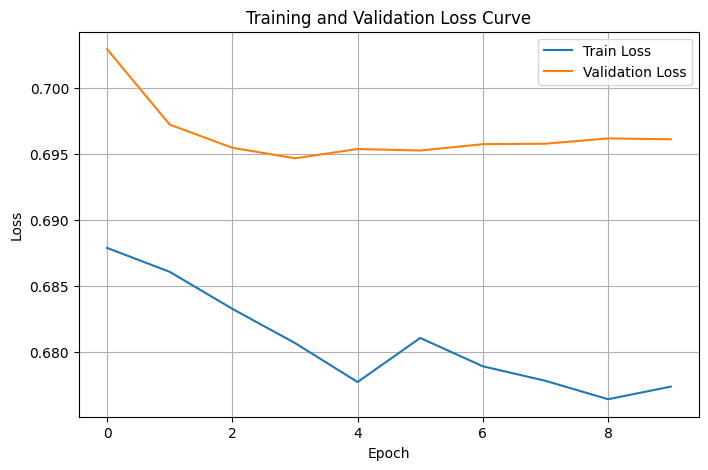

✅ Metrics saved to metrics_logs/Downtrend_metrics.csv
📊 Loaded metrics for Downtrend:
    accuracy  precision  recall        f1   roc_auc  optimal_threshold_val  \
58  0.307692   0.307692     1.0  0.470588  0.464214               0.484455   
59  0.389728   0.389728     1.0  0.560870  0.464214               0.484102   
60  0.415354   0.415354     1.0  0.586926  0.464214               0.519791   
61  0.400810   0.400810     1.0  0.572254  0.464214               0.521958   
62  0.383693   0.383693     1.0  0.554593  0.464214               0.507316   

    best_f05_on_val  num_test_samples  
58         0.552248                78  
59         0.523282               331  
60         0.551993               508  
61         0.502808               494  
62         0.493734               417  
平均Precision: 0.347079887956576
平均Recall: 0.5774650953758087


In [ ]:
import torch
# import pytorch_lightning as pl # Removed as we are using a manual loop or simpler trainer
# from pytorch_forecasting.models import TemporalFusionTransformer # Assuming TFT is imported from tft_model.py
# from pytorch_forecasting.data import TimeSeriesDataSet, GroupNormalizer # Removed as using CryptoBinaryDataset
# from pytorch_forecasting.metrics import QuantileLoss, CrossEntropy # Use standard torch.nn losses and sklearn metrics
# from pytorch_lightning.callbacks import EarlyStopping # Manual early stopping or simpler trainer
# from pytorch_forecasting.data.encoders import NaNLabelEncoder # Handled by dataset or manually

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import torch.nn as nn
import torch.nn.functional as F # Import F for BCEWithLogitsLoss or FocalLoss
from torch.utils.data import DataLoader # Import DataLoader
from sklearn.metrics import classification_report # Import classification_report
import copy # Import copy for model state
import math # Import math for cosine scheduler
from torch.optim.lr_scheduler import OneCycleLR
import math
import matplotlib.pyplot as plt
import json
import csv
import os

# Ensure model and filtering modules are available
try:
    # Assuming TFT is imported from tft_model
    from tft_model import TFT # Assuming this is how TFT is imported
    # import model # Assuming model module contains TFT if not directly imported
    import filtering
    import dataset # Assuming CryptoBinaryDataset is in dataset.py
    importlib = __import__('importlib')
    # importlib.reload(model) # Reload if model contains TFT
    importlib.reload(filtering)
    importlib.reload(dataset) # Reload dataset module
    # Assuming create_dataframe_for_dataset is defined in a separate cell and is available globally
    # from __main__ import create_dataframe_for_dataset # Import the new function from the notebook's main scope

    print("Successfully imported and reloaded filtering and dataset modules.")
    # Assuming TFT class is available globally after previous imports

except ImportError as e:
    print(f"Error: Could not import required modules (filtering, dataset, or TFT indirectly): {e}")
    print("Please ensure filtering.py, dataset.py, and tft_model.py exist and TFT is importable.")
    # Exit or set flags if essential imports fail
    raise e # Re-raise the exception to stop execution if essential modules is_ missing
except NameError as e:
     print(f"Error: Required function '{e}' is not defined. Please ensure the cell defining it has been executed.")
     raise e


# Define FocalLoss if not already defined elsewhere
# This is a standard implementation of Focal Loss for binary classification with logits
class BinaryFocalLoss(torch.nn.Module):
    def __init__(self, alpha=0.5, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, targets):
        # targets ∈ {0,1}, 形状は logits と同じ。-1 は前段でマスクして除外しておく
        bce = F.binary_cross_entropy_with_logits(logits, targets.float(), reduction='none')
        p = torch.sigmoid(logits)
        p_t = p*targets + (1-p)*(1-targets)
        alpha_t = self.alpha*targets + (1-self.alpha)*(1-targets)
        loss = alpha_t * (1 - p_t).pow(self.gamma) * bce
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss

# Define categorical_features and date_features - used for identifying feature types
# These lists should align with the features generated in the data preparation steps.
# Assuming these lists are comprehensive of the categorical features present in the data.
# Comment out categorical feature names to exclude them
categorical_feature_names_list = CAT_FEATURES_ALL +  date_features


# Dictionary to store results for each strategy
overall_strategy_results = {}

#############################################################################
# ユーザーが選択したい戦略カテゴリのリスト
# ここに学習・予測を実行したい戦略カテゴリ名を指定してください
strategies_to_run = [
    'Downtrend',
    # 'Range',
    # 'Reversal_Down',
    # 'Reversal_Up',
    # 'Uptrend',
    # 'unknown', # ラベル付けされないため学習・予測対象外とするのが一般的
]

# 戦略カテゴリごとのTFTモデルパラメータ
# 各戦略カテゴリ名に対応するパラメータ辞書を定義してください
# Note: These parameters will be used to update the global 'config' dictionary for each strategy
strategy_model_params = {
    'Uptrend': {
        'learning_rate': 5e-5, # Adjusted learning rate
        'weight_decay': 1e-5, # Added weight decay
        'gradient_clip_norm': 1.0, # Added gradient clipping norm
        'num_epochs': 100, # Increased epochs for potential longer training
        'hidden_size': 64,
        'lstm_layers': 2,
        'dropout': 0.3,
        'hidden_continuous_size': 32,
        'encode_length': 59, # Adjusted to match seq_length - predict_length (60-1)
        'seq_length': 60, # Adjusted to match actual sequence length from data prep
        'patience': 5, # Early stopping patience
        'batch_size': 32, # Define batch size per strategy
        'warmup_epochs_ratio': 0.05
    },
    'Downtrend': {
        'learning_rate': 2e-5, # Adjusted learning rate
        'weight_decay': 1e-4, # Added weight decay
        'gradient_clip_norm': 1.0, # Added gradient clipping norm
        'num_epochs': 10,
        'hidden_size': 64,
        'lstm_layers': 2,
        'dropout': 0.4,
        'hidden_continuous_size': 32,
        'encode_length': 24, # Adjusted to match seq_length - predict_length (60-1)
        'seq_length': 30, # Adjusted to match actual sequence length from data prep
        'patience': 5, # Early stopping patience
        'batch_size': 64,
        'warmup_epochs_ratio': 0.1
    },
    'Reversal_Up': {
        'learning_rate': 1e-4, # Adjusted learning rate
        'weight_decay': 1e-5, # Added weight decay
        'gradient_clip_norm': 1.0, # Added gradient clipping norm
        'num_epochs': 30,
        'hidden_size': 32,
        'lstm_layers': 1,
        'dropout': 0.2,
        'hidden_continuous_size': 32,
        'encode_length': 59, # Adjusted to match seq_length - predict_length (60-1)
        'seq_length': 60, # Adjusted to match actual sequence length from data prep
        'patience': 5, # Early stopping patience
        'batch_size': 32,
        'warmup_epochs_ratio': 0.05
    },
    'Reversal_Down': {
        'learning_rate': 1e-4, # Adjusted learning rate
        'weight_decay': 1e-5, # Added weight decay
        'gradient_clip_norm': 1.0, # Added gradient clipping norm
        'num_epochs': 30,
        'hidden_size': 32,
        'lstm_layers': 1,
        'dropout': 0.2,
        'hidden_continuous_size': 32,
        'encode_length': 59, # Adjusted to match seq_length - predict_length (60-1)
        'seq_length': 60, # Adjusted to match actual sequence length from data prep
        'patience': 5, # Early stopping patience
        'batch_size': 32,
        'warmup_epochs_ratio': 0.05
    },
     'Range': {
        'learning_rate': 1e-4, # Adjusted learning rate
        'weight_decay': 1e-5, # Added weight decay
        'gradient_clip_norm': 1.0, # Added gradient clipping norm
        'num_epochs': 100,
        'hidden_size': 64,
        'lstm_layers': 2,
        'dropout': 0.3,
        'hidden_continuous_size': 64,
        'encode_length': 59, # Adjusted to match seq_length - predict_length (60-1)
        'seq_length': 60, # Adjusted to match actual sequence length from data prep
        'patience': 5, # Early stopping patience
        'batch_size': 32,
        'warmup_epochs_ratio': 0.05
    },
    # 'unknown': {'n_clusters': 5, 'random_state': 42, 'n_init': 10}, # Example for unknown, adjust as needed
}
#############################################################################


# Ensure device is set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Base config (will be updated per strategy)
# NOTE: CryptoBinaryDataset does not currently handle static variables separately.
# Update the config to reflect this.
config = {
    "device": device,
    "batch_size": 32, # Default batch size, can be overridden by strategy_model_params
    "static_variables": 0, # Assuming no static variables handled by CryptoBinaryDataset
    "encode_length": 48, # Default encode length, can be overridden
    "seq_length": 54, # Default sequence length (encode + predict), can be overridden
    "time_varying_categoical_variables": 0, # Will be determined dynamically
    "time_varying_real_variables_encoder": 0, # Will be determined dynamically
    "time_varying_real_variables_decoder": 0, # Will be determined dynamically (same as encoder)
    "num_masked_series": 0, # Assuming not used
    "lstm_hidden_dimension": 64, # Default, can be overridden
    "lstm_layers": 2, # Default, can be overridden
    "dropout": 0.3, # Default, can be overridden
    "embedding_dim": 8, # Default embedding dim
    "attn_heads": 4, # Default attention heads
    "num_quantiles": 1, # Binary classification
    "valid_quantiles": [0.5], # Not directly used in BCE loss, but kept for model compatibility
    "static_embedding_vocab_sizes": [], # Assuming no static categorical
    "time_varying_embedding_vocab_sizes": [], # Will be determined dynamically
    "debug_categorical_input": True # Ensure debug flag is True in base config
}


print("\n--- Starting Multi-Strategy Training and Evaluation ---")

# Check if required input variables exist from previous cells
required_data_vars = ['train_data_by_strategy', 'test_data_by_strategy', 'val_data_by_strategy', 'integrated_clusters', 'generated_label_strategy', 'feature_names', 'create_dataframe_for_dataset', 'original_indices_filtered']
for var_name in required_data_vars:
    if var_name not in locals():
        print(f"Error: Required data variable or function '{var_name}' is not defined. Please ensure all preceding data preparation steps and the cell defining create_dataframe_for_dataset are run.")
        # Exit if essential data is missing
        # sys.exit(f"Required data variable '{var_name}' not defined.") # Uncomment if running as script
        raise NameError(f"Required variable or function '{var_name}' not defined.")


for strategy_name in strategies_to_run:
    print(f"\n--- Processing Strategy: {strategy_name} ---")

    # --- Update Config based on Strategy Params ---
    # Define current_config at the start of the loop
    current_params = strategy_model_params.get(strategy_name, {})
    current_config = config.copy() # Start with base config (includes debug_categorical_input=True)
    current_config.update(current_params) # Update with strategy-specific params


    # Get data for the current strategy
    train_data_strat = train_data_by_strategy.get(strategy_name)
    val_data_strat = val_data_by_strategy.get(strategy_name) # Get validation data
    test_data_strat = test_data_by_strategy.get(strategy_name)

    if train_data_strat is None:
        print(f"Skipping strategy '{strategy_name}': Training data not found in train_data_by_strategy.")
        overall_strategy_results[strategy_name] = {"error": "Training data not found for strategy"}
        continue # Skip to the next strategy

    X_train_strat_list = train_data_strat.get('X', [])
    y_train_strat_list = train_data_strat.get('y', []) # y_train_strat_list contains one target per sequence (as 1-element array)
    original_indices_train_list = train_data_strat.get('original_indices', []) # Get the list of indices (list of DatetimeIndex or arrays)

    # Validation data lists
    X_val_strat_list = val_data_strat.get('X', []) if val_data_strat else []
    y_val_strat_list = val_data_strat.get('y', []) if val_data_strat else []
    original_indices_val_list = val_data_strat.get('original_indices', []) if val_data_strat else []

    # Test data lists
    X_test_strat_list = test_data_strat.get('X', []) if test_data_strat else []
    y_test_strat_list = test_data_strat.get('y', []) if test_data_strat else []
    original_indices_test_list = test_data_strat.get('original_indices', []) if test_data_strat else []

    train_end_timestamp = original_indices_train_list[-1][-1]
    print(f"    Debug: training end timestamp: {train_end_timestamp}")


    # --- Determine actual feature names and counts for the current strategy ---
    # Assuming X_train_strat_list is a list of numpy arrays, and the first array (if exists)
    # represents the structure. This might need refinement if feature sets truly vary within a strategy's list.
    current_feature_names = feature_names_3d # Start with the global feature_names list
    num_features_in_data = 0
    if X_train_strat_list and isinstance(X_train_strat_list[0], np.ndarray) and X_train_strat_list[0].ndim > 1:
         num_features_in_data = X_train_strat_list[0].shape[-1]
         # The check for feature names mismatch was moved earlier in the notebook
         # Assuming feature_names list and the data columns are now aligned.
         # If not, the data preparation step needs fixing.
         if num_features_in_data != len(feature_names_3d):
              print(f"Warning: Global feature_names length ({len(feature_names_3d)}) does not match actual feature count in training data ({num_features_in_data}) for strategy '{strategy_name}'. Using global feature_names (assuming they are correctly ordered).")
              # We will proceed using the global feature_names list, assuming the data columns
              # correspond to the first `num_features_in_data` names in this list.
              # This relies on consistency in earlier data processing steps.
         current_feature_names = feature_names_3d[:num_features_in_data] # Use the subset of names that match actual features
    elif X_train_strat_list:
         print(f"Warning: X_train_strat_list for strategy '{strategy_name}' is not a list of multi-dimensional arrays. Cannot determine feature count. Skipping.")
         overall_strategy_results[strategy_name] = {"error": "Invalid training data format"}
         continue
    else:
         print(f"Warning: No training data available for strategy '{strategy_name}'. Cannot determine feature count. Skipping.")
         overall_strategy_results[strategy_name] = {"error": "No training data"}
         continue


    # --- Create DataFrames for CryptoBinaryDataset using the updated function ---
    df_train_strat = None
    df_val_strat = None
    df_test_strat = None
    train_dataloader = None
    val_dataloader = None
    test_dataloader = None

    try:
        # train DataFrame
        print(f"Creating df_train for strategy '{strategy_name}'...")
        # Pass the adjusted current_feature_names to the function
        df_train_strat = create_dataframe_for_dataset(
            X_train_strat_list,
            y_train_strat_list,
            original_indices_train_list,
            integrated_clusters, # Pass the full integrated_clusters for lookup within the function
            current_feature_names, # Use the adjusted feature names for this strategy
            seq_length=current_config["seq_length"], # Pass seq_length from current_config
            original_indices_filtered=original_indices_filtered, # Pass the full original_indices_filtered
            target_strategy_name=strategy_name
        )

        if df_train_strat is None:
             print(f"Failed to create df_train for strategy '{strategy_name}'. Skipping.")
             overall_strategy_results[strategy_name] = {"error": "Failed to create df_train"}
             continue # Skip to next strategy if DataFrame creation failed

        print(f"Created df_train for {strategy_name} with shape {df_train_strat.shape}")


        # val DataFrame (only if validation data exists)
        if len(X_val_strat_list) > 0:
            print(f"Creating df_val for strategy '{strategy_name}'...")
            df_val_strat = create_dataframe_for_dataset(
                X_val_strat_list,
                y_val_strat_list,
                original_indices_val_list,
                integrated_clusters,
                current_feature_names,
                seq_length=current_config["seq_length"],
                original_indices_filtered=original_indices_filtered,
                target_strategy_name=strategy_name
            )
            if df_val_strat is not None:
                 print(f"Created df_val for {strategy_name} with shape {df_val_strat.shape}")
            else:
                 print(f"Failed to create df_val for strategy '{strategy_name}'. Skipping validation.")


        # test DataFrame (only if test data exists)
        if len(X_test_strat_list) > 0:
            print(f"Creating df_test for strategy '{strategy_name}'...")
            df_test_strat = create_dataframe_for_dataset(
                 X_test_strat_list,
                 y_test_strat_list,
                 original_indices_test_list,
                 integrated_clusters, # Pass the full integrated_clusters for lookup within the function
                 current_feature_names, # Use the adjusted feature names for this strategy
                 seq_length=current_config["seq_length"], # Pass seq_length from current_config
                 original_indices_filtered=original_indices_filtered, # Pass the full original_indices_filtered
                 target_strategy_name=strategy_name
             )

            if df_test_strat is not None:
                print(f"Created df_test for {strategy_name} with shape {df_test_strat.shape}")
            else:
                print(f"Failed to create df_test for strategy '{strategy_name}'. Evaluation will be skipped.")
        else:
             print(f"No test data lists available for strategy '{strategy_name}'. Skipping test DataFrame creation and evaluation.")
             df_test_strat = None # Ensure df_test_strat is None


    except Exception as e:
        print(f"Error creating DataFrames for strategy '{strategy_name}' using create_dataframe_for_dataset: {e}")
        overall_strategy_results[strategy_name] = {"error": f"DataFrame creation failed using new function: {e}"}
        # Ensure dataloaders are None if df creation failed
        train_dataloader = None
        val_dataloader = None
        test_dataloader = None
        continue


    # Determine feature columns from the created DataFrame for the dataset
    # Exclude control columns used by TFT internally or for identification
    # Use current_feature_names derived for this strategy
    feature_cols_from_df = [col for col in df_train_strat.columns if col in current_feature_names] # Filter using current_feature_names
    print(f"Using {len(feature_cols_from_df)} feature columns for dataset: {feature_cols_from_df}")

    # Identify real and categorical feature names from the determined feature_cols_from_df
    categorical_feature_names_list_plus = categorical_feature_names_list + ['close', 'MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168']
    real_feature_names = [col for col in feature_cols_from_df if col not in categorical_feature_names_list_plus]
    # Keep only the categorical features explicitly listed and NOT commented out
    categorical_feature_names = [col for col in feature_cols_from_df if col in categorical_feature_names_list]


    # --- Add print statements here ---
    print("\nDataset Real Feature Names:")
    print(real_feature_names)
    print("\nDataset Categorical Feature Names:")
    print(categorical_feature_names)
    # --- End of added print statements ---

    print(f"Identified {len(real_feature_names)} real features and {len(categorical_feature_names)} categorical features.")
    # print(f"Real features: {real_feature_names}") # Debugging
    # print(f"Categorical features: {categorical_feature_names}") # Debugging


    # --- Update Config based on Feature Counts ---
    # Update feature counts in config based on identified features
    current_config["time_varying_real_variables_encoder"] = len(real_feature_names)
    current_config["time_varying_real_variables_decoder"] = len(real_feature_names) # Assume same for decoder
    current_config["time_varying_categoical_variables"] = len(categorical_feature_names)
    # Static variables are assumed 0 as per CryptoBinaryDataset limitation
    current_config["static_variables"] = 0
    current_config["static_embedding_vocab_sizes"] = []

    # Determine vocabulary sizes for time-varying categorical features
    # Need to iterate through the unique values for each categorical column in the training data DataFrame
    time_varying_embedding_vocab_sizes = []
    # Only calculate vocab sizes if there are categorical features selected
    if len(categorical_feature_names) > 0:
        for col in categorical_feature_names:
            if col in df_train_strat.columns:
                # Ensure column is treated as categorical and handle potential NaNs added by create_timeseries_dataframe
                # Convert to string to handle NaNs consistently, then get unique values and their count
                # Filter out -1 (unlabeled) if it's not a valid category ID
                # Check if the column exists in the DataFrame before trying to access it
                if col in df_train_strat.columns:
                    unique_vals = df_train_strat[col].dropna().unique() # Exclude NaNs for vocab count
                    # If using the -1 -> 0, 0 -> 1, 1 -> 2 mapping, the valid indices are 0, 1, 2.
                    # For hour/day_of_week/day, the valid indices are 0 to max_val.
                    # The vocab size should be the number of *expected* categories plus one if 0 is a valid category ID and max is N, need N+1 size.
                    # A safer approach is to use the max value found in the training data + 1 as the vocab size,
                    # as long as min value is 0 or greater. If min is negative, need special handling or mapping.
                    # Assuming the mapping in create_dataframe_for_dataset ensures values are 0 or positive integers.
                    if len(unique_vals) > 0:
                         max_val_found = int(np.max(unique_vals))
                         vocab_size = max_val_found + 1 # Vocab size is max index + 1
                    else:
                         vocab_size = 1 # Default to 1 if no unique values found (e.g., empty column or all NaNs)
                    time_varying_embedding_vocab_sizes.append(vocab_size)
                    # print(f"Vocab size for '{col}': {vocab_size} (based on max value {max_val_found if len(unique_vals)>0 else 'N/A'} in training data)")
                else:
                     # This should not happen if feature_cols_from_df is derived from df_train_strat columns
                     print(f"Warning: Categorical feature '{col}' not found in df_train_strat columns. Appending dummy vocab size 1.")
                     time_varying_embedding_vocab_sizes.append(1) # Append 1 for safety.

    current_config["time_varying_embedding_vocab_sizes"] = time_varying_embedding_vocab_sizes


    # --- Print current_config before model instantiation ---
    print(f"\nDebug: Current config for strategy '{strategy_name}' before model instantiation:")
    print(current_config)
    print("-----------------------------------------------------")
    # --- End Print ---


    # --- Create Dataset and DataLoader ---
    train_dataloader = None
    val_dataloader = None
    test_dataloader = None
    try:
        # Ensure the DataFrame has enough data points per group to form sequences
        # predict_length needs to be calculated based on current_config
        if "encode_length" in current_config and "seq_length" in current_config:
             predict_length = current_config["seq_length"] - current_config["encode_length"]
             if predict_length <= 0:
                  print(f"Error: predict_length is not positive ({predict_length}) for strategy '{strategy_name}'. Check encode_length and seq_length config. Skipping.")
                  overall_strategy_results[strategy_name] = {"error": "Invalid encode/seq length config"}
                  continue
        else:
             print(f"Error: 'encode_length' or 'seq_length' not found in config for strategy '{strategy_name}'. Skipping.")
             overall_strategy_results[strategy_name] = {"error": "Missing encode/seq length config"}
             continue


        min_required_length = current_config["encode_length"] + predict_length # Minimum length of a group must be encode_len + decoder_len

        # Filter training DataFrame for sequence length
        group_lengths_train = df_train_strat.groupby("group_id").size()
        valid_groups_train = group_lengths_train[group_lengths_train >= min_required_length].index # Use min_required_length as min length

        if not valid_groups_train.empty:
            df_train_strat_filtered = df_train_strat[df_train_strat['group_id'].isin(valid_groups_train)].copy()
            print(f"DataFrame for strategy '{strategy_name}' training data (filtered for sequence length): {df_train_strat_filtered.shape}")

            train_dataset = CryptoBinaryDataset( # Use dataset.CryptoBinaryDataset
                df_train_strat_filtered,
                encoder_len=current_config["encode_length"],
                decoder_len=predict_length, # Use predict_length
                real_feature_cols=real_feature_names, # Pass real feature names
                categorical_feature_cols=categorical_feature_names, # Pass categorical feature names (now potentially empty)
                target_col="target",
                group_id_col="group_id",
                time_idx_col="time_idx",
                train_end_timestamp=original_indices_train_list[-1][-1]
            )

            if len(train_dataset) == 0:
                 print(f"No sequences generated for strategy '{strategy_name}' training data. Skipping training.")
                 train_dataloader = None
            else:
                train_dataloader = DataLoader(
                    train_dataset,
                    batch_size=current_config["batch_size"],
                    shuffle=True,
                    drop_last=True # Drop last batch if it's smaller than batch_size
                )
                print(f"Created DataLoader for strategy '{strategy_name}' training data with {len(train_dataset)} sequences.")
        else:
             print(f"No groups in strategy '{strategy_name}' training data are long enough ({min_required_length} timesteps) to form sequences. Skipping training for this strategy.")
             train_dataloader = None


        # Create validation DataLoader if validation data exists and is valid
        if df_val_strat is not None and df_val_strat.shape[0] > 0:
             group_lengths_val = df_val_strat.groupby("group_id").size()
             valid_groups_val = group_lengths_val[group_lengths_val >= min_required_length].index

             if not valid_groups_val.empty:
                  df_val_strat_filtered = df_val_strat[df_val_strat['group_id'].isin(valid_groups_val)].copy()
                  print(f"DataFrame for strategy '{strategy_name}' validation data (filtered for sequence length): {df_val_strat_filtered.shape}")

                  val_dataset = CryptoBinaryDataset(
                      df_val_strat_filtered,
                      encoder_len=current_config["encode_length"],
                      decoder_len=predict_length,
                      real_feature_cols=real_feature_names,
                      categorical_feature_cols=categorical_feature_names,
                      target_col="target",
                      group_id_col="group_id",
                      time_idx_col="time_idx"
                  )

                  if len(val_dataset) == 0:
                       print(f"No sequences generated for strategy '{strategy_name}' validation data. Skipping validation.")
                       val_dataloader = None
                  else:
                       val_dataloader = DataLoader(
                           val_dataset,
                           batch_size=current_config["batch_size"],
                           shuffle=False,
                           drop_last=False # Keep all samples in validation
                       )
                       print(f"Created DataLoader for strategy '{strategy_name}' validation data with {len(val_dataset)} sequences.")
             else:
                  print(f"No groups in strategy '{strategy_name}' validation data are long enough ({min_required_length} timesteps) to form sequences. Skipping validation.")
                  val_dataloader = None
        else:
             print(f"No validation data lists or DataFrame available for strategy '{strategy_name}'. Skipping validation.")
             df_val_strat = None # Ensure df_val_strat is None


        # Create test DataLoader if test data exists and is valid
        if df_test_strat is not None and df_test_strat.shape[0] > 0:
            # Filter test DataFrame for sequence length
            group_lengths_test = df_test_strat.groupby("group_id").size()
            valid_groups_test = group_lengths_test[group_lengths_test >= min_required_length].index # Use min_required_length as min length

            if not valid_groups_test.empty:
                df_test_strat_filtered = df_test_strat[df_test_strat['group_id'].isin(valid_groups_test)].copy()
                print(f"DataFrame for strategy '{strategy_name}' test data (filtered for sequence length): {df_test_strat_filtered.shape}")

                test_dataset = CryptoBinaryDataset( # Use dataset.CryptoBinaryDataset
                    df_test_strat_filtered,
                    encoder_len=current_config["encode_length"],
                    decoder_len=predict_length, # Use predict_length
                    real_feature_cols=real_feature_names, # Pass real feature names
                    categorical_feature_cols=categorical_feature_names, # Pass categorical feature names (now potentially empty)
                    target_col="target",
                    group_id_col="group_id",
                    time_idx_col="time_idx"
                )

                if len(test_dataset) == 0:
                     print(f"No sequences generated for strategy '{strategy_name}' test data. Skipping evaluation.")
                     test_dataloader = None
                else:
                    test_dataloader = DataLoader(
                        test_dataset,
                        batch_size=current_config["batch_size"],
                        shuffle=False,
                        drop_last=False # Keep all samples in test
                    )
                    print(f"Created DataLoader for strategy '{strategy_name}' test data with {len(test_dataset)} sequences.")
            else:
                 print(f"No groups in strategy '{strategy_name}' test data are long enough ({min_required_length} timesteps) to form sequences. Skipping evaluation for this strategy.")
                 test_dataloader = None
        # No need for else here, test_dataloader remains None if df_test_strat is None or empty


    except Exception as e:
        print(f"Error creating Dataset or DataLoader for strategy '{strategy_name}': {e}")
        overall_strategy_results[strategy_name] = {"error": f"Dataset/DataLoader creation failed: {e}"}
        # Ensure dataloaders are None if df creation failed
        train_dataloader = None
        val_dataloader = None
        test_dataloader = None
        continue


    #--- Model Training ---
    # Only train if training data is available
    if train_dataloader is not None and len(train_dataloader) > 0:
        print(f"\n--- Starting Model Training for Strategy: {strategy_name} ---")
        train_loss_history, val_loss_history = [], []
        try:
            # Instantiate the TFT model with the current config
            model = TFT(current_config).to(device) # Assuming TFT class is available globally

            # Print model architecture once after the first strategy (if successful)
            if strategy_name == strategies_to_run[0]:
                 print("Debug: Model Architecture:")
                 print(model)


            # Use FocalLoss with specified alpha and gamma
            # FocalLoss expects logits=True for output from nn.Linear before sigmoid
            # pos_weight is not directly supported by this FocalLoss implementation;
            # alpha handles class balancing.
            # Setting alpha=0.5 means equal weighting (1-alpha=0.5).
            # To weight positive class more, alpha should be less than 0.5.
            # Let's use alpha=0.5 and gamma=5 as requested.
            # If pos_weight was calculated, we could potentially use it to adjust alpha,
            # e.g., alpha = negative_count / (positive_count + negative_count)
            # But sticking to the requested alpha=0.5, gamma=5 first.

            # loss_fn = BinaryFocalLoss(alpha=0.3, gamma=5.0, reduction='none')
            # print(f"Using FocalLoss with alpha=0.5, gamma=5.0, reduction='none' for strategy '{strategy_name}'.")

            strat_targets_for_weights = np.array([s["target"][0] for s in train_dataset.sequences])

            num_pos = (strat_targets_for_weights == 1).sum()
            num_neg = (strat_targets_for_weights == 0).sum()
            total = num_pos + num_neg

            print(f"[Info] Labels in training data -> pos={num_pos}, neg={num_neg}, total={total}")

            # --- Step 2: クラス比率に基づく重み計算 ---
            if num_pos > 0 and num_neg > 0:
                w_pos = total / (2.0 * num_pos)
                w_neg = total / (2.0 * num_neg)
            else:
                # ラベルが片側しか存在しない場合のフォールバック
                w_pos, w_neg = 1.0, 1.0

            print(f"[Info] Computed class weights: w_pos={w_pos:.4f}, w_neg={w_neg:.4f}")



            bce_loss = torch.nn.BCEWithLogitsLoss(reduction='none')
            # loss_fn = BinaryFocalLoss(alpha=1.5, gamma=1.6, reduction='none')

            # --- Training Loop（該当箇所抜粋） ---
            alpha_mixup = 0.1           # 例：0.2〜0.4
            apply_mixup_epochs = 1.0    # 例：総エポックの前半〜中盤で適用（比率）


            # Define Optimizer with Weight Decay
            # パラメタグループ分け（LayerNorm, bias は除外）
            decay, no_decay = [], []
            for name, param in model.named_parameters():
                if not param.requires_grad:
                    continue  # freezeパラメータを除外
                if len(param.shape) == 1 or name.endswith(".bias"):
                    no_decay.append(param)
                else:
                    decay.append(param)

            optimizer_grouped_parameters = [
                {'params': decay, 'weight_decay': current_config.get('weight_decay', 0.01)},
                {'params': no_decay, 'weight_decay': 0.0}
            ]
            optimizer = torch.optim.AdamW(
                    optimizer_grouped_parameters,
                    lr=current_config['learning_rate'],
                    weight_decay=current_config.get('weight_decay', 0.01)
                )
            print(f"Debug: Optimizer: Adam with lr={current_config['learning_rate']}, weight_decay={current_config.get('weight_decay', 0.0)}")

            # --- Scheduler: OneCycleLR に置き換え ---
            num_epochs = current_config['num_epochs']
            # これまでの warmup_ratio を OneCycle の pct_start にマップ（例：0.2）
            warmup_ratio = float(current_config.get('warmup_epochs_ratio', 0.2))

            # 勾配累積を使う場合は「見かけの1エポック当たり更新回数」で割る
            accum_steps = int(current_config.get('grad_accum_steps', 1))
            steps_per_epoch = math.ceil(len(train_dataloader) / max(1, accum_steps))

            # OneCycle の最大LRは「あなたの設定している learning_rate」をそのまま max_lr に
            max_lr = float(current_config['learning_rate'])

            scheduler = OneCycleLR(
                optimizer,
                max_lr=max_lr,                 # 例: 1e-3〜2e-3
                epochs=num_epochs,
                steps_per_epoch=steps_per_epoch,
                pct_start=warmup_ratio,        # 旧warmup比率をここに反映
                anneal_strategy='cos',         # 後半は Cosine で減衰
                div_factor=10.0,               # 初期LR = max_lr / div_factor
                final_div_factor=100.0         # 終盤の最小学習率（max_lr / (div_factor*final_div_factor)）
            )



            # Early Stopping setup based on Validation Loss
            # Use validation loss if available, otherwise use training loss (less ideal)
            use_validation_for_early_stopping = (val_dataloader is not None and len(val_dataloader) > 0)
            print(f"Using validation loss for early stopping: {use_validation_for_early_stopping}")

            patience = current_config.get('patience', 5) # Get patience from config, default to 5
            min_delta = 0.0001 # Minimum change to qualify as an improvement (slightly smaller delta)
            best_loss = float('inf')
            epochs_no_improve = 0
            early_stop = False
            best_model_state = None # To store the state_dict of the best model

            # Lists to store loss history
            train_loss_history = []
            val_loss_history = []

            # Get gradient clip norm from config
            gradient_clip_norm = current_config.get('gradient_clip_norm', None)
            if gradient_clip_norm is not None:
                print(f"Debug: Using Gradient Clipping with norm = {gradient_clip_norm}")
            else:
                 print("Debug: No Gradient Clipping applied.")


            # --- Debugging: Before Epoch Loop ---
            print(f"Debug: Before Epoch Loop for strategy '{strategy_name}'")
            print(f"Debug: Number of epochs: {current_config['num_epochs']}")
            print(f"Debug: Early Stopping Patience: {patience}")
            # --- End Debugging ---

            # --- 初期化 ---
            best_model_state = None
            best_metric = float('inf')          # val_loss もしくは train_loss
            best_epoch = -1
            epochs_no_improve = 0
            min_delta = current_config.get('early_stop_min_delta', 0.0)
            patience = current_config.get('early_stop_patience', 40)
            use_val = (val_dataloader is not None)  # 例: 検証有無

            early_stop = False

            for epoch in range(current_config['num_epochs']): # Use num_epochs from current_config
                model.train()
                total_train_loss = 0
                for i, batch in enumerate(train_dataloader):
                    optimizer.zero_grad()

                    # Extract inputs from the batch
                    # Batch structure from CryptoBinaryDataset: "encoder_real_input", "encoder_categorical_input", "decoder_real_input", "decoder_categorical_input", "target"
                    encoder_real_input = batch["encoder_real_input"].to(device)
                    # Check if categorical input is available before moving to device
                    # If size(-1) is 0, it means no categorical features are present for this batch/dataset
                    encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)

                    decoder_real_input = batch["decoder_real_input"].to(device)
                    # Check if categorical input is available before moving to device
                    decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)

                    target_batch = batch["target"].to(device) # Shape (batch_size, predict_len) - target is replicated

                    # ===== Mixup を適用（前半エポックのみ等、条件付きが安全）=====
                    use_mixup = (epoch < int(current_config['num_epochs'] * apply_mixup_epochs)) and (alpha_mixup is not None and alpha_mixup > 0.0)
                    if use_mixup:
                        encoder_real_input, decoder_real_input, target_single_value, valid_mask = mixup_batch_real_and_label(
                            encoder_real_input, decoder_real_input, target_batch, invalid_value=-1, alpha=alpha_mixup
                        )
                    else:
                        # 恒等（Mixupなし）
                        target_single_value = target_batch[:, 0].float()
                        valid_mask = (target_single_value != -1)


                    # Debugging: Print shapes of input tensors at the start of the training loop (first batch, first epoch)
                    # if i == 0 and epoch == 0:
                    #     print(f"Debug Train Batch {i}, Epoch {epoch} - Input Shapes:")
                    #     print(f"  encoder_real_input shape: {encoder_real_input.shape}")
                    #     print(f"  encoder_categorical_input shape: {encoder_categorical_input.shape}")
                    #     print(f"  decoder_real_input shape: {decoder_real_input.shape}")
                    #     print(f"  decoder_categorical_input shape: {decoder_categorical_input.shape}")
                    #     print(f"  target_batch shape: {target_batch.shape}")


                    # Note: CryptoBinaryDataset does not provide time_idx or static inputs separately.
                    # Assuming TFT model handles relative time indices internally if not provided,
                    # and that static_variables config is 0.

                    # Pass inputs to the model's forward method
                    # Assuming TFT forward signature is compatible with these inputs:
                    # forward(self, x_enc_real, x_dec_real, x_enc_cat, x_dec_cat, x_enc_time_idx=None, x_dec_time_idx=None, static_cat_input=None, static_real_input=None, num_mask_series=0)

                    output, *_ = model(
                        x_enc_real=encoder_real_input,
                        x_dec_real=decoder_real_input,
                        x_enc_cat=encoder_categorical_input,
                        x_dec_cat=decoder_categorical_input,
                        # static_cat_input=None, # Assuming static_variables config is 0
                        # static_real_input=None, # Assuming static_variables config is 0
                        # x_enc_time_idx=None, # Assuming handled internally
                        # x_dec_time_idx=None, # Assuming handled internally
                        # num_mask_series=0
                    )

                    # Debugging: Print shape of model output after forward pass (first batch, first epoch)
                    # if i == 0 and epoch == 0:
                    #     print(f"Debug Train Batch {i}, Epoch {epoch} - Output Shape:")
                    #     print(f"  Model output shape: {output.shape}")


                    # Calculate loss
                    # TFT outputs for the entire decoder window. Target is replicated across predict_len.
                    # For binary classification, we typically predict a single outcome per sequence (at the end of the decoder).
                    # The loss should compare the model's prediction for the *last* decoder timestep
                    # with the single binary target for the sequence.
                    # output shape: (batch_size, predict_len, num_quantiles=1)
                    # target_batch shape: (batch_size, predict_len) - replicated

                    # Take the prediction from the last timestep of the decoder output
                    prediction_last_timestep = output[:, -1, 0] # Shape (batch_size,)
                    # # Take the single target value for the sequence (they are all the same across predict_len)
                    # target_single_value = target_batch[:, 0] # Shape (batch_size,)

                    # # Filter out samples with target -1 if they exist and loss should not be calculated on them
                    # valid_mask = (target_single_value != -1)


                    # ====== 時間減衰重みを作る ======
                    def normalize_to_datetime(end_time_list):
                        s = pd.Series(end_time_list)

                        # 既に Timestamp が多ければそのまま to_datetime（エラーは NaT）
                        dt = pd.to_datetime(s, errors="coerce", utc=True)

                        # まだ NaT が多いなら epoch と仮定して救済（秒→ミリ秒の両方を試す）
                        if dt.isna().mean() > 0.3:
                            # 数値だけ取り出し
                            num = pd.to_numeric(s, errors="coerce")
                            # ms/秒を推定：1e10 超なら ms, そうでなければ秒とみなす（経験則）
                            is_ms = (num > 1e10)
                            dt_sec = pd.to_datetime(num, unit="s", errors="coerce", utc=True)
                            dt_ms  = pd.to_datetime(num, unit="ms", errors="coerce", utc=True)
                            dt = dt_sec.where(~is_ms, dt_ms)

                        # まだ NaT が残るなら、そこで「おかしい値」をログ
                        if dt.isna().any():
                            bad_idx = np.where(dt.isna())[0][:10]
                            print(f"[WARN] invalid sequence_end_time at positions: {bad_idx}, samples: {s.iloc[bad_idx].tolist()}")

                        return pd.DatetimeIndex(dt)

                    # 学習期間の最終時刻（固定）。
                    train_end_ts = batch["train_end_timestamp"]

                    train_end_ts = pd.to_datetime(train_end_ts)

                    # end_time が Timestamp の場合
                    end_times = normalize_to_datetime(batch["sequence_end_time"])

                    # age (hours) を計算（リーク防止のため train_end_ts は学習期内で固定）
                    age_hours = (train_end_ts.tz_localize("UTC") - end_times).total_seconds() / 3600.0
                    age_hours = np.clip(age_hours, 0, None)
                    age_hours = torch.tensor(age_hours, dtype=torch.float32, device=device)

                    # 例：半減期での減衰（hours 単位）。half_life_hours は調整ハイパラ。
                    half_life_hours = 12



                    # 半減期型の時間重み
                    time_w = torch.pow(torch.tensor(0.5, device=device), age_hours / half_life_hours)  # (B,)
                    # 数値安定のため下限クリップ（オプション）
                    time_w = torch.clamp(time_w, min=1e-3)

                    # バッチ平均が1になるように正規化（推奨）
                    if valid_mask.any():
                        valid_mask = valid_mask.view(-1).to(dtype=torch.bool, device=device)
                        time_w = time_w / (time_w[valid_mask].mean() + 1e-8)
                    else:
                        time_w = torch.ones_like(time_w)



                    # ====== 合成重み ======

                    class_w = torch.where(target_single_value == 1,
                          torch.tensor(w_pos, device=device, dtype=torch.float32),
                          torch.tensor(w_neg, device=device, dtype=torch.float32))

                    sample_weight = time_w * class_w  # (B,)

                    sample_weight = sample_weight[:, -1]

                    sample_weight = sample_weight/(sample_weight.mean() + 1e-8)





                    if target_single_value.ndim == 3:      # (B, T_dec, 1)
                        target_single_value = target_single_value[:, -1, 0]
                    elif target_single_value.ndim == 2:    # (B, 1) or (B, T_dec)
                        target_single_value = target_single_value[:, -1]




                    if valid_mask.any():
                        # Use FocalLoss
                        # Loss function expects logits and targets. Ensure valid_mask is applied to both.
                        # Debugging: Print shapes of tensors used in loss calculation
                        if i == 0 and epoch == 0:
                             print(f"Debug Train Batch {i}, Epoch {epoch} - Loss Calc Shapes:")
                             print(f"  prediction_last_timestep[valid_mask] shape: {prediction_last_timestep[valid_mask].shape}")
                             print(f"  target_single_value[valid_mask] shape: {target_single_value[valid_mask].shape}")
                             print("time_w:", time_w.shape)
                             print("sample_weight:", sample_weight.shape)


                        loss = weighted_bce_loss(prediction_last_timestep[valid_mask], target_single_value[valid_mask], weights=sample_weight[valid_mask])
                        # loss = focal_loss_with_weights(
                        #         logits=prediction_last_timestep[valid_mask],
                        #         targets=target_single_value[valid_mask],
                        #         weights=sample_weight,  # ここは既存の時間減衰×クラス重み
                        #         alpha=0.6,              # 正例をやや強調
                        #         gamma=1.5               # 自信過剰予測を抑制
                        #     )
                    else:
                        # If all samples in the batch have target -1, loss is 0
                        loss = torch.tensor(0.0, device=device)


                    loss.backward()

                    # Apply Gradient Clipping
                    if gradient_clip_norm is not None:
                        torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_norm)

                    optimizer.step()
                    scheduler.step() # Step the scheduler after optimizer.step()
                    total_train_loss += loss.item()

                # Calculate average training loss for the epoch
                # Divide by the number of batches, not the total number of sequences
                avg_train_loss = total_train_loss / len(train_dataloader)
                train_loss_history.append(avg_train_loss) # Store training loss
                print(f"Epoch {epoch+1}/{current_config['num_epochs']}, Training Loss: {avg_train_loss:.4f}")

                # --- Validation Loop ---
                if val_dataloader is not None and len(val_dataloader) > 0:
                    model.eval()
                    total_val_loss = 0
                    all_val_preds_prob, all_val_trues = [], []
                    best_val_loss = float('inf')
                    with torch.no_grad():
                            for i, batch in enumerate(val_dataloader):
                                encoder_real_input = batch["encoder_real_input"].to(device)
                                encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                                decoder_real_input = batch["decoder_real_input"].to(device)
                                decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                                target_batch = batch["target"].to(device)

                                output, *_ = model(
                                    x_enc_real=encoder_real_input,
                                    x_dec_real=decoder_real_input,
                                    x_enc_cat=encoder_categorical_input,
                                    x_dec_cat=decoder_categorical_input
                                )

                                prediction_last_timestep = output[:, -1, 0] # Shape (batch_size,)
                                target_single_value = target_batch[:, -1] # Shape (batch_size,)

                                loss = weighted_bce_loss(prediction_last_timestep, target_single_value)
                                # loss = focal_loss_with_weights(
                                #         logits=prediction_last_timestep,
                                #         targets=target_single_value,
                                #         alpha=0.6,              # 正例をやや強調
                                #         gamma=1.5               # 自信過剰予測を抑制
                                #     )


                                total_val_loss += loss.item()

                                # Store predictions and true values for metrics
                                preds_prob = torch.sigmoid(prediction_last_timestep).cpu().numpy()
                                labels = target_single_value.cpu().numpy()
                                all_val_preds_prob.extend(preds_prob)
                                all_val_trues.extend(labels)


                    avg_val_loss = total_val_loss / len(val_dataloader)
                    val_loss_history.append(avg_val_loss) # Store validation loss
                    print(f"Epoch {epoch+1}/{current_config['num_epochs']}, Validation Loss: {avg_val_loss:.4f}")

                    current_metric = avg_val_loss
                    metric_name = "Validation loss"

                else:
                    # 検証がない場合はフォールバック（あくまで暫定）
                    current_metric = avg_train_loss
                    metric_name = "Training loss (fallback)"

                # ====== Early Stopping 判定・ベスト更新 ======
                if current_metric < best_metric - min_delta:
                    best_metric = current_metric
                    best_epoch = epoch
                    epochs_no_improve = 0
                    best_model_state = copy.deepcopy(model.state_dict())
                    print(f"{metric_name} improved at epoch {epoch}. Saved best model.")
                else:
                    epochs_no_improve += 1
                    print(f"EarlyStopping: no improvement for {epochs_no_improve} epoch(s).")
                    if epochs_no_improve >= patience:
                        print(f"EarlyStopping: stop after {patience} epoch(s) without improvement.")
                        early_stop = True
                        break  # ここでは止めるだけ（ロードは共通後段で行う）



            # Load the best model state if early stopping occurred and a best state was saved
            # ====== 学習終了後は必ずベストを復元 ======
            if best_model_state is not None:
                model.load_state_dict(best_model_state)
                print(f"Restored best model from epoch {best_epoch} with metric={best_metric:.6f}.")
            else:
                # 念のため：一度も改善判定が走らなかった異常系
                print("Warning: best_model_state is None. Using the last model weights.")


            model.eval()

            all_logits, all_trues = [], []

            with torch.no_grad():
                for batch in val_dataloader:   # Calib に val を流用するならこれでOK
                    enc_real = batch["encoder_real_input"].to(device)
                    enc_cat  = batch["encoder_categorical_input"]
                    dec_real = batch["decoder_real_input"].to(device)
                    dec_cat  = batch["decoder_categorical_input"]
                    y        = batch["target"].to(device)

                    enc_cat = enc_cat.to(device) if enc_cat.size(-1) > 0 else torch.empty(enc_cat.shape[0], enc_cat.shape[1], 0, dtype=torch.int64, device=device)
                    dec_cat = dec_cat.to(device) if dec_cat.size(-1) > 0 else torch.empty(dec_cat.shape[0], dec_cat.shape[1], 0, dtype=torch.int64, device=device)

                    out, *_ = model(
                        x_enc_real=enc_real, x_dec_real=dec_real,
                        x_enc_cat=enc_cat,   x_dec_cat=dec_cat
                    )
                    logits_last = out[:, -1, 0].detach().cpu().view(-1)      # (B,)
                    target_last = y[:, -1].detach().cpu().float().view(-1)    # (B,)

                    all_logits.append(logits_last.cpu())
                    all_trues.append(target_last.cpu())

                logits_calib = torch.cat(all_logits)       # shape (N,)
                y_calib      = torch.cat(all_trues)        # shape (N,)

                # --- 温度スケーリングを学習 ---
                temp_scaler = fit_temperature(logits_calib, y_calib)
                calib_mode = "temperature"

            print("--- Model Training Finished ---")

        except Exception as e:
            print(f"Error during model training for strategy '{strategy_name}': {e}")
            overall_strategy_results[strategy_name] = {"error": f"Error during model training: {e}"}
            model = None # Invalidate model if training failed
            # Set dataloaders to None here as well to skip subsequent steps for this strategy
            train_dataloader = None
            val_dataloader = None
            test_dataloader = None


    else:
        print(f"\nSkipping model training for strategy '{strategy_name}': Training DataLoader not available or empty.")
        overall_strategy_results[strategy_name] = {"error": "Training DataLoader not available or empty"}
        model = None # Ensure model is None if training is skipped
        # Set test dataloader to None if training was skipped
        val_dataloader = None
        test_dataloader = None


    # --- Prediction and Evaluation (if test data is available and model trained) ---
    if test_dataloader is not None and len(test_dataloader) > 0 and model is not None:
        print(f"\n--- Starting Prediction and Evaluation for Strategy: {strategy_name} ---")
        # --- before test loop ---
        print(f"[TEST] len(test_dataloader) = {len(test_dataloader) if test_dataloader is not None else 'None'}")
        print(f"[TEST] drop_last (test loader) = {getattr(test_dataloader, 'drop_last', 'unknown')}")

        try:
            optimal_threshold = 0.5
            best_precision_on_val = None
            best_f05_on_val = None
            r_min_recall = 0.40

            if val_dataloader is not None and len(val_dataloader) > 0 and (('all_val_logits' in globals() or 'all_val_logits' in locals()) or (all_val_preds_prob and all_val_trues)):
                print(f"\nOptimizing probability threshold on validation data (CALIBRATED) for strategy: {strategy_name}")

                # --- 1) y_true の取得 ---
                if isinstance(all_val_trues, list):
                    y_true = np.asarray(all_val_trues, dtype=int).reshape(-1)
                else:
                    y_true = all_val_trues.astype(int).reshape(-1)

                # 無効ラベル(-1)除外（必要なら）
                valid_mask = (y_true != -1)

                # --- 2) 校正後確率の作成 ---
                if 'all_val_logits' in globals() or 'all_val_logits' in locals():
                    # 推奨：検証時に集めたlogitsを使って校正
                    logits = np.asarray(all_val_logits, dtype=float).reshape(-1)
                else:
                    # フォールバック：未校正確率しか無い場合は logit 復元してから校正
                    raw_probs = np.asarray(all_val_preds_prob, dtype=float).reshape(-1)
                    logits = _safe_logit(raw_probs)

                # valid に絞る
                logits = logits[valid_mask]
                y_true = y_true[valid_mask]

                # 校正器を適用（どれか1つ・あなたの環境の変数名に合わせて）
                # 例: calib_mode in {"temperature","platt","isotonic"}、temp_scaler/platt/iso がロード済み
                platt = None
                iso = None
                probs_cal = apply_calibration_to_logits(
                    logits_np=logits,
                    calib_mode=calib_mode,          # 例: "temperature"
                    temp_scaler=temp_scaler,        # TemperatureScaler
                    device=device
                )
                probs = _safe_clip(probs_cal)       # ← 以降は校正後確率で最適化

                if y_true.size > 0 and np.unique(y_true).size >= 2:
                    eps = 1e-12
                    thresholds = np.unique(probs)
                    thresholds = np.concatenate(([0.0 - eps], thresholds, [1.0 + eps]))
                    thresholds = np.sort(thresholds)

                    best_tuple = None  # (precision, recall, f05, threshold)

                    for t in thresholds:
                        y_pred = (probs >= t).astype(int)
                        if len(np.unique(y_pred)) < 2:
                            continue

                        prec = precision_score(y_true, y_pred, zero_division=0)
                        rec  = recall_score(y_true, y_pred, zero_division=0)
                        f05  = fbeta_score(y_true, y_pred, beta=0.5, zero_division=0)

                        if rec + 1e-12 < r_min_recall:
                            continue

                        cand = (prec, rec, f05, float(t))
                        if best_tuple is None:
                            best_tuple = cand
                        else:
                            # 優先: Precision → F0.5 → Recall → τ(高め)
                            if (cand[0] > best_tuple[0] + 1e-12 or
                                (abs(cand[0] - best_tuple[0]) <= 1e-12 and cand[2] > best_tuple[2] + 1e-12) or
                                (abs(cand[0] - best_tuple[0]) <= 1e-12 and abs(cand[2] - best_tuple[2]) <= 1e-12 and cand[1] > best_tuple[1] + 1e-12) or
                                (abs(cand[0] - best_tuple[0]) <= 1e-12 and abs(cand[2] - best_tuple[2]) <= 1e-12 and abs(cand[1] - best_tuple[1]) <= 1e-12 and cand[3] > best_tuple[3])):
                                best_tuple = cand

                    if best_tuple is None:
                        # フォールバック：Recall最大の中で Precision最大・τ高め
                        best_fb = None  # (rec, prec, f05, t)
                        for t in thresholds:
                            y_pred = (probs >= t).astype(int)
                            if len(np.unique(y_pred)) < 2:
                                continue
                            prec = precision_score(y_true, y_pred, zero_division=0)
                            rec  = recall_score(y_true, y_pred, zero_division=0)
                            f05  = fbeta_score(y_true, y_pred, beta=0.5, zero_division=0)
                            cand = (rec, prec, f05, float(t))
                            if best_fb is None:
                                best_fb = cand
                            else:
                                if (cand[0] > best_fb[0] + 1e-12 or
                                    (abs(cand[0] - best_fb[0]) <= 1e-12 and cand[1] > best_fb[1] + 1e-12) or
                                    (abs(cand[0] - best_fb[0]) <= 1e-12 and abs(cand[1] - best_fb[1]) <= 1e-12 and cand[2] > best_fb[2] + 1e-12) or
                                    (abs(cand[0] - best_fb[0]) <= 1e-12 and abs(cand[1] - best_fb[1]) <= 1e-12 and abs(cand[2] - best_fb[2]) <= 1e-12 and cand[3] > best_fb[3])):
                                    best_fb = cand

                        if best_fb is None:
                            optimal_threshold = 0.5
                            best_precision_on_val = np.nan
                            best_f05_on_val = np.nan
                            print(f"[WARN] Could not find any valid threshold (calibrated). Fallback to 0.5.")
                        else:
                            rec, prec, f05, optimal_threshold = best_fb
                            best_precision_on_val = prec
                            best_f05_on_val = f05
                            print(f"[WARN] No threshold met Recall≥{r_min_recall:.2f} (calibrated). "
                                f"Fallback: τ={optimal_threshold:.6f} | Precision={prec:.4f} | Recall={rec:.4f} | F0.5={f05:.4f}")
                    else:
                        best_precision_on_val, best_recall_on_val, best_f05_on_val, optimal_threshold = best_tuple
                        print(f"Optimal threshold on validation (CALIBRATED, Precision-max, Recall≥{r_min_recall:.2f}): "
                            f"τ={optimal_threshold:.6f} | Precision={best_precision_on_val:.4f} | "
                            f"Recall={best_recall_on_val:.4f} | F0.5={best_f05_on_val:.4f}")
                else:
                    print("Validation has one class or no samples. Using default threshold 0.5.")
                    optimal_threshold = 0.5
                    best_precision_on_val = np.nan
                    best_f05_on_val = np.nan
            else:
                print("Validation DataLoader not available/empty. Using default threshold 0.5.")
                optimal_threshold = 0.5
                best_precision_on_val = np.nan
                best_f05_on_val = np.nan

            # ★ 帯幅を最適化（Precision最大・coverage下限付き）
            coverage_floor = 0.25  # 必要に応じてconfig化
            m_star, m_stats = optimize_abstention_margin_on_val(
                probs_cal_val=probs,
                y_val=y_true,
                tau=optimal_threshold,
                coverage_floor=coverage_floor,
                margins=None,       # 既定グリッド
                min_used=50
            )
            print(f"[VAL] Abstention margin m*={m_star:.3f} | "
                f"Prec={m_stats['precision']:.4f} Rec={m_stats['recall']:.4f} "
                f"F0.5={m_stats['f05']:.4f} Coverage={m_stats['coverage']:.3f}")


            # --- Evaluate on Test Data using the Optimal Threshold ---

            def _log(msg):
                print(msg, flush=True)

            _log("[TEST] ENTER evaluate()")

            try:
                assert test_dataloader is not None, "[TEST] test_dataloader is None"
                _log(f"[TEST] dataloader len={len(test_dataloader)}  batch_size={getattr(test_dataloader, 'batch_size', '?')}  drop_last={getattr(test_dataloader, 'drop_last', '?')}")
            except Exception as e:
                _log(f"[TEST] dataloader introspection failed: {e}")
                traceback.print_exc()
                raise
            model.eval()

            all_test_preds_prob, all_test_trues = [], []
            n_batches, n_rows = 0, 0

            with torch.no_grad():
                for batch in test_dataloader:
                    # Extract inputs from the batch
                    n_batches += 1
                    encoder_real_input = batch["encoder_real_input"].to(device)
                    encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                    decoder_real_input = batch["decoder_real_input"].to(device)
                    decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                    target_batch = batch["target"].to(device)

                    output, *_ = model(
                        x_enc_real=encoder_real_input,
                        x_dec_real=decoder_real_input,
                        x_enc_cat=encoder_categorical_input,
                        x_dec_cat=decoder_categorical_input,
                        # static_cat_input=None,
                        # static_real_input=None,
                        # x_enc_time_idx=None,
                        # x_dec_time_idx=None,
                        # num_mask_series=0
                    )

                    logits_last = output[:, -1, 0]             # shape (B,)
                    labels      = target_batch[:, -1]                   # shape (B,)

                    # --- 確率校正の適用 ---
                    if calib_mode == "temperature":
                        z = temp_scaler(logits_last)        # logits / T
                        probs = torch.sigmoid(z).detach().cpu().numpy()
                    # elif calib_mode == "platt":
                    #     # sklearnのPlattはnumpy受け→確率を返す
                    #     logits_np = logits_last.detach().cpu().numpy().reshape(-1, 1)
                    #     probs = platt.predict_proba(logits_np)[:, 1]
                    # elif calib_mode == "isotonic":
                    #     logits_np = logits_last.detach().cpu().numpy().ravel()
                    #     probs = iso.predict_proba(logits_np)
                    else:
                        # 校正なし（参考）
                        probs = torch.sigmoid(logits_last).detach().cpu().numpy()

                    all_test_preds_prob.extend(probs)
                    all_test_trues.extend(labels.detach().cpu().numpy())
                    n_rows += labels.shape[0]

            print(f"[TEST] batches={n_batches}, raw_rows={n_rows}, "
                f"collected_preds={len(all_test_preds_prob)}, collected_trues={len(all_test_trues)}")

            # === Re-evaluate on TEST: find τ that maximizes F0.5 on TEST, then (optionally) apply abstention ===
            from sklearn.metrics import (
                precision_recall_curve, fbeta_score, precision_score, recall_score,
                roc_auc_score, confusion_matrix, classification_report
            )

            # Calculate evaluation metrics on test data using a TEST-optimized threshold
            if all_test_trues:  # Only evaluate if there are samples
                # 1) flatten & basic cleaning
                probs_test_cal = np.asarray(all_test_preds_prob, dtype=float).ravel()
                y_test = np.asarray(all_test_trues, dtype=float).ravel()
                raw_n = y_test.size

                # 2) validity mask (same rule as validation)
                valid = np.isfinite(y_test) & np.isfinite(probs_test_cal)
                if np.any(y_test == -1):
                    valid &= (y_test != -1)

                probs_v = np.clip(probs_test_cal[valid], 1e-8, 1 - 1e-8)
                y_v = y_test[valid].astype(int, copy=False)
                valid_n = y_v.size

                if valid_n == 0:
                    print("[ERROR] No valid test samples after filtering.")
                else:
                    # --- 3) Optimize τ on TEST by maximizing F0.5 (optionally with a recall floor) ---
                    beta = 0.5
                    r_min = 0.20  # ← 下限制約（必要に応じて 0.30 などへ調整）

                    prec, rec, thr = precision_recall_curve(y_v, probs_v)
                    # precision_recall_curve returns len(thr)+1 elements for prec/rec; align indices
                    # Compute F0.5 at the thresholded points (skip the first point where threshold is undefined)
                    eps = 1e-12
                    f05 = (1 + beta**2) * (prec * rec) / (beta**2 * prec + rec + eps)

                    # Candidate indices (exclude the first point where no threshold)
                    cand_idx = np.arange(1, len(prec))

                    # Apply recall floor
                    cand_idx = cand_idx[rec[cand_idx] >= r_min]
                    if cand_idx.size == 0:
                        # fallback: choose best F0.5 without recall constraint
                        cand_idx = np.arange(1, len(prec))

                    best_i = int(cand_idx[np.nanargmax(f05[cand_idx])])
                    optimal_threshold_test = float(thr[best_i - 1])  # threshold array is len-1

                    print(f"[TEST] Optimal τ on TEST (F0.5 max, Recall≥{r_min:.2f} if possible): "
                        f"{optimal_threshold_test:.6f} | P={prec[best_i]:.4f} | R={rec[best_i]:.4f} | F0.5={f05[best_i]:.4f}")

                    # --- 4) Optional abstention around τ (use m_star from your config; fallback=0.0 = no abstention) ---
                    m_test = float(m_star) if ('m_star' in globals() or 'm_star' in locals()) else 0.0
                    use_mask = np.abs(probs_v - optimal_threshold_test) >= m_test
                    used_n = int(use_mask.sum())
                    if used_n == 0:
                        print(f"[WARN] All test samples abstained (m={m_test:.3f}). Falling back to no-abstention.")
                        use_mask = np.ones_like(y_v, dtype=bool)
                        used_n = valid_n

                    probs_u = probs_v[use_mask]
                    y_u = y_v[use_mask]
                    y_pred = (probs_u >= optimal_threshold_test).astype(int)

                    # --- 5) Metrics on used subset ---
                    try:
                        roc_auc = roc_auc_score(y_u, probs_u) if np.unique(y_u).size == 2 else np.nan
                    except ValueError:
                        roc_auc = np.nan

                    P = precision_score(y_u, y_pred, zero_division=0)
                    R = recall_score(y_u, y_pred, zero_division=0)
                    F05 = fbeta_score(y_u, y_pred, beta=0.5, zero_division=0)

                    print(f"Number of test samples (raw/valid/used): {raw_n} / {valid_n} / {used_n}")
                    print("Confusion Matrix:")
                    print(confusion_matrix(y_u, y_pred))
                    print("\nClassification Report:")
                    print(classification_report(y_u, y_pred, digits=3, zero_division=0))
                    print(f"ROC AUC: {roc_auc:.4f}" if np.isfinite(roc_auc) else "ROC AUC: N/A")
                    print(f"[TEST] Final (with τ* and m={m_test:.3f}) -> Precision={P:.4f} | Recall={R:.4f} | F0.5={F05:.4f} | Coverage={used_n/valid_n:.3f}")





                # Handle cases where only one class is present in test data for metrics
                if len(np.unique(y_u)) < 2:
                    print("Skipping classification metrics: Only one class present in true test labels.")
                    accuracy = float('nan')
                    precision = float('nan')
                    recall = float('nan')
                    f1 = float('nan')
                    auc = float('nan') # AUC is also not calculable

                    # Still print confusion matrix if possible
                    if len(y_pred) > 0 and len(y_u) == len(y_pred):
                        print("Confusion Matrix:")
                        try:
                            print(confusion_matrix(y_u, y_pred))
                        except ValueError as cm_error:
                            print(f"Could not compute confusion matrix: {cm_error}")
                            print(f"True labels unique: {np.unique(y_u)}, Predicted labels unique: {np.unique(y_pred)}")
                    else:
                        print("Cannot compute confusion matrix: Mismatch in lengths or no test predictions/labels.")

                else:
                    print("Confusion Matrix:")
                    print(confusion_matrix(y_u, y_pred))
                    print("\nClassification Report:")
                    # Use optimal_threshold for classification report
                    print(classification_report(y_u, y_pred, digits=3, zero_division=0))
                    try:
                        # ROC AUC is threshold-independent, calculate using probabilities
                        auc = roc_auc_score(y_u, all_test_preds_prob)
                        print(f"\nROC AUC: {auc:.4f}")
                    except ValueError:
                        # Should not happen if len(np.unique(true_labels_test_np)) >= 2, but as safeguard
                        print("\nROC AUC: Cannot calculate ROC AUC.")


                    accuracy = accuracy_score(y_u, y_pred)
                    precision = precision_score(y_u, y_pred, zero_division=0)
                    recall = recall_score(y_u, y_pred, zero_division=0)
                    f1 = f1_score(y_u, y_pred, zero_division=0)


                # Store results
                overall_strategy_results[strategy_name] = {
                    "accuracy": accuracy,
                    "precision": precision,
                    "recall": recall,
                    "f1": f1,
                    "roc_auc": auc,
                    "optimal_threshold_val": optimal_threshold, # Store the optimized threshold
                    "best_f05_on_val": best_f05_on_val if 'best_f05_on_val' in locals() else float('nan'), # Store best F0.5 on val
                    "num_test_samples": len(y_u)
                }

            else:
                print(f"No test samples available for evaluation for strategy: {strategy_name}")
                overall_strategy_results[strategy_name] = {"error": "No test samples for evaluation"}


        except Exception as e:
            print(f"Error during prediction or evaluation for strategy '{strategy_name}': {e}")
            overall_strategy_results[strategy_name] = {"error": f"Error during prediction/evaluation: {e}"}

    else:
        print(f"\nSkipping prediction and evaluation for strategy '{strategy_name}': Test DataLoader not available or empty, or trained model is None.")
        if strategy_name not in overall_strategy_results or ("error" not in overall_strategy_results[strategy_name] and "status" not in overall_strategy_results[strategy_name]): # Avoid overwriting previous errors unless they were just status
                overall_strategy_results[strategy_name] = {"status": "Prediction/evaluation skipped (no data or model)"}


    # Clean up memory
    if 'X_train_strat_list' in locals(): del X_train_strat_list
    if 'y_train_strat_list' in locals(): del y_train_strat_list
    if 'original_indices_train_list' in locals(): del original_indices_train_list
    if 'X_val_strat_list' in locals(): del X_val_strat_list
    if 'y_val_strat_list' in locals(): del y_val_strat_list
    if 'original_indices_val_list' in locals(): del original_indices_val_list
    if 'X_test_strat_list' in locals(): del X_test_strat_list
    if 'y_test_strat_list' in locals(): del y_test_strat_list
    if 'original_indices_test_list' in locals(): del original_indices_test_list

    if 'df_train_strat' in locals() and df_train_strat is not None: del df_train_strat
    if 'df_train_strat_filtered' in locals() and df_train_strat_filtered is not None: del df_train_strat_filtered
    if 'train_dataset' in locals() and train_dataset is not None: del train_dataset
    if 'train_dataloader' in locals() and train_dataloader is not None: del train_dataloader

    if 'df_val_strat' in locals() and df_val_strat is not None: del df_val_strat
    if 'df_val_strat_filtered' in locals() and df_val_strat_filtered is not None: del df_val_strat_filtered
    if 'val_dataset' in locals() and val_dataset is not None: del val_dataset
    if 'val_dataloader' in locals() and val_dataloader is not None: del val_dataloader
    if 'all_val_preds_prob' in locals(): del all_val_preds_prob
    if 'all_val_trues' in locals(): del all_val_trues
    if 'best_model_state' in locals(): del best_model_state # Clean up saved state


    if 'df_test_strat' in locals() and df_test_strat is not None: del df_test_strat
    if 'df_test_strat_filtered' in locals() and df_test_strat_filtered is not None: del df_test_strat_filtered
    if 'test_dataset' in locals() and test_dataset is not None: del test_dataset
    if 'test_dataloader' in locals() and test_dataloader is not None: del test_dataloader

    if 'model' in locals() and model is not None:
        del model # Delete the model instance after processing a strategy
    if 'loss_fn' in locals(): del loss_fn
    if 'optimizer' in locals(): del optimizer


    torch.cuda.empty_cache()
    print(f"Finished processing strategy: {strategy_name}")


    # Print overall results
    print("\n--- Overall Strategy Evaluation Results ---")
    for strategy, results in overall_strategy_results.items():
        print(f"Strategy: {strategy}")
    if results is None:
        print(f"  Status: Processing finished without explicit results (unhandled case)")
    elif "error" in results:
        print(f"  Error: {results['error']}")
    else:
        print(f"  Accuracy: {results.get('accuracy', float('nan')):.4f}" if not np.isnan(results.get('accuracy', np.nan)) else "  Accuracy: N/A")
        print(f"  Precision: {results.get('precision', float('nan')):.4f}" if not np.isnan(results.get('precision', np.nan)) else "  Precision: N/A")
        print(f"  Recall: {results.get('recall', float('nan')):.4f}" if not np.isnan(results.get('recall', np.nan)) else "  Recall: N/A")
        f1_score_val = results.get('f1', float('nan'))
        print(f"  F1 Score (Test): {f1_score_val:.4f}" if not np.isnan(f1_score_val) else "F1 Score (Test): N/A")
        auc_val = results.get('roc_auc', float('nan'))
        print(f"  ROC AUC: {auc_val:.4f}" if not np.isnan(auc_val) else "  ROC AUC: N/A")
        optimal_threshold = results.get('optimal_threshold_val', float('nan'))
        print(f"  Optimal Threshold (Validation): {optimal_threshold:.4f}" if not np.isnan(optimal_threshold) else "Optimal Threshold (Validation): N/A")
        best_f05_on_val = results.get('best_f05_on_val', float('nan'))
        print(f"  Best F0.5 Score (Validation): {best_f05_on_val:.4f}" if not np.isnan(best_f05_on_val) else "Best F0.5 Score (Validation): N/A")
        print(f"  Number of test samples: {results.get('num_test_samples', 0)}")

        plt.figure(figsize=(8,5))
        plt.plot(train_loss_history, label='Train Loss')
        plt.plot(val_loss_history, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss Curve')
        plt.legend()
        plt.grid(True)
        plt.show()

        with open(f"loss_history_{strategy_name}.json", "w") as f:
            json.dump({"train": train_loss_history, "val": val_loss_history}, f)

        # 評価結果の保存
        save_metrics(strategy, results)

        # 保存された評価結果の読み込み
        df_metrics = load_metrics(strategy)

        if df_metrics is not None:
            print("平均Precision:", df_metrics["precision"].mean())
            print("平均Recall:", df_metrics["recall"].mean())


    #             avg_val_loss = float('inf') # Initialize validation loss
    #             if use_validation_for_early_stopping:
    #                 model.eval() # Set model to evaluation mode
    #                 total_val_loss = 0
    #                 with torch.no_grad(): # No gradient calculation during validation
    #                     for j, batch in enumerate(val_dataloader):
    #                          # Extract inputs from the batch (same as training)
    #                         encoder_real_input = batch["encoder_real_input"].to(device)
    #                         encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
    #                         decoder_real_input = batch["decoder_real_input"].to(device)
    #                         decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
    #                         target_batch = batch["target"].to(device)

    #                         # Forward pass
    #                         output, *_ = model(
    #                             x_enc_real=encoder_real_input,
    #                             x_dec_real=decoder_real_input,
    #                             x_enc_cat=encoder_categorical_input,
    #                             x_dec_cat=decoder_categorical_input,
    #                         )

    #                         # Calculate loss (same as training)
    #                         prediction_last_timestep = output[:, -1, 0]
    #                         target_single_value = target_batch[:, 0]

    #                         # Filter out samples with target -1
    #                         valid_mask = (target_single_value != -1)
    #                         if valid_mask.any():
    #                             # Use FocalLoss
    #                             element_loss = loss_fn(prediction_last_timestep[valid_mask], target_single_value[valid_mask])
    #                             # Sum the element-wise loss for validation as well
    #                             loss = element_loss.sum() # SUM THE LOSS HERE
    #                             total_val_loss += loss.item()

    #                     # Calculate average validation loss
    #                     if len(val_dataloader) > 0:
    #                         avg_val_loss = total_val_loss / len(val_dataloader)
    #                     else:
    #                          # Handle case where val_dataloader is empty despite checks
    #                          avg_val_loss = float('inf') # Treat as very high loss

    #                     val_loss_history.append(avg_val_loss) # Store validation loss
    #                     print(f"Epoch {epoch+1}/{current_config['num_epochs']}, Validation Loss: {avg_val_loss:.4f}")
    #             else:
    #                  val_loss_history.append(float('nan')) # Append NaN if validation is skipped

    #             # Early Stopping check
    #             # Use validation loss if available, otherwise use training loss
    #             current_loss_for_early_stopping = avg_val_loss if use_validation_for_early_stopping else avg_train_loss

    #             # Handle cases where current_loss_for_early_stopping might be NaN (e.g., empty validation set resulted in inf)
    #             if np.isnan(current_loss_for_early_stopping):
    #                 print(f"Epoch {epoch+1}: Skipping early stopping check due to NaN loss.")
    #                 continue # Skip early stopping check for this epoch

    #             if current_loss_for_early_stopping < best_loss - min_delta:
    #                 best_loss = current_loss_for_early_stopping
    #                 epochs_no_improve = 0
    #                 # Save the best model state
    #                 best_model_state = copy.deepcopy(model.state_dict())
    #                 print(f"Epoch {epoch+1}: Best loss improved to {best_loss:.4f}. Saving model state.")
    #             else:
    #                 epochs_no_improve += 1
    #                 print(f"Epoch {epoch+1}: EarlyStopping: No improvement in loss for {epochs_no_improve} epochs.")
    #                 if epochs_no_improve >= patience:
    #                     print(f"Epoch {epoch+1}: EarlyStopping: Stopping training after {patience} epochs without improvement.")
    #                     early_stop = True
    #                     break # Exit epoch loop

    #             # Reset model to train mode before next epoch, unless early stopping
    #             if not early_stop:
    #                  model.train()


    #         # Load best model state if early stopping occurred and a state was saved
    #         if early_stop and best_model_state is not None:
    #             print("Loading best model state due to early stopping.")
    #             model.load_state_dict(best_model_state)
    #         elif best_model_state is None:
    #              print("Warning: Early stopping triggered, but no best model state was saved (possibly due to first epoch being the best or no improvement). Using final model state.")


    #         print("--- Model Training Finished ---")

    #     except Exception as e:
    #         print(f"Error during model training for strategy '{strategy_name}': {e}")
    #         overall_strategy_results[strategy_name] = {"error": f"Error during model training: {e}"}
    #         model = None # Invalidate model if training failed
    #         # Set dataloaders to None here as well to skip subsequent steps for this strategy
    #         train_dataloader = None
    #         val_dataloader = None
    #         test_dataloader = None
    #         # Store incomplete loss history
    #         overall_strategy_results[strategy_name]["train_loss_history"] = train_loss_history
    #         overall_strategy_results[strategy_name]["val_loss_history"] = val_loss_history
    #         continue


    # else:
    #     print(f"\nSkipping model training for strategy '{strategy_name}': Training DataLoader not available or empty.")
    #     overall_strategy_results[strategy_name] = {"error": "Training DataLoader not available or empty"}
    #     model = None # Ensure model is None if training is skipped
    #     # Set validation and test dataloaders to None if training was skipped
    #     val_dataloader = None
    #     test_dataloader = None
    #     # Store empty loss history
    #     overall_strategy_results[strategy_name]["train_loss_history"] = []
    #     overall_strategy_results[strategy_name]["val_loss_history"] = []
    #     # Skip to next strategy if training is skipped
    #     continue


    # # --- Prediction and Evaluation (if test data is available and model trained) ---
    # if test_dataloader is not None and len(test_dataloader) > 0 and model is not None:
    #     print(f"\n--- Starting Prediction and Evaluation for Strategy: {strategy_name} ---")

    #     try:
    #             # --- Optimize Probability Threshold on Validation Data (Precision max with coverage floor) ---
    #             optimal_threshold = 0.5  # default
    #             best_precision_on_val = None
    #             best_f05_on_val = None
    #             r_min = 0.10  # <-- coverage 下限（= 検証での予測陽性率の最低値；必要に応じて 0.05〜0.20 で調整）

    #             # Only attempt threshold optimization if validation data and predictions are available
    #             if val_dataloader is not None and len(val_dataloader) > 0 and all_val_preds_prob and all_val_trues:
    #                 print(f"\nOptimizing probability threshold on validation data for strategy: {strategy_name}")

    #                 # Convert lists to numpy arrays
    #                 probs = np.asarray(all_val_preds_prob, dtype=float)
    #                 y_true = np.asarray(all_val_trues, dtype=int)

    #                 # Safety clamp probabilities
    #                 probs = np.clip(probs, 1e-8, 1.0 - 1e-8)

    #                 if y_true.size > 0 and np.unique(y_true).size >= 2:
    #                     # Threshold candidates: Use unique probabilities (slightly extended boundaries recommended)
    #                     eps = 1e-12
    #                     thresholds = np.unique(probs)
    #                     # Ensure thresholds cover the range [0, 1]
    #                     thresholds = np.concatenate(([0.0 - eps], thresholds, [1.0 + eps]))
    #                     thresholds = np.sort(thresholds) # Ensure sorted

    #                     # Store the best evaluation tuple
    #                     best_tuple = None  # (precision, f05, signal_rate, threshold)

    #                     for t in thresholds:
    #                         y_pred = (probs >= t).astype(int)
    #                         signal_rate = y_pred.mean()  # Predicted positive rate (coverage)

    #                         # Only evaluate thresholds that meet or exceed the coverage floor
    #                         # Add a small tolerance to signal_rate check
    #                         if signal_rate + 1e-12 < r_min:
    #                             continue

    #                         # Calculate Precision and F0.5 (handle zero division as 0)
    #                         # Ensure y_true and y_pred are not all one class for precision_score
    #                         if len(np.unique(y_true)) < 2 or len(np.unique(y_pred)) < 2:
    #                              prec = 0.0 # Cannot calculate precision if only one class in true or predicted
    #                              f05 = 0.0 # Cannot calculate F0.5 either
    #                              # print(f"Warning: Skipping metrics for threshold {t:.6f} due to single class in true/predicted labels.") # Debug print
    #                              # If the goal is Precision-max, a single-class prediction (all 0 or all 1)
    #                              # when true labels are mixed should result in low/zero precision if the single
    #                              # predicted class is the minority. If the single predicted class is the majority,
    #                              # precision will be high but recall low. The zero_division=0 handles this.
    #                         else:
    #                             prec = precision_score(y_true, y_pred, zero_division=0)
    #                             f05  = fbeta_score(y_true, y_pred, beta=0.5, zero_division=0)

    #                         cand = (prec, f05, signal_rate, t)

    #                         if best_tuple is None:
    #                             best_tuple = cand
    #                         else:
    #                             # Prioritization: Maximize Precision first, then F0.5, then signal_rate (higher is better for signal_rate tie-breaking), then higher threshold (more conservative)
    #                             # Use a small tolerance for floating point comparisons
    #                             if (cand[0] > best_tuple[0] + 1e-12 or
    #                                 (abs(cand[0] - best_tuple[0]) <= 1e-12 and cand[1] > best_tuple[1] + 1e-12) or
    #                                 (abs(cand[0] - best_tuple[0]) <= 1e-12 and abs(cand[1] - best_tuple[1]) <= 1e-12 and cand[2] > best_tuple[2] + 1e-12) or
    #                                 (abs(cand[0] - best_tuple[0]) <= 1e-12 and abs(cand[1] - best_tuple[1]) <= 1e-12 and abs(cand[2] - best_tuple[2]) <= 1e-12 and cand[3] > best_tuple[3])):
    #                                 best_tuple = cand

    #                     if best_tuple is None:
    #                         # Fallback if no threshold met coverage floor:
    #                         # Use the quantile threshold that makes the top r_min predicted as positive.
    #                         # This corresponds to the (1 - r_min) quantile.
    #                         q = 1.0 - r_min
    #                         # Handle edge case where q might be 0 or 1
    #                         if q <= 0: # Predict all positive
    #                             fallback_t = probs.min() - eps
    #                         elif q >= 1: # Predict all negative
    #                             fallback_t = probs.max() + eps
    #                         else:
    #                             fallback_t = np.quantile(probs, q)

    #                         y_pred_fb = (probs >= fallback_t).astype(int)

    #                         # Calculate metrics for the fallback threshold (handle single class prediction here too)
    #                         if len(np.unique(y_true)) < 2 or len(np.unique(y_pred_fb)) < 2:
    #                             best_precision_on_val = 0.0
    #                             best_f05_on_val = 0.0
    #                         else:
    #                             best_precision_on_val = precision_score(y_true, y_pred_fb, zero_division=0)
    #                             best_f05_on_val = fbeta_score(y_true, y_pred_fb, beta=0.5, zero_division=0)

    #                         optimal_threshold = float(fallback_t)
    #                         print(f"[WARN] No threshold met coverage floor (r_min={r_min:.3f}). "
    #                             f"Fallback to quantile threshold τ=Q_{q:.3f}={optimal_threshold:.6f} "
    #                             f"(Precision={best_precision_on_val:.4f}, F0.5={best_f05_on_val:.4f}, "
    #                             f"signal_rate={y_pred_fb.mean():.4f}).")
    #                     else:
    #                         best_precision_on_val, best_f05_on_val, best_signal_rate_on_val, optimal_threshold = best_tuple
    #                         print(f"Optimal threshold on validation (Precision-max, coverage≥{r_min:.2f}): "
    #                             f"τ={optimal_threshold:.6f} | Precision={best_precision_on_val:.4f} | "
    #                             f"F0.5={best_f05_on_val:.4f} | signal_rate={best_signal_rate_on_val:.4f}")
    #                 else:
    #                     print("Validation data has only one class or no samples. Cannot optimize threshold. Using default threshold 0.5.")
    #                     # Set optimal_threshold to 0.5 and metrics to NaN as fallback
    #                     optimal_threshold = 0.5
    #                     best_precision_on_val = np.nan
    #                     best_f05_on_val = np.nan

    #             else:
    #                 print("Validation DataLoader not available or empty, or validation predictions/trues are missing. Using default threshold 0.5.")
    #                 # Set optimal_threshold to 0.5 and metrics to NaN as fallback
    #                 optimal_threshold = 0.5
    #                 best_precision_on_val = np.nan
    #                 best_f05_on_val = np.nan


    #             # --- Evaluate on Test Data using the Optimal Threshold ---
    #             model.eval()
    #             all_test_preds_prob, all_test_trues = [], []

    #             with torch.no_grad():
    #                 for batch in test_dataloader:
    #                     # Extract inputs from the batch
    #                     encoder_real_input = batch["encoder_real_input"].to(device)
    #                     encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
    #                     decoder_real_input = batch["decoder_real_input"].to(device)
    #                     decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
    #                     target_batch = batch["target"].to(device)

    #                     output, *_ = model(
    #                         x_enc_real=encoder_real_input,
    #                         x_dec_real=decoder_real_input,
    #                         x_enc_cat=encoder_categorical_input,
    #                         x_dec_cat=decoder_categorical_input,
    #                         # static_cat_input=None,
    #                         # static_real_input=None,
    #                         # x_enc_time_idx=None,
    #                         # x_dec_time_idx=None,
    #                         # num_mask_series=0
    #                     )

    #                     # Get prediction probability from the last timestep
    #                     preds_prob = torch.sigmoid(output[:, -1, 0]).cpu().numpy() # Shape (batch_size,)
    #                     # Get the true target (take the single value per sequence)
    #                     labels = target_batch[:, 0].cpu().numpy() # Shape (batch_size,)

    #                     all_test_preds_prob.extend(preds_prob)
    #                     all_test_trues.extend(labels)

    #             # Calculate evaluation metrics on test data using the optimal threshold
    #             if all_test_trues: # Only evaluate if there are samples
    #                 # Apply the optimal threshold found on validation data
    #                 pred_labels_test = (np.array(all_test_preds_prob) > optimal_threshold).astype(int)
    #                 true_labels_test_np = np.array(all_test_trues).astype(int) # Ensure true labels are integer

    #                 print(f"\n--- Evaluation Results on Test Data (using optimal threshold {optimal_threshold:.4f}) for Strategy: {strategy_name} ---")

    #                 # Handle cases where only one class is present in test data for metrics
    #                 if len(np.unique(true_labels_test_np)) < 2:
    #                     print("Skipping classification metrics: Only one class present in true test labels.")
    #                     accuracy = float('nan')
    #                     precision = float('nan')
    #                     recall = float('nan')
    #                     f1 = float('nan')
    #                     auc = float('nan') # AUC is also not calculable

    #                     # Still print confusion matrix if possible
    #                     if len(pred_labels_test) > 0 and len(true_labels_test_np) == len(pred_labels_test):
    #                         print("Confusion Matrix:")
    #                         try:
    #                             print(confusion_matrix(true_labels_test_np, pred_labels_test))
    #                         except ValueError as cm_error:
    #                             print(f"Could not compute confusion matrix: {cm_error}")
    #                             print(f"True labels unique: {np.unique(true_labels_test_np)}, Predicted labels unique: {np.unique(pred_labels_test)}")
    #                     else:
    #                         print("Cannot compute confusion matrix: Mismatch in lengths or no test predictions/labels.")

    #                 else:
    #                     print("Confusion Matrix:")
    #                     print(confusion_matrix(true_labels_test_np, pred_labels_test))
    #                     print("\nClassification Report:")
    #                     # Use optimal_threshold for classification report
    #                     print(classification_report(true_labels_test_np, pred_labels_test, digits=3, zero_division=0))
    #                     try:
    #                         # ROC AUC is threshold-independent, calculate using probabilities
    #                         auc = roc_auc_score(true_labels_test_np, all_test_preds_prob)
    #                         print(f"\nROC AUC: {auc:.4f}")
    #                     except ValueError:
    #                         # Should not happen if len(np.unique(true_labels_test_np)) >= 2, but as safeguard
    #                         print("\nROC AUC: Cannot calculate ROC AUC.")


    #                     accuracy = accuracy_score(true_labels_test_np, pred_labels_test)
    #                     precision = precision_score(true_labels_test_np, pred_labels_test, zero_division=0)
    #                     recall = recall_score(true_labels_test_np, pred_labels_test, zero_division=0)
    #                     f1 = f1_score(true_labels_test_np, pred_labels_test, zero_division=0)


    #                 # Store results
    #                 overall_strategy_results[strategy_name] = {
    #                     "accuracy": accuracy,
    #                     "precision": precision,
    #                     "recall": recall,
    #                     "f1": f1,
    #                     "roc_auc": auc,
    #                     "optimal_threshold_val": optimal_threshold, # Store the optimized threshold
    #                     "best_f05_on_val": best_f05_on_val if 'best_f05_on_val' in locals() else float('nan'), # Store best F0.5 on val
    #                     "num_test_samples": len(true_labels_test_np)
    #                 }

    #             else:
    #                 print(f"No test samples available for evaluation for strategy: {strategy_name}")
    #                 overall_strategy_results[strategy_name] = {"error": "No test samples for evaluation"}


    #     except Exception as e:
    #         print(f"Error during prediction or evaluation for strategy '{strategy_name}': {e}")
    #         overall_strategy_results[strategy_name] = {"error": f"Error during prediction/evaluation: {e}"}

    # else:
    #     print(f"\nSkipping prediction and evaluation for strategy '{strategy_name}': Test DataLoader not available or empty, or trained model is None.")
    #     if strategy_name not in overall_strategy_results or ("error" not in overall_strategy_results[strategy_name] and "status" not in overall_strategy_results[strategy_name]): # Avoid overwriting previous errors unless they were just status
    #             overall_strategy_results[strategy_name] = {"status": "Prediction/evaluation skipped (no data or model)"}


    # # Clean up memory
    # if 'X_train_strat_list' in locals(): del X_train_strat_list
    # if 'y_train_strat_list' in locals(): del y_train_strat_list
    # if 'original_indices_train_list' in locals(): del original_indices_train_list
    # if 'X_val_strat_list' in locals(): del X_val_strat_list
    # if 'y_val_strat_list' in locals(): del y_val_strat_list
    # if 'original_indices_val_list' in locals(): del original_indices_val_list
    # if 'X_test_strat_list' in locals(): del X_test_strat_list
    # if 'y_test_strat_list' in locals(): del y_test_strat_list
    # if 'original_indices_test_list' in locals(): del original_indices_test_list

    # if 'df_train_strat' in locals() and df_train_strat is not None: del df_train_strat
    # if 'df_train_strat_filtered' in locals() and df_train_strat_filtered is not None: del df_train_strat_filtered
    # if 'train_dataset' in locals() and train_dataset is not None: del train_dataset
    # if 'train_dataloader' in locals() and train_dataloader is not None: del train_dataloader

    # if 'df_val_strat' in locals() and df_val_strat is not None: del df_val_strat
    # if 'df_val_strat_filtered' in locals() and df_val_strat_filtered is not None: del df_val_strat_filtered
    # if 'val_dataset' in locals() and val_dataset is not None: del val_dataset
    # if 'val_dataloader' in locals() and val_dataloader is not None: del val_dataloader
    # if 'all_val_preds_prob' in locals(): del all_val_preds_prob
    # if 'all_val_trues' in locals(): del all_val_trues
    # if 'best_model_state' in locals(): del best_model_state # Clean up saved state


    # if 'df_test_strat' in locals() and df_test_strat is not None: del df_test_strat
    # if 'df_test_strat_filtered' in locals() and df_test_strat_filtered is not None: del df_test_strat_filtered
    # if 'test_dataset' in locals() and test_dataset is not None: del test_dataset
    # if 'test_dataloader' in locals() and test_dataloader is not None: del test_dataloader

    # if 'model' in locals() and model is not None:
    #     del model # Delete the model instance after processing a strategy
    # if 'loss_fn' in locals(): del loss_fn
    # if 'optimizer' in locals(): del optimizer


    # torch.cuda.empty_cache()
    # print(f"Finished processing strategy: {strategy_name}")


    # # Print overall results
    # print("\n--- Overall Strategy Evaluation Results ---")
    # for strategy, results in overall_strategy_results.items():
    #     print(f"Strategy: {strategy}")
    # if results is None:
    #     print(f"  Status: Processing finished without explicit results (unhandled case)")
    # elif "error" in results:
    #     print(f"  Error: {results['error']}")
    # else:
    #     print(f"  Accuracy: {results.get('accuracy', float('nan')):.4f}" if not np.isnan(results.get('accuracy', np.nan)) else "  Accuracy: N/A")
    #     print(f"  Precision: {results.get('precision', float('nan')):.4f}" if not np.isnan(results.get('precision', np.nan)) else "  Precision: N/A")
    #     print(f"  Recall: {results.get('recall', float('nan')):.4f}" if not np.isnan(results.get('recall', np.nan)) else "  Recall: N/A")
    #     f1_score_val = results.get('f1', float('nan'))
    #     print(f"  F1 Score (Test): {f1_score_val:.4f}" if not np.isnan(f1_score_val) else "F1 Score (Test): N/A")
    #     auc_val = results.get('roc_auc', float('nan'))
    #     print(f"  ROC AUC: {auc_val:.4f}" if not np.isnan(auc_val) else "  ROC AUC: N/A")
    #     optimal_threshold = results.get('optimal_threshold_val', float('nan'))
    #     print(f"  Optimal Threshold (Validation): {optimal_threshold:.4f}" if not np.isnan(optimal_threshold) else "Optimal Threshold (Validation): N/A")
    #     best_f05_on_val = results.get('best_f05_on_val', float('nan'))
    #     print(f"  Best F0.5 Score (Validation): {best_f05_on_val:.4f}" if not np.isnan(best_f05_on_val) else "Best F0.5 Score (Validation): N/A")
    #     print(f"  Number of test samples: {results.get('num_test_samples', 0)}")

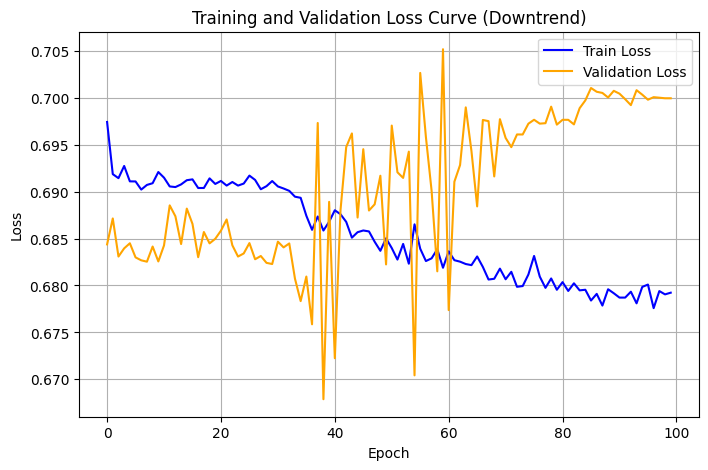

In [ ]:
import json
import matplotlib.pyplot as plt
# 読み込むファイル名（例）
strategy_name = 'Downtrend'
file_path = f"loss_history_{strategy_name}.json"

# JSONファイルを読み込み
with open(file_path, "r") as f:lement will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)

Epoch 11/50, Training Loss: 0.6908
Epoch 11/50, Validation Loss: 0.6835
EarlyStopping: no improvement for 2 epoch(s).

/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", utc=True)
/tmp/ipython-input-815280987.py:972: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_weight = torch.tensor(sample_weight, dtype=torch.float32, device=device)
/tmp/ipython-input-815280987.py:909: UserWarning: Could not infer format, so each
    loss_history = json.load(f)

train_loss = loss_history["train"]
val_loss = loss_history["val"]

plt.figure(figsize=(8,5))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Training and Validation Loss Curve ({strategy_name})')
plt.legend()
plt.grid(True)
plt.show()

# Task
Generate Python code in a new cell to perform walk-forward analysis based on the code in cell `ss65vZTb6uon`. The analysis should aim to eliminate chance dependency on the period by using a walk-forward cross-validation approach. The plan is to use a 6-fold split (train -> validation for threshold/temperature learning -> immediate test) in a rolling manner. For each fold, the process will involve calibration, fixing the threshold, and then testing (applying the validation-optimized threshold to the test set within that fold).

## データ準備と確認

### Subtask:
ウォークフォワード分析に必要なデータ（`X_3d_numpy`、`full_binary_labels_array`、`original_indices_filtered`、`integrated_clusters`、`generated_label_strategy`、`feature_names`など）が利用可能であることを確認します。


**Reasoning**:
Check for the availability and validity of required variables for the walk-forward analysis.



In [ ]:
# Check if required data variables exist from previous cells
required_data_vars = [
    'X_3d_numpy',
    'full_binary_labels_array',
    'original_indices_filtered',
    'integrated_clusters',
    'generated_label_strategy',
    'feature_names',
    'feature_names_3d',
    'top_50_features',
    'create_dataframe_for_dataset', # Ensure this function is available
    'CryptoBinaryDataset', # Ensure this class is available
    'TFT', # Ensure the TFT model class is available
    'bce_loss' # Ensure the custom loss function is available
]

categorical_feature_names_list = [
    "close_cusum", "dex_volume_cusum", "active_senders_cusum", "active_receivers_cusum",
    "address_count_sum_cusum", "contract_calls_cusum", "whale_tx_count_cusum",
    "sign_entropy_12_cusum","sign_entropy_24_cusum",  "buy_sell_ratio_cusum",
    "MA_6_24_cross_flag", "MA_12_48_cross_flag", "MA_24_72_cross_flag",
    "MA_slope_6_24_change_flag", "MA_12_48_change_flag",
    "MA_slope_pct_change_6_24_change_flag", "MA_slope_pct_change_12_48_change_flag",
    "MA_slope_pct_change_24_72_change_flag","volatility_change_flag",
    "hour", "day_of_week", "day" # Including time-based features often treated as categorical
]

strategies_to_run = [
    'Downtrend',
    # 'Range',
    # 'Reversal_Down',
    # 'Reversal_Up',
    # 'Uptrend',
    # 'unknown', # ラベル付けされないため学習・予測対象外とするのが一般的
]

print("--- Checking for required variables for Walk-Forward Analysis ---")

all_vars_available = True
for var_name in required_data_vars:
    if var_name not in locals():
        print(f"Error: Required variable, function, or class '{var_name}' is not defined.")
        all_vars_available = False
    else:
        # Perform basic check for empty data or None values if it's a data variable
        if var_name in ['X_3d_numpy', 'full_binary_labels_array', 'original_indices_filtered', 'integrated_clusters', 'feature_names', 'feature_names_3d', 'top_50_features']:
            var_value = locals()[var_name]
            if var_value is None:
                print(f"Error: Required variable '{var_name}' is None.")
                all_vars_available = False
            elif isinstance(var_value, (np.ndarray, pd.Series, pd.Index)) and var_value.size == 0:
                 print(f"Error: Required data variable '{var_name}' is empty.")
                 all_vars_available = False
            elif isinstance(var_value, list) and len(var_value) == 0:
                 print(f"Error: Required data variable '{var_name}' is an empty list.")
                 all_vars_available = False
            elif isinstance(var_value, dict) and len(var_value) == 0:
                 print(f"Error: Required data variable '{var_name}' is an empty dictionary.")
                 all_vars_available = False
            # Add checks for specific data variables if needed (e.g., shape for X_3d_numpy)
            if var_name == 'X_3d_numpy' and (not isinstance(var_value, np.ndarray) or var_value.ndim != 3 or var_value.shape[0] == 0):
                 print(f"Error: X_3d_numpy has incorrect format or is empty: {var_value.shape if isinstance(var_value, np.ndarray) else type(var_value)}")
                 all_vars_available = False
            if var_name == 'full_binary_labels_array' and (not isinstance(var_value, np.ndarray) or var_value.ndim != 1 or var_value.shape[0] == 0):
                 print(f"Error: full_binary_labels_array has incorrect format or is empty: {var_value.shape if isinstance(var_value, np.ndarray) else type(var_value)}")
                 all_vars_available = False
            if var_name == 'original_indices_filtered' and (not isinstance(var_value, (pd.Index, np.ndarray)) or len(var_value) == 0):
                 print(f"Error: original_indices_filtered has incorrect format or is empty: {len(var_value) if isinstance(var_value, (pd.Index, np.ndarray)) else type(var_value)}")
                 all_vars_available = False
            if var_name == 'integrated_clusters' and (not isinstance(var_value, np.ndarray) or var_value.ndim != 1 or var_value.shape[0] == 0):
                 print(f"Error: integrated_clusters has incorrect format or is empty: {var_value.shape if isinstance(var_value, np.ndarray) else type(var_value)}")
                 all_vars_available = False
            if var_name == 'generated_label_strategy' and (not isinstance(var_value, dict) or len(var_value) == 0):
                 print(f"Error: generated_label_strategy is not a dictionary or is empty: {len(var_value) if isinstance(var_value, dict) else type(var_value)}")
                 all_vars_available = False


if not all_vars_available:
    print("\nRequired variables are missing or invalid. Cannot proceed with Walk-Forward Analysis.")
    # The subtask is complete with failure
    # No further action in this block, the next command will report the status.
else:
    print("\nAll required variables for Walk-Forward Analysis are available and appear valid.")
    print("--- Starting Walk-Forward Analysis ---")


--- Checking for required variables for Walk-Forward Analysis ---

All required variables for Walk-Forward Analysis are available and appear valid.
--- Starting Walk-Forward Analysis ---


In [ ]:
# 1. Set parameters for walk-forward analysis (Expanding Window Approach)
# User Request: Use fixed test size, validation size, and an expanding training window.

# Define the fixed sizes for validation and test windows
# train_window_size is not fixed in expanding window, it grows.
val_window_size = 2500   # Fixed number of sequences for the validation window (Adjusted based on user request)
test_window_size = 2500  # Fixed number of sequences for the test window (Adjusted based on user request - minimum 300 required)

# Define the minimum initial training window size
initial_train_window_size = 20000 # Minimum number of sequences for the first training window (Adjusted to prevent underfitting)

# Define the step size for rolling the test window
# A step size equal to test_window_size means non-overlapping test sets.
# A smaller step size means overlapping test sets, providing more folds but potentially less independent evaluations.
step_size = 1500 # Adjusted to ensure at least 6 folds (calculated based on total data and other sizes)

# Calculate the total number of samples available
# Assuming original_indices_filtered is available from previous data preparation steps
if 'original_indices_filtered' not in locals():
     print("Error: 'original_indices_filtered' is not defined. Cannot calculate total samples.")
     n_total_samples = 0 # Set to 0 to prevent further errors
else:
     n_total_samples = len(original_indices_filtered)


# Calculate the minimum data needed for the first fold (initial train + val + test)
min_data_needed_for_first_fold = initial_train_window_size + val_window_size + test_window_size

if n_total_samples < min_data_needed_for_first_fold:
    print(f"Error: Total data samples ({n_total_samples}) is less than the minimum required for the first fold ({min_data_needed_for_first_fold}) with initial train window size {initial_train_window_size}, val window {val_window_size}, and test window {test_window_size}. Cannot perform walk-forward analysis.")
    folds = []
    print("Walk-forward analysis cannot be performed with the current parameters.")
else:
    # Determine the start index of the first test window
    first_test_start_idx = initial_train_window_size + val_window_size

    # Calculate the maximum possible number of steps (folds) we can take
    # The walk-forward process stops when the end of the test window exceeds n_total_samples
    # For fold i (starting from 0), the test window starts at first_test_start_idx + i * step_size
    # The test window ends at first_test_start_idx + i * step_size + test_window_size
    # So, first_test_start_idx + i * step_size + test_window_size <= n_total_samples
    # i * step_size <= n_total_samples - test_window_size - first_test_start_idx
    # max_i = floor((n_total_samples - test_window_size - first_test_start_idx) / step_size)
    # Number of folds = max_i + 1

    if step_size <= 0:
         print("Error: Step size must be positive.")
         folds = []
    else:
        remaining_data_after_first_test = n_total_samples - test_window_size - first_test_start_idx
        if remaining_data_after_first_test < 0:
             max_possible_folds = 0
        else:
             # Use integer division // to get the floor
             max_possible_folds = remaining_data_after_first_test // step_size + 1

        n_folds = max_possible_folds # Set n_folds to the maximum possible with this step size

        print(f"Walk-Forward Parameters (Expanding Window):")
        print(f"  Initial Train Window Size: {initial_train_window_size}")
        print(f"  Validation Window Size: {val_window_size}")
        print(f"  Test Window Size: {test_window_size}")
        print(f"  Step Size (for rolling test window): {step_size}")
        print(f"  Total Data Samples: {n_total_samples}")
        print(f"  Minimum Data Needed for First Fold: {min_data_needed_for_first_fold}")
        print(f"  Maximum Possible Folds with Step Size {step_size}: {max_possible_folds}")
        print(f"  Generating {n_folds} walk-forward folds...")


        folds = []
        for fold_i in range(n_folds):
            # For fold i (starting from 0):
            # Train window: starts at 0, ends at initial_train_window_size - 1 + i * step_size
            # Val window: starts at initial_train_window_size + i * step_size, ends at initial_train_window_size + val_window_size - 1 + i * step_size
            # Test window: starts at initial_train_window_size + val_window_size + i * step_size, ends at initial_train_window_size + val_window_size + test_window_size - 1 + i * step_size

            train_start_idx = 0
            train_end_idx = initial_train_window_size + fold_i * step_size # End is exclusive in slicing

            val_start_idx = train_end_idx
            val_end_idx = val_start_idx + val_window_size

            test_start_idx = val_end_idx
            test_end_idx = test_start_idx + test_window_size

            # Check if the current fold's test period goes beyond the total number of samples
            # This check is mainly a safeguard; max_possible_folds calculation should prevent needing it.
            if test_start_idx >= n_total_samples:
                 print(f"Warning: Test start index for fold {fold_i+1} ({test_start_idx}) is beyond total samples ({n_total_samples}). Stopping fold generation.")
                 n_folds = fold_i # Adjust n_folds to the number successfully created
                 break # Stop generating folds

            # Adjust the end index of the last test window if it goes slightly beyond total samples
            # This can happen due to integer division in max_possible_folds calculation
            test_end_idx = min(test_end_idx, n_total_samples)


            # Add the indices for the current fold
            folds.append({
                'train_indices': np.arange(train_start_idx, train_end_idx),
                'val_indices': np.arange(val_start_idx, val_end_idx),
                'test_indices': np.arange(test_start_idx, test_end_idx),
            })

            print(f"  Fold {fold_i+1}/{n_folds}: Train [{train_start_idx}, {train_end_idx}) "
                  f"Val [{val_start_idx}, {val_end_idx}) "
                  f"Test [{test_start_idx}, {test_end_idx})")

            # --- Add code to display y mean for each split ---
            if 'full_binary_labels_array' in locals():
                 y_train_fold = full_binary_labels_array[np.arange(train_start_idx, train_end_idx)]
                 y_val_fold = full_binary_labels_array[np.arange(val_start_idx, val_end_idx)]
                 y_test_fold = full_binary_labels_array[np.arange(test_start_idx, test_end_idx)]

                 # Filter out -1 values before calculating mean
                 y_train_valid = y_train_fold[y_train_fold != -1]
                 y_val_valid = y_val_fold[y_val_fold != -1]
                 y_test_valid = y_test_fold[y_test_fold != -1]


                 print(f"    y_train mean (excluding -1): {y_train_valid.mean():.4f} ({len(y_train_valid)} samples)")
                 print(f"    y_val mean (excluding -1): {y_val_valid.mean():.4f} ({len(y_val_valid)} samples)")
                 print(f"    y_test mean (excluding -1): {y_test_valid.mean():.4f} ({len(y_test_valid)} samples)")
            else:
                 print("    Warning: 'full_binary_labels_array' not available to calculate y means.")
            # --- End added code ---


        if not folds:
             print("No walk-forward folds were successfully generated.")
        else:
             print(f"\nSuccessfully generated {len(folds)} walk-forward folds.")

        # --- Add code to display strategy distribution per split per fold ---
        print("\n--- Strategy Distribution Per Split Per Fold ---")
        if 'integrated_strategy_names' not in locals():
            print("Error: 'integrated_strategy_names' is not defined. Cannot display strategy distribution.")
        else:
            for fold_i, fold_data in enumerate(folds):
                print(f"\nFold {fold_i + 1}/{len(folds)}:")

                split_names = ['train', 'val', 'test']
                for split_name in split_names:
                    indices = fold_data[f'{split_name}_indices']
                    if len(indices) > 0:
                        # Ensure indices are within the bounds of integrated_strategy_names
                        valid_indices = indices[(indices >= 0) & (indices < len(integrated_strategy_names))]
                        if len(valid_indices) > 0:
                            strategy_names_in_split = integrated_strategy_names[valid_indices]
                            # Count unique strategy names
                            unique_strategies, counts = np.unique(strategy_names_in_split, return_counts=True)
                            distribution = dict(zip(unique_strategies, counts))
                            print(f"  {split_name.capitalize()} Data ({len(indices)} sequences): {distribution}")
                        else:
                            print(f"  {split_name.capitalize()} Data ({len(indices)} sequences): No valid indices for strategy lookup.")
                    else:
                        print(f"  {split_name.capitalize()} Data ({len(indices)} sequences): Empty split.")

        print("\n--- Strategy Distribution Report Complete ---")
        # --- End of added code ---


# The 'folds' list is now available, containing dictionaries with 'train_indices', 'val_indices', and 'test_indices' for each fold.

Walk-Forward Parameters (Expanding Window):
  Initial Train Window Size: 20000
  Validation Window Size: 2500
  Test Window Size: 2500
  Step Size (for rolling test window): 1500
  Total Data Samples: 29863
  Minimum Data Needed for First Fold: 25000
  Maximum Possible Folds with Step Size 1500: 4
  Generating 4 walk-forward folds...
  Fold 1/4: Train [0, 20000) Val [20000, 22500) Test [22500, 25000)
  Fold 2/4: Train [0, 21500) Val [21500, 24000) Test [24000, 26500)
  Fold 3/4: Train [0, 23000) Val [23000, 25500) Test [25500, 28000)
  Fold 4/4: Train [0, 24500) Val [24500, 27000) Test [27000, 29500)

Successfully generated 4 walk-forward folds.

--- Strategy Distribution Per Split Per Fold ---

Fold 1/4:
  Train Data (20000 sequences): {'Downtrend': np.int64(6069), 'Range': np.int64(7671), 'Uptrend': np.int64(6243), 'unprocessed': np.int64(17)}
  Val Data (2500 sequences): {'Downtrend': np.int64(504), 'Range': np.int64(965), 'Uptrend': np.int64(1024), 'unprocessed': np.int64(7)}
  Tes

ウォークフォワード分析の実行
Subtask:

folds リストで定義された各フォールドに対して、以下の処理を実行します。

    各フォールドのインデックスに基づいて、X_3d_numpy, full_binary_labels_array, integrated_clusters から学習、検証、テストデータを分割します。
    各分割データセットを CryptoBinaryDataset と DataLoader に変換します。
    学習データを使用してTFTモデルを学習させます。
    検証データを使用して最適な確率閾値を探索します。
    最適な閾値を使用してテストデータでモデルを評価し、結果を記録します。


In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import copy
import math
from torch.optim.lr_scheduler import LambdaLR
import os # Import os for saving results
import joblib # Import joblib for saving results

# Ensure required modules and functions are available (from previous cells)
# Assumes filtering, dataset, tft_model (with TFT class), create_dataframe_for_dataset,
# CryptoBinaryDataset class, weighted_bce_loss function are defined and imported or available globally.

# Define the weighted_bce_loss function here to ensure it's available
def compute_weighted_bce_loss(logits, targets, w_pos, w_neg):
    """
    logits: (B, T) or (B, T, 1) のロジット（T はデコーダ長など）
    targets: 同形状の {0,1} or {-1,0,1}（-1 は無視）
    """
    # 形状合わせ
    if logits.dim() == 3 and logits.size(-1) == 1:
        logits = logits.squeeze(-1)
    if targets.dim() == 3 and targets.size(-1) == 1:
        targets = targets.squeeze(-1)

    # マスク（-1 を無視）
    valid_mask = (targets >= 0)  # True: 0/1, False: -1

    # 有効なロジットとターゲットのみを抽出
    # view(-1)で1次元に平坦化し、valid_mask[valid_mask]でmask==Trueの位置の要素を取得
    valid_logits = logits[valid_mask]
    valid_targets = targets[valid_mask] # valid_maskはtargetsと同じ形状である必要あり

    # 有効なターゲットが一つもない場合は損失0を返す
    if valid_targets.numel() == 0:
        return torch.tensor(0.0, device=logits.device, requires_grad=True)


    # 生ロス（要素ごと）、有効な要素に対してのみ計算
    # BCEWithLogitsLossはfloat型を期待
    bce_loss = torch.nn.BCEWithLogitsLoss(reduction='none')
    element_loss = bce_loss(valid_logits, valid_targets.float()) # shape: (num_valid_elements,)


    # サンプル重み（陽性= w_pos, 陰性= w_neg）
    # valid_targets は {0,1}
    weight = torch.where(valid_targets == 1,
                         torch.as_tensor(w_pos, device=targets.device, dtype=element_loss.dtype),
                         torch.as_tensor(w_neg, device=targets.device, dtype=element_loss.dtype))

    # 重み付き平均
    weighted_loss = (element_loss * weight)
    denom = weight.sum().clamp_min(1e-8)  # ゼロ割回避
    return weighted_loss.sum() / denom


# Check if essential variables and functions are available
required_items = [
    'X_3d_numpy', 'full_binary_labels_array', 'original_indices_filtered',
    'integrated_clusters', 'generated_label_strategy', 'feature_names',
    'feature_names_3d', 'top_50_features', 'folds',
    'create_dataframe_for_dataset', 'CryptoBinaryDataset', 'TFT',
    'integrated_strategy_names', # Add integrated_strategy_names for rule-based splitting
    'strategy_model_params', # Add strategy_model_params
    'config' # Add base config
]

print("--- ウォークフォワード分析実行前に必要な変数の最終確認 ---")
all_available_for_wf = True
for item_name in required_items:
    if item_name not in locals():
        print(f"エラー: 必要な変数、関数、またはクラス '{item_name}' が定義されていません。")
        all_available_for_wf = False
    # データ変数の基本的な有効性チェック (前回のチェックと重複するが念のため)
    elif item_name in ['X_3d_numpy', 'full_binary_labels_array', 'original_indices_filtered', 'integrated_clusters', 'feature_names', 'feature_names_3d', 'top_50_features', 'folds', 'integrated_strategy_names', 'strategy_model_params', 'config']:
        item_value = locals()[item_name]
        if item_value is None:
            print(f"エラー: 必要なデータ変数 '{item_name}' が None です。")
            all_available_for_wf = False
        elif isinstance(item_value, (np.ndarray, pd.Series, pd.Index)) and item_value.size == 0:
             print(f"エラー: 必要なデータ変数 '{item_name}' が空です。")
             all_available_for_wf = False
        elif isinstance(item_value, list) and len(item_value) == 0:
             print(f"エラー: 必要なデータ変数 '{item_name}' が空のリストです。")
             all_available_for_wf = False
        elif isinstance(item_value, dict) and len(item_value) == 0:
             print(f"エラー: 必要なデータ変数 '{item_name}' が空の辞書です。")
             all_available_for_wf = False


if not all_available_for_wf:
    print("\nウォークフォワード分析に必要な要素が不足しています。処理を中断します。")
    # 中断処理（例：raise エラー）
    raise RuntimeError("必要な要素が不足しているため、ウォークフォワード分析を実行できません。")

print("\n必要な要素はすべて揃っています。ウォークフォワード分析を開始します。")

# --- パラメータ設定 ---
# ウォークフォワード分析全体で使用するパラメータ
# モデルパラメータは戦略カテゴリごとに定義されたものを使用します
# strategy_model_params (ss65vZTb6uon セルで定義済みと仮定)
# strategies_to_run (ss65vZTb6uon セルで定義済みと仮定)
# categorical_feature_names_list (ss65vZTb6uon セルで定義済みと仮定)

# 閾値最適化のパラメータ
r_min_recall = 0.40   # ★ 検証セットでのRecallの下限（ss65vZTb6uon と同じ値を再定義）

# その他の共通パラメータ
seq_length = X_3d_numpy.shape[1] # シーケンス長は X_3d_numpy から取得
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用デバイス: {device}")

# 結果を保存するためのリスト
walk_forward_results = []

# --- ウォークフォワード分割と実行 ---
print(f"\n--- {len(folds)} フォールドのウォークフォワード分析を開始 ---")

for fold_idx, fold_data in enumerate(folds):
    print(f"\n===== フォールド {fold_idx + 1}/{len(folds)} を処理中 =====")

    # --- 1. データの分割 ---
    # ここでは、e32298fc で計算されたインデックスを使用してデータ全体を分割します。
    # 戦略カテゴリごとのフィルタリングはこの段階では行いません。
    # 戦略カテゴリは後で DataFrame のカラムとして使用します。
    train_indices_fold = fold_data['train_indices']
    val_indices_fold = fold_data['val_indices']
    test_indices_fold = fold_data['test_indices']

    print(f"  学習データ数 (全戦略): {len(train_indices_fold)}")
    print(f"  検証データ数 (全戦略): {len(val_indices_fold)}")
    print(f"  テストデータ数 (全戦略): {len(test_indices_fold)}")

    # 各分割に対応するデータ、ラベル、クラスタID、オリジナルインデックスを抽出
    X_train_fold_all = X_3d_numpy[train_indices_fold]
    y_train_fold_all = full_binary_labels_array[train_indices_fold]
    clusters_train_fold_all = integrated_clusters[train_indices_fold] # 学習データのクラスタID (全戦略)
    original_indices_train_fold_all = original_indices_filtered[train_indices_fold] # 学習データのオリジナルインデックス (全戦略)

    X_val_fold_all = X_3d_numpy[val_indices_fold]
    y_val_fold_all = full_binary_labels_array[val_indices_fold]
    clusters_val_fold_all = integrated_clusters[val_indices_fold] # 検証データのクラスタID (全戦略)
    original_indices_val_fold_all = original_indices_filtered[val_indices_fold] # 検証データのオリジナルインデックス (全戦略)

    X_test_fold_all = X_3d_numpy[test_indices_fold]
    y_test_fold_all = full_binary_labels_array[test_indices_fold]
    clusters_test_fold_all = integrated_clusters[test_indices_fold] # テストデータのクラスタID (全戦略)
    original_indices_test_fold_all = original_indices_filtered[test_indices_fold] # テストデータのオリジナルインデックス (全戦略)


    print(f"  データ分割完了 (全戦略)。X_train_fold_all: {X_train_fold_all.shape}, X_val_fold_all: {X_val_fold_all.shape}, X_test_fold_all: {X_test_fold_all.shape}")


    # --- 2. 戦略カテゴリごとの処理 ---
    fold_strategy_results = {} # このフォールド内の各戦略の結果を格納


    # このフォールドのデータに含まれる戦略カテゴリを特定し、ユーザーが指定した戦略のみを対象にする
    # integrated_strategy_names を使用して、このフォールドのインデックスに対応する戦略名を取得
    strategies_in_fold_all = integrated_strategy_names[np.concatenate([train_indices_fold, val_indices_fold, test_indices_fold])]
    # 重複をなくし、'unprocessed' など学習対象外の戦略を除外し、ユーザー指定戦略でフィルタ
    strategies_in_fold = [s for s in np.unique(strategies_in_fold_all) if s in strategies_to_run]


    print(f"  このフォールドで処理対象となる戦略カテゴリ: {strategies_in_fold}")

    if not strategies_in_fold:
        print("  このフォールドには、ユーザーが指定した処理対象戦略カテゴリのデータが含まれていません。スキップします。")
        continue # 次のフォールドへ


    # --- デバッグプリント: generated_label_strategy の内容 ---
    # print("\n  --- Debug: generated_label_strategy ---")
    # print(generated_label_strategy) # Suppressed as it's large
    # print("  ---------------------------------------")
    # --- デバッグプリント終了 ---


    for strategy_name in strategies_in_fold:
        print(f"\n  --- 戦略カテゴリ: {strategy_name} を処理中 (フォールド {fold_idx + 1}) ---")

        # --- 各分割データセットから、対象戦略カテゴリのデータのみを抽出 ---
        # ここで rule-based strategy names (integrated_strategy_names) を使用してフィルタリング

        # 学習データ
        is_strategy_train_mask = (integrated_strategy_names[train_indices_fold] == strategy_name)
        X_train_strat_fold = X_train_fold_all[is_strategy_train_mask]
        y_train_strat_fold = y_train_fold_all[is_strategy_train_mask]
        clusters_train_strat_fold = clusters_train_fold_all[is_strategy_train_mask] # この戦略に属するクラスタID
        original_indices_train_strat_fold = original_indices_train_fold_all[is_strategy_train_mask] # この戦略に属するオリジナルインデックス


        # 検証データ
        is_strategy_val_mask = (integrated_strategy_names[val_indices_fold] == strategy_name)
        X_val_strat_fold = X_val_fold_all[is_strategy_val_mask]
        y_val_strat_fold = y_val_fold_all[is_strategy_val_mask]
        clusters_val_strat_fold = clusters_val_fold_all[is_strategy_val_mask]
        original_indices_val_strat_fold = original_indices_val_fold_all[is_strategy_val_mask]

        # テストデータ
        is_strategy_test_mask = (integrated_strategy_names[test_indices_fold] == strategy_name)
        X_test_strat_fold = X_test_fold_all[is_strategy_test_mask]
        y_test_strat_fold = y_test_fold_all[is_strategy_test_mask]
        clusters_test_strat_fold = clusters_test_fold_all[is_strategy_test_mask]
        original_indices_test_strat_fold = original_indices_test_fold_all[is_strategy_test_mask]


        print(f"    戦略 '{strategy_name}' の抽出完了。学習: {len(X_train_strat_fold)}, 検証: {len(X_val_strat_fold)}, テスト: {len(X_test_strat_fold)}")


        # 学習データが存在しない場合はスキップ
        if len(X_train_strat_fold) == 0:
            print(f"    戦略 '{strategy_name}' の学習データがありません。スキップします。")
            fold_strategy_results[strategy_name] = {"error": "学習データなし"}
            # 評価もスキップさせるため DataLoader を無効化
            test_dataloader = None
            continue # この戦略カテゴリの処理をスキップ


        # --- 2.1. Dataframe & DataLoader の準備 ---
        df_train_strat = None
        df_val_strat = None
        df_test_strat = None
        train_dataloader = None
        val_dataloader = None
        test_dataloader = None

        # Determine feature columns from the created DataFrame for the dataset
        # Exclude control columns used by TFT internally or for identification
        # Use current_feature_names derived for this strategy in the previous cell
        # Re-identify feature names based on available data if needed, but assuming feature_names_3d is correct
        current_feature_names = feature_names_3d
        # Add 'original_cluster_id' to categorical features list for DataFrame creation
        categorical_feature_names_list_with_cluster = categorical_feature_names_list + ["original_cluster_id"]

        # Identify real and categorical feature names from the determined feature_cols_from_df
        real_feature_names = [col for col in current_feature_names if col not in categorical_feature_names_list_with_cluster]
        # Remove price-related features from real features if they are present
        features_to_remove = ['close', 'MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168']
        real_feature_names = [feat for feat in real_feature_names if feat not in features_to_remove]


        categorical_feature_names = [col for col in current_feature_names if col in categorical_feature_names_list_with_cluster]
        # Ensure original_cluster_id is included if it's in categorical_feature_names and the DataFrame
        # This check will be more accurate after DataFrame creation, but we prepare the list here.
        # The actual columns used will be determined after df_train_strat is created.


        # --- Create DataFrames for CryptoBinaryDataset using create_dataframe_for_dataset ---
        try:
            # create_dataframe_for_dataset は X_list, y_list, original_indices_list, clusters_list を期待
            # 各要素は (seq_len, num_features), (1,), DatetimeIndex(seq_len), int のリスト
            # clusters_train_strat_fold, clusters_val_strat_fold, clusters_test_strat_fold
            # は (num_sequences,) の numpy 配列で、これが各シーケンスに対応する cluster ID です。
            # これらを create_dataframe_for_dataset が期待するリスト形式に変換する必要があります。

            # リスト形式への変換ヘルパー関数 (クラスタIDも含む)
            def prepare_list_format_with_clusters(X_arr, y_arr, indices_arr, clusters_arr, seq_len, full_indices_filtered):
                 if len(X_arr) == 0:
                      return [], [], [], []
                 X_list = [X_arr[i] for i in range(X_arr.shape[0])]
                 y_list = [np.array([y_arr[i]]) for i in range(y_arr.shape[0])] # 各要素を numpy 配列に
                 # indices_arr は各シーケンスの開始インデックス (original_indices_filtered に対するインデックス)
                 # ここで渡す indices_list は、各要素がそのシーケンスの全てのタイムスタンプを含む DatetimeIndex
                 indices_list = [
                    full_indices_filtered[indices_arr[i] : indices_arr[i] + seq_len]
                    if np.issubdtype(type(indices_arr[i]), np.integer)
                    else full_indices_filtered[i : i + seq_len]
                    for i in range(len(indices_arr))
                    ]
                 clusters_list = [clusters_arr[i] for i in range(len(clusters_arr))] # 各シーケンスに対応するクラスタID
                 return X_list, y_list, indices_list, clusters_list


            X_train_strat_list, y_train_strat_list, original_indices_train_list, clusters_train_list = prepare_list_format_with_clusters(
                X_train_strat_fold, y_train_strat_fold, original_indices_train_strat_fold, clusters_train_strat_fold, seq_length, original_indices_filtered
            )
            X_val_strat_list, y_val_strat_list, original_indices_val_list, clusters_val_list = prepare_list_format_with_clusters(
                X_val_strat_fold, y_val_strat_fold, original_indices_val_strat_fold, clusters_val_strat_fold, seq_length, original_indices_filtered
            )
            X_test_strat_list, y_test_strat_list, original_indices_test_list, clusters_test_list = prepare_list_format_with_clusters(
                X_test_strat_fold, y_test_strat_fold, original_indices_test_strat_fold, clusters_test_strat_fold, seq_length, original_indices_filtered
            )


            print(f"    DataFrame作成中 (学習データ)...")
            # create_dataframe_for_dataset にクラスタリストと feature_names_3d を渡す
            # generated_label_strategy は不要になりました
            df_train_strat = create_dataframe_for_dataset(
                X_train_strat_list, y_train_strat_list, original_indices_train_list,
                clusters_train_list, feature_names_3d, seq_length, original_indices_filtered, strategy_name
            )

            if df_train_strat is None or df_train_strat.empty:
                 print(f"    DataFrame作成失敗または空 (学習データ) for strategy '{strategy_name}'. スキップします。")
                 fold_strategy_results[strategy_name] = {"error": "DataFrame作成失敗または空 (学習データ)"}
                 # 評価もスキップさせるため DataLoader を無効化
                 test_dataloader = None
                 continue # この戦略カテゴリの処理をスキップ

            print(f"    df_train_strat 形状: {df_train_strat.shape}")


            # 検証データ DataFrame
            if len(X_val_strat_list) > 0:
                 print(f"    DataFrame作成中 (検証データ)...")
                 df_val_strat = create_dataframe_for_dataset(
                     X_val_strat_list, y_val_strat_list, original_indices_val_list,
                     clusters_val_list, feature_names_3d, seq_length, original_indices_filtered, strategy_name
                 )
                 if df_val_strat is not None and not df_val_strat.empty:
                     print(f"    df_val_strat 形状: {df_val_strat.shape}")
                 else:
                     print(f"    DataFrame作成失敗または空 (検証データ) for strategy '{strategy_name}'. 検証をスキップします。")
                     df_val_strat = None
            else:
                 print(f"    検証データなし for strategy '{strategy_name}'. 検証をスキップします。")
                 df_val_strat = None

            # テストデータ DataFrame
            if len(X_test_strat_list) > 0:
                 print(f"    DataFrame作成中 (テストデータ)...")
                 df_test_strat = create_dataframe_for_dataset(
                     X_test_strat_list, y_test_strat_list, original_indices_test_list,
                     clusters_test_list, feature_names_3d, seq_length, original_indices_filtered, strategy_name
                 )
                 if df_test_strat is not None and not df_test_strat.empty:
                     print(f"    df_test_strat 形状: {df_test_strat.shape}")
                 else:
                     print(f"    DataFrame作成失敗または空 (テストデータ) for strategy '{strategy_name}'. 評価をスキップします。")
                     df_test_strat = None
            else:
                 print(f"    テストデータなし for strategy '{strategy_name}'. 評価をスキップします。")
                 df_test_strat = None


            # Determine feature columns from the created DataFrame for the dataset
            # Use columns actually present in df_train_strat
            feature_cols_from_df = [col for col in df_train_strat.columns if col not in ['group_id', 'time_idx', 'target', 'strategy_name']]
            # Re-identify real and categorical feature names based on columns present in the DataFrame
            # And using the updated categorical_feature_names_list_with_cluster
            real_feature_names = [col for col in feature_cols_from_df if col not in categorical_feature_names_list_with_cluster]
            # Remove price-related features again based on available columns
            features_to_remove = ['close', 'MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168']
            real_feature_names = [feat for feat in real_feature_names if feat not in features_to_remove]

            categorical_feature_names = [col for col in feature_cols_from_df if col in categorical_feature_names_list_with_cluster]
            # Ensure original_cluster_id is included if it's in categorical_feature_names and the DataFrame
            if 'original_cluster_id' in categorical_feature_names_list_with_cluster and 'original_cluster_id' in df_train_strat.columns and 'original_cluster_id' not in categorical_feature_names:
                 categorical_feature_names.append('original_cluster_id') # Add it if missed and present


            print(f"    Dataset Real Feature Names ({len(real_feature_names)}): {real_feature_names}")
            print(f"    Dataset Categorical Feature Names ({len(categorical_feature_names)}): {categorical_feature_names}")


            # --- Update Config based on Feature Counts and Vocab Sizes ---
            current_params = strategy_model_params.get(strategy_name, {})
            current_config = config.copy() # Start with base config
            current_config.update(current_params) # Update with strategy-specific params

            current_config["time_varying_real_variables_encoder"] = len(real_feature_names)
            current_config["time_varying_real_variables_decoder"] = len(real_feature_names) # Assume same for decoder
            current_config["time_varying_categoical_variables"] = len(categorical_feature_names)
            current_config["static_variables"] = 0 # No static variables
            current_config["static_embedding_vocab_sizes"] = []

            # Determine vocabulary sizes for time-varying categorical features
            time_varying_embedding_vocab_sizes = []
            if len(categorical_feature_names) > 0:
                 for col in categorical_feature_names:
                      if col in df_train_strat.columns:
                           # Use the max value found in the training data + 1 as the vocab size
                           # Assuming create_dataframe_for_dataset maps negative values and fills NaNs to non-negative integers >= 0
                           unique_vals = df_train_strat[col].dropna().unique()
                           if len(unique_vals) > 0:
                                max_val_found = int(np.max(unique_vals))
                                vocab_size = max_val_found + 1 # Vocab size is max index + 1
                           else:
                                vocab_size = 1 # Default to 1 if no unique values found
                           time_varying_embedding_vocab_sizes.append(vocab_size)
                           # Removed debug print for vocab size per column
                           # print(f"    Vocab size for '{col}': {vocab_size}")
                      else:
                           # This should not happen if categorical_feature_names are derived from df_train_strat.columns
                           print(f"    警告: カテゴリ特徴量 '{col}' が df_train_strat に見つかりませんでした。vocab size を 1 とします。")
                           time_varying_embedding_vocab_sizes.append(1)

            current_config["time_varying_embedding_vocab_sizes"] = time_varying_embedding_vocab_sizes


            # Check if debug_categorical_input is in config and if it's causing issues
            # It should be True by default in the base config
            # Removed debug print for debug_categorical_input config
            # print(f"    Debug: current_config['debug_categorical_input'] is {current_config.get('debug_categorical_input')}")


            # Calculate predict_length based on updated config
            if "encode_length" in current_config and "seq_length" in current_config:
                 predict_length = current_config["seq_length"] - current_config["encode_length"]
                 if predict_length <= 0:
                      print(f"    エラー: predict_length が正の値ではありません ({predict_length})。encode_length と seq_length の設定を確認してください。スキップします。")
                      fold_strategy_results[strategy_name] = {"error": "無効な encode/seq length 設定"}
                      test_dataloader = None # 評価もスキップ
                      continue # この戦略カテゴリの処理をスキップ
            else:
                 print(f"    エラー: 'encode_length' または 'seq_length' が config に見つかりません。スキップします。")
                 fold_strategy_results[strategy_name] = {"error": "encode/seq length 設定不足"}
                 test_dataloader = None # 評価もスキップ
                 continue # この戦略カテゴリの処理をスキップ


            min_required_length = current_config["encode_length"] + predict_length # Minimum length of a group


            # Create DataLoader
            # Filter DataFrames for sequence length before creating Datasets
            group_lengths_train = df_train_strat.groupby("group_id").size()
            valid_groups_train = group_lengths_train[group_lengths_train >= min_required_length].index

            if not valid_groups_train.empty:
                df_train_strat_filtered = df_train_strat[df_train_strat['group_id'].isin(valid_groups_train)].copy()
                print(f"    学習データ (シーケンス長フィルタ後): {df_train_strat_filtered.shape}")

                train_dataset = CryptoBinaryDataset(
                    df_train_strat_filtered,
                    encoder_len=current_config["encode_length"],
                    decoder_len=predict_length,
                    real_feature_cols=real_feature_names,
                    categorical_feature_cols=categorical_feature_names, # Use updated categorical feature names
                    target_col="target",
                    group_id_col="group_id",
                    time_idx_col="time_idx"
                )

                if len(train_dataset) > 0:
                    train_dataloader = DataLoader(
                        train_dataset,
                        batch_size=current_config["batch_size"],
                        shuffle=True,
                        drop_last=True
                    )
                    print(f"    学習用 DataLoader 作成完了: {len(train_dataset)} シーケンス")
                else:
                     print(f"    学習用 Dataset にシーケンスがありません。モデル学習をスキップします。")
                     train_dataloader = None
            else:
                 print(f"    学習データのグループ長が不足しています ({min_required_length} 未満)。モデル学習をスキップします。")
                 train_dataloader = None


            # Validation DataLoader
            if df_val_strat is not None and not df_val_strat.empty:
                 group_lengths_val = df_val_strat.groupby("group_id").size()
                 valid_groups_val = group_lengths_val[group_lengths_val >= min_required_length].index

                 if not valid_groups_val.empty:
                      df_val_strat_filtered = df_val_strat[df_val_strat['group_id'].isin(valid_groups_val)].copy()
                      print(f"    検証データ (シーケンス長フィルタ後): {df_val_strat_filtered.shape}")

                      val_dataset = CryptoBinaryDataset(
                          df_val_strat_filtered,
                          encoder_len=current_config["encode_length"],
                          decoder_len=predict_length,
                          real_feature_cols=real_feature_names,
                          categorical_feature_cols=categorical_feature_names, # Use updated categorical feature names
                          target_col="target",
                          group_id_col="group_id",
                          time_idx_col="time_idx"
                      )

                      if len(val_dataset) > 0:
                           val_dataloader = DataLoader(
                               val_dataset,
                               batch_size=current_config["batch_size"],
                               shuffle=False,
                               drop_last=False
                           )
                           print(f"    検証用 DataLoader 作成完了: {len(val_dataset)} シーケンス")
                      else:
                           print(f"    検証用 Dataset にシーケンスがありません。検証をスキップします。")
                           val_dataloader = None
                 else:
                      print(f"    検証データのグループ長が不足しています ({min_required_length} 未満)。検証をスキップします。")
                      val_dataloader = None
            else:
                 print(f"    検証データ DataFrame が無効または空です。検証をスキップします。")
                 val_dataloader = None

            # Test DataLoader
            if df_test_strat is not None and not df_test_strat.empty:
                group_lengths_test = df_test_strat.groupby("group_id").size()
                valid_groups_test = group_lengths_test[group_lengths_test >= min_required_length].index
                if not valid_groups_test.empty:
                    df_test_strat_filtered = df_test_strat[df_test_strat['group_id'].isin(valid_groups_test)].copy()
                    print(f"    テストデータ (シーケンス長フィルタ後): {df_test_strat_filtered.shape}")
                    test_dataset = CryptoBinaryDataset(
                        df_test_strat_filtered,
                        encoder_len=current_config["encode_length"],
                        decoder_len=predict_length,
                        real_feature_cols=real_feature_names,
                        categorical_feature_cols=categorical_feature_names, # Use updated categorical feature names
                        target_col="target",
                        group_id_col="group_id",
                        time_idx_col="time_idx"
                    )
                    if len(test_dataset) > 0:
                        test_dataloader = DataLoader(test_dataset, batch_size=current_config["batch_size"], shuffle=False, drop_last=False)
                        print(f"    テスト用 DataLoader 作成完了: {len(test_dataset)} シーケンス")
                    else:
                        print(f"    テスト用 Dataset にシーケンスがありません。評価をスキップします。")
                        test_dataloader = None
                else:
                    print(f"    テストデータのグループ長が不足しています ({min_required_length} 未満)。評価をスキップします。")
                    test_dataloader = None
            else:
                print(f"    テストデータ DataFrame が無効または空です。評価をスキップします。")
                test_dataloader = None # 評価をスキップ


        except Exception as e:
            print(f"    DataLoader 作成中にエラーが発生しました for strategy '{strategy_name}': {e}")
            fold_strategy_results[strategy_name] = {"error": f"DataLoader 作成エラー: {e}"}
            train_dataloader = None
            val_dataloader = None
            test_dataloader = None
            continue # この戦略カテゴリの処理をスキップ


        #--- Model Training ---
        # Only train if training data is available
        if train_dataloader is not None and len(train_dataloader) > 0:
            print(f"\n    モデル学習開始 for strategy '{strategy_name}' (フォールド {fold_idx + 1})...")

            try:
                # モデルインスタンス化
                model = TFT(current_config).to(device)

                # Optimizer と Scheduler
                optimizer = torch.optim.Adam(model.parameters(), lr=current_config['learning_rate'], weight_decay=current_config.get('weight_decay', 0.0))
                num_epochs = current_config['num_epochs']
                warmup_epochs = int(num_epochs * current_config.get('warmup_epochs_ratio', 0.0))
                total_training_steps = len(train_dataloader) * num_epochs
                warmup_steps = len(train_dataloader) * warmup_epochs

                def lr_lambda(current_step: int):
                    if current_step < warmup_steps:
                        return float(current_step) / float(max(1, warmup_steps))
                    progress = float(current_step - warmup_steps) / float(max(1, total_training_steps - warmup_steps))
                    return 0.5 * (1.0 + math.cos(math.pi * progress))

                scheduler = LambdaLR(optimizer, lr_lambda)

                # Early Stopping 設定
                use_validation_for_early_stopping = (val_dataloader is not None and len(val_dataloader) > 0)
                patience = current_config.get('patience', 5)
                min_delta = 0.0001
                best_loss = float('inf') # Validation Loss for ES
                epochs_no_improve = 0
                early_stop = False
                best_model_state = None # To store the state_dict of the best model
                gradient_clip_norm = current_config.get('gradient_clip_norm', None)

                # 学習ループ
                for epoch in range(num_epochs):
                    model.train()
                    total_train_loss = 0
                    # all_train_preds_prob, all_train_trues = [], [] # 訓練データでの評価は通常不要

                    for i, batch in enumerate(train_dataloader):
                        optimizer.zero_grad()

                        encoder_real_input = batch["encoder_real_input"].to(device)
                        encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                        decoder_real_input = batch["decoder_real_input"].to(device)
                        decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                        target_batch = batch["target"].to(device)

                        output, *_ = model(
                            x_enc_real=encoder_real_input,
                            x_dec_real=decoder_real_input,
                            x_enc_cat=encoder_categorical_input,
                            x_dec_cat=decoder_categorical_input,
                        )

                        prediction_last_timestep = output[:, -1, 0]
                        target_single_value = target_batch[:, 0]

                        valid_mask = (target_single_value != -1)
                        if valid_mask.any():
                            # weighted_bce_loss 関数を使用
                            # train_dataset からラベルを取得して計算 (学習データセットのラベル分布を使用)
                            # Check if train_dataset is not None before accessing it
                            if train_dataset is not None and len(train_dataset.sequences) > 0:
                                strat_targets_for_weights = np.array([s["target"][0] for s in train_dataset.sequences])
                                num_pos = (strat_targets_for_weights == 1).sum()
                                num_neg = (strat_targets_for_weights == 0).sum()
                                total = num_pos + num_neg
                                if num_pos > 0 and num_neg > 0:
                                    w_pos = total / (2.0 * num_pos)
                                    w_neg = total / (2.0 * num_neg)
                                else:
                                    w_pos, w_neg = 1.0, 1.0 # Fallback
                            else:
                                w_pos, w_neg = 1.0, 1.0

                            loss = compute_weighted_bce_loss(prediction_last_timestep[valid_mask], target_single_value[valid_mask], w_pos, w_neg)

                        else:
                            loss = torch.tensor(0.0, device=device)

                        loss.backward()

                        if gradient_clip_norm is not None:
                            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_norm)

                        optimizer.step()
                        scheduler.step()
                        total_train_loss += loss.item()

                    if len(train_dataloader) > 0:
                         avg_train_loss = total_train_loss / len(train_dataloader)
                    else:
                         avg_train_loss = float('inf')

                    print(f"    Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}")

                    # --- 検証ステップ ---
                    if use_validation_for_early_stopping:
                        model.eval()
                        total_val_loss = 0
                        all_val_preds_prob, all_val_trues = [], [] # Clear lists for each epoch's validation

                        # 検証データセットのラベル分布で重みを計算 (または学習データの重みを使用するか検討)
                        # ここでは学習データの重み w_pos, w_neg を再利用します
                        with torch.no_grad():
                            for i, batch in enumerate(val_dataloader):
                                encoder_real_input = batch["encoder_real_input"].to(device)
                                encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                                decoder_real_input = batch["decoder_real_input"].to(device)
                                decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                                target_batch = batch["target"].to(device)

                                output, *_ = model(
                                    x_enc_real=encoder_real_input,
                                    x_dec_real=decoder_real_input,
                                    x_enc_cat=encoder_categorical_input,
                                    x_dec_cat=decoder_categorical_input
                                )
                                prediction_last_timestep = output[:, -1, 0]
                                target_single_value = target_batch[:, 0]

                                valid_mask = (target_single_value != -1)
                                if valid_mask.any():
                                     # weighted_bce_loss を呼び出す (w_pos, w_neg は学習データの重みを使用)
                                     loss = compute_weighted_bce_loss(prediction_last_timestep[valid_mask], target_single_value[valid_mask], w_pos, w_neg)
                                else:
                                     loss = torch.tensor(0.0, device=device)

                                total_val_loss += loss.item()

                                preds_prob = torch.sigmoid(prediction_last_timestep).cpu().numpy()
                                labels = target_single_value.cpu().numpy()
                                # Corrected: extend with probabilities and true labels separately
                                all_val_preds_prob.extend(preds_prob) # predicted probabilities
                                all_val_trues.extend(labels) # true labels


                        if len(val_dataloader) > 0:
                             avg_val_loss = total_val_loss / len(val_dataloader)
                        else:
                             avg_val_loss = float('inf')

                        print(f"    Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}")

                        # Early Stopping check
                        if avg_val_loss < best_loss - min_delta:
                            best_loss = avg_val_loss
                            epochs_no_improve = 0
                            best_model_state = copy.deepcopy(model.state_dict())
                            print(f"    Validation loss improved. Saving best model state.")
                        else:
                            epochs_no_improve += 1
                            print(f"    EarlyStopping: No improvement in validation loss for {epochs_no_improve} epoch(s).")
                            if epochs_no_improve >= patience:
                                print(f"    EarlyStopping: Stopping training after {patience} epochs without improvement.")
                                early_stop = True
                                break
                    else:
                         # 検証データがない場合、訓練損失で ES （非推奨だが実装）
                         print("    検証データがないため訓練損失で Early Stopping を実行します。")
                         current_loss_for_early_stopping = avg_train_loss
                         # Initialize best_loss_train_fallback on the first epoch if no validation
                         if epoch == 0:
                             if 'best_loss_train_fallback' not in locals():
                                 best_loss_train_fallback = current_loss_for_early_stopping
                                 epochs_no_improve_train_fallback = 0
                                 best_model_state = copy.deepcopy(model.state_dict())
                                 print("    訓練損失 Early Stopping 初期化。")
                             elif current_loss_for_early_stopping < best_loss_train_fallback - min_delta:
                                 best_loss_train_fallback = current_loss_for_early_stopping
                                 epochs_no_improve_train_fallback = 0
                                 best_model_state = copy.deepcopy(model.state_dict())
                                 print("    訓練損失改善。モデル状態を保存。")
                             else:
                                 epochs_no_improve_train_fallback += 1
                                 print(f"    EarlyStopping (訓練損失): 訓練損失に改善なし {epochs_no_improve_train_fallback} エポック。")
                                 if epochs_no_improve_train_fallback >= patience:
                                     print(f"    EarlyStopping (訓練損失): 訓練損失に改善がないため {patience} エポック後に学習を停止。")
                                     early_stop = True
                                     break
                         else: # For subsequent epochs when no validation data is used
                             if current_loss_for_early_stopping < best_loss_train_fallback - min_delta:
                                 best_loss_train_fallback = current_loss_for_early_stopping
                                 epochs_no_improve_train_fallback = 0
                                 best_model_state = copy.deepcopy(model.state_dict())
                                 print("    訓練損失改善。モデル状態を保存。")
                             else:
                                 epochs_no_improve_train_fallback += 1
                                 print(f"    EarlyStopping (訓練損失): 訓練損失に改善なし {epochs_no_improve_train_fallback} エポック。")
                                 if epochs_no_improve_train_fallback >= patience:
                                     print(f"    EarlyStopping (訓練損失): 訓練損失に改善がないため {patience} エポック後に学習を停止。")
                                     early_stop = True
                                     break


                    if early_stop:
                         break

                if best_model_state is not None:
                    model.load_state_dict(best_model_state)
                    print("    最良のモデル状態をロードしました。")
                else:
                    print("    保存された最良のモデル状態がありません。最終エポックのモデルを使用します。")

                print("    モデル学習完了。")

            except Exception as e:
                print(f"    モデル学習中にエラーが発生しました for strategy '{strategy_name}': {e}")
                fold_strategy_results[strategy_name] = {"error": f"モデル学習エラー: {e}"}
                model = None
                test_dataloader = None
                continue

        else:
            print(f"\n    戦略 '{strategy_name}' の学習データ DataLoader が無効または空です。モデル学習をスキップします。")
            fold_strategy_results[strategy_name] = {"status": "学習スキップ (DataLoader無効/空)"}
            model = None
            test_dataloader = None

        # --- 2.3. 閾値最適化 (検証データ) と評価 (テストデータ) ---
        if test_dataloader is not None and len(test_dataloader) > 0 and model is not None:
            print(f"\n    予測・評価開始 for strategy '{strategy_name}' (フォールド {fold_idx + 1})...")

            try:
                # --- 閾値最適化 (検証データ) ---
                optimal_threshold = 0.5
                best_precision_on_val = float('nan')
                best_f05_on_val = float('nan')

                # Check if validation data was used and results were collected
                if use_validation_for_early_stopping and 'all_val_trues' in locals() and 'all_val_preds_prob' in locals() and all_val_trues and all_val_preds_prob:
                    print(f"    検証データで確率閾値を最適化中...")

                    y_true_val = np.asarray(all_val_trues, dtype=int)
                    probs_val = np.asarray(all_val_preds_prob, dtype=float)

                    valid = (y_true_val != -1)
                    probs_val_valid = probs_val[valid]
                    y_true_val_valid = y_true_val[valid]

                    probs_val_valid = np.clip(probs_val_valid, 1e-8, 1.0 - 1e-8)

                    if y_true_val_valid.size > 0 and np.unique(y_true_val_valid).size >= 2:
                        eps = 1e-12
                        thresholds = np.unique(probs_val_valid)
                        thresholds = np.concatenate(([0.0 - eps], thresholds, [1.0 + eps]))
                        thresholds = np.sort(thresholds)

                        best_tuple = None

                        for t in thresholds:
                            y_pred_val = (probs_val_valid >= t).astype(int)

                            if len(np.unique(y_pred_val)) < 2:
                                continue

                            prec = precision_score(y_true_val_valid, y_pred_val, zero_division=0)
                            rec  = recall_score(y_true_val_valid, y_pred_val, zero_division=0)
                            f05  = fbeta_score(y_true_val_valid, y_pred_val, beta=0.5, zero_division=0)

                            if rec + 1e-12 < r_min_recall:
                                continue

                            cand = (prec, rec, f05, float(t))
                            if best_tuple is None:
                                best_tuple = cand
                            else:
                                if (cand[0] > best_tuple[0] + 1e-12 or
                                    (abs(cand[0] - best_tuple[0]) <= 1e-12 and cand[2] > best_tuple[2] + 1e-12) or
                                    (abs(cand[0] - best_tuple[0]) <= 1e-12 and abs(cand[2] - best_tuple[2]) <= 1e-12 and cand[1] > best_tuple[1] + 1e-12) or
                                    (abs(cand[0] - best_tuple[0]) <= 1e-12 and abs(cand[2] - best_tuple[2]) <= 1e-12 and abs(cand[1] - best_tuple[1]) <= 1e-12 and cand[3] > best_tuple[3])):
                                    best_tuple = cand

                        if best_tuple is None:
                            best_fb = None
                            for t in thresholds:
                                y_pred_val = (probs_val_valid >= t).astype(int)
                                if len(np.unique(y_pred_val)) < 2:
                                    continue
                                prec = precision_score(y_true_val_valid, y_pred_val, zero_division=0)
                                rec  = recall_score(y_true_val_valid, y_pred_val, zero_division=0)
                                f05  = fbeta_score(y_true_val_valid, y_pred_val, beta=0.5, zero_division=0)
                                cand = (rec, prec, f05, float(t))
                                if best_fb is None:
                                    best_fb = cand
                                else:
                                    if (cand[0] > best_fb[0] + 1e-12 or
                                        (abs(cand[0] - best_fb[0]) <= 1e-12 and cand[1] > best_fb[1] + 1e-12) or
                                        (abs(cand[0] - best_fb[0]) <= 1e-12 and abs(cand[1] - best_fb[1]) <= 1e-12 and cand[2] > best_fb[2] + 1e-12) or
                                        (abs(cand[0] - best_fb[0]) <= 1e-12 and abs(cand[1] - best_fb[1]) <= 1e-12 and abs(cand[2] - best_fb[2]) <= 1e-12 and cand[3] > best_fb[3])):
                                        best_fb = cand

                            if best_fb is None:
                                optimal_threshold = 0.5
                                best_precision_on_val = np.nan
                                best_f05_on_val = np.nan
                                print(f"    [警告] 有効な閾値が見つかりませんでした。デフォルトの 0.5 を使用します。")
                            else:
                                rec, prec, f05, optimal_threshold = best_fb
                                best_precision_on_val = prec
                                best_f05_on_val = f05
                                print(f"    [警告] Recall≥{r_min_recall:.2f} を満たす閾値が見つかりませんでした。"
                                    f"Recall 最大の閾値を使用: τ={optimal_threshold:.6f} | "
                                    f"Precision={prec:.4f} | Recall={rec:.4f} | F0.5={f05:.4f}")
                        else:
                            best_precision_on_val, best_recall_on_val, best_f05_on_val, optimal_threshold = best_tuple
                            print(f"    検証セットでの最適な閾値 (Precision最大, Recall≥{r_min_recall:.2f}): "
                                f"τ={optimal_threshold:.6f} | Precision={best_precision_on_val:.4f} | "
                                f"Recall={best_recall_on_val:.4f} | F0.5={best_f05_on_val:.4f}")
                    else:
                        print("    検証データに単一クラスしか存在しないか、サンプルがありません。デフォルトの 0.5 を使用します。")
                        optimal_threshold = 0.5
                        best_precision_on_val = np.nan
                        best_f05_on_val = np.nan
                else:
                    print("    検証データまたは予測結果が利用できません。デフォルトの 0.5 を使用します。")
                    optimal_threshold = 0.5
                    best_precision_on_val = np.nan
                    best_f05_on_val = np.nan


                # --- 評価 (テストデータ) ---
                model.eval()
                all_test_preds_prob, all_test_trues = [], []

                with torch.no_grad():
                    for batch in test_dataloader:
                        encoder_real_input = batch["encoder_real_input"].to(device)
                        encoder_categorical_input = batch["encoder_categorical_input"].to(device) if batch["encoder_categorical_input"].size(-1) > 0 else torch.empty(batch["encoder_categorical_input"].shape[0], batch["encoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                        decoder_real_input = batch["decoder_real_input"].to(device)
                        decoder_categorical_input = batch["decoder_categorical_input"].to(device) if batch["decoder_categorical_input"].size(-1) > 0 else torch.empty(batch["decoder_categorical_input"].shape[0], batch["decoder_categorical_input"].shape[1], 0, dtype=torch.int64, device=device)
                        target_batch = batch["target"].to(device)

                        output, *_ = model(
                            x_enc_real=encoder_real_input,
                            x_dec_real=decoder_real_input,
                            x_enc_cat=encoder_categorical_input,
                            x_dec_cat=decoder_categorical_input,
                        )
                        preds_prob = torch.sigmoid(output[:, -1, 0]).cpu().numpy()
                        labels = target_batch[:, 0].cpu().numpy()

                        all_test_preds_prob.extend(preds_prob)
                        all_test_trues.extend(labels)

                # テストデータでの評価指標計算
                if all_test_trues:
                    pred_labels_test = (np.array(all_test_preds_prob) > optimal_threshold).astype(int)
                    true_labels_test_np = np.array(all_test_trues).astype(int)

                    print(f"\n    テストデータでの評価結果 (最適閾値 {optimal_threshold:.4f} 使用):")

                    valid_test_mask = (true_labels_test_np != -1)
                    true_labels_test_valid = true_labels_test_np[valid_test_mask]
                    pred_labels_test_valid = pred_labels_test[valid_test_mask]
                    all_test_preds_prob_valid = np.array(all_test_preds_prob)[valid_test_mask]


                    if len(np.unique(true_labels_test_valid)) < 2:
                         print("    テストデータに単一クラスしか存在しないため、分類指標の計算をスキップします。")
                         accuracy = float('nan')
                         precision = float('nan')
                         recall = float('nan')
                         f1 = float('nan')
                         auc = float('nan')
                         if len(pred_labels_test_valid) > 0 and len(true_labels_test_valid) == len(pred_labels_test_valid):
                              print("    混同行列:")
                              try:
                                   print(confusion_matrix(true_labels_test_valid, pred_labels_test_valid))
                              except ValueError as cm_error:
                                   print(f"    混同行列の計算に失敗: {cm_error}")
                         else:
                              print("    混同行列の計算に必要なデータがありません。")
                    else:
                        print("    混同行列:")
                        print(confusion_matrix(true_labels_test_valid, pred_labels_test_valid))
                        print("\n    Classification Report:")
                        print(classification_report(true_labels_test_valid, pred_labels_test_valid, digits=3, zero_division=0))
                        try:
                            auc = roc_auc_score(true_labels_test_valid, all_test_preds_prob_valid)
                            print(f"\n    ROC AUC: {auc:.4f}")
                        except ValueError:
                            print("\n    ROC AUC: 計算できませんでした。")

                        accuracy = accuracy_score(true_labels_test_valid, pred_labels_test_valid)
                        precision = precision_score(true_labels_test_valid, pred_labels_test_valid, zero_division=0)
                        recall = recall_score(true_labels_test_valid, pred_labels_test_valid, zero_division=0)
                        f1 = f1_score(true_labels_test_valid, pred_labels_test_valid, zero_division=0)


                    # 結果を保存
                    fold_strategy_results[strategy_name] = {
                        "fold_idx": fold_idx + 1,
                        "strategy_name": strategy_name,
                        "accuracy": accuracy,
                        "precision": precision,
                        "recall": recall,
                        "f1": f1,
                        "roc_auc": auc,
                        "optimal_threshold_val": optimal_threshold,
                        "best_f05_on_val": best_f05_on_val,
                        "num_test_samples": len(true_labels_test_valid),
                        "num_train_samples": len(X_train_strat_fold), # Use length of extracted numpy arrays
                        "num_val_samples": len(X_val_strat_fold),
                         "train_start_index": train_indices_fold[0] if len(train_indices_fold)>0 else -1,
                         "train_end_index": train_indices_fold[-1] if len(train_indices_fold)>0 else -1,
                         "val_start_index": val_indices_fold[0] if len(val_indices_fold)>0 else -1,
                         "val_end_index": val_indices_fold[-1] if len(val_indices_fold)>0 else -1,
                         "test_start_index": test_indices_fold[0] if len(test_indices_fold)>0 else -1,
                         "test_end_index": test_indices_fold[-1] if len(test_indices_fold)>0 else -1,
                    }
                else:
                    print(f"    テストサンプルがありません for strategy: {strategy_name}")
                    fold_strategy_results[strategy_name] = {"status": "テストデータなし"}


            except Exception as e:
                print(f"    予測または評価中にエラーが発生しました for strategy '{strategy_name}': {e}")
                fold_strategy_results[strategy_name] = {"error": f"予測/評価エラー: {e}"}

        else:
            print(f"\n    戦略 '{strategy_name}' のテストデータ DataLoader が無効または空、またはモデルが学習されていません。予測・評価をスキップします。")
            if strategy_name not in fold_strategy_results or ("error" not in fold_strategy_results[strategy_name] and "status" not in fold_strategy_results[strategy_name]):
                 fold_strategy_results[strategy_name] = {"status": "予測/評価スキップ (DataLoader/モデル無効)"}


        # 各戦略カテゴリ処理の最後に、メモリを解放
        # Clear variables related to the current strategy and fold
        if 'model' in locals() and model is not None: del model
        if 'optimizer' in locals(): del optimizer
        if 'scheduler' in locals(): del scheduler
        if 'best_model_state' in locals(): del best_model_state

        if 'train_dataloader' in locals() and train_dataloader is not None: del train_dataloader
        if 'val_dataloader' in locals() and val_dataloader is not None: del val_dataloader
        if 'test_dataloader' in locals() and test_dataloader is not None: del test_dataloader

        # Clear DataFrames and Datasets
        if 'df_train_strat' in locals() and df_train_strat is not None: del df_train_strat
        if 'df_train_strat_filtered' in locals() and df_train_strat_filtered is not None: del df_train_strat_filtered
        if 'train_dataset' in locals() and train_dataset is not None: del train_dataset

        if 'df_val_strat' in locals() and df_val_strat is not None: del df_val_strat
        if 'df_val_strat_filtered' in locals() and df_val_strat_filtered is not None: del df_val_strat_filtered
        if 'val_dataset' in locals() and val_dataset is not None: del val_dataset

        if 'df_test_strat' in locals() and df_test_strat is not None: del df_test_strat
        if 'df_test_strat_filtered' in locals() and df_test_strat_filtered is not None: del df_test_strat_filtered
        if 'test_dataset' in locals() and test_dataset is not None: del test_dataset

        # Clear lists used for validation/test evaluation results *within the fold loop*
        # Need to check if these variables exist before deleting
        if 'all_val_preds_prob' in locals(): del all_val_preds_prob
        if 'all_val_trues' in locals(): del all_val_trues
        if 'all_test_preds_prob' in locals(): del all_test_preds_prob
        if 'all_test_trues' in locals(): del all_test_trues


        torch.cuda.empty_cache()
        print(f"  戦略カテゴリ {strategy_name} の処理完了 (フォールド {fold_idx + 1})。")


    # このフォールドの戦略ごとの結果を全体の結果リストに追加
    walk_forward_results.append(fold_strategy_results)

# Clean up memory used by fold data
if 'X_train_fold_all' in locals(): del X_train_fold_all
if 'y_train_fold_all' in locals(): del y_train_fold_all
if 'clusters_train_fold_all' in locals(): del clusters_train_fold_all
if 'original_indices_train_fold_all' in locals(): del original_indices_train_fold_all
if 'X_val_fold_all' in locals(): del X_val_fold_all
if 'y_val_fold_all' in locals(): del y_val_fold_all
if 'clusters_val_fold_all' in locals(): del clusters_val_fold_all
if 'original_indices_val_fold_all' in locals(): del original_indices_val_fold_all
if 'X_test_fold_all' in locals(): del X_test_fold_all
if 'y_test_fold_all' in locals(): del y_test_fold_all
if 'clusters_test_fold_all' in locals(): del clusters_test_fold_all
if 'original_indices_test_fold_all' in locals(): del original_indices_test_fold_all


print("\n--- 全フォールドの処理が完了しました ---")

# --- 結果の集計と表示 ---
print("\n===== ウォークフォワード分析 結果の集計 =====")

# 結果を DataFrame に変換して見やすくする
all_results_list = []
for fold_result in walk_forward_results:
    for strategy_name, results in fold_result.items():
        # エラーやステータス情報のみの場合はスキップして別途表示
        if "error" in results or "status" in results:
             print(f"フォールド {results.get('fold_idx', 'N/A')}, 戦略 '{strategy_name}': {results.get('error', results.get('status', '状態不明'))}")
        else:
            all_results_list.append(results)

if all_results_list:
    results_df = pd.DataFrame(all_results_list)

    # 戦略カテゴリごとに集計
    print("\n戦略カテゴリ別 平均評価指標:")
    # 集計対象のカラムを指定
    metrics_cols = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'optimal_threshold_val', 'best_f05_on_val']
    # 数値カラムのみを選択して平均を計算
    avg_results_by_strategy = results_df.groupby('strategy_name')[metrics_cols].mean()
    print(avg_results_by_strategy.round(4))

    print("\n戦略カテゴリ別 標準偏差:")
    std_results_by_strategy = results_df.groupby('strategy_name')[metrics_cols].std()
    print(std_results_by_strategy.round(4))

    # 各フォールドの詳細結果を表示 (オプション)
    # print("\n全フォールド詳細結果:")
    # display(results_df)

    # 結果をファイルに保存
    output_folder_wf = '/content/drive/MyDrive/Colab Notebooks/cryptoprice_prediction_tft/walk_forward_results'
    os.makedirs(output_folder_wf, exist_ok=True)
    results_path_csv = os.path.join(output_folder_wf, 'walk_forward_results.csv')
    results_path_joblib = os.path.join(output_folder_wf, 'walk_forward_results.joblib')

    try:
        results_df.to_csv(results_path_csv, index=False)
        print(f"\n詳細な結果をCSVファイルに保存しました: {results_path_csv}")
    except Exception as e:
        print(f"\n結果のCSV保存中にエラーが発生しました: {e}")

    try:
        joblib.dump(walk_forward_results, results_path_joblib)
        print(f"詳細な結果オブジェクトをJoblibファイルに保存しました: {results_path_joblib}")
    except Exception as e:
        print(f"結果のJoblib保存中にエラーが発生しました: {e}")

else:
    print("\n処理されたフォールドや戦略カテゴリで有効な結果が得られませんでした。")

--- ウォークフォワード分析実行前に必要な変数の最終確認 ---

必要な要素はすべて揃っています。ウォークフォワード分析を開始します。
使用デバイス: cuda

--- 4 フォールドのウォークフォワード分析を開始 ---

===== フォールド 1/4 を処理中 =====
  学習データ数 (全戦略): 20000
  検証データ数 (全戦略): 2500
  テストデータ数 (全戦略): 2500
  データ分割完了 (全戦略)。X_train_fold_all: (20000, 60, 74), X_val_fold_all: (2500, 60, 74), X_test_fold_all: (2500, 60, 74)
  このフォールドで処理対象となる戦略カテゴリ: ['Downtrend']

  --- 戦略カテゴリ: Downtrend を処理中 (フォールド 1) ---
    戦略 'Downtrend' の抽出完了。学習: 6069, 検証: 504, テスト: 689
    DataFrame作成中 (学習データ)...
Debug(create_dataframe): Processing 6069 sequences for strategy 'Downtrend'...

Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (328380, 79)


/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

    df_train_strat 形状: (328380, 79)
    DataFrame作成中 (検証データ)...
Debug(create_dataframe): Processing 504 sequences for strategy 'Downtrend'...

Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (30240, 79)
    df_val_strat 形状: (30240, 79)
    DataFrame作成中 (テストデータ)...
Debug(create_dataframe): Processing 689 sequences for strategy 'Downtrend'...


/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (41340, 79)
    df_test_strat 形状: (41340, 79)
    Dataset Real Feature Names (55): ['close', 'MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168', 'upper', 'lower', 'price_mean_MA_t_24', 'total_flow_sum_MA_t_6', 'total_flow_sum_MA_t_24', 'Diff_t_6', 'active_receivers_MA_t_6', 'active_receivers_rolling_std_30', 'rolling_std_6h', 'whale_tx_count_rolling_std_7', 'whale_tx_count_MA_t_72', 'whale_tx_count_MA_t_96', 'whale_tx_count_MA_t_168', 'dex_volume_MA_t_168', 'dex_volume_MA_t_6', 'BB_width', 'total_flow_sum_MA_t_48', 'active_receivers_MA_t_96', 'price_last', 'address_count_sum_rolling_std_30', 'active_receivers_MA_t_24', 'buy_sell_ratio_MA_t_6', 'active_senders_MA_t_24', 'total_flow_sum_MA_t_168', 'active_senders_Diff_t_24', 'total_flow_sum_MA_t_12', 'buy_sell_imbalance', 'buy_sell_ratio_MA_t_24', 'volatility_MA_t_12', 'active_se

/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Streaming output truncated to the last 5000 lines.
  Decoder Feature 10 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Decoder Feature 11 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Decoder Feature 12 (Expected Vocab: 3) - Min: 0, Max: 1, Unique: tensor([0, 1], device='cuda:0')
  Decoder Feature 13 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Decoder Feature 14 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Decoder Feature 15 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Decoder Feature 16 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Decoder Feature 17 (Expected Vocab: 24) - Min: 0, Max: 21, Unique: tensor([ 0,  1,  4,  5,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21],
       device='cuda:0')
  Decoder Feature 18 (Expected Vocab: 7) - Min: 0, Max: 6, Unique: tensor([0, 1, 2, 3, 4, 

/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

    df_train_strat 形状: (346080, 79)
    DataFrame作成中 (検証データ)...
Debug(create_dataframe): Processing 654 sequences for strategy 'Downtrend'...

Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (39240, 79)
    df_val_strat 形状: (39240, 79)
    DataFrame作成中 (テストデータ)...
Debug(create_dataframe): Processing 781 sequences for strategy 'Downtrend'...


/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (46860, 79)
    df_test_strat 形状: (46860, 79)
    Dataset Real Feature Names (55): ['close', 'MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168', 'upper', 'lower', 'price_mean_MA_t_24', 'total_flow_sum_MA_t_6', 'total_flow_sum_MA_t_24', 'Diff_t_6', 'active_receivers_MA_t_6', 'active_receivers_rolling_std_30', 'rolling_std_6h', 'whale_tx_count_rolling_std_7', 'whale_tx_count_MA_t_72', 'whale_tx_count_MA_t_96', 'whale_tx_count_MA_t_168', 'dex_volume_MA_t_168', 'dex_volume_MA_t_6', 'BB_width', 'total_flow_sum_MA_t_48', 'active_receivers_MA_t_96', 'price_last', 'address_count_sum_rolling_std_30', 'active_receivers_MA_t_24', 'buy_sell_ratio_MA_t_6', 'active_senders_MA_t_24', 'total_flow_sum_MA_t_168', 'active_senders_Diff_t_24', 'total_flow_sum_MA_t_12', 'buy_sell_imbalance', 'buy_sell_ratio_MA_t_24', 'volatility_MA_t_12', 'active_se

/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Streaming output truncated to the last 5000 lines.
  Encoder Feature 13 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Encoder Feature 14 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Encoder Feature 15 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Encoder Feature 16 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Encoder Feature 17 (Expected Vocab: 24) - Min: 0, Max: 23, Unique: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23], device='cuda:0')
  Encoder Feature 18 (Expected Vocab: 7) - Min: 0, Max: 6, Unique: tensor([0, 1, 2, 3, 4, 5, 6], device='cuda:0')
  Encoder Feature 19 (Expected Vocab: 366) - Min: 5, Max: 355, Unique: tensor([  5,   6,   7,   8,   9,  10,  11,  19,  20,  21,  22,  23,  24,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  68,  69,  70,  97,  98,  99,
        100, 

/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Debug(create_dataframe): Successfully created DataFrame with shape (365520, 79)
    df_train_strat 形状: (365520, 79)
    DataFrame作成中 (検証データ)...
Debug(create_dataframe): Processing 785 sequences for strategy 'Downtrend'...

Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (47100, 79)
    df_val_strat 形状: (47100, 79)
    DataFrame作成中 (テストデータ)...
Debug(create_dataframe): Processing 758 sequences for strategy 'Downtrend'...


/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (45480, 79)
    df_test_strat 形状: (45480, 79)
    Dataset Real Feature Names (55): ['close', 'MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168', 'upper', 'lower', 'price_mean_MA_t_24', 'total_flow_sum_MA_t_6', 'total_flow_sum_MA_t_24', 'Diff_t_6', 'active_receivers_MA_t_6', 'active_receivers_rolling_std_30', 'rolling_std_6h', 'whale_tx_count_rolling_std_7', 'whale_tx_count_MA_t_72', 'whale_tx_count_MA_t_96', 'whale_tx_count_MA_t_168', 'dex_volume_MA_t_168', 'dex_volume_MA_t_6', 'BB_width', 'total_flow_sum_MA_t_48', 'active_receivers_MA_t_96', 'price_last', 'address_count_sum_rolling_std_30', 'active_receivers_MA_t_24', 'buy_sell_ratio_MA_t_6', 'active_senders_MA_t_24', 'total_flow_sum_MA_t_168', 'active_senders_Diff_t_24', 'total_flow_sum_MA_t_12', 'buy_sell_imbalance', 'buy_sell_ratio_MA_t_24', 'volatility_MA_t_12', 'active_se

/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Streaming output truncated to the last 5000 lines.
  Decoder Feature 8 (Expected Vocab: 2) - Min: 1, Max: 1, Unique: tensor([1], device='cuda:0')
  Decoder Feature 9 (Expected Vocab: 3) - Min: 1, Max: 1, Unique: tensor([1], device='cuda:0')
  Decoder Feature 10 (Expected Vocab: 3) - Min: 1, Max: 1, Unique: tensor([1], device='cuda:0')
  Decoder Feature 11 (Expected Vocab: 3) - Min: 1, Max: 1, Unique: tensor([1], device='cuda:0')
  Decoder Feature 12 (Expected Vocab: 3) - Min: 1, Max: 1, Unique: tensor([1], device='cuda:0')
  Decoder Feature 13 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Decoder Feature 14 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Decoder Feature 15 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Decoder Feature 16 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Decoder Feature 17 (Expected Vocab: 24) - Min: 0, Max: 23, Unique: tensor

/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Debug(create_dataframe): Successfully created DataFrame with shape (394560, 79)
    df_train_strat 形状: (394560, 79)
    DataFrame作成中 (検証データ)...
Debug(create_dataframe): Processing 808 sequences for strategy 'Downtrend'...

Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (48480, 79)
    df_val_strat 形状: (48480, 79)
    DataFrame作成中 (テストデータ)...
Debug(create_dataframe): Processing 541 sequences for strategy 'Downtrend'...


/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Debug(create_dataframe): Applying categorical feature mapping and ensuring non-negative integers...

Debug(create_dataframe): Successfully created DataFrame with shape (32460, 79)
    df_test_strat 形状: (32460, 79)
    Dataset Real Feature Names (55): ['close', 'MA_t_6', 'MA_t_24', 'MA_t_72', 'MA_t_168', 'upper', 'lower', 'price_mean_MA_t_24', 'total_flow_sum_MA_t_6', 'total_flow_sum_MA_t_24', 'Diff_t_6', 'active_receivers_MA_t_6', 'active_receivers_rolling_std_30', 'rolling_std_6h', 'whale_tx_count_rolling_std_7', 'whale_tx_count_MA_t_72', 'whale_tx_count_MA_t_96', 'whale_tx_count_MA_t_168', 'dex_volume_MA_t_168', 'dex_volume_MA_t_6', 'BB_width', 'total_flow_sum_MA_t_48', 'active_receivers_MA_t_96', 'price_last', 'address_count_sum_rolling_std_30', 'active_receivers_MA_t_24', 'buy_sell_ratio_MA_t_6', 'active_senders_MA_t_24', 'total_flow_sum_MA_t_168', 'active_senders_Diff_t_24', 'total_flow_sum_MA_t_12', 'buy_sell_imbalance', 'buy_sell_ratio_MA_t_24', 'volatility_MA_t_12', 'active_se

/tmp/ipython-input-1412209761.py:342: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][mask_map_to_0] = 0.0
/tmp/ipython-input-1412209761.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Streaming output truncated to the last 5000 lines.
        352, 363], device='cuda:0')
Debug: x_enc_cat shape: torch.Size([32, 59, 20])
Debug: x_enc_cat dtype: torch.int64
  Encoder Feature 0 (Expected Vocab: 16) - Min: 1, Max: 15, Unique: tensor([ 1,  2,  5,  7,  8,  9, 10, 12, 13, 14, 15], device='cuda:0')
  Encoder Feature 1 (Expected Vocab: 2) - Min: 1, Max: 1, Unique: tensor([1], device='cuda:0')
  Encoder Feature 2 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Encoder Feature 3 (Expected Vocab: 3) - Min: 1, Max: 1, Unique: tensor([1], device='cuda:0')
  Encoder Feature 4 (Expected Vocab: 3) - Min: 1, Max: 1, Unique: tensor([1], device='cuda:0')
  Encoder Feature 5 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Encoder Feature 6 (Expected Vocab: 3) - Min: 1, Max: 2, Unique: tensor([1, 2], device='cuda:0')
  Encoder Feature 7 (Expected Vocab: 2) - Min: 1, Max: 1, Unique: tensor([1], device='cuda:0')
  Encoder Featur